In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
dir(mnist)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'test',
 'train',
 'validation']

In [4]:
import tensorflow as tf
sess = tf.InteractiveSession()

# One layer network for MNIST

## Placeholders for input images and target output classes

In [9]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

## Variables live in the computation graph, can be modified by the computation

In [ ]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

Initialize

In [8]:
sess.run(tf.initialize_all_variables())

## Prediction

In [9]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

## Cost Function

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

## Train

Add operations to graph

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Actually train

In [12]:
for i in range(1000):
  batch = mnist.train.next_batch(50)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

## Evaluation

In [13]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

# Multilayer network for MNIST
## Sigmoid activations, equivalent to the exercise 4 from the Coursera Andrew Ng's ML course without regularization

In [5]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.sigmoid(tf.matmul(x,W) + b)
y = tf.nn.sigmoid(tf.matmul(a,W_2) + b_2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5}) # this returns None

In [155]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9524


# Using ReLU

In [ ]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x,W) + b)
y = tf.nn.sigmoid(tf.matmul(a,W_2) + b_2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for i in range(10000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

## *THAT WAS FAST(er)!*

In [ ]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

# Using ReLU and epochs

In [47]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
learning_rate = tf.placeholder(tf.float32, shape=[])

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x,W) + b)
y = tf.nn.sigmoid(tf.matmul(a,W_2) + b_2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for epoch in range(10):
  l_r = 10**np.linspace(-4,-7,10)[epoch]
  print("epoch %d, learning rate %g"%(epoch,l_r))
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})

learning rate 0.0001
step 0, training accuracy 0.14
step 100, training accuracy 0.24
step 200, training accuracy 0.52
step 300, training accuracy 0.66
step 400, training accuracy 0.7
step 500, training accuracy 0.68
step 600, training accuracy 0.82
step 700, training accuracy 0.8
step 800, training accuracy 0.92
step 900, training accuracy 0.92
step 1000, training accuracy 0.9
step 1100, training accuracy 0.82
step 1200, training accuracy 0.92
step 1300, training accuracy 0.82
step 1400, training accuracy 0.86
step 1500, training accuracy 0.9
step 1600, training accuracy 0.86
step 1700, training accuracy 0.84
step 1800, training accuracy 0.8
step 1900, training accuracy 0.94
step 2000, training accuracy 0.82
step 2100, training accuracy 0.82
step 2200, training accuracy 0.94
step 2300, training accuracy 0.98
step 2400, training accuracy 0.92
step 2500, training accuracy 0.86
step 2600, training accuracy 0.9
step 2700, training accuracy 0.88
step 2800, training accuracy 0.92
step 2900, 

In [48]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

test accuracy 0.9619


# Using ReLU and epochs with visualization

epoch 0, learning rate 0.0001
step 0, training accuracy 0.12
Reconstruction of a 2


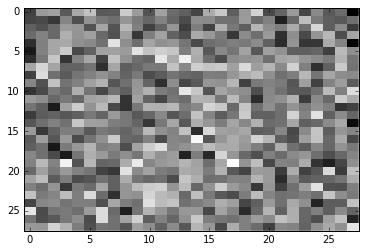

step 100, training accuracy 0.14
step 200, training accuracy 0.48
step 300, training accuracy 0.68
step 400, training accuracy 0.84
step 500, training accuracy 0.76
step 600, training accuracy 0.8
step 700, training accuracy 0.76
step 800, training accuracy 0.86
step 900, training accuracy 0.76
step 1000, training accuracy 0.8
Reconstruction of a 5


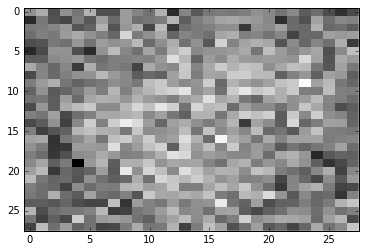

step 1100, training accuracy 0.82
step 1200, training accuracy 0.96
step 1300, training accuracy 0.9
step 1400, training accuracy 0.82
step 1500, training accuracy 0.86
step 1600, training accuracy 0.84
step 1700, training accuracy 0.88
step 1800, training accuracy 0.86
step 1900, training accuracy 0.94
step 2000, training accuracy 0.88
Reconstruction of a 1


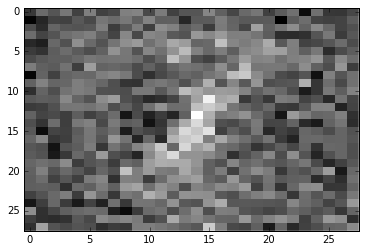

step 2100, training accuracy 0.92
step 2200, training accuracy 0.88
step 2300, training accuracy 0.84
step 2400, training accuracy 0.84
step 2500, training accuracy 0.8
step 2600, training accuracy 0.9
step 2700, training accuracy 0.84
step 2800, training accuracy 0.82
step 2900, training accuracy 0.98
step 3000, training accuracy 0.9
Reconstruction of a 8


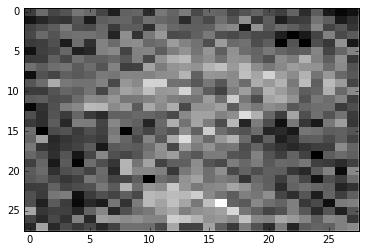

step 3100, training accuracy 0.82
step 3200, training accuracy 0.88
step 3300, training accuracy 0.86
step 3400, training accuracy 0.92
step 3500, training accuracy 0.9
step 3600, training accuracy 0.86
step 3700, training accuracy 0.86
step 3800, training accuracy 0.92
step 3900, training accuracy 0.9
step 4000, training accuracy 0.96
Reconstruction of a 8


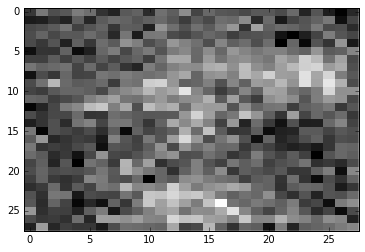

step 4100, training accuracy 0.94
step 4200, training accuracy 0.88
step 4300, training accuracy 0.96
step 4400, training accuracy 0.94
step 4500, training accuracy 0.88
step 4600, training accuracy 0.86
step 4700, training accuracy 0.92
step 4800, training accuracy 0.92
step 4900, training accuracy 0.96
step 5000, training accuracy 0.92
Reconstruction of a 3


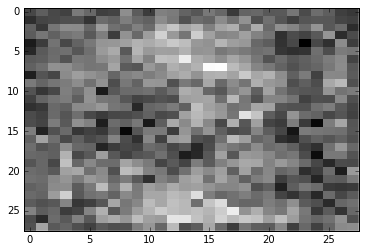

step 5100, training accuracy 0.9
step 5200, training accuracy 1
step 5300, training accuracy 0.96
step 5400, training accuracy 0.94
step 5500, training accuracy 0.96
step 5600, training accuracy 0.92
step 5700, training accuracy 0.92
step 5800, training accuracy 0.94
step 5900, training accuracy 0.88
step 6000, training accuracy 0.94
Reconstruction of a 4


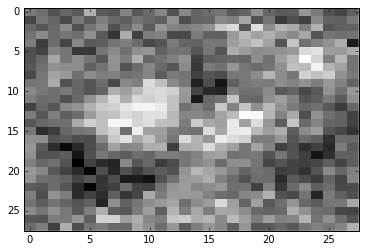

step 6100, training accuracy 0.98
step 6200, training accuracy 0.98
step 6300, training accuracy 0.94
step 6400, training accuracy 0.96
step 6500, training accuracy 0.84
step 6600, training accuracy 0.9
step 6700, training accuracy 0.88
step 6800, training accuracy 0.96
step 6900, training accuracy 0.92
step 7000, training accuracy 0.92
Reconstruction of a 1


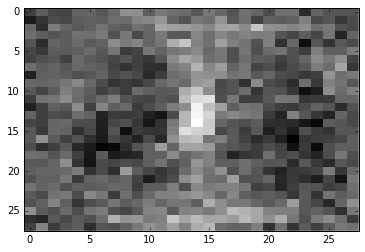

step 7100, training accuracy 0.94
step 7200, training accuracy 0.98
step 7300, training accuracy 0.92
step 7400, training accuracy 0.94
step 7500, training accuracy 0.94
step 7600, training accuracy 0.98
step 7700, training accuracy 0.94
step 7800, training accuracy 0.9
step 7900, training accuracy 0.92
step 8000, training accuracy 0.98
Reconstruction of a 4


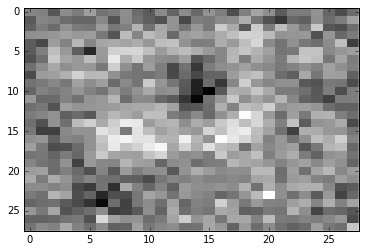

step 8100, training accuracy 0.88
step 8200, training accuracy 0.94
step 8300, training accuracy 0.9
step 8400, training accuracy 0.96
step 8500, training accuracy 0.9
step 8600, training accuracy 0.94
step 8700, training accuracy 0.96
step 8800, training accuracy 0.96
step 8900, training accuracy 0.94
step 9000, training accuracy 0.92
Reconstruction of a 4


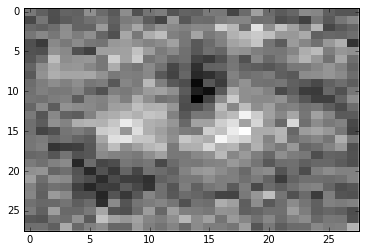

step 9100, training accuracy 0.96
step 9200, training accuracy 0.94
step 9300, training accuracy 0.94
step 9400, training accuracy 0.96
step 9500, training accuracy 0.94
step 9600, training accuracy 0.98
step 9700, training accuracy 0.96
step 9800, training accuracy 0.94
step 9900, training accuracy 0.96
epoch 1, learning rate 4.64159e-05
step 0, training accuracy 0.98
Reconstruction of a 6


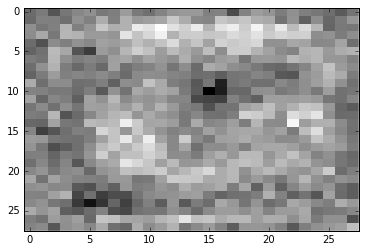

step 100, training accuracy 0.92
step 200, training accuracy 0.94
step 300, training accuracy 0.98
step 400, training accuracy 0.94
step 500, training accuracy 0.9
step 600, training accuracy 0.94
step 700, training accuracy 0.94
step 800, training accuracy 0.94
step 900, training accuracy 0.96
step 1000, training accuracy 0.96
Reconstruction of a 7


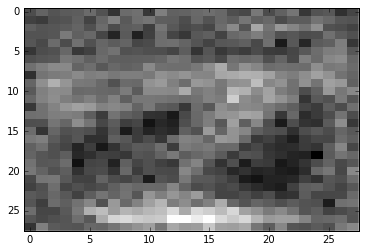

step 1100, training accuracy 0.96
step 1200, training accuracy 0.94
step 1300, training accuracy 0.94
step 1400, training accuracy 0.9
step 1500, training accuracy 0.88
step 1600, training accuracy 0.98
step 1700, training accuracy 0.94
step 1800, training accuracy 0.9
step 1900, training accuracy 0.96
step 2000, training accuracy 0.94
Reconstruction of a 8


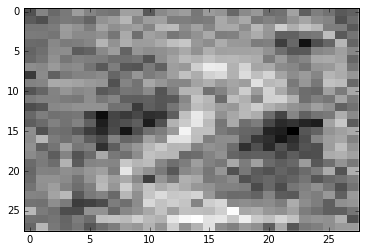

step 2100, training accuracy 0.98
step 2200, training accuracy 0.96
step 2300, training accuracy 0.96
step 2400, training accuracy 0.94
step 2500, training accuracy 0.96
step 2600, training accuracy 0.94
step 2700, training accuracy 0.96
step 2800, training accuracy 0.92
step 2900, training accuracy 0.94
step 3000, training accuracy 0.96
Reconstruction of a 2


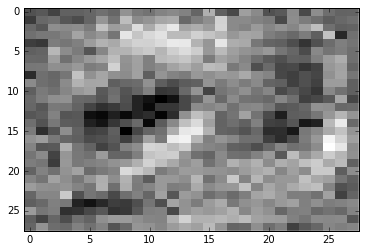

step 3100, training accuracy 0.92
step 3200, training accuracy 0.98
step 3300, training accuracy 0.96
step 3400, training accuracy 0.96
step 3500, training accuracy 0.96
step 3600, training accuracy 0.98
step 3700, training accuracy 0.92
step 3800, training accuracy 0.94
step 3900, training accuracy 0.98
step 4000, training accuracy 0.94
Reconstruction of a 1


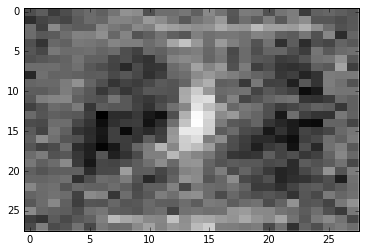

step 4100, training accuracy 0.96
step 4200, training accuracy 1
step 4300, training accuracy 0.88
step 4400, training accuracy 0.94
step 4500, training accuracy 0.98
step 4600, training accuracy 0.98
step 4700, training accuracy 0.98
step 4800, training accuracy 0.98
step 4900, training accuracy 0.98
step 5000, training accuracy 0.98
Reconstruction of a 7


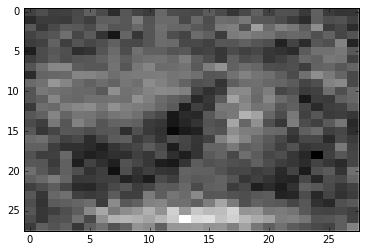

step 5100, training accuracy 0.96
step 5200, training accuracy 0.92
step 5300, training accuracy 0.94
step 5400, training accuracy 0.9
step 5500, training accuracy 0.94
step 5600, training accuracy 0.98
step 5700, training accuracy 0.92
step 5800, training accuracy 0.9
step 5900, training accuracy 0.98
step 6000, training accuracy 0.92
Reconstruction of a 2


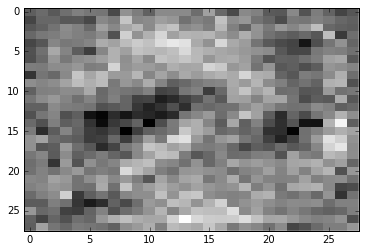

step 6100, training accuracy 0.92
step 6200, training accuracy 0.98
step 6300, training accuracy 0.92
step 6400, training accuracy 0.92
step 6500, training accuracy 0.98
step 6600, training accuracy 1
step 6700, training accuracy 0.96
step 6800, training accuracy 0.96
step 6900, training accuracy 0.98
step 7000, training accuracy 1
Reconstruction of a 2


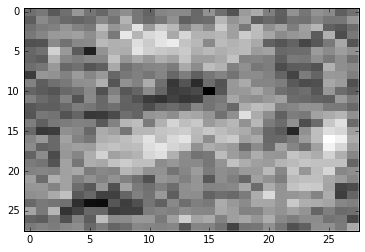

step 7100, training accuracy 0.9
step 7200, training accuracy 0.96
step 7300, training accuracy 0.92
step 7400, training accuracy 0.9
step 7500, training accuracy 0.94
step 7600, training accuracy 0.94
step 7700, training accuracy 0.96
step 7800, training accuracy 0.94
step 7900, training accuracy 1
step 8000, training accuracy 0.96
Reconstruction of a 7


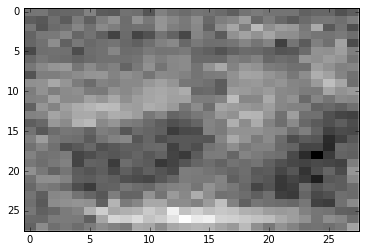

step 8100, training accuracy 0.96
step 8200, training accuracy 0.98
step 8300, training accuracy 0.92
step 8400, training accuracy 0.98
step 8500, training accuracy 0.98
step 8600, training accuracy 0.92
step 8700, training accuracy 0.98
step 8800, training accuracy 0.96
step 8900, training accuracy 0.98
step 9000, training accuracy 0.98
Reconstruction of a 8


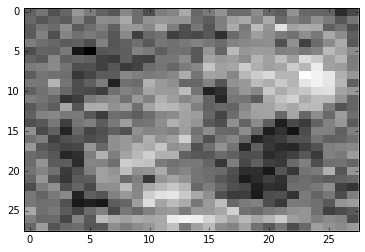

step 9100, training accuracy 0.98
step 9200, training accuracy 0.96
step 9300, training accuracy 0.94
step 9400, training accuracy 0.9
step 9500, training accuracy 0.96
step 9600, training accuracy 1
step 9700, training accuracy 0.96
step 9800, training accuracy 0.92
step 9900, training accuracy 0.92
epoch 2, learning rate 2.15443e-05
step 0, training accuracy 0.9
Reconstruction of a 7


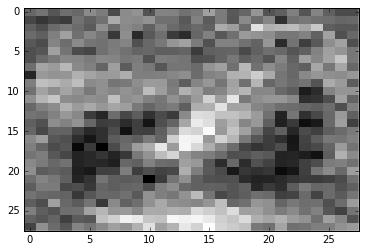

step 100, training accuracy 0.98
step 200, training accuracy 0.98
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.94
step 600, training accuracy 1
step 700, training accuracy 0.96
step 800, training accuracy 0.94
step 900, training accuracy 1
step 1000, training accuracy 0.94
Reconstruction of a 6


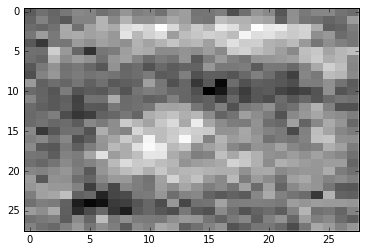

step 1100, training accuracy 0.96
step 1200, training accuracy 1
step 1300, training accuracy 0.98
step 1400, training accuracy 1
step 1500, training accuracy 0.98
step 1600, training accuracy 0.96
step 1700, training accuracy 1
step 1800, training accuracy 0.96
step 1900, training accuracy 0.98
step 2000, training accuracy 0.96
Reconstruction of a 4


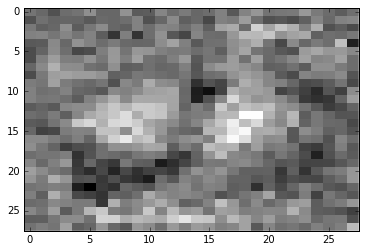

step 2100, training accuracy 1
step 2200, training accuracy 0.94
step 2300, training accuracy 0.88
step 2400, training accuracy 0.94
step 2500, training accuracy 0.98
step 2600, training accuracy 0.98
step 2700, training accuracy 0.9
step 2800, training accuracy 0.94
step 2900, training accuracy 0.98
step 3000, training accuracy 1
Reconstruction of a 1


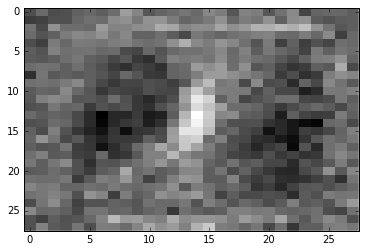

step 3100, training accuracy 0.98
step 3200, training accuracy 0.98
step 3300, training accuracy 0.9
step 3400, training accuracy 0.92
step 3500, training accuracy 0.9
step 3600, training accuracy 0.94
step 3700, training accuracy 0.98
step 3800, training accuracy 0.92
step 3900, training accuracy 0.92
step 4000, training accuracy 0.98
Reconstruction of a 6


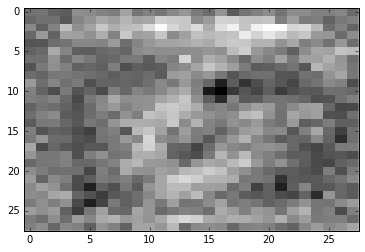

step 4100, training accuracy 0.9
step 4200, training accuracy 0.98
step 4300, training accuracy 0.98
step 4400, training accuracy 0.92
step 4500, training accuracy 0.96
step 4600, training accuracy 1
step 4700, training accuracy 0.94
step 4800, training accuracy 0.98
step 4900, training accuracy 1
step 5000, training accuracy 0.92
Reconstruction of a 3


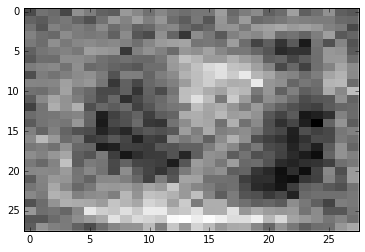

step 5100, training accuracy 0.92
step 5200, training accuracy 0.98
step 5300, training accuracy 0.98
step 5400, training accuracy 0.96
step 5500, training accuracy 0.92
step 5600, training accuracy 0.94
step 5700, training accuracy 0.92
step 5800, training accuracy 0.98
step 5900, training accuracy 0.94
step 6000, training accuracy 0.94
Reconstruction of a 7


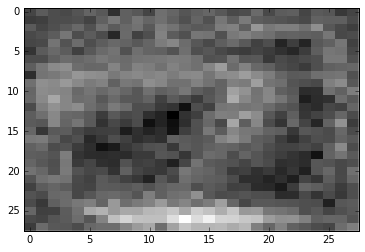

step 6100, training accuracy 0.98
step 6200, training accuracy 0.94
step 6300, training accuracy 0.94
step 6400, training accuracy 0.92
step 6500, training accuracy 0.96
step 6600, training accuracy 0.96
step 6700, training accuracy 0.96
step 6800, training accuracy 0.86
step 6900, training accuracy 0.96
step 7000, training accuracy 0.98
Reconstruction of a 6


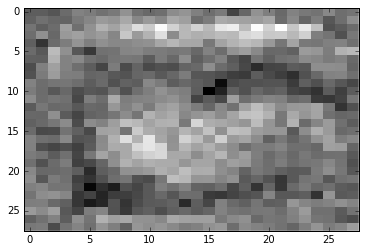

step 7100, training accuracy 0.98
step 7200, training accuracy 0.98
step 7300, training accuracy 0.94
step 7400, training accuracy 0.96
step 7500, training accuracy 0.92
step 7600, training accuracy 1
step 7700, training accuracy 0.94
step 7800, training accuracy 1
step 7900, training accuracy 0.96
step 8000, training accuracy 0.98
Reconstruction of a 0


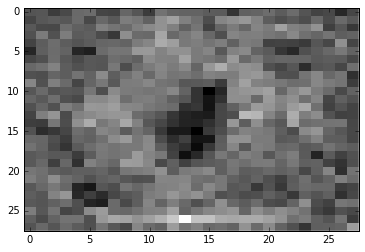

step 8100, training accuracy 0.94
step 8200, training accuracy 0.98
step 8300, training accuracy 0.92
step 8400, training accuracy 0.96
step 8500, training accuracy 0.98
step 8600, training accuracy 0.92
step 8700, training accuracy 0.98
step 8800, training accuracy 0.94
step 8900, training accuracy 0.98
step 9000, training accuracy 0.98
Reconstruction of a 0


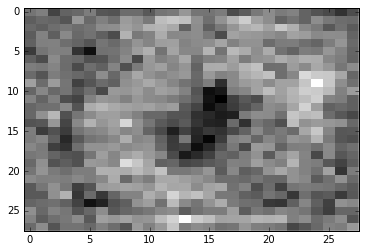

step 9100, training accuracy 0.98
step 9200, training accuracy 0.88
step 9300, training accuracy 0.96
step 9400, training accuracy 0.98
step 9500, training accuracy 0.98
step 9600, training accuracy 0.88
step 9700, training accuracy 0.98
step 9800, training accuracy 0.98
step 9900, training accuracy 0.92
epoch 3, learning rate 1e-05
step 0, training accuracy 0.96
Reconstruction of a 9


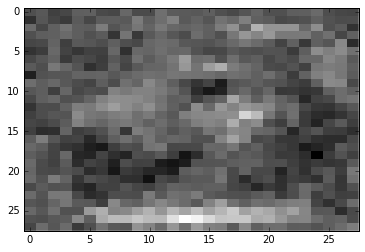

step 100, training accuracy 0.94
step 200, training accuracy 0.96
step 300, training accuracy 0.96
step 400, training accuracy 0.98
step 500, training accuracy 0.98
step 600, training accuracy 0.96
step 700, training accuracy 0.96
step 800, training accuracy 1
step 900, training accuracy 0.98
step 1000, training accuracy 0.96
Reconstruction of a 9


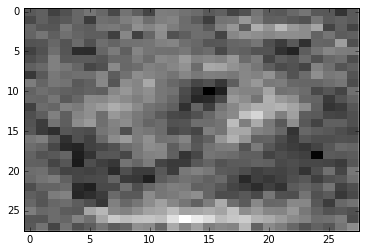

step 1100, training accuracy 0.96
step 1200, training accuracy 1
step 1300, training accuracy 0.98
step 1400, training accuracy 0.92
step 1500, training accuracy 0.96
step 1600, training accuracy 0.96
step 1700, training accuracy 0.92
step 1800, training accuracy 1
step 1900, training accuracy 0.98
step 2000, training accuracy 0.98
Reconstruction of a 0


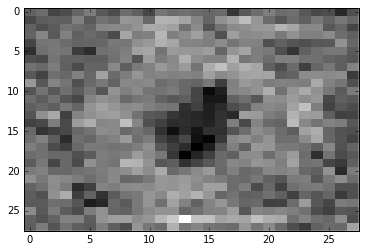

step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 0.96
step 2400, training accuracy 0.98
step 2500, training accuracy 0.98
step 2600, training accuracy 0.92
step 2700, training accuracy 0.92
step 2800, training accuracy 0.98
step 2900, training accuracy 0.92
step 3000, training accuracy 0.98
Reconstruction of a 6


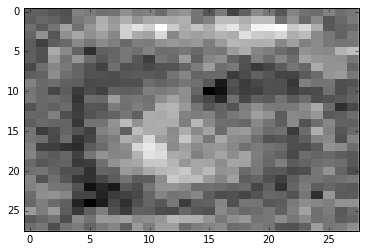

step 3100, training accuracy 0.98
step 3200, training accuracy 0.94
step 3300, training accuracy 1
step 3400, training accuracy 0.96
step 3500, training accuracy 0.94
step 3600, training accuracy 0.96
step 3700, training accuracy 0.94
step 3800, training accuracy 1
step 3900, training accuracy 1
step 4000, training accuracy 1
Reconstruction of a 3


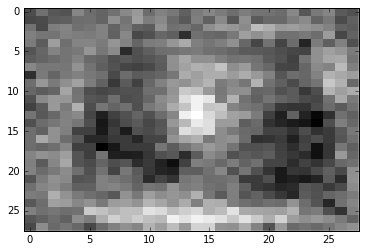

step 4100, training accuracy 0.94
step 4200, training accuracy 0.94
step 4300, training accuracy 0.92
step 4400, training accuracy 1
step 4500, training accuracy 0.96
step 4600, training accuracy 0.96
step 4700, training accuracy 0.98
step 4800, training accuracy 0.94
step 4900, training accuracy 0.96
step 5000, training accuracy 0.98
Reconstruction of a 0


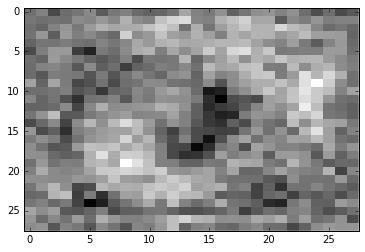

step 5100, training accuracy 0.94
step 5200, training accuracy 0.98
step 5300, training accuracy 0.92
step 5400, training accuracy 0.96
step 5500, training accuracy 0.96
step 5600, training accuracy 0.96
step 5700, training accuracy 1
step 5800, training accuracy 0.96
step 5900, training accuracy 0.96
step 6000, training accuracy 0.98
Reconstruction of a 6


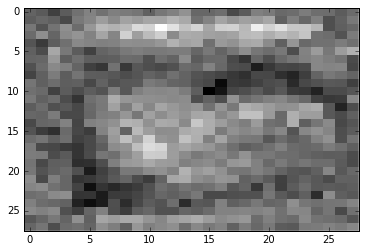

step 6100, training accuracy 0.94
step 6200, training accuracy 0.98
step 6300, training accuracy 1
step 6400, training accuracy 0.98
step 6500, training accuracy 0.96
step 6600, training accuracy 0.96
step 6700, training accuracy 0.96
step 6800, training accuracy 0.94
step 6900, training accuracy 0.98
step 7000, training accuracy 0.98
Reconstruction of a 9


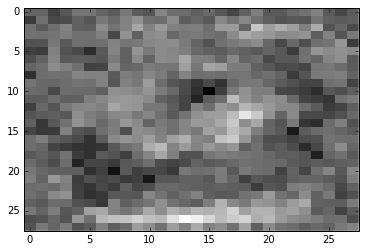

step 7100, training accuracy 1
step 7200, training accuracy 1
step 7300, training accuracy 0.96
step 7400, training accuracy 1
step 7500, training accuracy 0.96
step 7600, training accuracy 0.96
step 7700, training accuracy 0.94
step 7800, training accuracy 0.96
step 7900, training accuracy 0.96
step 8000, training accuracy 0.98
Reconstruction of a 9


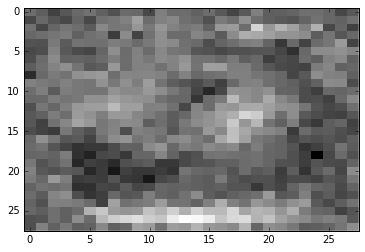

step 8100, training accuracy 0.96
step 8200, training accuracy 1
step 8300, training accuracy 0.96
step 8400, training accuracy 1
step 8500, training accuracy 0.98
step 8600, training accuracy 1
step 8700, training accuracy 0.96
step 8800, training accuracy 0.98
step 8900, training accuracy 0.96
step 9000, training accuracy 1
Reconstruction of a 1


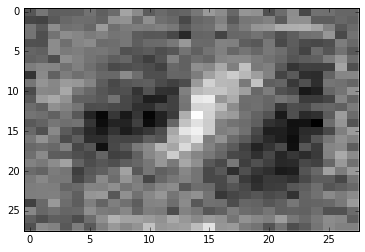

step 9100, training accuracy 0.88
step 9200, training accuracy 0.96
step 9300, training accuracy 0.9
step 9400, training accuracy 0.98
step 9500, training accuracy 0.98
step 9600, training accuracy 0.98
step 9700, training accuracy 0.94
step 9800, training accuracy 0.98
step 9900, training accuracy 1
epoch 4, learning rate 4.64159e-06
step 0, training accuracy 0.98
Reconstruction of a 2


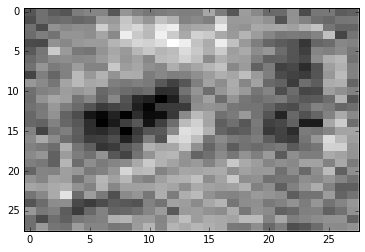

step 100, training accuracy 1
step 200, training accuracy 0.98
step 300, training accuracy 0.96
step 400, training accuracy 0.92
step 500, training accuracy 0.94
step 600, training accuracy 0.98
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 1
step 1000, training accuracy 0.96
Reconstruction of a 0


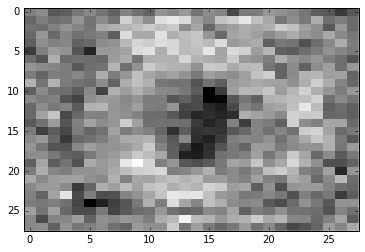

step 1100, training accuracy 0.92
step 1200, training accuracy 1
step 1300, training accuracy 1
step 1400, training accuracy 1
step 1500, training accuracy 0.98
step 1600, training accuracy 0.94
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 1
step 2000, training accuracy 0.98
Reconstruction of a 3


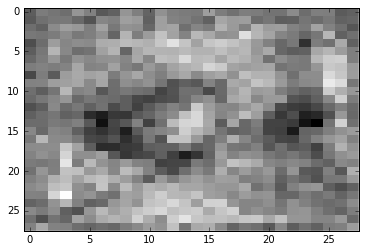

step 2100, training accuracy 1
step 2200, training accuracy 1
step 2300, training accuracy 0.98
step 2400, training accuracy 0.94
step 2500, training accuracy 0.96
step 2600, training accuracy 0.94
step 2700, training accuracy 0.92
step 2800, training accuracy 1
step 2900, training accuracy 0.98
step 3000, training accuracy 0.94
Reconstruction of a 1


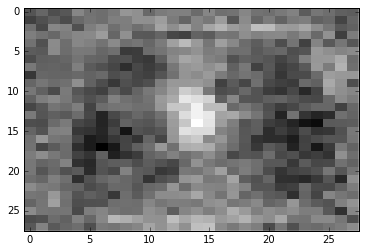

step 3100, training accuracy 1
step 3200, training accuracy 0.96
step 3300, training accuracy 0.96
step 3400, training accuracy 0.96
step 3500, training accuracy 1
step 3600, training accuracy 1
step 3700, training accuracy 0.96
step 3800, training accuracy 0.94
step 3900, training accuracy 0.98
step 4000, training accuracy 0.9
Reconstruction of a 3


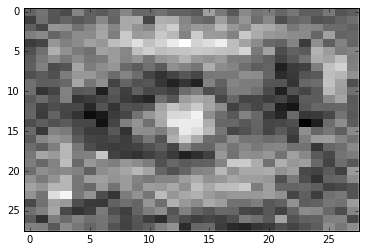

step 4100, training accuracy 0.94
step 4200, training accuracy 0.98
step 4300, training accuracy 0.94
step 4400, training accuracy 0.96
step 4500, training accuracy 0.92
step 4600, training accuracy 0.98
step 4700, training accuracy 0.94
step 4800, training accuracy 0.94
step 4900, training accuracy 0.96
step 5000, training accuracy 0.98
Reconstruction of a 3


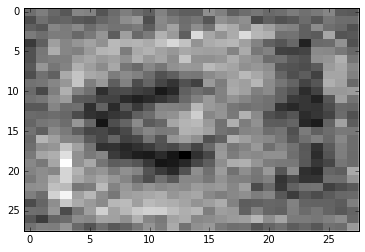

step 5100, training accuracy 0.98
step 5200, training accuracy 0.94
step 5300, training accuracy 0.94
step 5400, training accuracy 0.96
step 5500, training accuracy 0.98
step 5600, training accuracy 0.94
step 5700, training accuracy 0.96
step 5800, training accuracy 0.98
step 5900, training accuracy 0.94
step 6000, training accuracy 0.96
Reconstruction of a 8


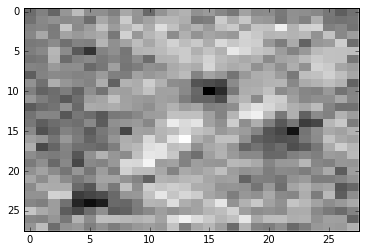

step 6100, training accuracy 0.98
step 6200, training accuracy 0.94
step 6300, training accuracy 0.9
step 6400, training accuracy 0.94
step 6500, training accuracy 1
step 6600, training accuracy 1
step 6700, training accuracy 0.96
step 6800, training accuracy 0.92
step 6900, training accuracy 0.9
step 7000, training accuracy 0.96
Reconstruction of a 2


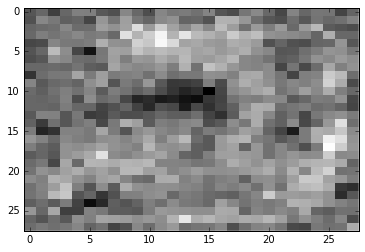

step 7100, training accuracy 0.92
step 7200, training accuracy 0.92
step 7300, training accuracy 0.96
step 7400, training accuracy 0.98
step 7500, training accuracy 0.94
step 7600, training accuracy 0.92
step 7700, training accuracy 0.96
step 7800, training accuracy 0.96
step 7900, training accuracy 0.94
step 8000, training accuracy 0.96
Reconstruction of a 8


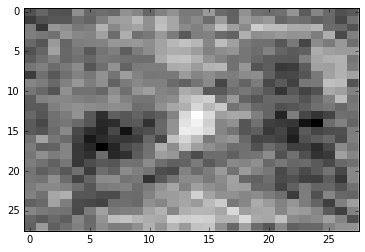

step 8100, training accuracy 0.96
step 8200, training accuracy 0.96
step 8300, training accuracy 0.94
step 8400, training accuracy 0.96
step 8500, training accuracy 0.98
step 8600, training accuracy 0.96
step 8700, training accuracy 0.96
step 8800, training accuracy 0.96
step 8900, training accuracy 0.96
step 9000, training accuracy 0.94
Reconstruction of a 9


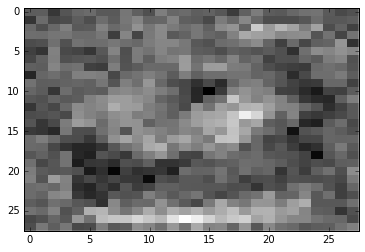

step 9100, training accuracy 0.92
step 9200, training accuracy 1
step 9300, training accuracy 1
step 9400, training accuracy 0.98
step 9500, training accuracy 0.96
step 9600, training accuracy 0.98
step 9700, training accuracy 0.98
step 9800, training accuracy 0.98
step 9900, training accuracy 0.96
epoch 5, learning rate 2.15443e-06
step 0, training accuracy 0.98
Reconstruction of a 8


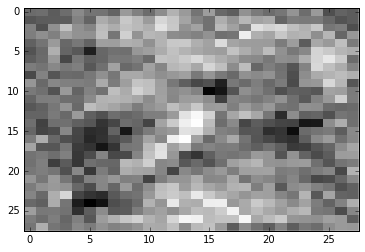

step 100, training accuracy 0.96
step 200, training accuracy 0.98
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 0.94
step 600, training accuracy 0.92
step 700, training accuracy 0.98
step 800, training accuracy 0.96
step 900, training accuracy 1
step 1000, training accuracy 0.94
Reconstruction of a 0


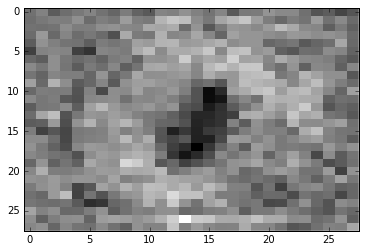

step 1100, training accuracy 0.96
step 1200, training accuracy 0.96
step 1300, training accuracy 0.94
step 1400, training accuracy 1
step 1500, training accuracy 0.96
step 1600, training accuracy 0.94
step 1700, training accuracy 0.96
step 1800, training accuracy 0.96
step 1900, training accuracy 1
step 2000, training accuracy 1
Reconstruction of a 0


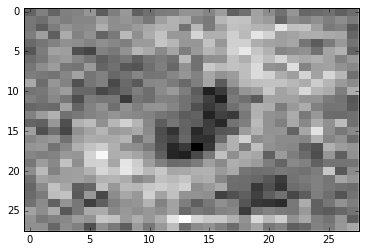

step 2100, training accuracy 0.92
step 2200, training accuracy 0.94
step 2300, training accuracy 0.96
step 2400, training accuracy 0.98
step 2500, training accuracy 1
step 2600, training accuracy 0.9
step 2700, training accuracy 0.98
step 2800, training accuracy 0.98
step 2900, training accuracy 0.94
step 3000, training accuracy 0.94
Reconstruction of a 7


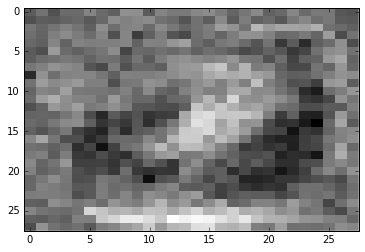

step 3100, training accuracy 0.9
step 3200, training accuracy 0.94
step 3300, training accuracy 0.98
step 3400, training accuracy 0.98
step 3500, training accuracy 0.98
step 3600, training accuracy 0.96
step 3700, training accuracy 0.98
step 3800, training accuracy 0.96
step 3900, training accuracy 0.98
step 4000, training accuracy 0.92
Reconstruction of a 8


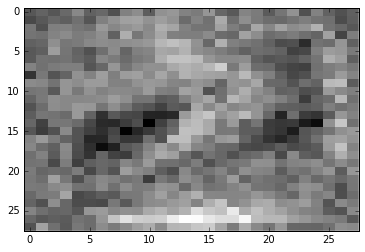

step 4100, training accuracy 0.98
step 4200, training accuracy 0.92
step 4300, training accuracy 0.94
step 4400, training accuracy 0.94
step 4500, training accuracy 0.96
step 4600, training accuracy 0.92
step 4700, training accuracy 0.96
step 4800, training accuracy 1
step 4900, training accuracy 0.96
step 5000, training accuracy 1
Reconstruction of a 0


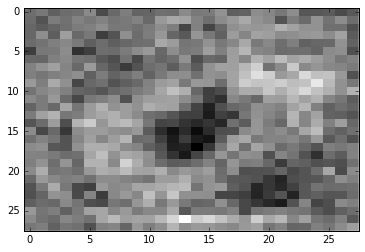

step 5100, training accuracy 0.96
step 5200, training accuracy 0.96
step 5300, training accuracy 0.96
step 5400, training accuracy 1
step 5500, training accuracy 0.98
step 5600, training accuracy 0.98
step 5700, training accuracy 0.94
step 5800, training accuracy 0.96
step 5900, training accuracy 1
step 6000, training accuracy 1
Reconstruction of a 4


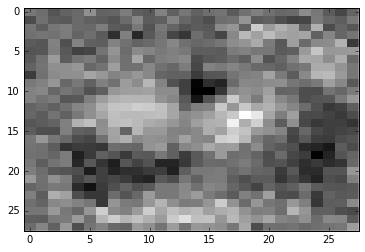

step 6100, training accuracy 0.94
step 6200, training accuracy 0.88
step 6300, training accuracy 0.98
step 6400, training accuracy 0.98
step 6500, training accuracy 0.94
step 6600, training accuracy 0.92
step 6700, training accuracy 0.98
step 6800, training accuracy 0.96
step 6900, training accuracy 0.94
step 7000, training accuracy 0.98
Reconstruction of a 7


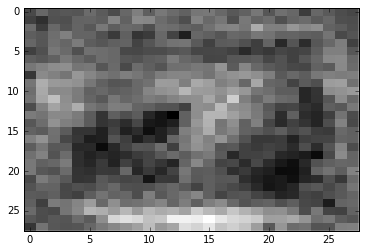

step 7100, training accuracy 0.92
step 7200, training accuracy 1
step 7300, training accuracy 0.94
step 7400, training accuracy 0.96
step 7500, training accuracy 1
step 7600, training accuracy 0.94
step 7700, training accuracy 0.98
step 7800, training accuracy 0.92
step 7900, training accuracy 0.96
step 8000, training accuracy 1
Reconstruction of a 7


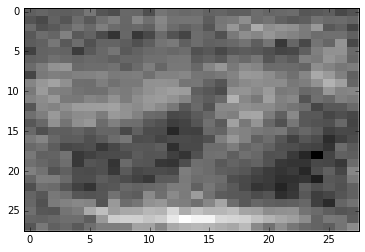

step 8100, training accuracy 0.98
step 8200, training accuracy 0.98
step 8300, training accuracy 0.96
step 8400, training accuracy 1
step 8500, training accuracy 0.94
step 8600, training accuracy 0.96
step 8700, training accuracy 0.94
step 8800, training accuracy 0.98
step 8900, training accuracy 1
step 9000, training accuracy 0.98
Reconstruction of a 7


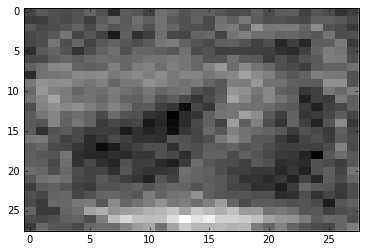

step 9100, training accuracy 0.94
step 9200, training accuracy 0.94
step 9300, training accuracy 1
step 9400, training accuracy 0.98
step 9500, training accuracy 0.96
step 9600, training accuracy 0.98
step 9700, training accuracy 0.96
step 9800, training accuracy 0.96
step 9900, training accuracy 0.98
epoch 6, learning rate 1e-06
step 0, training accuracy 0.98
Reconstruction of a 2


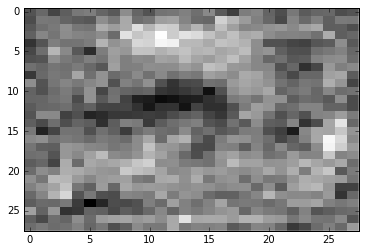

step 100, training accuracy 1
step 200, training accuracy 0.94
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 0.94
step 600, training accuracy 0.98
step 700, training accuracy 0.92
step 800, training accuracy 0.98
step 900, training accuracy 1
step 1000, training accuracy 0.96
Reconstruction of a 3


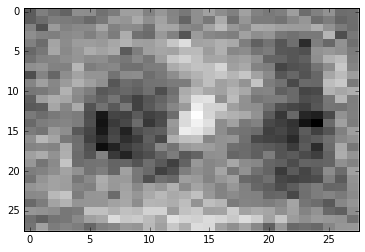

step 1100, training accuracy 0.96
step 1200, training accuracy 0.94
step 1300, training accuracy 1
step 1400, training accuracy 0.96
step 1500, training accuracy 0.94
step 1600, training accuracy 0.94
step 1700, training accuracy 0.96
step 1800, training accuracy 0.9
step 1900, training accuracy 0.96
step 2000, training accuracy 0.98
Reconstruction of a 1


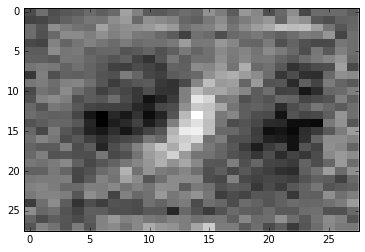

step 2100, training accuracy 0.94
step 2200, training accuracy 0.94
step 2300, training accuracy 0.96
step 2400, training accuracy 0.94
step 2500, training accuracy 0.98
step 2600, training accuracy 0.98
step 2700, training accuracy 0.94
step 2800, training accuracy 0.98
step 2900, training accuracy 0.98
step 3000, training accuracy 0.98
Reconstruction of a 5


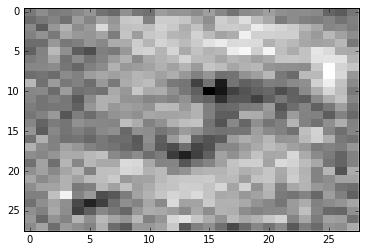

step 3100, training accuracy 0.94
step 3200, training accuracy 0.98
step 3300, training accuracy 1
step 3400, training accuracy 0.98
step 3500, training accuracy 0.96
step 3600, training accuracy 0.96
step 3700, training accuracy 0.9
step 3800, training accuracy 1
step 3900, training accuracy 0.94
step 4000, training accuracy 0.98
Reconstruction of a 1


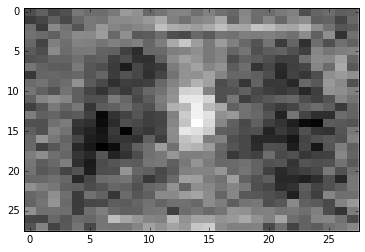

step 4100, training accuracy 0.94
step 4200, training accuracy 0.92
step 4300, training accuracy 0.98
step 4400, training accuracy 0.98
step 4500, training accuracy 0.94
step 4600, training accuracy 0.96
step 4700, training accuracy 0.98
step 4800, training accuracy 1
step 4900, training accuracy 1
step 5000, training accuracy 0.98
Reconstruction of a 7


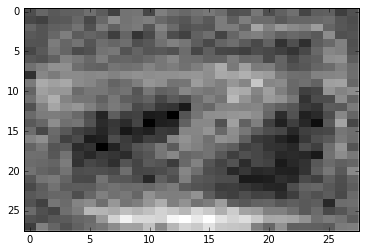

step 5100, training accuracy 0.98
step 5200, training accuracy 0.98
step 5300, training accuracy 0.98
step 5400, training accuracy 0.94
step 5500, training accuracy 0.96
step 5600, training accuracy 1
step 5700, training accuracy 0.98
step 5800, training accuracy 0.92
step 5900, training accuracy 0.96
step 6000, training accuracy 0.96
Reconstruction of a 0


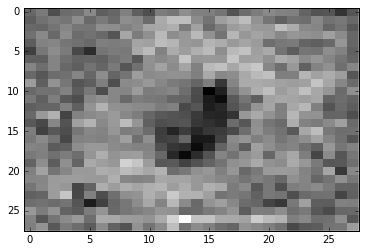

step 6100, training accuracy 0.94
step 6200, training accuracy 0.98
step 6300, training accuracy 0.98
step 6400, training accuracy 0.96
step 6500, training accuracy 0.96
step 6600, training accuracy 0.98
step 6700, training accuracy 0.98
step 6800, training accuracy 0.98
step 6900, training accuracy 0.96
step 7000, training accuracy 0.98
Reconstruction of a 9


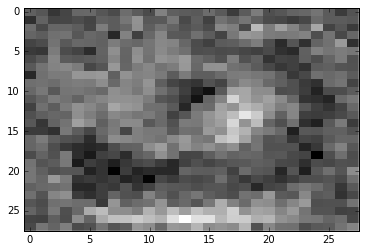

step 7100, training accuracy 0.98
step 7200, training accuracy 0.98
step 7300, training accuracy 1
step 7400, training accuracy 0.94
step 7500, training accuracy 1
step 7600, training accuracy 0.94
step 7700, training accuracy 0.98
step 7800, training accuracy 0.94
step 7900, training accuracy 0.92
step 8000, training accuracy 0.92
Reconstruction of a 2


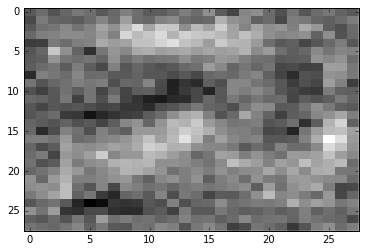

step 8100, training accuracy 0.98
step 8200, training accuracy 0.96
step 8300, training accuracy 0.96
step 8400, training accuracy 0.98
step 8500, training accuracy 0.96
step 8600, training accuracy 0.98
step 8700, training accuracy 0.98
step 8800, training accuracy 0.96
step 8900, training accuracy 0.98
step 9000, training accuracy 0.98
Reconstruction of a 3


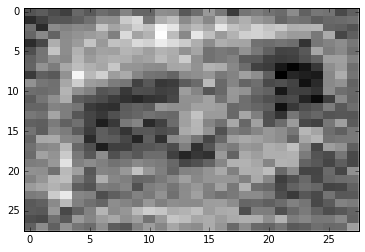

step 9100, training accuracy 0.96
step 9200, training accuracy 1
step 9300, training accuracy 0.96
step 9400, training accuracy 0.98
step 9500, training accuracy 1
step 9600, training accuracy 1
step 9700, training accuracy 0.96
step 9800, training accuracy 0.98
step 9900, training accuracy 0.92
epoch 7, learning rate 4.64159e-07
step 0, training accuracy 0.96
Reconstruction of a 2


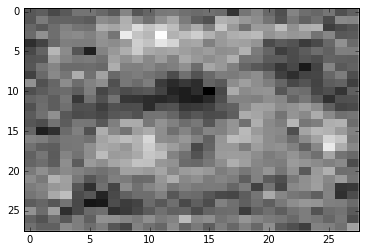

step 100, training accuracy 0.98
step 200, training accuracy 0.96
step 300, training accuracy 0.94
step 400, training accuracy 0.98
step 500, training accuracy 0.96
step 600, training accuracy 1
step 700, training accuracy 0.94
step 800, training accuracy 0.96
step 900, training accuracy 0.98
step 1000, training accuracy 0.98
Reconstruction of a 9


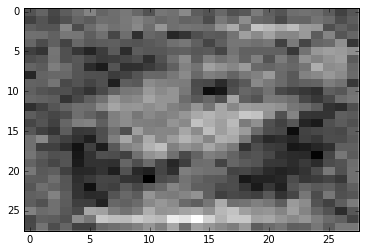

step 1100, training accuracy 1
step 1200, training accuracy 0.98
step 1300, training accuracy 0.96
step 1400, training accuracy 0.94
step 1500, training accuracy 1
step 1600, training accuracy 1
step 1700, training accuracy 0.96
step 1800, training accuracy 0.98
step 1900, training accuracy 0.98
step 2000, training accuracy 0.98
Reconstruction of a 6


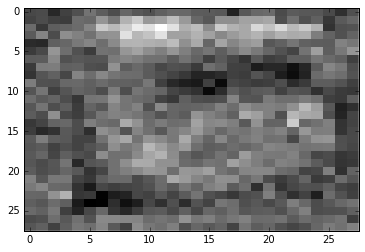

step 2100, training accuracy 0.98
step 2200, training accuracy 0.98
step 2300, training accuracy 0.98
step 2400, training accuracy 0.98
step 2500, training accuracy 1
step 2600, training accuracy 0.96
step 2700, training accuracy 0.98
step 2800, training accuracy 0.98
step 2900, training accuracy 0.94
step 3000, training accuracy 0.98
Reconstruction of a 2


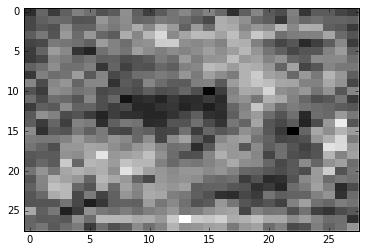

step 3100, training accuracy 0.98
step 3200, training accuracy 0.98
step 3300, training accuracy 0.98
step 3400, training accuracy 0.98
step 3500, training accuracy 0.94
step 3600, training accuracy 0.96
step 3700, training accuracy 0.98
step 3800, training accuracy 0.94
step 3900, training accuracy 0.98
step 4000, training accuracy 0.98
Reconstruction of a 3


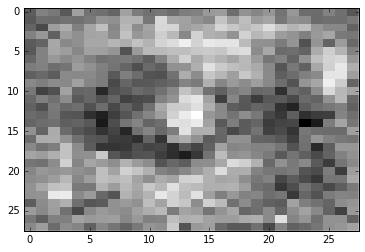

step 4100, training accuracy 0.9
step 4200, training accuracy 1
step 4300, training accuracy 0.98
step 4400, training accuracy 0.98
step 4500, training accuracy 0.96
step 4600, training accuracy 0.98
step 4700, training accuracy 0.94
step 4800, training accuracy 0.94
step 4900, training accuracy 0.98
step 5000, training accuracy 1
Reconstruction of a 8


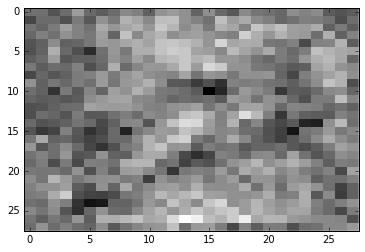

step 5100, training accuracy 0.98
step 5200, training accuracy 0.96
step 5300, training accuracy 0.98
step 5400, training accuracy 0.94
step 5500, training accuracy 0.96
step 5600, training accuracy 1
step 5700, training accuracy 0.98
step 5800, training accuracy 0.96
step 5900, training accuracy 1
step 6000, training accuracy 0.96
Reconstruction of a 1


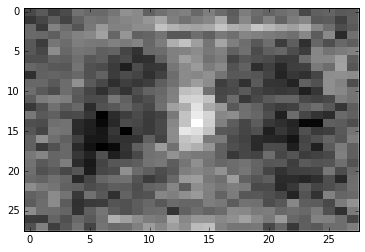

step 6100, training accuracy 0.98
step 6200, training accuracy 0.9
step 6300, training accuracy 0.94
step 6400, training accuracy 0.98
step 6500, training accuracy 0.94
step 6600, training accuracy 0.98
step 6700, training accuracy 0.96
step 6800, training accuracy 0.96
step 6900, training accuracy 0.98
step 7000, training accuracy 1
Reconstruction of a 5


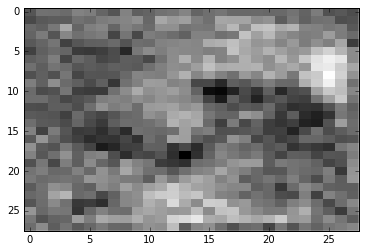

step 7100, training accuracy 1
step 7200, training accuracy 0.92
step 7300, training accuracy 0.96
step 7400, training accuracy 0.96
step 7500, training accuracy 0.92
step 7600, training accuracy 1
step 7700, training accuracy 0.96
step 7800, training accuracy 0.92
step 7900, training accuracy 0.96
step 8000, training accuracy 0.96
Reconstruction of a 4


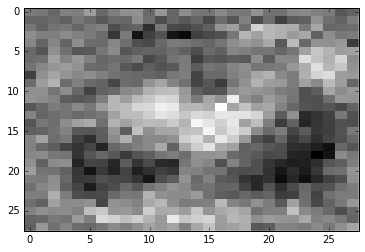

step 8100, training accuracy 1
step 8200, training accuracy 0.92
step 8300, training accuracy 0.94
step 8400, training accuracy 0.96
step 8500, training accuracy 0.96
step 8600, training accuracy 1
step 8700, training accuracy 0.98
step 8800, training accuracy 0.94
step 8900, training accuracy 0.98
step 9000, training accuracy 0.9
Reconstruction of a 6


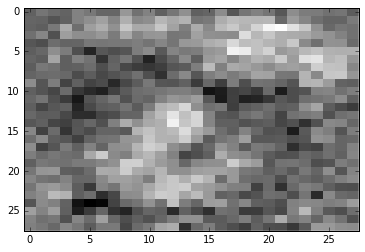

step 9100, training accuracy 1
step 9200, training accuracy 0.96
step 9300, training accuracy 0.98
step 9400, training accuracy 0.96
step 9500, training accuracy 0.96
step 9600, training accuracy 0.98
step 9700, training accuracy 0.96
step 9800, training accuracy 0.98
step 9900, training accuracy 1
epoch 8, learning rate 2.15443e-07
step 0, training accuracy 0.94
Reconstruction of a 5


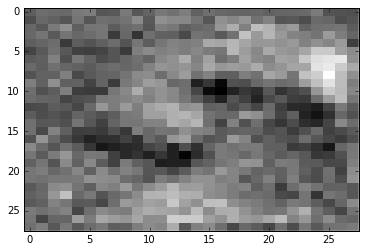

step 100, training accuracy 0.98
step 200, training accuracy 1
step 300, training accuracy 0.96
step 400, training accuracy 0.98
step 500, training accuracy 0.96
step 600, training accuracy 0.96
step 700, training accuracy 0.96
step 800, training accuracy 0.96
step 900, training accuracy 0.98
step 1000, training accuracy 0.98
Reconstruction of a 2


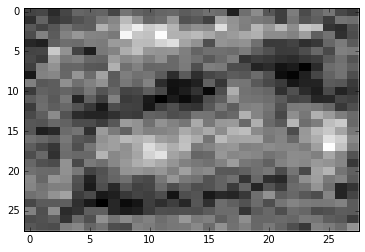

step 1100, training accuracy 0.96
step 1200, training accuracy 0.98
step 1300, training accuracy 0.96
step 1400, training accuracy 0.94
step 1500, training accuracy 0.96
step 1600, training accuracy 0.98
step 1700, training accuracy 0.92
step 1800, training accuracy 1
step 1900, training accuracy 0.94
step 2000, training accuracy 0.9
Reconstruction of a 4


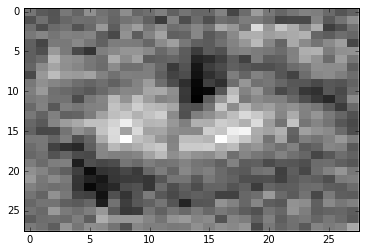

step 2100, training accuracy 1
step 2200, training accuracy 0.98
step 2300, training accuracy 0.94
step 2400, training accuracy 0.96
step 2500, training accuracy 0.94
step 2600, training accuracy 0.98
step 2700, training accuracy 0.98
step 2800, training accuracy 1
step 2900, training accuracy 0.92
step 3000, training accuracy 0.98
Reconstruction of a 5


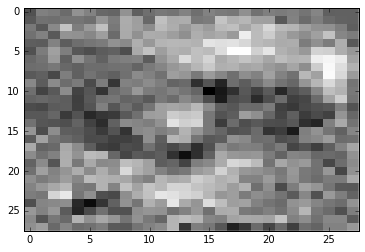

step 3100, training accuracy 1
step 3200, training accuracy 1
step 3300, training accuracy 0.98
step 3400, training accuracy 0.96
step 3500, training accuracy 0.92
step 3600, training accuracy 0.98
step 3700, training accuracy 0.96
step 3800, training accuracy 1
step 3900, training accuracy 0.96
step 4000, training accuracy 0.96
Reconstruction of a 2


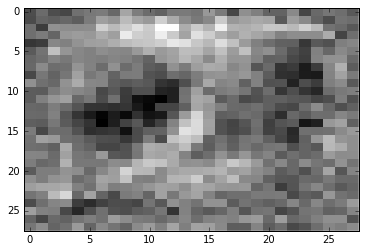

step 4100, training accuracy 1
step 4200, training accuracy 1
step 4300, training accuracy 0.96
step 4400, training accuracy 0.98
step 4500, training accuracy 0.94
step 4600, training accuracy 0.94
step 4700, training accuracy 1
step 4800, training accuracy 0.94
step 4900, training accuracy 0.96
step 5000, training accuracy 0.98
Reconstruction of a 2


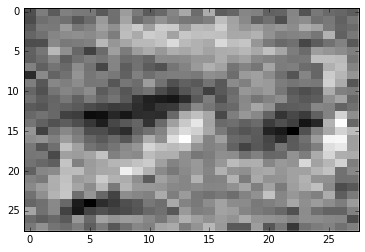

step 5100, training accuracy 0.96
step 5200, training accuracy 0.98
step 5300, training accuracy 1
step 5400, training accuracy 1
step 5500, training accuracy 1
step 5600, training accuracy 0.98
step 5700, training accuracy 0.96
step 5800, training accuracy 0.94
step 5900, training accuracy 0.94
step 6000, training accuracy 0.98
Reconstruction of a 7


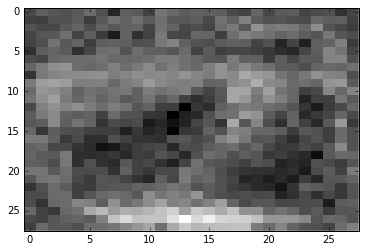

step 6100, training accuracy 0.92
step 6200, training accuracy 0.98
step 6300, training accuracy 0.92
step 6400, training accuracy 0.98
step 6500, training accuracy 0.92
step 6600, training accuracy 1
step 6700, training accuracy 0.98
step 6800, training accuracy 1
step 6900, training accuracy 0.98
step 7000, training accuracy 1
Reconstruction of a 0


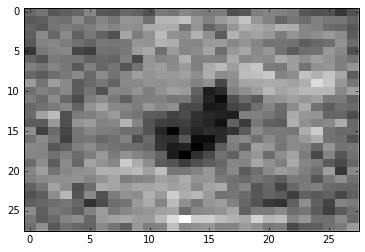

step 7100, training accuracy 0.98
step 7200, training accuracy 0.92
step 7300, training accuracy 0.92
step 7400, training accuracy 1
step 7500, training accuracy 0.98
step 7600, training accuracy 0.96
step 7700, training accuracy 0.96
step 7800, training accuracy 0.96
step 7900, training accuracy 0.96
step 8000, training accuracy 0.98
Reconstruction of a 3


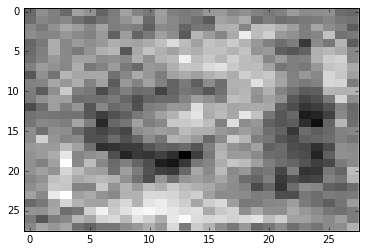

step 8100, training accuracy 0.94
step 8200, training accuracy 0.96
step 8300, training accuracy 0.94
step 8400, training accuracy 0.96
step 8500, training accuracy 1
step 8600, training accuracy 0.94
step 8700, training accuracy 0.98
step 8800, training accuracy 0.96
step 8900, training accuracy 0.98
step 9000, training accuracy 1
Reconstruction of a 8


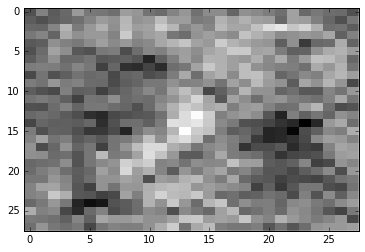

step 9100, training accuracy 0.96
step 9200, training accuracy 0.98
step 9300, training accuracy 0.96
step 9400, training accuracy 1
step 9500, training accuracy 0.98
step 9600, training accuracy 0.94
step 9700, training accuracy 0.96
step 9800, training accuracy 0.98
step 9900, training accuracy 0.9
epoch 9, learning rate 1e-07
step 0, training accuracy 0.98
Reconstruction of a 9


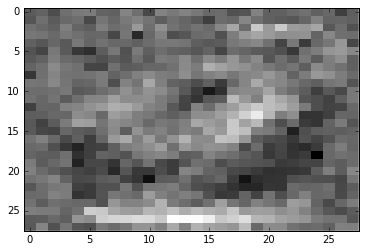

step 100, training accuracy 1
step 200, training accuracy 0.94
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 0.94
step 600, training accuracy 0.94
step 700, training accuracy 0.92
step 800, training accuracy 1
step 900, training accuracy 1
step 1000, training accuracy 0.94
Reconstruction of a 1


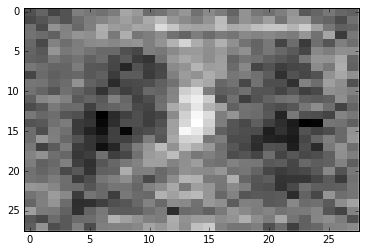

step 1100, training accuracy 0.98
step 1200, training accuracy 0.98
step 1300, training accuracy 0.98
step 1400, training accuracy 0.94
step 1500, training accuracy 1
step 1600, training accuracy 1
step 1700, training accuracy 0.98
step 1800, training accuracy 0.94
step 1900, training accuracy 0.98
step 2000, training accuracy 0.96
Reconstruction of a 5


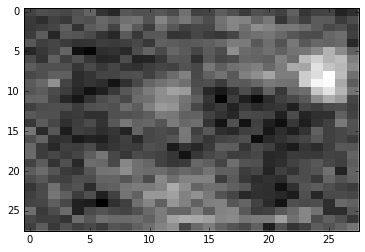

step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, training accuracy 0.94
step 2500, training accuracy 0.94
step 2600, training accuracy 0.96
step 2700, training accuracy 0.96
step 2800, training accuracy 0.98
step 2900, training accuracy 0.96
step 3000, training accuracy 0.96
Reconstruction of a 2


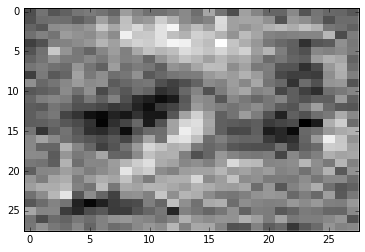

step 3100, training accuracy 0.96
step 3200, training accuracy 1
step 3300, training accuracy 0.98
step 3400, training accuracy 0.94
step 3500, training accuracy 1
step 3600, training accuracy 0.98
step 3700, training accuracy 0.98
step 3800, training accuracy 0.96
step 3900, training accuracy 0.92
step 4000, training accuracy 0.98
Reconstruction of a 3


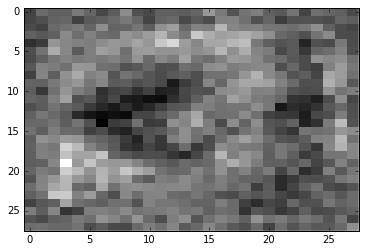

step 4100, training accuracy 0.98
step 4200, training accuracy 1
step 4300, training accuracy 0.98
step 4400, training accuracy 0.98
step 4500, training accuracy 0.9
step 4600, training accuracy 1
step 4700, training accuracy 0.92
step 4800, training accuracy 0.96
step 4900, training accuracy 1
step 5000, training accuracy 0.98
Reconstruction of a 0


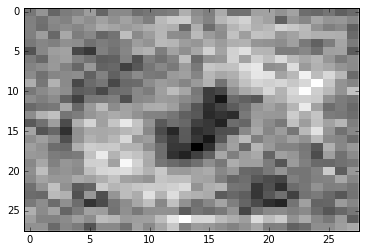

step 5100, training accuracy 0.96
step 5200, training accuracy 0.94
step 5300, training accuracy 0.98
step 5400, training accuracy 0.96
step 5500, training accuracy 1
step 5600, training accuracy 1
step 5700, training accuracy 0.94
step 5800, training accuracy 0.98
step 5900, training accuracy 0.94
step 6000, training accuracy 1
Reconstruction of a 1


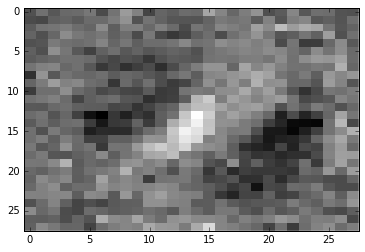

step 6100, training accuracy 0.96
step 6200, training accuracy 0.96
step 6300, training accuracy 0.98
step 6400, training accuracy 0.98
step 6500, training accuracy 0.98
step 6600, training accuracy 1
step 6700, training accuracy 0.92
step 6800, training accuracy 0.96
step 6900, training accuracy 0.98
step 7000, training accuracy 0.98
Reconstruction of a 5


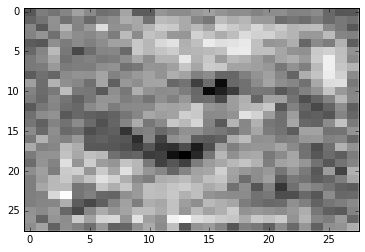

step 7100, training accuracy 1
step 7200, training accuracy 1
step 7300, training accuracy 0.94
step 7400, training accuracy 0.96
step 7500, training accuracy 0.98
step 7600, training accuracy 0.98
step 7700, training accuracy 0.88
step 7800, training accuracy 0.96
step 7900, training accuracy 0.94
step 8000, training accuracy 0.98
Reconstruction of a 0


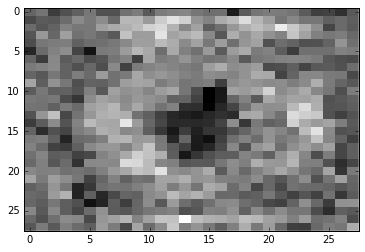

step 8100, training accuracy 0.96
step 8200, training accuracy 1
step 8300, training accuracy 0.98
step 8400, training accuracy 0.98
step 8500, training accuracy 0.98
step 8600, training accuracy 0.92
step 8700, training accuracy 0.92
step 8800, training accuracy 0.94
step 8900, training accuracy 0.98
step 9000, training accuracy 0.96
Reconstruction of a 4


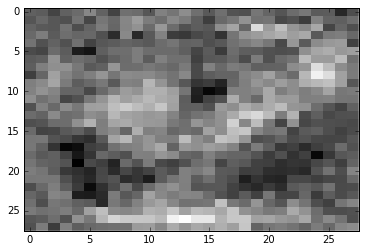

step 9100, training accuracy 0.94
step 9200, training accuracy 0.98
step 9300, training accuracy 1
step 9400, training accuracy 0.98
step 9500, training accuracy 0.98
step 9600, training accuracy 0.98
step 9700, training accuracy 0.98
step 9800, training accuracy 0.98
step 9900, training accuracy 0.98


In [78]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_r = tf.placeholder(tf.float32, shape=[None, 784])
learning_rate = tf.placeholder(tf.float32, shape=[])

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x,W) + b)
y = tf.nn.sigmoid(tf.matmul(a,W_2) + b_2)
x_r = tf.matmul(a-b,tf.transpose(W))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for epoch in range(10):
  l_r = 10**np.linspace(-4,-7,10)[epoch]
  print("epoch %d, learning rate %g"%(epoch,l_r))
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("step %d, training accuracy %g"%(i, train_accuracy))
    if i%1000 == 0:
      reconstruction = x_r.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
      plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
      plt.show()
    train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})

In [79]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

test accuracy 0.9604


# Using ReLU and reconstruction and epochs
Without epochs breaks down after around 20000 iterations with learning rate of 1e-4

epoch 0, learning rate 0.0001
step 0, training accuracy 0.1
Reconstruction of a 7


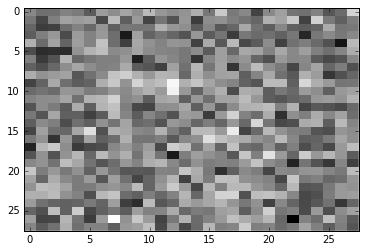

step 100, training accuracy 0.2
step 200, training accuracy 0.18
step 300, training accuracy 0.26
step 400, training accuracy 0.4
step 500, training accuracy 0.62
step 600, training accuracy 0.72
step 700, training accuracy 0.76
step 800, training accuracy 0.72
step 900, training accuracy 0.84
step 1000, training accuracy 0.8
Reconstruction of a 4


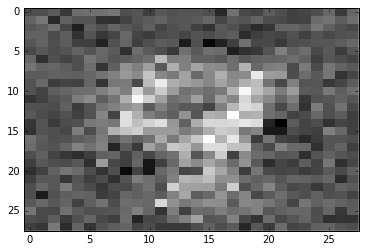

step 1100, training accuracy 0.8
step 1200, training accuracy 0.82
step 1300, training accuracy 0.7
step 1400, training accuracy 0.92
step 1500, training accuracy 0.84
step 1600, training accuracy 0.8
step 1700, training accuracy 0.88
step 1800, training accuracy 0.88
step 1900, training accuracy 0.8
step 2000, training accuracy 0.82
Reconstruction of a 4


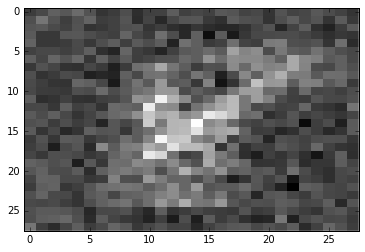

step 2100, training accuracy 0.86
step 2200, training accuracy 0.86
step 2300, training accuracy 0.8
step 2400, training accuracy 0.86
step 2500, training accuracy 0.88
step 2600, training accuracy 0.88
step 2700, training accuracy 0.88
step 2800, training accuracy 0.8
step 2900, training accuracy 0.9
step 3000, training accuracy 0.92
Reconstruction of a 0


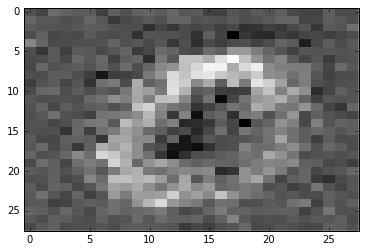

step 3100, training accuracy 0.9
step 3200, training accuracy 0.88
step 3300, training accuracy 0.94
step 3400, training accuracy 0.82
step 3500, training accuracy 0.9
step 3600, training accuracy 0.82
step 3700, training accuracy 0.9
step 3800, training accuracy 0.92
step 3900, training accuracy 0.88
step 4000, training accuracy 0.86
Reconstruction of a 7


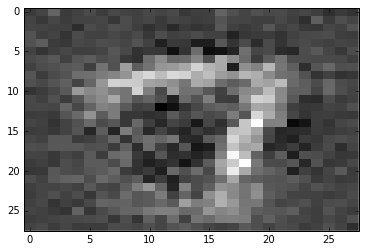

step 4100, training accuracy 0.9
step 4200, training accuracy 0.88
step 4300, training accuracy 0.92
step 4400, training accuracy 0.88
step 4500, training accuracy 0.8
step 4600, training accuracy 0.82
step 4700, training accuracy 0.88
step 4800, training accuracy 0.96
step 4900, training accuracy 0.92
step 5000, training accuracy 0.86
Reconstruction of a 9


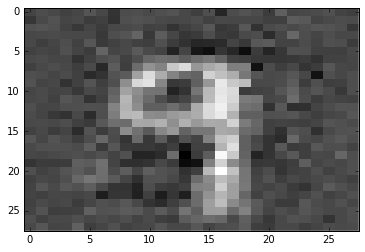

step 5100, training accuracy 0.96
step 5200, training accuracy 0.9
step 5300, training accuracy 0.88
step 5400, training accuracy 0.9
step 5500, training accuracy 0.9
step 5600, training accuracy 0.86
step 5700, training accuracy 0.84
step 5800, training accuracy 0.92
step 5900, training accuracy 0.94
step 6000, training accuracy 0.8
Reconstruction of a 3


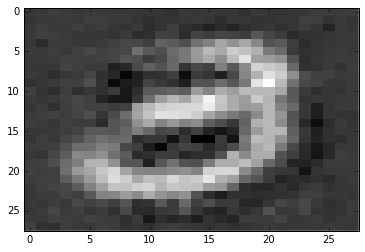

step 6100, training accuracy 0.98
step 6200, training accuracy 0.86
step 6300, training accuracy 0.84
step 6400, training accuracy 0.98
step 6500, training accuracy 0.86
step 6600, training accuracy 0.88
step 6700, training accuracy 0.96
step 6800, training accuracy 0.8
step 6900, training accuracy 0.9
step 7000, training accuracy 0.92
Reconstruction of a 7


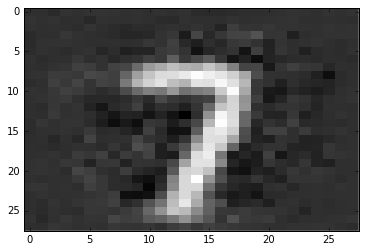

step 7100, training accuracy 0.88
step 7200, training accuracy 0.88
step 7300, training accuracy 0.88
step 7400, training accuracy 0.92
step 7500, training accuracy 0.92
step 7600, training accuracy 0.9
step 7700, training accuracy 0.9
step 7800, training accuracy 0.98
step 7900, training accuracy 0.88
step 8000, training accuracy 0.94
Reconstruction of a 5


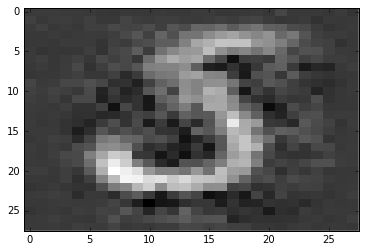

step 8100, training accuracy 0.88
step 8200, training accuracy 0.96
step 8300, training accuracy 0.82
step 8400, training accuracy 0.92
step 8500, training accuracy 0.92
step 8600, training accuracy 0.96
step 8700, training accuracy 0.96
step 8800, training accuracy 0.96
step 8900, training accuracy 0.88
step 9000, training accuracy 0.8
Reconstruction of a 3


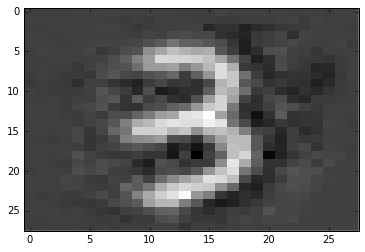

step 9100, training accuracy 0.86
step 9200, training accuracy 0.8
step 9300, training accuracy 0.88
step 9400, training accuracy 0.9
step 9500, training accuracy 0.94
step 9600, training accuracy 0.88
step 9700, training accuracy 0.88
step 9800, training accuracy 0.88
step 9900, training accuracy 0.82
epoch 1, learning rate 4.64159e-05
step 0, training accuracy 0.9
Reconstruction of a 6


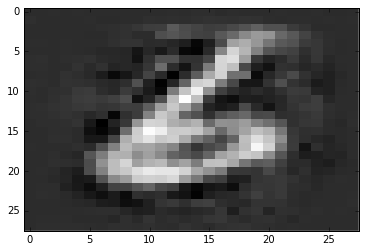

step 100, training accuracy 0.92
step 200, training accuracy 0.86
step 300, training accuracy 0.9
step 400, training accuracy 0.94
step 500, training accuracy 0.96
step 600, training accuracy 0.9
step 700, training accuracy 1
step 800, training accuracy 0.92
step 900, training accuracy 0.9
step 1000, training accuracy 0.86
Reconstruction of a 2


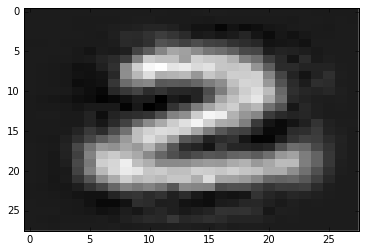

step 1100, training accuracy 0.9
step 1200, training accuracy 0.9
step 1300, training accuracy 0.82
step 1400, training accuracy 0.92
step 1500, training accuracy 0.88
step 1600, training accuracy 0.94
step 1700, training accuracy 0.84
step 1800, training accuracy 0.94
step 1900, training accuracy 0.84
step 2000, training accuracy 0.92
Reconstruction of a 2


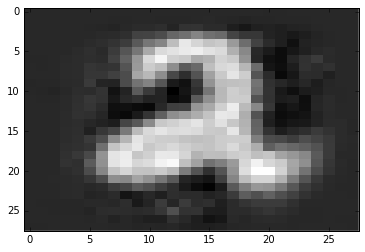

step 2100, training accuracy 0.9
step 2200, training accuracy 0.9
step 2300, training accuracy 0.9
step 2400, training accuracy 0.86
step 2500, training accuracy 0.78
step 2600, training accuracy 0.88
step 2700, training accuracy 0.92
step 2800, training accuracy 0.9
step 2900, training accuracy 0.82
step 3000, training accuracy 0.92
Reconstruction of a 7


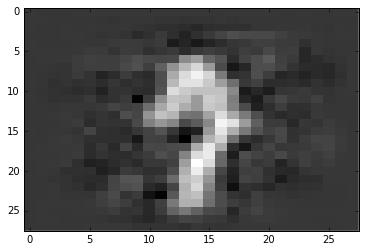

step 3100, training accuracy 0.88
step 3200, training accuracy 0.92
step 3300, training accuracy 0.92
step 3400, training accuracy 0.9
step 3500, training accuracy 0.84
step 3600, training accuracy 0.92
step 3700, training accuracy 0.86
step 3800, training accuracy 0.84
step 3900, training accuracy 0.9
step 4000, training accuracy 0.88
Reconstruction of a 1


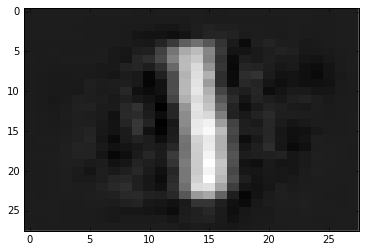

step 4100, training accuracy 0.9
step 4200, training accuracy 0.88
step 4300, training accuracy 0.9
step 4400, training accuracy 1
step 4500, training accuracy 0.92
step 4600, training accuracy 0.88
step 4700, training accuracy 0.9
step 4800, training accuracy 0.9
step 4900, training accuracy 0.84
step 5000, training accuracy 0.92
Reconstruction of a 8


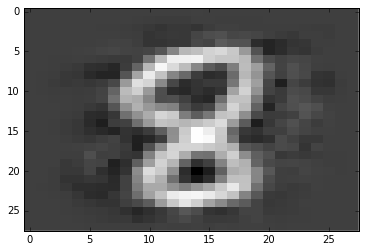

step 5100, training accuracy 0.92
step 5200, training accuracy 0.88
step 5300, training accuracy 0.94
step 5400, training accuracy 0.9
step 5500, training accuracy 0.96
step 5600, training accuracy 0.9
step 5700, training accuracy 0.92
step 5800, training accuracy 0.96
step 5900, training accuracy 0.94
step 6000, training accuracy 0.92
Reconstruction of a 0


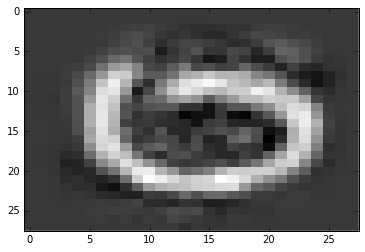

step 6100, training accuracy 0.88
step 6200, training accuracy 0.94
step 6300, training accuracy 0.98
step 6400, training accuracy 0.96
step 6500, training accuracy 0.84
step 6600, training accuracy 0.88
step 6700, training accuracy 0.98
step 6800, training accuracy 0.9
step 6900, training accuracy 0.96
step 7000, training accuracy 0.96
Reconstruction of a 1


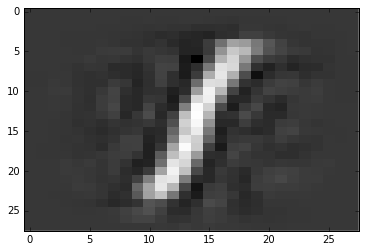

step 7100, training accuracy 0.9
step 7200, training accuracy 0.88
step 7300, training accuracy 0.98
step 7400, training accuracy 0.92
step 7500, training accuracy 0.86
step 7600, training accuracy 0.86
step 7700, training accuracy 0.92
step 7800, training accuracy 0.92
step 7900, training accuracy 0.92
step 8000, training accuracy 0.88
Reconstruction of a 7


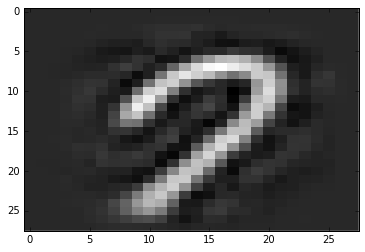

step 8100, training accuracy 0.88
step 8200, training accuracy 0.9
step 8300, training accuracy 0.98
step 8400, training accuracy 0.94
step 8500, training accuracy 0.92
step 8600, training accuracy 0.88
step 8700, training accuracy 0.92
step 8800, training accuracy 0.92
step 8900, training accuracy 0.92
step 9000, training accuracy 0.96
Reconstruction of a 3


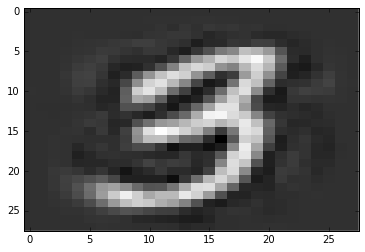

step 9100, training accuracy 0.96
step 9200, training accuracy 0.94
step 9300, training accuracy 0.94
step 9400, training accuracy 0.9
step 9500, training accuracy 0.92
step 9600, training accuracy 0.96
step 9700, training accuracy 0.9
step 9800, training accuracy 0.94
step 9900, training accuracy 0.94
epoch 2, learning rate 2.15443e-05
step 0, training accuracy 0.86
Reconstruction of a 7


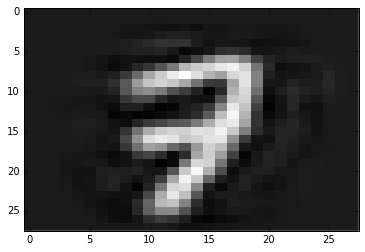

step 100, training accuracy 0.9
step 200, training accuracy 0.9
step 300, training accuracy 0.96
step 400, training accuracy 0.94
step 500, training accuracy 0.9
step 600, training accuracy 0.82
step 700, training accuracy 0.92
step 800, training accuracy 0.9
step 900, training accuracy 0.96
step 1000, training accuracy 0.96
Reconstruction of a 6


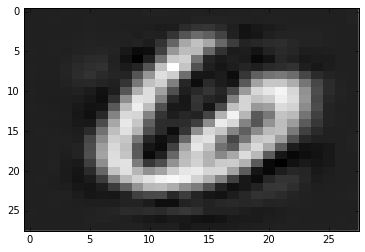

step 1100, training accuracy 0.92
step 1200, training accuracy 0.94
step 1300, training accuracy 0.92
step 1400, training accuracy 0.94
step 1500, training accuracy 0.8
step 1600, training accuracy 0.96
step 1700, training accuracy 0.88
step 1800, training accuracy 0.82
step 1900, training accuracy 0.96
step 2000, training accuracy 0.92
Reconstruction of a 9


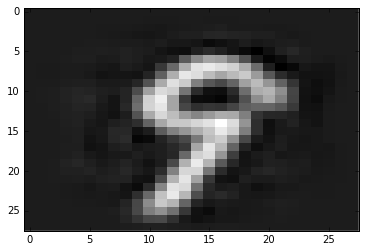

step 2100, training accuracy 0.88
step 2200, training accuracy 0.96
step 2300, training accuracy 0.9
step 2400, training accuracy 0.88
step 2500, training accuracy 0.94
step 2600, training accuracy 0.86
step 2700, training accuracy 0.84
step 2800, training accuracy 0.9
step 2900, training accuracy 0.92
step 3000, training accuracy 0.92
Reconstruction of a 0


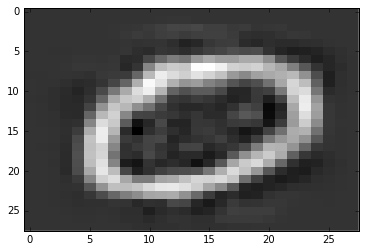

step 3100, training accuracy 0.92
step 3200, training accuracy 0.94
step 3300, training accuracy 0.9
step 3400, training accuracy 0.98
step 3500, training accuracy 0.9
step 3600, training accuracy 0.88
step 3700, training accuracy 0.96
step 3800, training accuracy 0.88
step 3900, training accuracy 0.96
step 4000, training accuracy 0.88
Reconstruction of a 6


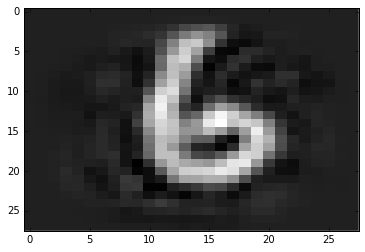

step 4100, training accuracy 0.88
step 4200, training accuracy 0.98
step 4300, training accuracy 0.94
step 4400, training accuracy 0.96
step 4500, training accuracy 0.92
step 4600, training accuracy 0.94
step 4700, training accuracy 0.94
step 4800, training accuracy 0.88
step 4900, training accuracy 0.92
step 5000, training accuracy 0.84
Reconstruction of a 5


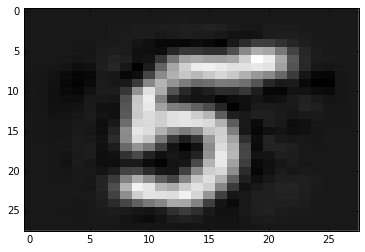

step 5100, training accuracy 0.86
step 5200, training accuracy 0.84
step 5300, training accuracy 0.98
step 5400, training accuracy 0.86
step 5500, training accuracy 0.78
step 5600, training accuracy 0.86
step 5700, training accuracy 0.92
step 5800, training accuracy 0.92
step 5900, training accuracy 0.84
step 6000, training accuracy 0.86
Reconstruction of a 4


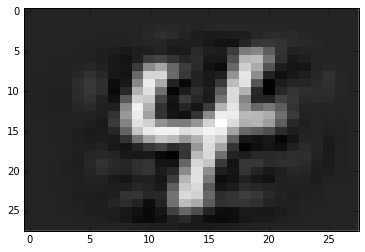

step 6100, training accuracy 0.94
step 6200, training accuracy 0.88
step 6300, training accuracy 0.98
step 6400, training accuracy 0.94
step 6500, training accuracy 0.86
step 6600, training accuracy 0.9
step 6700, training accuracy 0.88
step 6800, training accuracy 0.92
step 6900, training accuracy 0.84
step 7000, training accuracy 0.86
Reconstruction of a 1


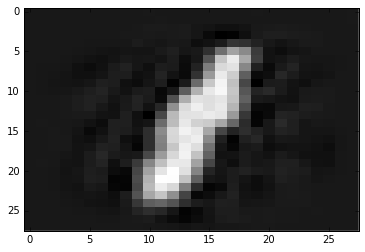

step 7100, training accuracy 0.94
step 7200, training accuracy 0.92
step 7300, training accuracy 0.94
step 7400, training accuracy 0.88
step 7500, training accuracy 0.94
step 7600, training accuracy 0.96
step 7700, training accuracy 0.9
step 7800, training accuracy 0.9
step 7900, training accuracy 0.92
step 8000, training accuracy 0.88
Reconstruction of a 7


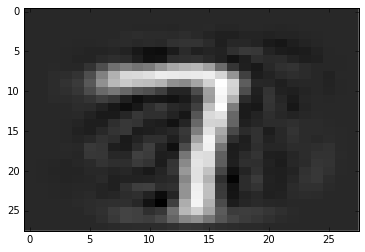

step 8100, training accuracy 0.92
step 8200, training accuracy 0.96
step 8300, training accuracy 0.88
step 8400, training accuracy 0.92
step 8500, training accuracy 0.9
step 8600, training accuracy 0.9
step 8700, training accuracy 0.9
step 8800, training accuracy 0.88
step 8900, training accuracy 0.94
step 9000, training accuracy 0.92
Reconstruction of a 2


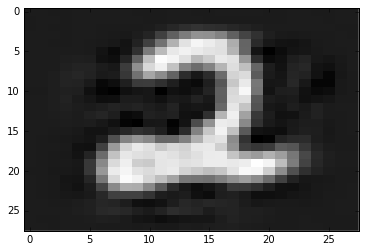

step 9100, training accuracy 0.86
step 9200, training accuracy 0.86
step 9300, training accuracy 0.92
step 9400, training accuracy 0.88
step 9500, training accuracy 0.92
step 9600, training accuracy 0.92
step 9700, training accuracy 0.8
step 9800, training accuracy 0.96
step 9900, training accuracy 0.94
epoch 3, learning rate 1e-05
step 0, training accuracy 0.86
Reconstruction of a 2


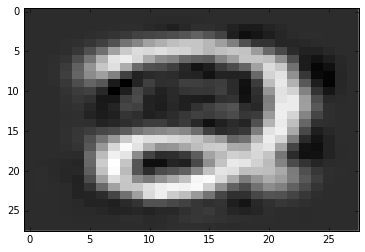

step 100, training accuracy 0.94
step 200, training accuracy 0.9
step 300, training accuracy 0.96
step 400, training accuracy 0.88
step 500, training accuracy 0.9
step 600, training accuracy 0.86
step 700, training accuracy 0.92
step 800, training accuracy 0.88
step 900, training accuracy 0.92
step 1000, training accuracy 0.96
Reconstruction of a 7


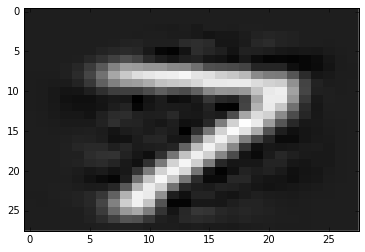

step 1100, training accuracy 0.88
step 1200, training accuracy 0.86
step 1300, training accuracy 0.9
step 1400, training accuracy 0.88
step 1500, training accuracy 0.9
step 1600, training accuracy 0.94
step 1700, training accuracy 0.9
step 1800, training accuracy 0.94
step 1900, training accuracy 0.9
step 2000, training accuracy 0.98
Reconstruction of a 3


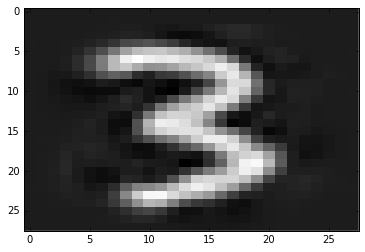

step 2100, training accuracy 0.88
step 2200, training accuracy 0.94
step 2300, training accuracy 0.88
step 2400, training accuracy 0.88
step 2500, training accuracy 0.92
step 2600, training accuracy 0.9
step 2700, training accuracy 0.92
step 2800, training accuracy 0.92
step 2900, training accuracy 0.86
step 3000, training accuracy 0.94
Reconstruction of a 3


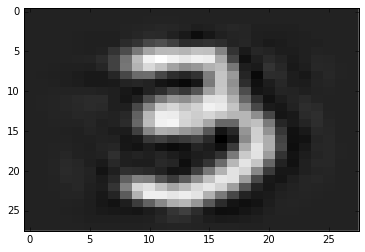

step 3100, training accuracy 0.86
step 3200, training accuracy 0.92
step 3300, training accuracy 0.84
step 3400, training accuracy 0.9
step 3500, training accuracy 0.92
step 3600, training accuracy 0.88
step 3700, training accuracy 0.9
step 3800, training accuracy 0.9
step 3900, training accuracy 0.9
step 4000, training accuracy 0.86
Reconstruction of a 3


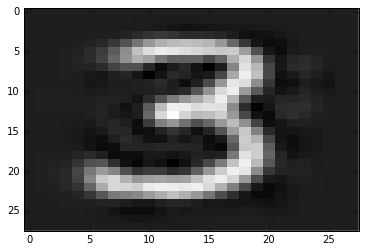

step 4100, training accuracy 0.88
step 4200, training accuracy 0.86
step 4300, training accuracy 0.96
step 4400, training accuracy 0.88
step 4500, training accuracy 0.82
step 4600, training accuracy 0.86
step 4700, training accuracy 0.86
step 4800, training accuracy 0.88
step 4900, training accuracy 0.86
step 5000, training accuracy 0.94
Reconstruction of a 4


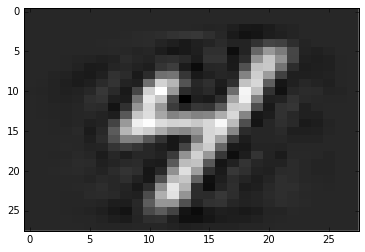

step 5100, training accuracy 0.88
step 5200, training accuracy 0.88
step 5300, training accuracy 0.84
step 5400, training accuracy 0.92
step 5500, training accuracy 0.96
step 5600, training accuracy 0.96
step 5700, training accuracy 0.94
step 5800, training accuracy 0.86
step 5900, training accuracy 0.92
step 6000, training accuracy 0.82
Reconstruction of a 9


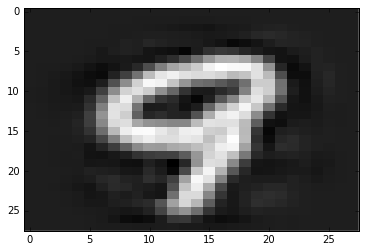

step 6100, training accuracy 0.78
step 6200, training accuracy 0.9
step 6300, training accuracy 0.88
step 6400, training accuracy 0.94
step 6500, training accuracy 0.92
step 6600, training accuracy 0.94
step 6700, training accuracy 0.92
step 6800, training accuracy 0.9
step 6900, training accuracy 0.94
step 7000, training accuracy 0.82
Reconstruction of a 5


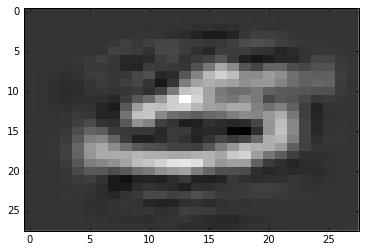

step 7100, training accuracy 0.9
step 7200, training accuracy 0.9
step 7300, training accuracy 0.96
step 7400, training accuracy 0.92
step 7500, training accuracy 0.9
step 7600, training accuracy 0.92
step 7700, training accuracy 0.9
step 7800, training accuracy 0.9
step 7900, training accuracy 0.92
step 8000, training accuracy 0.94
Reconstruction of a 1


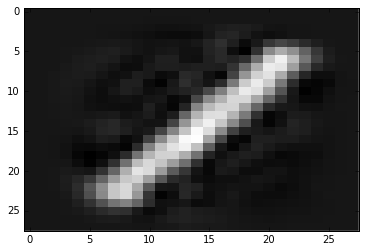

step 8100, training accuracy 0.92
step 8200, training accuracy 0.86
step 8300, training accuracy 0.94
step 8400, training accuracy 0.92
step 8500, training accuracy 0.92
step 8600, training accuracy 0.86
step 8700, training accuracy 0.88
step 8800, training accuracy 0.9
step 8900, training accuracy 0.9
step 9000, training accuracy 0.86
Reconstruction of a 9


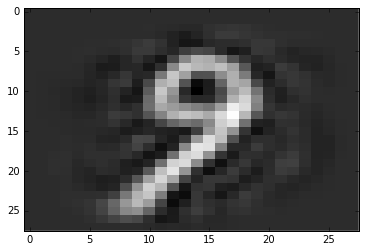

step 9100, training accuracy 0.86
step 9200, training accuracy 0.94
step 9300, training accuracy 0.94
step 9400, training accuracy 0.84
step 9500, training accuracy 0.94
step 9600, training accuracy 0.94
step 9700, training accuracy 0.88
step 9800, training accuracy 0.96
step 9900, training accuracy 0.92
epoch 4, learning rate 4.64159e-06
step 0, training accuracy 0.9
Reconstruction of a 2


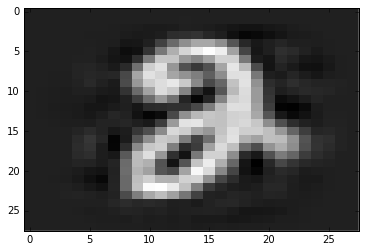

step 100, training accuracy 0.94
step 200, training accuracy 0.96
step 300, training accuracy 0.94
step 400, training accuracy 0.9
step 500, training accuracy 0.9
step 600, training accuracy 0.96
step 700, training accuracy 0.84
step 800, training accuracy 0.9
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
Reconstruction of a 7


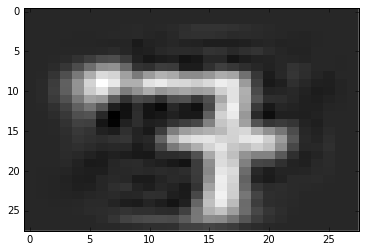

step 1100, training accuracy 0.94
step 1200, training accuracy 0.96
step 1300, training accuracy 0.94
step 1400, training accuracy 0.88
step 1500, training accuracy 0.96
step 1600, training accuracy 0.86
step 1700, training accuracy 0.92
step 1800, training accuracy 0.9
step 1900, training accuracy 0.9
step 2000, training accuracy 0.92
Reconstruction of a 7


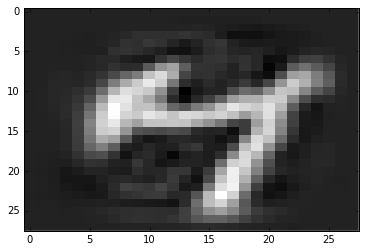

step 2100, training accuracy 0.86
step 2200, training accuracy 0.96
step 2300, training accuracy 0.86
step 2400, training accuracy 0.94
step 2500, training accuracy 0.88
step 2600, training accuracy 0.94
step 2700, training accuracy 0.9
step 2800, training accuracy 0.84
step 2900, training accuracy 0.96
step 3000, training accuracy 0.86
Reconstruction of a 3


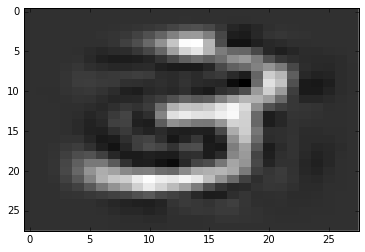

step 3100, training accuracy 0.96
step 3200, training accuracy 0.84
step 3300, training accuracy 0.88
step 3400, training accuracy 0.92
step 3500, training accuracy 0.9
step 3600, training accuracy 0.9
step 3700, training accuracy 0.9
step 3800, training accuracy 0.94
step 3900, training accuracy 0.88
step 4000, training accuracy 0.84
Reconstruction of a 8


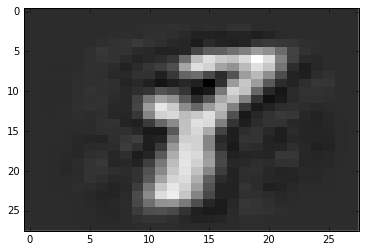

step 4100, training accuracy 0.94
step 4200, training accuracy 0.92
step 4300, training accuracy 0.88
step 4400, training accuracy 0.9
step 4500, training accuracy 0.9
step 4600, training accuracy 0.82
step 4700, training accuracy 0.94
step 4800, training accuracy 0.96
step 4900, training accuracy 0.9
step 5000, training accuracy 0.82
Reconstruction of a 7


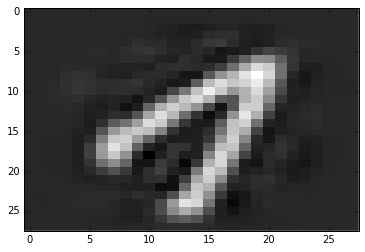

step 5100, training accuracy 0.96
step 5200, training accuracy 0.9
step 5300, training accuracy 0.92
step 5400, training accuracy 0.9
step 5500, training accuracy 0.9
step 5600, training accuracy 0.9
step 5700, training accuracy 0.94
step 5800, training accuracy 0.84
step 5900, training accuracy 0.88
step 6000, training accuracy 0.96
Reconstruction of a 2


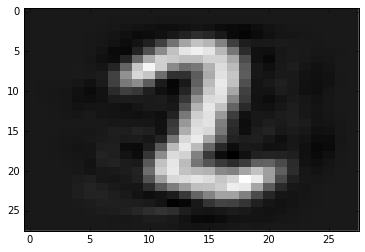

step 6100, training accuracy 0.9
step 6200, training accuracy 0.94
step 6300, training accuracy 1
step 6400, training accuracy 0.84
step 6500, training accuracy 0.94
step 6600, training accuracy 0.94
step 6700, training accuracy 0.9
step 6800, training accuracy 0.92
step 6900, training accuracy 0.96
step 7000, training accuracy 0.88
Reconstruction of a 2


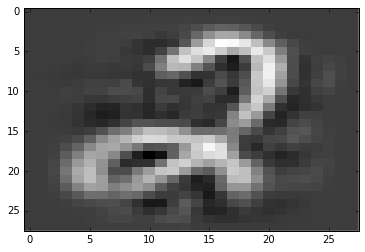

step 7100, training accuracy 0.82
step 7200, training accuracy 0.9
step 7300, training accuracy 0.9
step 7400, training accuracy 0.94
step 7500, training accuracy 0.92
step 7600, training accuracy 0.9
step 7700, training accuracy 1
step 7800, training accuracy 0.86
step 7900, training accuracy 0.88
step 8000, training accuracy 0.88
Reconstruction of a 6


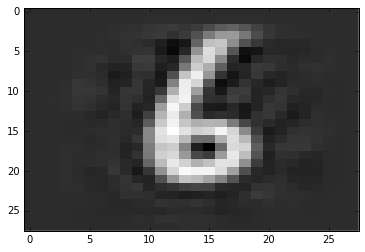

step 8100, training accuracy 0.92
step 8200, training accuracy 0.82
step 8300, training accuracy 0.86
step 8400, training accuracy 0.9
step 8500, training accuracy 0.92
step 8600, training accuracy 0.94
step 8700, training accuracy 0.86
step 8800, training accuracy 0.92
step 8900, training accuracy 0.86
step 9000, training accuracy 0.86
Reconstruction of a 7


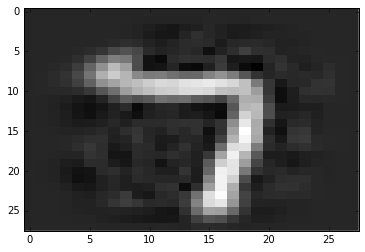

step 9100, training accuracy 0.92
step 9200, training accuracy 0.88
step 9300, training accuracy 0.88
step 9400, training accuracy 0.92
step 9500, training accuracy 0.9
step 9600, training accuracy 0.9
step 9700, training accuracy 0.84
step 9800, training accuracy 0.86
step 9900, training accuracy 0.9
epoch 5, learning rate 2.15443e-06
step 0, training accuracy 0.94
Reconstruction of a 3


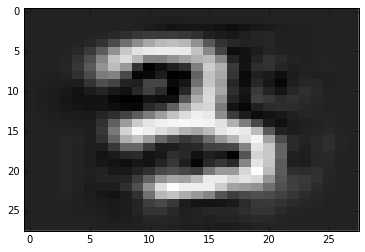

step 100, training accuracy 0.88
step 200, training accuracy 0.88
step 300, training accuracy 0.82
step 400, training accuracy 0.9
step 500, training accuracy 0.92
step 600, training accuracy 0.94
step 700, training accuracy 0.92
step 800, training accuracy 0.86
step 900, training accuracy 1
step 1000, training accuracy 0.9
Reconstruction of a 6


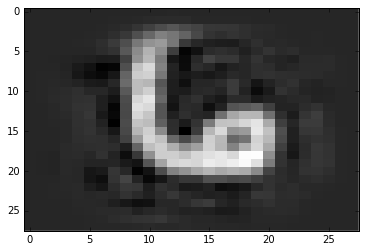

step 1100, training accuracy 0.96
step 1200, training accuracy 0.94
step 1300, training accuracy 0.8
step 1400, training accuracy 0.82
step 1500, training accuracy 0.88
step 1600, training accuracy 0.96
step 1700, training accuracy 0.9
step 1800, training accuracy 0.88
step 1900, training accuracy 0.92
step 2000, training accuracy 0.94
Reconstruction of a 1


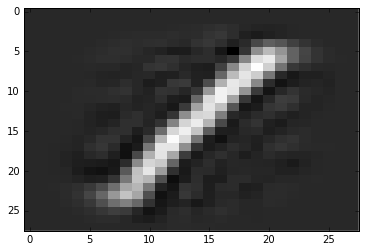

step 2100, training accuracy 0.86
step 2200, training accuracy 0.9
step 2300, training accuracy 0.84
step 2400, training accuracy 0.82
step 2500, training accuracy 0.92
step 2600, training accuracy 0.92
step 2700, training accuracy 0.92
step 2800, training accuracy 0.92
step 2900, training accuracy 0.96
step 3000, training accuracy 0.92
Reconstruction of a 3


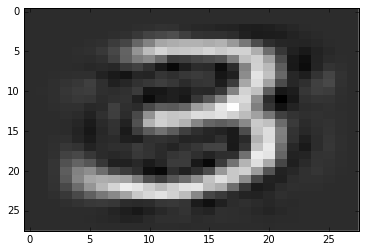

step 3100, training accuracy 0.92
step 3200, training accuracy 0.9
step 3300, training accuracy 0.82
step 3400, training accuracy 0.92
step 3500, training accuracy 0.9
step 3600, training accuracy 0.92
step 3700, training accuracy 0.98
step 3800, training accuracy 0.92
step 3900, training accuracy 0.96
step 4000, training accuracy 0.9
Reconstruction of a 8


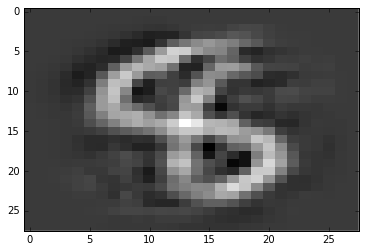

step 4100, training accuracy 0.9
step 4200, training accuracy 0.94
step 4300, training accuracy 0.86
step 4400, training accuracy 0.96
step 4500, training accuracy 0.9
step 4600, training accuracy 0.92
step 4700, training accuracy 0.86
step 4800, training accuracy 0.9
step 4900, training accuracy 0.88
step 5000, training accuracy 0.94
Reconstruction of a 5


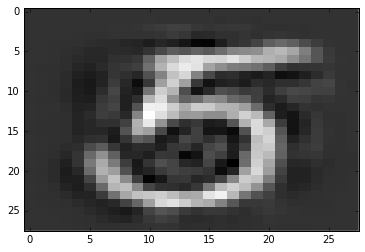

step 5100, training accuracy 0.9
step 5200, training accuracy 0.9
step 5300, training accuracy 0.82
step 5400, training accuracy 0.94
step 5500, training accuracy 0.92
step 5600, training accuracy 0.92
step 5700, training accuracy 0.88
step 5800, training accuracy 0.86
step 5900, training accuracy 0.94
step 6000, training accuracy 0.98
Reconstruction of a 5


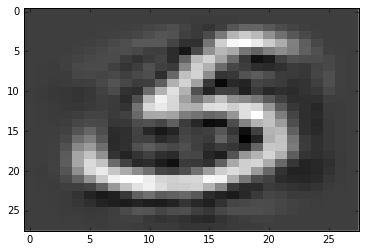

step 6100, training accuracy 0.86
step 6200, training accuracy 0.94
step 6300, training accuracy 0.92
step 6400, training accuracy 0.9
step 6500, training accuracy 0.94
step 6600, training accuracy 0.94
step 6700, training accuracy 0.9
step 6800, training accuracy 0.94
step 6900, training accuracy 0.88
step 7000, training accuracy 1
Reconstruction of a 5


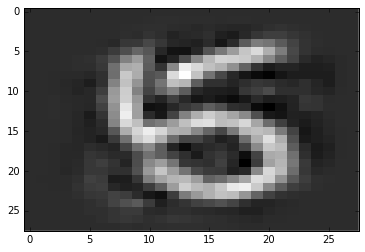

step 7100, training accuracy 0.82
step 7200, training accuracy 0.84
step 7300, training accuracy 0.88
step 7400, training accuracy 0.94
step 7500, training accuracy 0.88
step 7600, training accuracy 0.86
step 7700, training accuracy 0.86
step 7800, training accuracy 1
step 7900, training accuracy 0.94
step 8000, training accuracy 0.96
Reconstruction of a 5


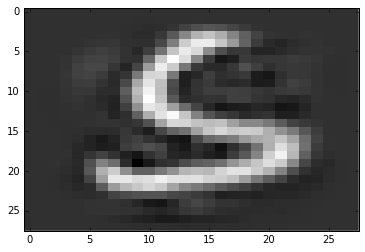

step 8100, training accuracy 0.94
step 8200, training accuracy 0.94
step 8300, training accuracy 0.9
step 8400, training accuracy 0.96
step 8500, training accuracy 0.82
step 8600, training accuracy 1
step 8700, training accuracy 0.92
step 8800, training accuracy 0.86
step 8900, training accuracy 0.98
step 9000, training accuracy 0.84
Reconstruction of a 0


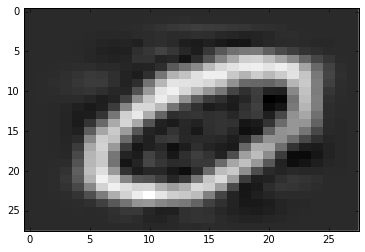

step 9100, training accuracy 0.94
step 9200, training accuracy 0.98
step 9300, training accuracy 0.86
step 9400, training accuracy 0.9
step 9500, training accuracy 0.88
step 9600, training accuracy 0.9
step 9700, training accuracy 0.76
step 9800, training accuracy 0.9
step 9900, training accuracy 0.94
epoch 6, learning rate 1e-06
step 0, training accuracy 0.94
Reconstruction of a 1


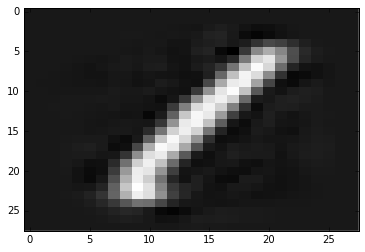

step 100, training accuracy 0.86
step 200, training accuracy 0.92
step 300, training accuracy 0.88
step 400, training accuracy 0.9
step 500, training accuracy 0.94
step 600, training accuracy 0.92
step 700, training accuracy 0.9
step 800, training accuracy 0.86
step 900, training accuracy 0.9
step 1000, training accuracy 0.92
Reconstruction of a 3


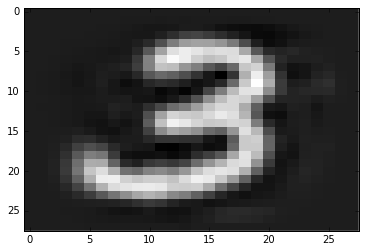

step 1100, training accuracy 0.9
step 1200, training accuracy 0.92
step 1300, training accuracy 0.84
step 1400, training accuracy 0.94
step 1500, training accuracy 0.88
step 1600, training accuracy 0.88
step 1700, training accuracy 0.94
step 1800, training accuracy 0.92
step 1900, training accuracy 0.94
step 2000, training accuracy 0.94
Reconstruction of a 6


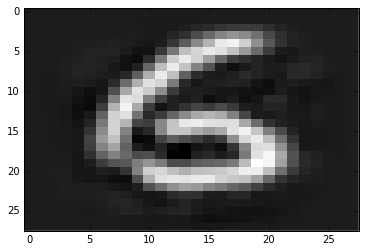

step 2100, training accuracy 0.9
step 2200, training accuracy 0.94
step 2300, training accuracy 0.94
step 2400, training accuracy 0.96
step 2500, training accuracy 0.94
step 2600, training accuracy 0.9
step 2700, training accuracy 0.98
step 2800, training accuracy 0.94
step 2900, training accuracy 0.9
step 3000, training accuracy 0.88
Reconstruction of a 3


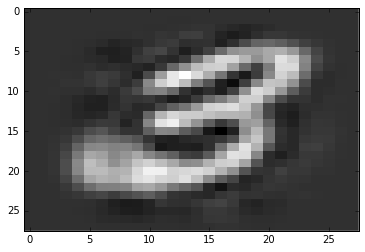

step 3100, training accuracy 0.88
step 3200, training accuracy 0.92
step 3300, training accuracy 0.9
step 3400, training accuracy 0.82
step 3500, training accuracy 0.92
step 3600, training accuracy 0.92
step 3700, training accuracy 0.9
step 3800, training accuracy 0.94
step 3900, training accuracy 0.88
step 4000, training accuracy 0.94
Reconstruction of a 1


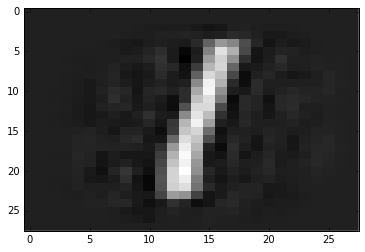

step 4100, training accuracy 0.96
step 4200, training accuracy 0.94
step 4300, training accuracy 0.86
step 4400, training accuracy 0.76
step 4500, training accuracy 0.9
step 4600, training accuracy 0.88
step 4700, training accuracy 0.94
step 4800, training accuracy 0.94
step 4900, training accuracy 0.84
step 5000, training accuracy 0.88
Reconstruction of a 3


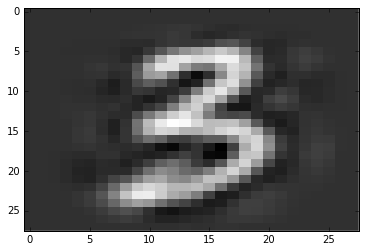

step 5100, training accuracy 0.96
step 5200, training accuracy 0.9
step 5300, training accuracy 0.98
step 5400, training accuracy 0.86
step 5500, training accuracy 0.94
step 5600, training accuracy 0.88
step 5700, training accuracy 0.84
step 5800, training accuracy 0.92
step 5900, training accuracy 0.94
step 6000, training accuracy 0.88
Reconstruction of a 6


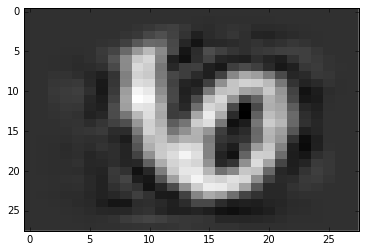

step 6100, training accuracy 0.98
step 6200, training accuracy 0.94
step 6300, training accuracy 0.86
step 6400, training accuracy 0.92
step 6500, training accuracy 0.94
step 6600, training accuracy 0.92
step 6700, training accuracy 0.86
step 6800, training accuracy 0.94
step 6900, training accuracy 0.88
step 7000, training accuracy 0.92
Reconstruction of a 4


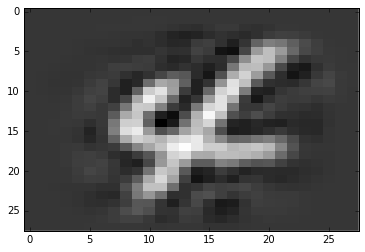

step 7100, training accuracy 0.94
step 7200, training accuracy 0.9
step 7300, training accuracy 0.9
step 7400, training accuracy 0.96
step 7500, training accuracy 0.9
step 7600, training accuracy 0.88
step 7700, training accuracy 0.9
step 7800, training accuracy 0.96
step 7900, training accuracy 0.92
step 8000, training accuracy 0.9
Reconstruction of a 1


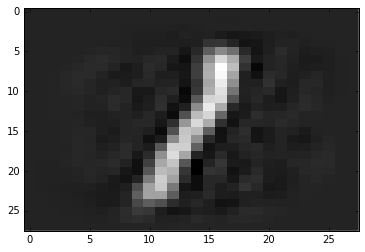

step 8100, training accuracy 0.86
step 8200, training accuracy 0.88
step 8300, training accuracy 0.8
step 8400, training accuracy 0.88
step 8500, training accuracy 0.92
step 8600, training accuracy 0.84
step 8700, training accuracy 0.9
step 8800, training accuracy 0.9
step 8900, training accuracy 0.94
step 9000, training accuracy 0.88
Reconstruction of a 1


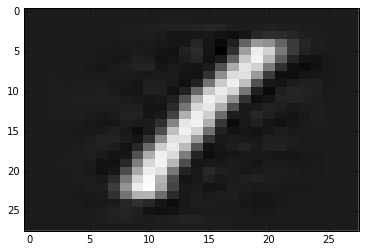

step 9100, training accuracy 0.9
step 9200, training accuracy 0.84
step 9300, training accuracy 0.98
step 9400, training accuracy 0.92
step 9500, training accuracy 0.96
step 9600, training accuracy 0.94
step 9700, training accuracy 0.94
step 9800, training accuracy 0.84
step 9900, training accuracy 0.96
epoch 7, learning rate 4.64159e-07
step 0, training accuracy 0.9
Reconstruction of a 9


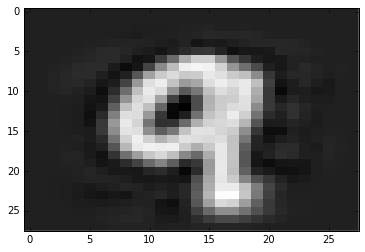

step 100, training accuracy 0.8
step 200, training accuracy 0.9
step 300, training accuracy 0.88
step 400, training accuracy 0.84
step 500, training accuracy 0.86
step 600, training accuracy 0.86
step 700, training accuracy 0.96
step 800, training accuracy 0.92
step 900, training accuracy 0.9
step 1000, training accuracy 0.9
Reconstruction of a 7


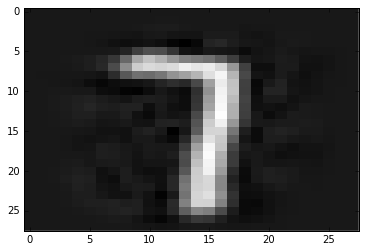

step 1100, training accuracy 0.94
step 1200, training accuracy 0.9
step 1300, training accuracy 0.86
step 1400, training accuracy 0.96
step 1500, training accuracy 0.86
step 1600, training accuracy 0.94
step 1700, training accuracy 0.86
step 1800, training accuracy 0.88
step 1900, training accuracy 0.92
step 2000, training accuracy 0.88
Reconstruction of a 7


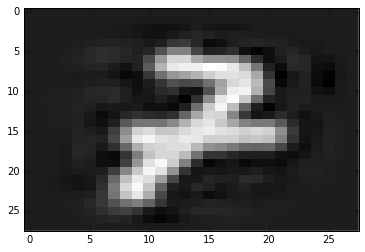

step 2100, training accuracy 0.96
step 2200, training accuracy 0.88
step 2300, training accuracy 0.92
step 2400, training accuracy 0.86
step 2500, training accuracy 0.94
step 2600, training accuracy 0.94
step 2700, training accuracy 0.98
step 2800, training accuracy 0.9
step 2900, training accuracy 0.92
step 3000, training accuracy 0.9
Reconstruction of a 2


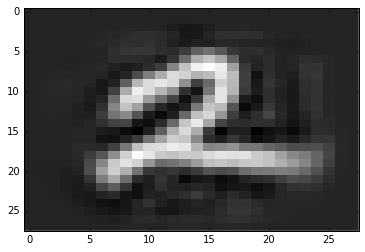

step 3100, training accuracy 0.94
step 3200, training accuracy 0.84
step 3300, training accuracy 0.96
step 3400, training accuracy 0.92
step 3500, training accuracy 0.94
step 3600, training accuracy 0.92
step 3700, training accuracy 0.94
step 3800, training accuracy 0.92
step 3900, training accuracy 0.96
step 4000, training accuracy 0.96
Reconstruction of a 1


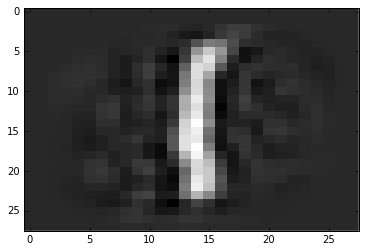

step 4100, training accuracy 0.94
step 4200, training accuracy 0.86
step 4300, training accuracy 0.92
step 4400, training accuracy 0.94
step 4500, training accuracy 0.96
step 4600, training accuracy 0.84
step 4700, training accuracy 0.88
step 4800, training accuracy 0.96
step 4900, training accuracy 0.94
step 5000, training accuracy 0.96
Reconstruction of a 9


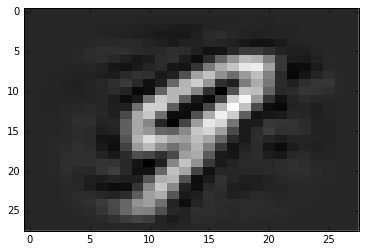

step 5100, training accuracy 0.92
step 5200, training accuracy 0.94
step 5300, training accuracy 0.92
step 5400, training accuracy 0.88
step 5500, training accuracy 0.86
step 5600, training accuracy 0.86
step 5700, training accuracy 0.9
step 5800, training accuracy 0.98
step 5900, training accuracy 0.86
step 6000, training accuracy 0.96
Reconstruction of a 1


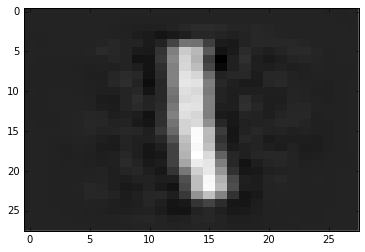

step 6100, training accuracy 0.94
step 6200, training accuracy 0.88
step 6300, training accuracy 0.88
step 6400, training accuracy 0.96
step 6500, training accuracy 0.86
step 6600, training accuracy 0.9
step 6700, training accuracy 0.92
step 6800, training accuracy 0.96
step 6900, training accuracy 0.92
step 7000, training accuracy 0.9
Reconstruction of a 4


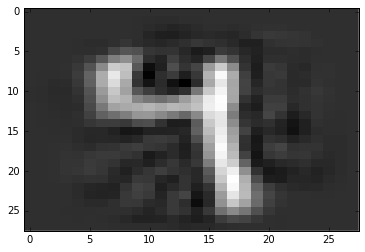

step 7100, training accuracy 0.9
step 7200, training accuracy 0.88
step 7300, training accuracy 0.92
step 7400, training accuracy 0.92
step 7500, training accuracy 0.94
step 7600, training accuracy 0.96
step 7700, training accuracy 0.86
step 7800, training accuracy 0.92
step 7900, training accuracy 0.9
step 8000, training accuracy 0.94
Reconstruction of a 7


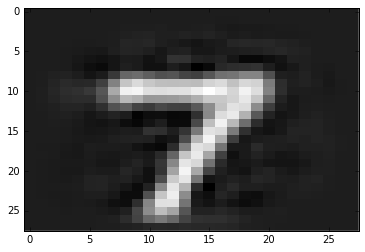

step 8100, training accuracy 0.9
step 8200, training accuracy 0.9
step 8300, training accuracy 0.9
step 8400, training accuracy 0.92
step 8500, training accuracy 0.94
step 8600, training accuracy 0.92
step 8700, training accuracy 0.92
step 8800, training accuracy 0.86
step 8900, training accuracy 0.94
step 9000, training accuracy 1
Reconstruction of a 1


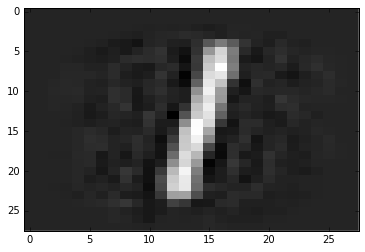

step 9100, training accuracy 0.88
step 9200, training accuracy 0.94
step 9300, training accuracy 0.86
step 9400, training accuracy 0.94
step 9500, training accuracy 0.9
step 9600, training accuracy 0.86
step 9700, training accuracy 0.92
step 9800, training accuracy 0.86
step 9900, training accuracy 0.88
epoch 8, learning rate 2.15443e-07
step 0, training accuracy 0.92
Reconstruction of a 6


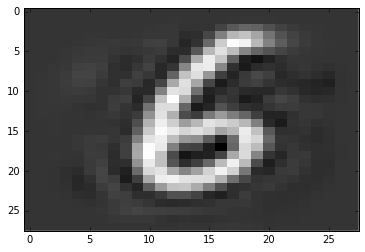

step 100, training accuracy 0.82
step 200, training accuracy 0.92
step 300, training accuracy 0.9
step 400, training accuracy 0.88
step 500, training accuracy 0.96
step 600, training accuracy 0.94
step 700, training accuracy 0.92
step 800, training accuracy 0.94
step 900, training accuracy 0.94
step 1000, training accuracy 0.86
Reconstruction of a 0


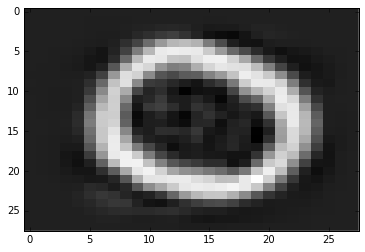

step 1100, training accuracy 0.94
step 1200, training accuracy 0.9
step 1300, training accuracy 0.86
step 1400, training accuracy 0.84
step 1500, training accuracy 0.92
step 1600, training accuracy 0.9
step 1700, training accuracy 0.88
step 1800, training accuracy 0.88
step 1900, training accuracy 0.88
step 2000, training accuracy 0.84
Reconstruction of a 9


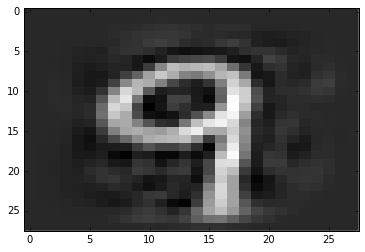

step 2100, training accuracy 0.92
step 2200, training accuracy 0.92
step 2300, training accuracy 0.82
step 2400, training accuracy 0.92
step 2500, training accuracy 0.94
step 2600, training accuracy 0.98
step 2700, training accuracy 0.92
step 2800, training accuracy 0.9
step 2900, training accuracy 0.92
step 3000, training accuracy 0.86
Reconstruction of a 1


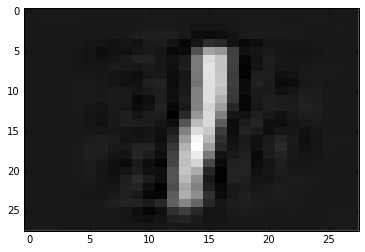

step 3100, training accuracy 0.92
step 3200, training accuracy 0.9
step 3300, training accuracy 0.9
step 3400, training accuracy 0.88
step 3500, training accuracy 0.9
step 3600, training accuracy 0.94
step 3700, training accuracy 0.8
step 3800, training accuracy 0.94
step 3900, training accuracy 0.94
step 4000, training accuracy 0.94
Reconstruction of a 7


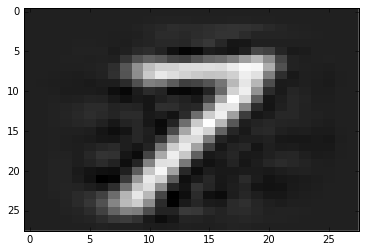

step 4100, training accuracy 0.84
step 4200, training accuracy 0.92
step 4300, training accuracy 0.88
step 4400, training accuracy 0.94
step 4500, training accuracy 0.88
step 4600, training accuracy 0.94
step 4700, training accuracy 0.92
step 4800, training accuracy 0.92
step 4900, training accuracy 0.94
step 5000, training accuracy 0.96
Reconstruction of a 8


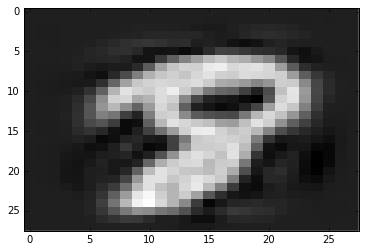

step 5100, training accuracy 0.88
step 5200, training accuracy 0.88
step 5300, training accuracy 0.9
step 5400, training accuracy 0.84
step 5500, training accuracy 0.82
step 5600, training accuracy 0.9
step 5700, training accuracy 0.92
step 5800, training accuracy 0.84
step 5900, training accuracy 0.96
step 6000, training accuracy 0.9
Reconstruction of a 7


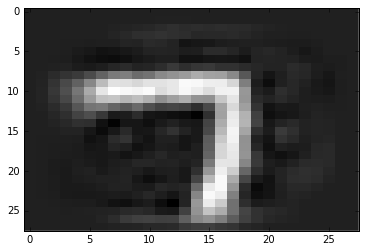

step 6100, training accuracy 0.96
step 6200, training accuracy 0.96
step 6300, training accuracy 0.94
step 6400, training accuracy 0.98
step 6500, training accuracy 0.9
step 6600, training accuracy 0.9
step 6700, training accuracy 0.9
step 6800, training accuracy 0.94
step 6900, training accuracy 0.88
step 7000, training accuracy 0.9
Reconstruction of a 0


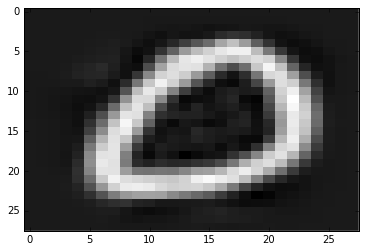

step 7100, training accuracy 0.94
step 7200, training accuracy 0.8
step 7300, training accuracy 0.92
step 7400, training accuracy 0.92
step 7500, training accuracy 0.86
step 7600, training accuracy 0.92
step 7700, training accuracy 0.86
step 7800, training accuracy 0.96
step 7900, training accuracy 0.86
step 8000, training accuracy 0.92
Reconstruction of a 9


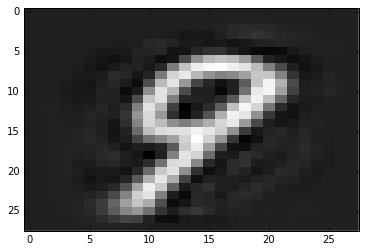

step 8100, training accuracy 0.82
step 8200, training accuracy 0.9
step 8300, training accuracy 0.88
step 8400, training accuracy 0.98
step 8500, training accuracy 0.92
step 8600, training accuracy 0.96
step 8700, training accuracy 0.94
step 8800, training accuracy 0.98
step 8900, training accuracy 0.82
step 9000, training accuracy 0.86
Reconstruction of a 5


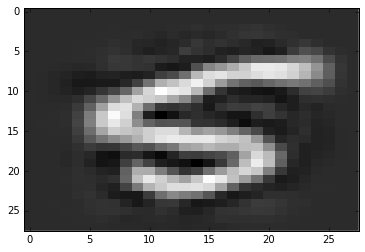

step 9100, training accuracy 0.94
step 9200, training accuracy 0.96
step 9300, training accuracy 0.84
step 9400, training accuracy 0.8
step 9500, training accuracy 0.9
step 9600, training accuracy 1
step 9700, training accuracy 0.94
step 9800, training accuracy 0.9
step 9900, training accuracy 0.88
epoch 9, learning rate 1e-07
step 0, training accuracy 0.9
Reconstruction of a 0


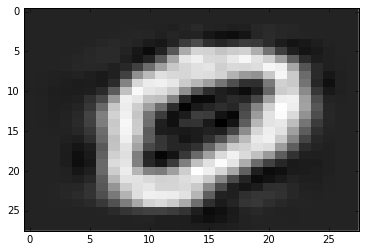

step 100, training accuracy 0.9
step 200, training accuracy 0.9
step 300, training accuracy 0.86
step 400, training accuracy 0.84
step 500, training accuracy 0.86
step 600, training accuracy 0.86
step 700, training accuracy 0.88
step 800, training accuracy 0.88
step 900, training accuracy 0.96
step 1000, training accuracy 0.88
Reconstruction of a 2


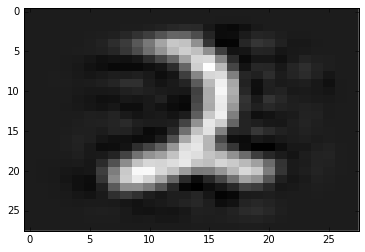

step 1100, training accuracy 0.88
step 1200, training accuracy 0.92
step 1300, training accuracy 0.9
step 1400, training accuracy 0.9
step 1500, training accuracy 0.92
step 1600, training accuracy 0.9
step 1700, training accuracy 0.92
step 1800, training accuracy 0.88
step 1900, training accuracy 0.88
step 2000, training accuracy 0.88
Reconstruction of a 6


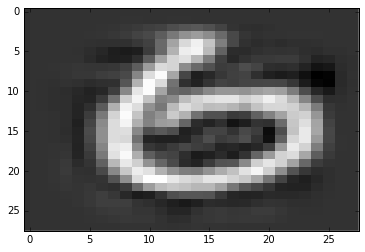

step 2100, training accuracy 0.88
step 2200, training accuracy 0.84
step 2300, training accuracy 0.86
step 2400, training accuracy 0.92
step 2500, training accuracy 0.88
step 2600, training accuracy 0.9
step 2700, training accuracy 0.88
step 2800, training accuracy 0.92
step 2900, training accuracy 0.96
step 3000, training accuracy 0.94
Reconstruction of a 3


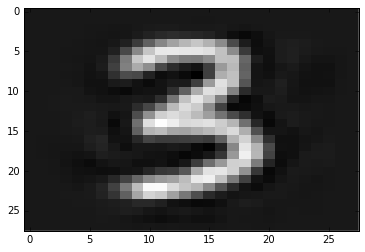

step 3100, training accuracy 0.94
step 3200, training accuracy 0.98
step 3300, training accuracy 0.96
step 3400, training accuracy 0.88
step 3500, training accuracy 0.92
step 3600, training accuracy 0.98
step 3700, training accuracy 0.9
step 3800, training accuracy 0.9
step 3900, training accuracy 0.94
step 4000, training accuracy 0.92
Reconstruction of a 3


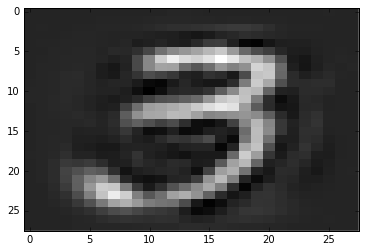

step 4100, training accuracy 0.92
step 4200, training accuracy 0.92
step 4300, training accuracy 0.92
step 4400, training accuracy 0.88
step 4500, training accuracy 0.94
step 4600, training accuracy 0.9
step 4700, training accuracy 0.9
step 4800, training accuracy 0.84
step 4900, training accuracy 0.92
step 5000, training accuracy 0.88
Reconstruction of a 0


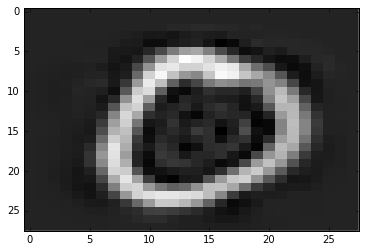

step 5100, training accuracy 0.94
step 5200, training accuracy 0.84
step 5300, training accuracy 0.88
step 5400, training accuracy 0.96
step 5500, training accuracy 0.94
step 5600, training accuracy 0.86
step 5700, training accuracy 0.94
step 5800, training accuracy 0.94
step 5900, training accuracy 0.88
step 6000, training accuracy 0.9
Reconstruction of a 8


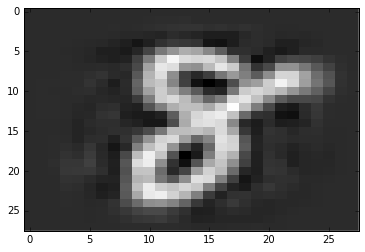

step 6100, training accuracy 0.84
step 6200, training accuracy 0.9
step 6300, training accuracy 0.92
step 6400, training accuracy 0.88
step 6500, training accuracy 0.82
step 6600, training accuracy 0.8
step 6700, training accuracy 0.9
step 6800, training accuracy 0.9
step 6900, training accuracy 0.94
step 7000, training accuracy 0.86
Reconstruction of a 3


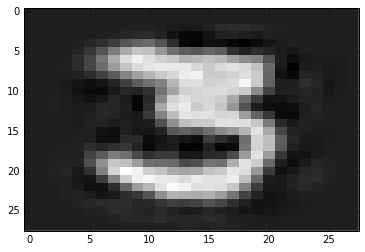

step 7100, training accuracy 1
step 7200, training accuracy 0.88
step 7300, training accuracy 0.92
step 7400, training accuracy 0.84
step 7500, training accuracy 0.8
step 7600, training accuracy 0.86
step 7700, training accuracy 0.88
step 7800, training accuracy 0.9
step 7900, training accuracy 0.9
step 8000, training accuracy 0.92
Reconstruction of a 8


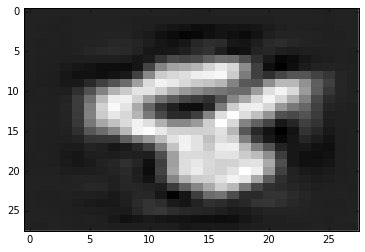

step 8100, training accuracy 0.94
step 8200, training accuracy 0.88
step 8300, training accuracy 0.92
step 8400, training accuracy 0.88
step 8500, training accuracy 0.94
step 8600, training accuracy 0.96
step 8700, training accuracy 0.86
step 8800, training accuracy 0.88
step 8900, training accuracy 0.9
step 9000, training accuracy 0.9
Reconstruction of a 4


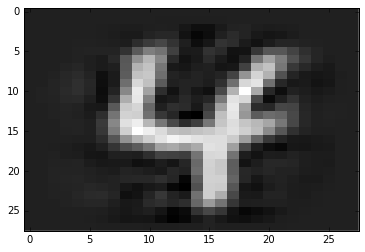

step 9100, training accuracy 0.86
step 9200, training accuracy 0.86
step 9300, training accuracy 0.9
step 9400, training accuracy 0.86
step 9500, training accuracy 0.86
step 9600, training accuracy 0.86
step 9700, training accuracy 0.9
step 9800, training accuracy 0.86
step 9900, training accuracy 0.9


In [65]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_r = tf.placeholder(tf.float32, shape=[None, 784])
learning_rate = tf.placeholder(tf.float32, shape=[])

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x,W) + b)
y = tf.nn.sigmoid(tf.matmul(a,W_2) + b_2)
x_r = tf.matmul(a-b,tf.transpose(W))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
back_train_step = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_error)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for epoch in range(10):
  l_r = 10**np.linspace(-4,-7,10)[epoch]
  print("epoch %d, learning rate %g"%(epoch,l_r))
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("step %d, training accuracy %g"%(i, train_accuracy))
    if i%1000 == 0:
      reconstruction = x_r.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
      plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
      plt.show()
    train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})
    back_train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})

In [66]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

test accuracy 0.91


# Using ReLU and reconstruction and epochs with different batches for each minimization
## Different batches not required apparently
Without epochs breaks down after around 20000 iterations with learning rate of 1e-4

epoch 0, learning rate 0.0001
step 0, training accuracy 0.12
Reconstruction of a 4


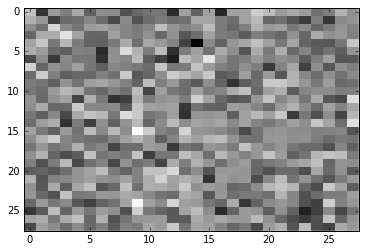

step 100, training accuracy 0.2
step 200, training accuracy 0.08
step 300, training accuracy 0.38
step 400, training accuracy 0.5
step 500, training accuracy 0.6
step 600, training accuracy 0.7
step 700, training accuracy 0.7
step 800, training accuracy 0.62
step 900, training accuracy 0.74
step 1000, training accuracy 0.78
Reconstruction of a 4


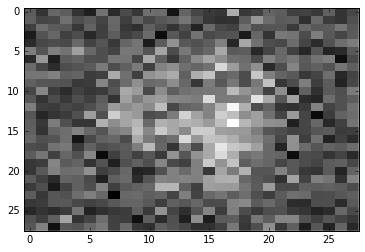

step 1100, training accuracy 0.7
step 1200, training accuracy 0.84
step 1300, training accuracy 0.82
step 1400, training accuracy 0.94
step 1500, training accuracy 0.88
step 1600, training accuracy 0.88
step 1700, training accuracy 0.9
step 1800, training accuracy 0.9
step 1900, training accuracy 0.86
step 2000, training accuracy 0.92
Reconstruction of a 9


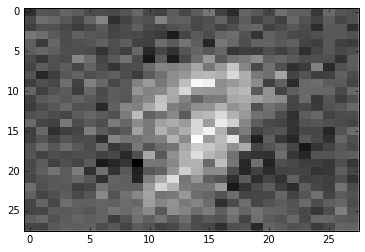

step 2100, training accuracy 0.84
step 2200, training accuracy 0.86
step 2300, training accuracy 0.88
step 2400, training accuracy 0.84
step 2500, training accuracy 0.92
step 2600, training accuracy 0.86
step 2700, training accuracy 0.82
step 2800, training accuracy 0.84
step 2900, training accuracy 0.92
step 3000, training accuracy 0.8
Reconstruction of a 1


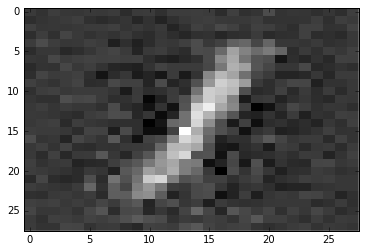

step 3100, training accuracy 0.88
step 3200, training accuracy 0.96
step 3300, training accuracy 0.9
step 3400, training accuracy 0.8
step 3500, training accuracy 0.96
step 3600, training accuracy 0.92
step 3700, training accuracy 0.9
step 3800, training accuracy 0.86
step 3900, training accuracy 0.92
step 4000, training accuracy 0.92
Reconstruction of a 8


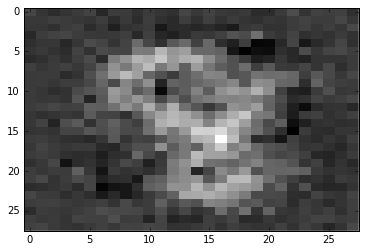

step 4100, training accuracy 0.88
step 4200, training accuracy 0.92
step 4300, training accuracy 0.74
step 4400, training accuracy 0.9
step 4500, training accuracy 0.92
step 4600, training accuracy 0.88
step 4700, training accuracy 0.94
step 4800, training accuracy 0.9
step 4900, training accuracy 0.88
step 5000, training accuracy 0.86
Reconstruction of a 6


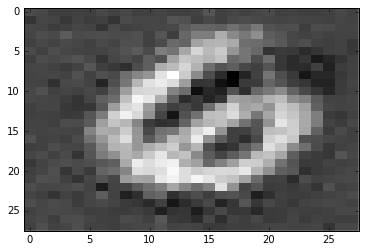

step 5100, training accuracy 0.9
step 5200, training accuracy 0.9
step 5300, training accuracy 0.9
step 5400, training accuracy 1
step 5500, training accuracy 0.9
step 5600, training accuracy 0.86
step 5700, training accuracy 0.88
step 5800, training accuracy 0.92
step 5900, training accuracy 0.86
step 6000, training accuracy 0.94
Reconstruction of a 4


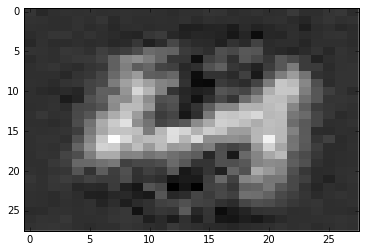

step 6100, training accuracy 0.9
step 6200, training accuracy 0.88
step 6300, training accuracy 0.86
step 6400, training accuracy 0.86
step 6500, training accuracy 0.94
step 6600, training accuracy 0.92
step 6700, training accuracy 0.96
step 6800, training accuracy 0.86
step 6900, training accuracy 0.88
step 7000, training accuracy 0.86
Reconstruction of a 7


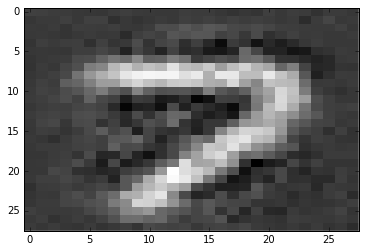

step 7100, training accuracy 0.92
step 7200, training accuracy 0.94
step 7300, training accuracy 0.92
step 7400, training accuracy 0.8
step 7500, training accuracy 0.94
step 7600, training accuracy 0.94
step 7700, training accuracy 0.82
step 7800, training accuracy 0.84
step 7900, training accuracy 0.94
step 8000, training accuracy 0.9
Reconstruction of a 0


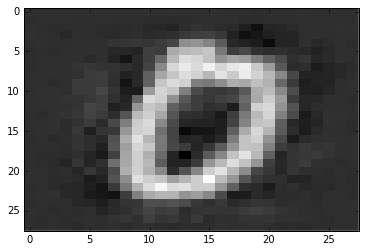

step 8100, training accuracy 0.88
step 8200, training accuracy 0.94
step 8300, training accuracy 0.92
step 8400, training accuracy 0.92
step 8500, training accuracy 0.84
step 8600, training accuracy 0.84
step 8700, training accuracy 0.92
step 8800, training accuracy 0.84
step 8900, training accuracy 0.96
step 9000, training accuracy 0.9
Reconstruction of a 0


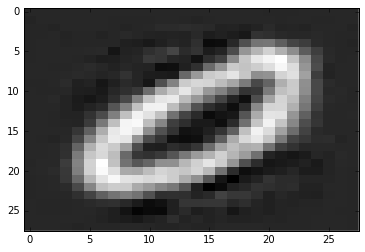

step 9100, training accuracy 0.94
step 9200, training accuracy 0.88
step 9300, training accuracy 0.9
step 9400, training accuracy 0.9
step 9500, training accuracy 0.86
step 9600, training accuracy 0.9
step 9700, training accuracy 0.86
step 9800, training accuracy 0.96
step 9900, training accuracy 0.92
epoch 1, learning rate 4.64159e-05
step 0, training accuracy 0.92
Reconstruction of a 2


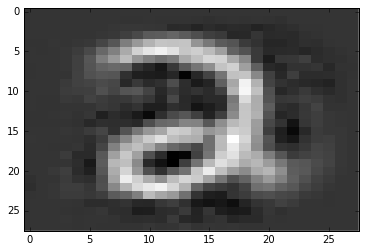

step 100, training accuracy 0.92
step 200, training accuracy 0.96
step 300, training accuracy 0.94
step 400, training accuracy 0.92
step 500, training accuracy 0.86
step 600, training accuracy 0.96
step 700, training accuracy 0.92
step 800, training accuracy 0.88
step 900, training accuracy 0.88
step 1000, training accuracy 0.92
Reconstruction of a 2


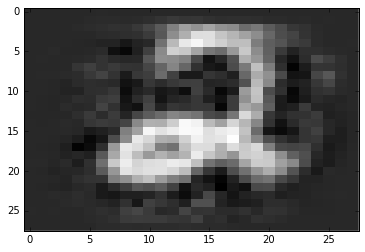

step 1100, training accuracy 0.92
step 1200, training accuracy 0.94
step 1300, training accuracy 0.88
step 1400, training accuracy 0.92
step 1500, training accuracy 0.92
step 1600, training accuracy 0.92
step 1700, training accuracy 0.86
step 1800, training accuracy 0.88
step 1900, training accuracy 0.92
step 2000, training accuracy 0.86
Reconstruction of a 5


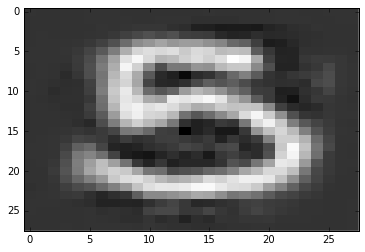

step 2100, training accuracy 0.92
step 2200, training accuracy 0.96
step 2300, training accuracy 0.92
step 2400, training accuracy 0.82
step 2500, training accuracy 0.96
step 2600, training accuracy 0.86
step 2700, training accuracy 0.9
step 2800, training accuracy 0.84
step 2900, training accuracy 0.94
step 3000, training accuracy 0.94
Reconstruction of a 6


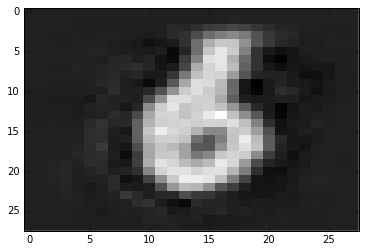

step 3100, training accuracy 0.9
step 3200, training accuracy 0.88
step 3300, training accuracy 0.92
step 3400, training accuracy 0.86
step 3500, training accuracy 0.9
step 3600, training accuracy 0.9
step 3700, training accuracy 0.9
step 3800, training accuracy 0.88
step 3900, training accuracy 0.94
step 4000, training accuracy 0.82
Reconstruction of a 7


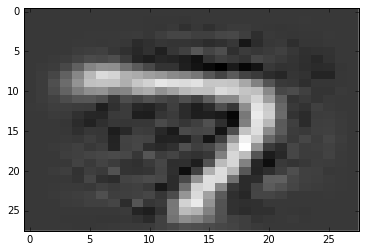

step 4100, training accuracy 0.94
step 4200, training accuracy 0.92
step 4300, training accuracy 0.94
step 4400, training accuracy 0.92
step 4500, training accuracy 0.96
step 4600, training accuracy 0.96
step 4700, training accuracy 0.94
step 4800, training accuracy 0.88
step 4900, training accuracy 0.88
step 5000, training accuracy 0.9
Reconstruction of a 7


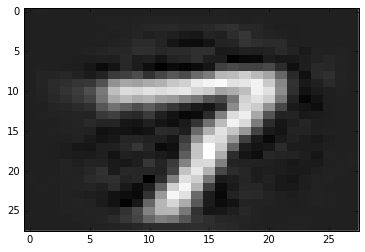

step 5100, training accuracy 0.98
step 5200, training accuracy 0.9
step 5300, training accuracy 0.9
step 5400, training accuracy 0.9
step 5500, training accuracy 0.92
step 5600, training accuracy 0.9
step 5700, training accuracy 0.9
step 5800, training accuracy 0.98
step 5900, training accuracy 0.88
step 6000, training accuracy 0.92
Reconstruction of a 1


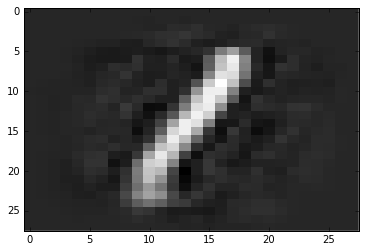

step 6100, training accuracy 0.88
step 6200, training accuracy 0.94
step 6300, training accuracy 0.86
step 6400, training accuracy 0.92
step 6500, training accuracy 0.8
step 6600, training accuracy 0.9
step 6700, training accuracy 0.92
step 6800, training accuracy 0.9
step 6900, training accuracy 0.94
step 7000, training accuracy 0.88
Reconstruction of a 2


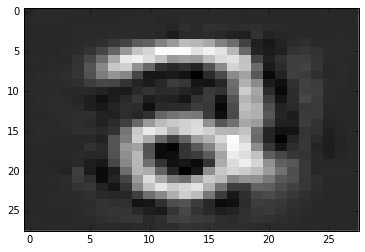

step 7100, training accuracy 0.9
step 7200, training accuracy 0.96
step 7300, training accuracy 0.92
step 7400, training accuracy 0.96
step 7500, training accuracy 0.84
step 7600, training accuracy 0.92
step 7700, training accuracy 0.92
step 7800, training accuracy 0.88
step 7900, training accuracy 0.88
step 8000, training accuracy 0.88
Reconstruction of a 0


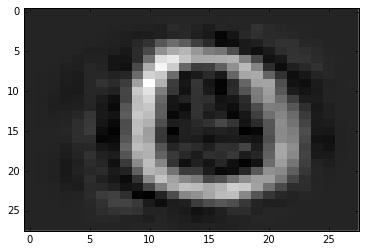

step 8100, training accuracy 0.76
step 8200, training accuracy 0.92
step 8300, training accuracy 0.86
step 8400, training accuracy 0.94
step 8500, training accuracy 0.86
step 8600, training accuracy 0.92
step 8700, training accuracy 0.96
step 8800, training accuracy 0.88
step 8900, training accuracy 0.9
step 9000, training accuracy 0.86
Reconstruction of a 6


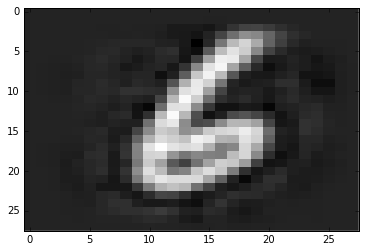

step 9100, training accuracy 0.92
step 9200, training accuracy 0.88
step 9300, training accuracy 0.94
step 9400, training accuracy 0.86
step 9500, training accuracy 0.94
step 9600, training accuracy 0.94
step 9700, training accuracy 0.86
step 9800, training accuracy 0.9
step 9900, training accuracy 0.94
epoch 2, learning rate 2.15443e-05
step 0, training accuracy 0.96
Reconstruction of a 8


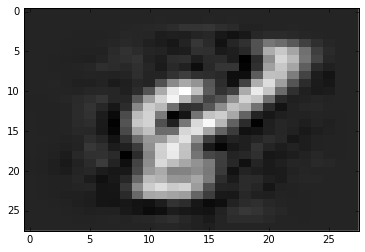

step 100, training accuracy 0.88
step 200, training accuracy 0.84
step 300, training accuracy 0.92
step 400, training accuracy 0.9
step 500, training accuracy 0.9
step 600, training accuracy 0.92
step 700, training accuracy 0.9
step 800, training accuracy 0.88
step 900, training accuracy 0.9
step 1000, training accuracy 0.92
Reconstruction of a 4


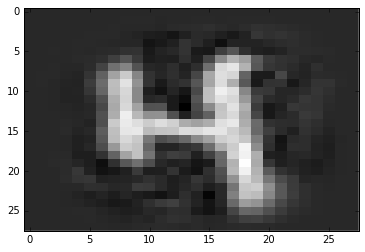

step 1100, training accuracy 0.88
step 1200, training accuracy 0.82
step 1300, training accuracy 0.9
step 1400, training accuracy 0.88
step 1500, training accuracy 0.84
step 1600, training accuracy 0.9
step 1700, training accuracy 0.92
step 1800, training accuracy 0.84
step 1900, training accuracy 0.82
step 2000, training accuracy 0.92
Reconstruction of a 0


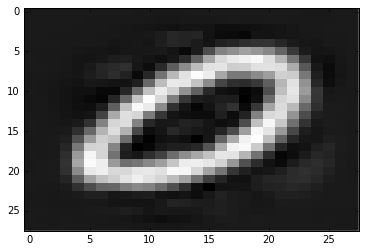

step 2100, training accuracy 0.88
step 2200, training accuracy 0.9
step 2300, training accuracy 0.92
step 2400, training accuracy 0.9
step 2500, training accuracy 0.96
step 2600, training accuracy 0.92
step 2700, training accuracy 0.92
step 2800, training accuracy 0.82
step 2900, training accuracy 0.88
step 3000, training accuracy 0.94
Reconstruction of a 1


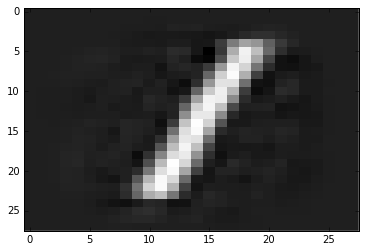

step 3100, training accuracy 0.86
step 3200, training accuracy 0.96
step 3300, training accuracy 0.9
step 3400, training accuracy 0.94
step 3500, training accuracy 0.92
step 3600, training accuracy 1
step 3700, training accuracy 0.88
step 3800, training accuracy 0.96
step 3900, training accuracy 0.96
step 4000, training accuracy 0.98
Reconstruction of a 4


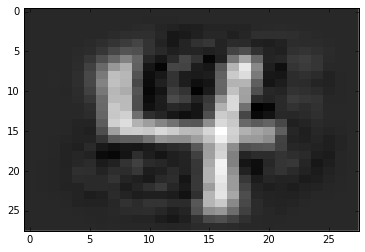

step 4100, training accuracy 0.94
step 4200, training accuracy 0.92
step 4300, training accuracy 0.96
step 4400, training accuracy 0.82
step 4500, training accuracy 0.92
step 4600, training accuracy 0.96
step 4700, training accuracy 0.92
step 4800, training accuracy 0.92
step 4900, training accuracy 0.96
step 5000, training accuracy 0.96
Reconstruction of a 0


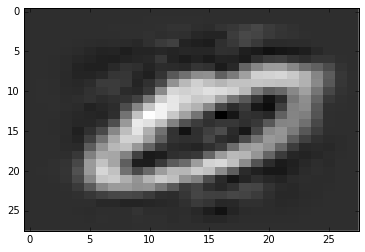

step 5100, training accuracy 0.9
step 5200, training accuracy 0.92
step 5300, training accuracy 0.92
step 5400, training accuracy 0.88
step 5500, training accuracy 0.84
step 5600, training accuracy 0.9
step 5700, training accuracy 0.92
step 5800, training accuracy 0.98
step 5900, training accuracy 0.92
step 6000, training accuracy 0.92
Reconstruction of a 9


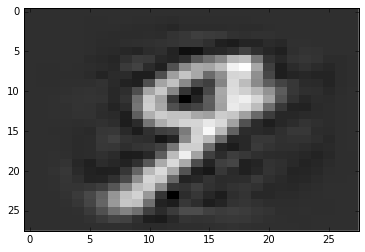

step 6100, training accuracy 0.9
step 6200, training accuracy 0.96
step 6300, training accuracy 0.9
step 6400, training accuracy 0.92
step 6500, training accuracy 0.94
step 6600, training accuracy 0.98
step 6700, training accuracy 0.94
step 6800, training accuracy 0.84
step 6900, training accuracy 0.94
step 7000, training accuracy 0.9
Reconstruction of a 1


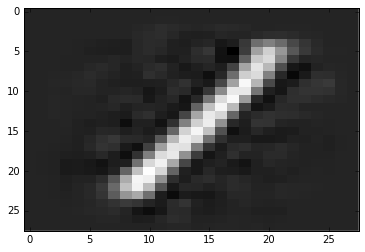

step 7100, training accuracy 0.96
step 7200, training accuracy 0.88
step 7300, training accuracy 0.94
step 7400, training accuracy 0.84
step 7500, training accuracy 0.96
step 7600, training accuracy 0.98
step 7700, training accuracy 0.9
step 7800, training accuracy 0.86
step 7900, training accuracy 0.94
step 8000, training accuracy 0.92
Reconstruction of a 5


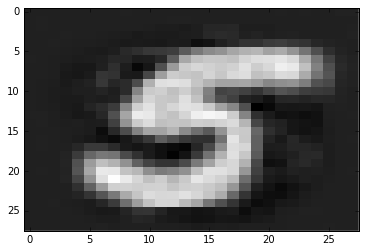

step 8100, training accuracy 0.88
step 8200, training accuracy 0.9
step 8300, training accuracy 0.9
step 8400, training accuracy 0.88
step 8500, training accuracy 0.94
step 8600, training accuracy 0.88
step 8700, training accuracy 0.96
step 8800, training accuracy 0.98
step 8900, training accuracy 0.88
step 9000, training accuracy 0.9
Reconstruction of a 1


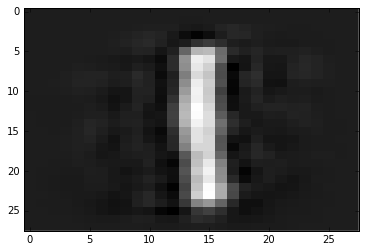

step 9100, training accuracy 0.9
step 9200, training accuracy 0.94
step 9300, training accuracy 0.84
step 9400, training accuracy 0.98
step 9500, training accuracy 0.86
step 9600, training accuracy 0.9
step 9700, training accuracy 0.94
step 9800, training accuracy 0.9
step 9900, training accuracy 0.96
epoch 3, learning rate 1e-05
step 0, training accuracy 0.88
Reconstruction of a 1


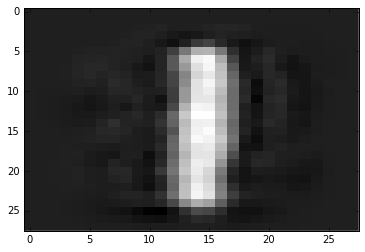

step 100, training accuracy 0.88
step 200, training accuracy 0.9
step 300, training accuracy 0.88
step 400, training accuracy 0.88
step 500, training accuracy 0.86
step 600, training accuracy 0.84
step 700, training accuracy 0.8
step 800, training accuracy 0.92
step 900, training accuracy 0.84
step 1000, training accuracy 0.94
Reconstruction of a 1


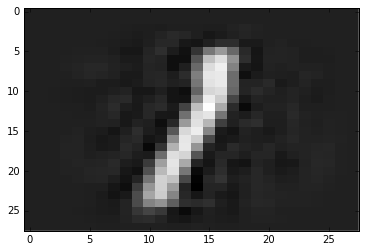

step 1100, training accuracy 0.96
step 1200, training accuracy 0.94
step 1300, training accuracy 0.92
step 1400, training accuracy 0.92
step 1500, training accuracy 0.88
step 1600, training accuracy 0.92
step 1700, training accuracy 0.9
step 1800, training accuracy 0.88
step 1900, training accuracy 0.9
step 2000, training accuracy 0.86
Reconstruction of a 7


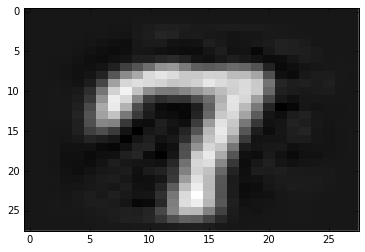

step 2100, training accuracy 0.86
step 2200, training accuracy 0.9
step 2300, training accuracy 0.92
step 2400, training accuracy 0.92
step 2500, training accuracy 0.92
step 2600, training accuracy 0.9
step 2700, training accuracy 0.92
step 2800, training accuracy 0.86
step 2900, training accuracy 0.92
step 3000, training accuracy 0.88
Reconstruction of a 6


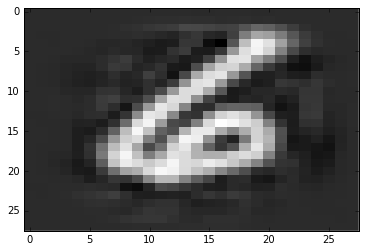

step 3100, training accuracy 0.92
step 3200, training accuracy 0.94
step 3300, training accuracy 0.94
step 3400, training accuracy 0.98
step 3500, training accuracy 0.94
step 3600, training accuracy 0.86
step 3700, training accuracy 0.94
step 3800, training accuracy 0.82
step 3900, training accuracy 0.94
step 4000, training accuracy 0.88
Reconstruction of a 8


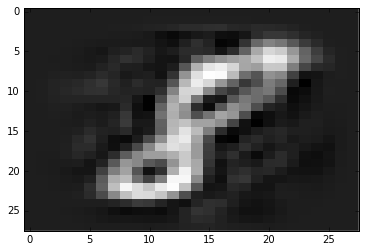

step 4100, training accuracy 0.86
step 4200, training accuracy 0.9
step 4300, training accuracy 0.88
step 4400, training accuracy 0.88
step 4500, training accuracy 0.9
step 4600, training accuracy 0.94
step 4700, training accuracy 0.86
step 4800, training accuracy 0.94
step 4900, training accuracy 0.86
step 5000, training accuracy 0.9
Reconstruction of a 2


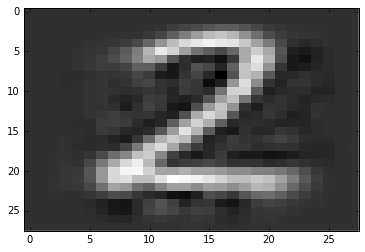

step 5100, training accuracy 0.98
step 5200, training accuracy 0.92
step 5300, training accuracy 0.88
step 5400, training accuracy 0.82
step 5500, training accuracy 0.92
step 5600, training accuracy 0.88
step 5700, training accuracy 0.88
step 5800, training accuracy 0.94
step 5900, training accuracy 0.98
step 6000, training accuracy 0.88
Reconstruction of a 5


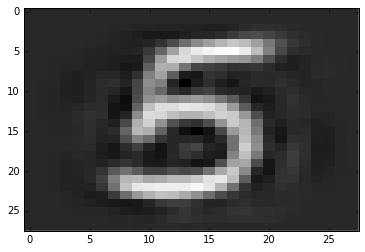

step 6100, training accuracy 0.88
step 6200, training accuracy 0.88
step 6300, training accuracy 0.82
step 6400, training accuracy 0.94
step 6500, training accuracy 0.86
step 6600, training accuracy 0.96
step 6700, training accuracy 0.82
step 6800, training accuracy 0.92
step 6900, training accuracy 0.9
step 7000, training accuracy 0.86
Reconstruction of a 1


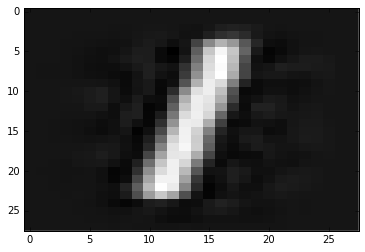

step 7100, training accuracy 0.92
step 7200, training accuracy 0.92
step 7300, training accuracy 0.94
step 7400, training accuracy 0.9
step 7500, training accuracy 0.96
step 7600, training accuracy 0.9
step 7700, training accuracy 0.96
step 7800, training accuracy 0.88
step 7900, training accuracy 0.92
step 8000, training accuracy 0.9
Reconstruction of a 2


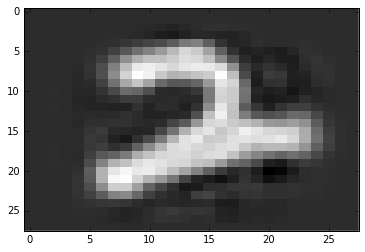

step 8100, training accuracy 0.88
step 8200, training accuracy 0.92
step 8300, training accuracy 0.92
step 8400, training accuracy 0.96
step 8500, training accuracy 0.94
step 8600, training accuracy 0.86
step 8700, training accuracy 0.86
step 8800, training accuracy 0.92
step 8900, training accuracy 0.86
step 9000, training accuracy 0.9
Reconstruction of a 9


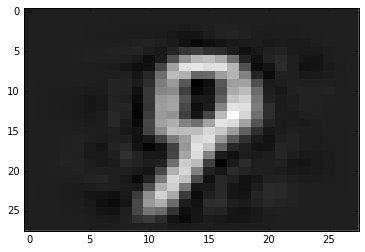

step 9100, training accuracy 0.92
step 9200, training accuracy 0.92
step 9300, training accuracy 0.86
step 9400, training accuracy 1
step 9500, training accuracy 0.94
step 9600, training accuracy 0.9
step 9700, training accuracy 0.96
step 9800, training accuracy 0.84
step 9900, training accuracy 0.94
epoch 4, learning rate 4.64159e-06
step 0, training accuracy 0.96
Reconstruction of a 1


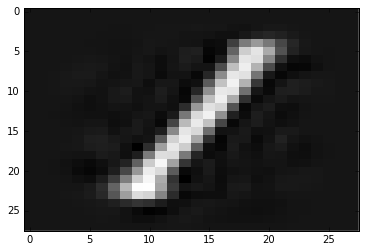

step 100, training accuracy 0.96
step 200, training accuracy 0.86
step 300, training accuracy 0.92
step 400, training accuracy 0.86
step 500, training accuracy 0.98
step 600, training accuracy 0.86
step 700, training accuracy 0.98
step 800, training accuracy 0.9
step 900, training accuracy 0.88
step 1000, training accuracy 0.94
Reconstruction of a 4


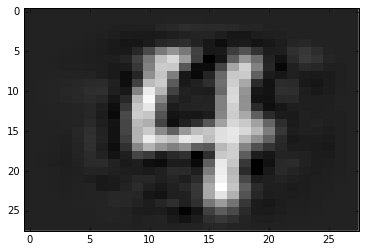

step 1100, training accuracy 0.92
step 1200, training accuracy 0.92
step 1300, training accuracy 0.92
step 1400, training accuracy 0.82
step 1500, training accuracy 0.96
step 1600, training accuracy 0.9
step 1700, training accuracy 0.88
step 1800, training accuracy 0.96
step 1900, training accuracy 0.86
step 2000, training accuracy 0.88
Reconstruction of a 7


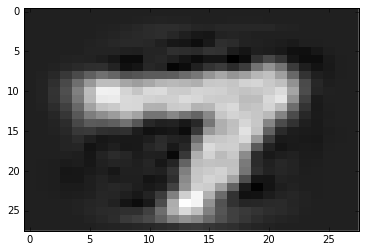

step 2100, training accuracy 0.86
step 2200, training accuracy 0.88
step 2300, training accuracy 0.94
step 2400, training accuracy 0.96
step 2500, training accuracy 0.92
step 2600, training accuracy 0.84
step 2700, training accuracy 0.9
step 2800, training accuracy 0.86
step 2900, training accuracy 0.94
step 3000, training accuracy 0.98
Reconstruction of a 8


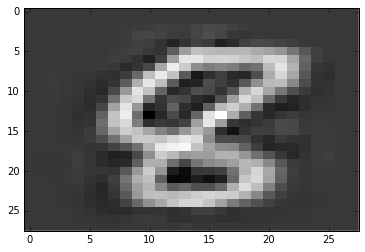

step 3100, training accuracy 0.92
step 3200, training accuracy 0.92
step 3300, training accuracy 0.9
step 3400, training accuracy 0.92
step 3500, training accuracy 0.84
step 3600, training accuracy 0.84
step 3700, training accuracy 0.96
step 3800, training accuracy 0.92
step 3900, training accuracy 0.94
step 4000, training accuracy 0.94
Reconstruction of a 1


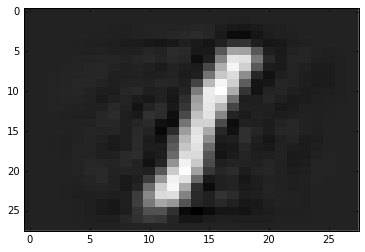

step 4100, training accuracy 0.82
step 4200, training accuracy 0.92
step 4300, training accuracy 0.88
step 4400, training accuracy 0.94
step 4500, training accuracy 0.9
step 4600, training accuracy 0.84
step 4700, training accuracy 0.82
step 4800, training accuracy 0.96
step 4900, training accuracy 0.86
step 5000, training accuracy 0.94
Reconstruction of a 0


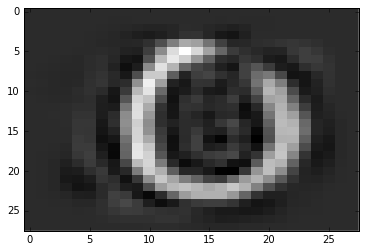

step 5100, training accuracy 0.86
step 5200, training accuracy 0.86
step 5300, training accuracy 0.88
step 5400, training accuracy 0.9
step 5500, training accuracy 0.94
step 5600, training accuracy 0.94
step 5700, training accuracy 0.94
step 5800, training accuracy 0.94
step 5900, training accuracy 0.88
step 6000, training accuracy 0.9
Reconstruction of a 8


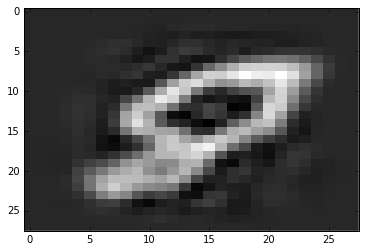

step 6100, training accuracy 0.94
step 6200, training accuracy 0.88
step 6300, training accuracy 0.98
step 6400, training accuracy 0.94
step 6500, training accuracy 0.96
step 6600, training accuracy 0.98
step 6700, training accuracy 0.92
step 6800, training accuracy 0.96
step 6900, training accuracy 0.96
step 7000, training accuracy 0.9
Reconstruction of a 7


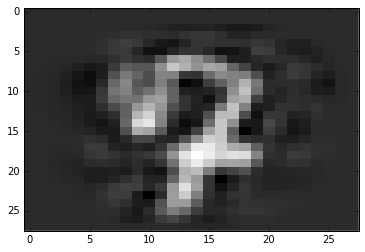

step 7100, training accuracy 0.92
step 7200, training accuracy 0.9
step 7300, training accuracy 0.9
step 7400, training accuracy 0.94
step 7500, training accuracy 0.96
step 7600, training accuracy 0.94
step 7700, training accuracy 0.98
step 7800, training accuracy 0.94
step 7900, training accuracy 0.9
step 8000, training accuracy 0.94
Reconstruction of a 6


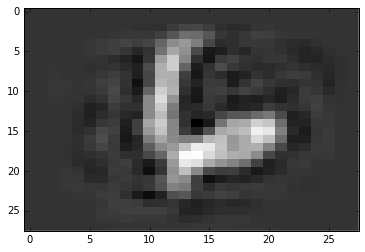

step 8100, training accuracy 0.94
step 8200, training accuracy 0.94
step 8300, training accuracy 0.94
step 8400, training accuracy 0.92
step 8500, training accuracy 0.94
step 8600, training accuracy 0.92
step 8700, training accuracy 0.9
step 8800, training accuracy 0.84
step 8900, training accuracy 0.9
step 9000, training accuracy 0.9
Reconstruction of a 7


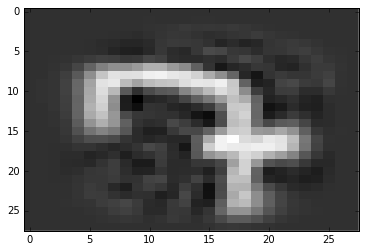

step 9100, training accuracy 0.9
step 9200, training accuracy 0.94
step 9300, training accuracy 0.82
step 9400, training accuracy 0.92
step 9500, training accuracy 0.88
step 9600, training accuracy 0.9
step 9700, training accuracy 0.84
step 9800, training accuracy 0.88
step 9900, training accuracy 0.9
epoch 5, learning rate 2.15443e-06
step 0, training accuracy 0.8
Reconstruction of a 8


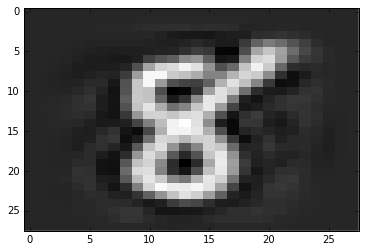

step 100, training accuracy 0.92
step 200, training accuracy 0.88
step 300, training accuracy 0.96
step 400, training accuracy 0.94
step 500, training accuracy 0.86
step 600, training accuracy 0.86
step 700, training accuracy 0.94
step 800, training accuracy 0.84
step 900, training accuracy 0.96
step 1000, training accuracy 0.92
Reconstruction of a 0


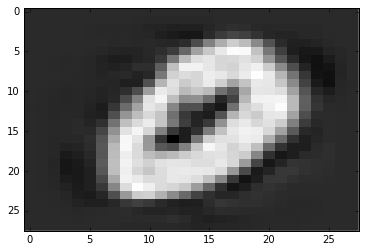

step 1100, training accuracy 0.84
step 1200, training accuracy 0.86
step 1300, training accuracy 0.9
step 1400, training accuracy 0.88
step 1500, training accuracy 0.94
step 1600, training accuracy 0.92
step 1700, training accuracy 0.9
step 1800, training accuracy 0.84
step 1900, training accuracy 0.92
step 2000, training accuracy 0.9
Reconstruction of a 8


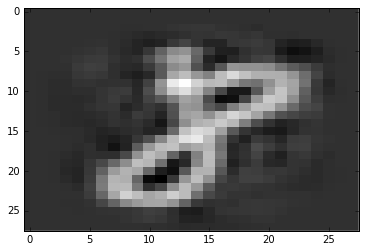

step 2100, training accuracy 0.92
step 2200, training accuracy 0.86
step 2300, training accuracy 0.84
step 2400, training accuracy 0.86
step 2500, training accuracy 0.92
step 2600, training accuracy 0.82
step 2700, training accuracy 0.88
step 2800, training accuracy 0.92
step 2900, training accuracy 0.86
step 3000, training accuracy 0.88
Reconstruction of a 2


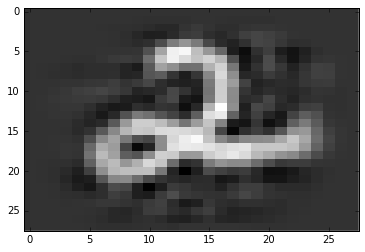

step 3100, training accuracy 0.86
step 3200, training accuracy 0.94
step 3300, training accuracy 0.92
step 3400, training accuracy 0.92
step 3500, training accuracy 0.94
step 3600, training accuracy 0.96
step 3700, training accuracy 0.9
step 3800, training accuracy 0.9
step 3900, training accuracy 0.78
step 4000, training accuracy 0.88
Reconstruction of a 7


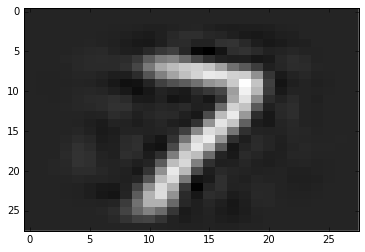

step 4100, training accuracy 0.92
step 4200, training accuracy 0.9
step 4300, training accuracy 0.94
step 4400, training accuracy 0.94
step 4500, training accuracy 0.86
step 4600, training accuracy 0.96
step 4700, training accuracy 0.92
step 4800, training accuracy 0.96
step 4900, training accuracy 0.92
step 5000, training accuracy 0.86
Reconstruction of a 0


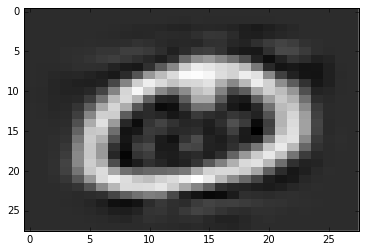

step 5100, training accuracy 0.8
step 5200, training accuracy 0.92
step 5300, training accuracy 0.86
step 5400, training accuracy 0.96
step 5500, training accuracy 0.94
step 5600, training accuracy 0.86
step 5700, training accuracy 0.88
step 5800, training accuracy 0.88
step 5900, training accuracy 0.9
step 6000, training accuracy 0.9
Reconstruction of a 3


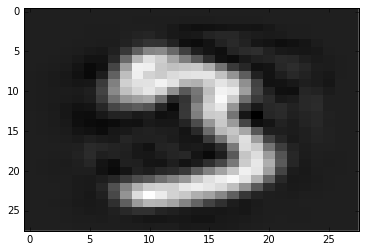

step 6100, training accuracy 0.94
step 6200, training accuracy 1
step 6300, training accuracy 0.98
step 6400, training accuracy 0.94
step 6500, training accuracy 0.9
step 6600, training accuracy 0.92
step 6700, training accuracy 0.92
step 6800, training accuracy 0.9
step 6900, training accuracy 0.92
step 7000, training accuracy 0.9
Reconstruction of a 2


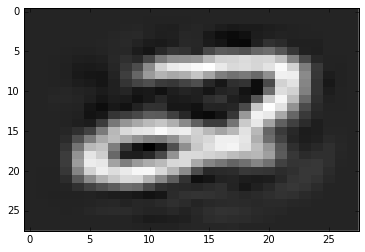

step 7100, training accuracy 0.92
step 7200, training accuracy 0.92
step 7300, training accuracy 0.84
step 7400, training accuracy 0.82
step 7500, training accuracy 0.92
step 7600, training accuracy 0.86
step 7700, training accuracy 0.9
step 7800, training accuracy 0.94
step 7900, training accuracy 0.94
step 8000, training accuracy 0.82
Reconstruction of a 9


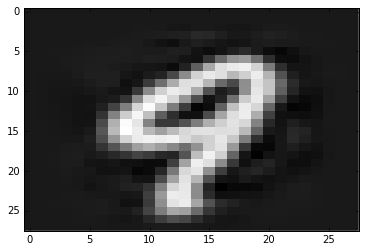

step 8100, training accuracy 0.88
step 8200, training accuracy 0.76
step 8300, training accuracy 0.84
step 8400, training accuracy 0.86
step 8500, training accuracy 0.94
step 8600, training accuracy 0.86
step 8700, training accuracy 0.96
step 8800, training accuracy 0.84
step 8900, training accuracy 0.9
step 9000, training accuracy 0.9
Reconstruction of a 7


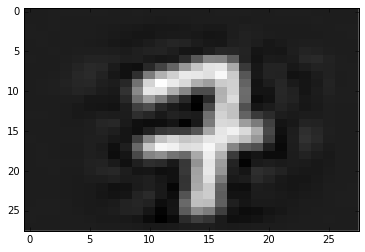

step 9100, training accuracy 0.88
step 9200, training accuracy 0.92
step 9300, training accuracy 0.94
step 9400, training accuracy 0.84
step 9500, training accuracy 0.92
step 9600, training accuracy 0.96
step 9700, training accuracy 0.9
step 9800, training accuracy 0.86
step 9900, training accuracy 0.98
epoch 6, learning rate 1e-06
step 0, training accuracy 0.9
Reconstruction of a 1


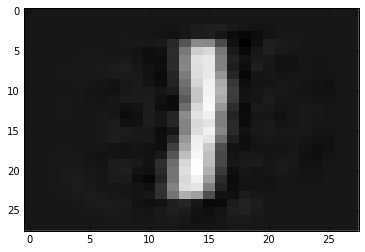

step 100, training accuracy 0.84
step 200, training accuracy 0.94
step 300, training accuracy 0.9
step 400, training accuracy 0.92
step 500, training accuracy 0.94
step 600, training accuracy 0.9
step 700, training accuracy 0.88
step 800, training accuracy 0.94
step 900, training accuracy 0.94
step 1000, training accuracy 0.86
Reconstruction of a 0


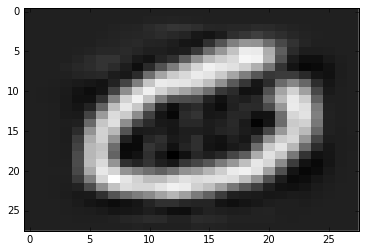

step 1100, training accuracy 0.96
step 1200, training accuracy 0.86
step 1300, training accuracy 0.9
step 1400, training accuracy 0.8
step 1500, training accuracy 0.86
step 1600, training accuracy 0.92
step 1700, training accuracy 0.92
step 1800, training accuracy 0.88
step 1900, training accuracy 0.9
step 2000, training accuracy 0.84
Reconstruction of a 8


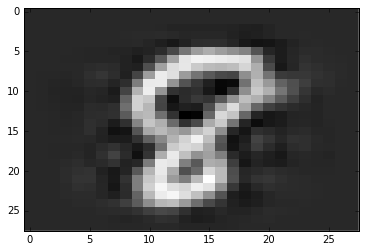

step 2100, training accuracy 0.84
step 2200, training accuracy 0.92
step 2300, training accuracy 0.94
step 2400, training accuracy 0.86
step 2500, training accuracy 0.84
step 2600, training accuracy 0.96
step 2700, training accuracy 0.86
step 2800, training accuracy 0.76
step 2900, training accuracy 0.92
step 3000, training accuracy 0.94
Reconstruction of a 8


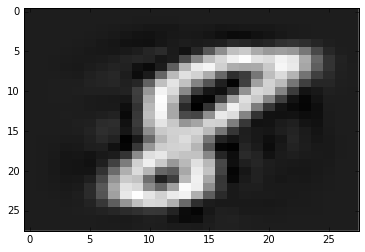

step 3100, training accuracy 0.9
step 3200, training accuracy 0.9
step 3300, training accuracy 0.94
step 3400, training accuracy 0.94
step 3500, training accuracy 0.9
step 3600, training accuracy 0.92
step 3700, training accuracy 0.88
step 3800, training accuracy 0.86
step 3900, training accuracy 0.8
step 4000, training accuracy 0.88
Reconstruction of a 2


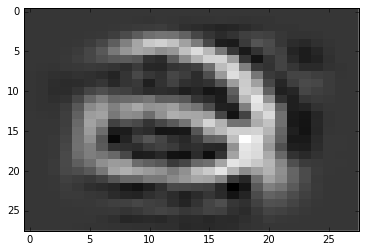

step 4100, training accuracy 0.9
step 4200, training accuracy 0.86
step 4300, training accuracy 0.94
step 4400, training accuracy 0.92
step 4500, training accuracy 0.92
step 4600, training accuracy 0.94
step 4700, training accuracy 0.82
step 4800, training accuracy 0.78
step 4900, training accuracy 0.92
step 5000, training accuracy 0.82
Reconstruction of a 6


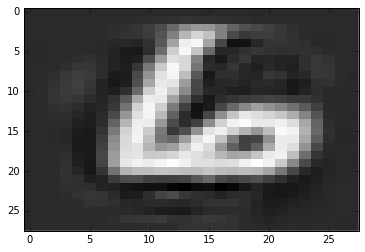

step 5100, training accuracy 0.98
step 5200, training accuracy 0.96
step 5300, training accuracy 0.94
step 5400, training accuracy 0.88
step 5500, training accuracy 0.9
step 5600, training accuracy 0.94
step 5700, training accuracy 0.86
step 5800, training accuracy 0.94
step 5900, training accuracy 0.94
step 6000, training accuracy 0.96
Reconstruction of a 7


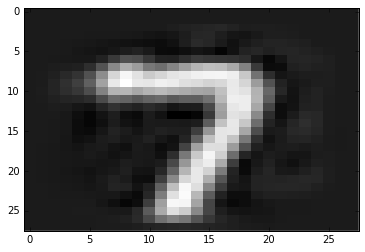

step 6100, training accuracy 0.9
step 6200, training accuracy 0.96
step 6300, training accuracy 0.86
step 6400, training accuracy 0.96
step 6500, training accuracy 0.92
step 6600, training accuracy 0.82
step 6700, training accuracy 0.9
step 6800, training accuracy 0.9
step 6900, training accuracy 0.86
step 7000, training accuracy 0.86
Reconstruction of a 4


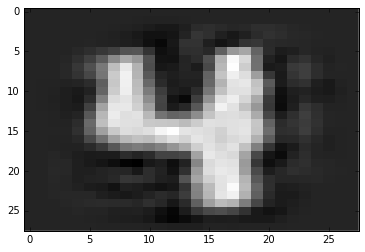

step 7100, training accuracy 0.82
step 7200, training accuracy 0.96
step 7300, training accuracy 0.98
step 7400, training accuracy 0.92
step 7500, training accuracy 0.94
step 7600, training accuracy 0.92
step 7700, training accuracy 0.96
step 7800, training accuracy 0.96
step 7900, training accuracy 0.84
step 8000, training accuracy 0.96
Reconstruction of a 8


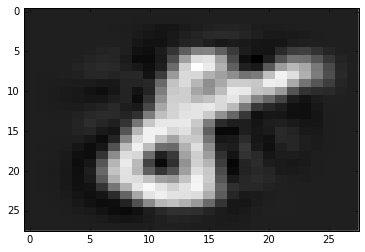

step 8100, training accuracy 0.88
step 8200, training accuracy 0.78
step 8300, training accuracy 0.96
step 8400, training accuracy 0.9
step 8500, training accuracy 0.92
step 8600, training accuracy 0.9
step 8700, training accuracy 0.84
step 8800, training accuracy 0.92
step 8900, training accuracy 0.84
step 9000, training accuracy 0.88
Reconstruction of a 0


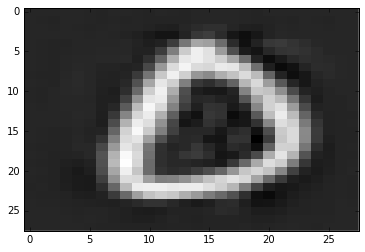

step 9100, training accuracy 0.88
step 9200, training accuracy 0.84
step 9300, training accuracy 0.9
step 9400, training accuracy 0.9
step 9500, training accuracy 0.98
step 9600, training accuracy 0.92
step 9700, training accuracy 0.88
step 9800, training accuracy 0.88
step 9900, training accuracy 0.96
epoch 7, learning rate 4.64159e-07
step 0, training accuracy 0.86
Reconstruction of a 2


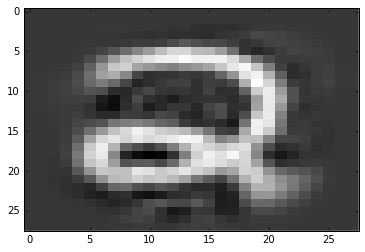

step 100, training accuracy 0.88
step 200, training accuracy 0.9
step 300, training accuracy 0.94
step 400, training accuracy 0.88
step 500, training accuracy 0.9
step 600, training accuracy 0.88
step 700, training accuracy 0.82
step 800, training accuracy 0.9
step 900, training accuracy 0.94
step 1000, training accuracy 0.92
Reconstruction of a 3


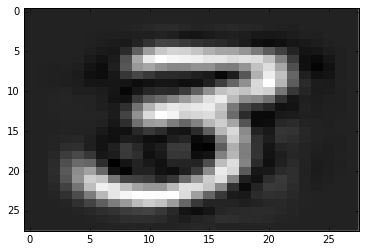

step 1100, training accuracy 0.84
step 1200, training accuracy 0.9
step 1300, training accuracy 0.88
step 1400, training accuracy 0.94
step 1500, training accuracy 0.92
step 1600, training accuracy 0.92
step 1700, training accuracy 0.9
step 1800, training accuracy 0.98
step 1900, training accuracy 0.92
step 2000, training accuracy 0.88
Reconstruction of a 0


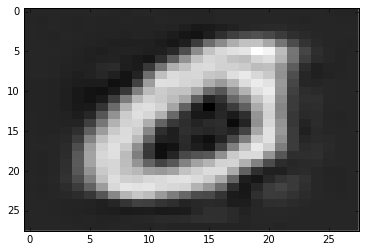

step 2100, training accuracy 0.9
step 2200, training accuracy 0.84
step 2300, training accuracy 0.84
step 2400, training accuracy 0.92
step 2500, training accuracy 0.98
step 2600, training accuracy 0.92
step 2700, training accuracy 0.94
step 2800, training accuracy 0.94
step 2900, training accuracy 0.94
step 3000, training accuracy 0.88
Reconstruction of a 2


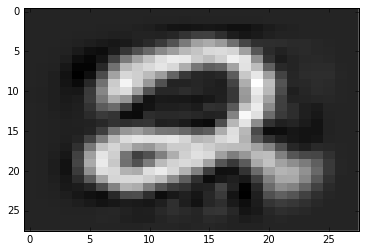

step 3100, training accuracy 0.96
step 3200, training accuracy 0.84
step 3300, training accuracy 0.88
step 3400, training accuracy 0.92
step 3500, training accuracy 0.96
step 3600, training accuracy 0.88
step 3700, training accuracy 0.92
step 3800, training accuracy 0.92
step 3900, training accuracy 0.88
step 4000, training accuracy 0.84
Reconstruction of a 0


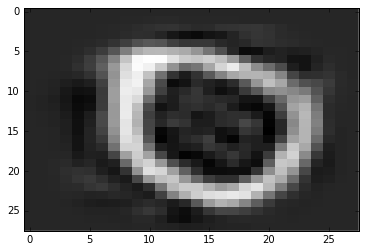

step 4100, training accuracy 0.92
step 4200, training accuracy 0.96
step 4300, training accuracy 0.9
step 4400, training accuracy 0.88
step 4500, training accuracy 0.9
step 4600, training accuracy 0.88
step 4700, training accuracy 0.96
step 4800, training accuracy 0.84
step 4900, training accuracy 0.92
step 5000, training accuracy 0.84
Reconstruction of a 0


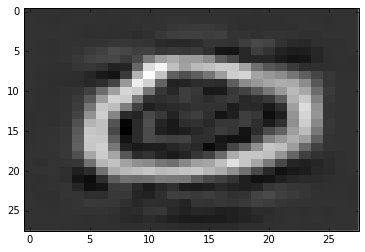

step 5100, training accuracy 0.94
step 5200, training accuracy 0.88
step 5300, training accuracy 0.86
step 5400, training accuracy 0.88
step 5500, training accuracy 0.96
step 5600, training accuracy 0.92
step 5700, training accuracy 0.94
step 5800, training accuracy 0.96
step 5900, training accuracy 0.9
step 6000, training accuracy 0.9
Reconstruction of a 4


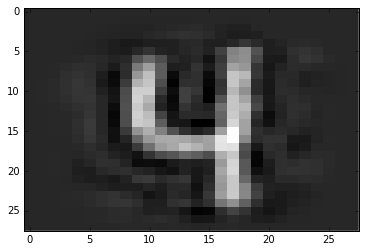

step 6100, training accuracy 0.96
step 6200, training accuracy 0.84
step 6300, training accuracy 0.9
step 6400, training accuracy 0.9
step 6500, training accuracy 0.94
step 6600, training accuracy 0.94
step 6700, training accuracy 0.94
step 6800, training accuracy 0.88
step 6900, training accuracy 0.92
step 7000, training accuracy 0.9
Reconstruction of a 1


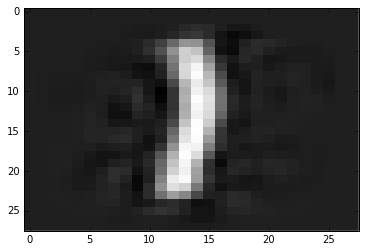

step 7100, training accuracy 0.94
step 7200, training accuracy 0.88
step 7300, training accuracy 0.86
step 7400, training accuracy 0.92
step 7500, training accuracy 0.92
step 7600, training accuracy 0.9
step 7700, training accuracy 0.88
step 7800, training accuracy 0.88
step 7900, training accuracy 0.88
step 8000, training accuracy 0.92
Reconstruction of a 6


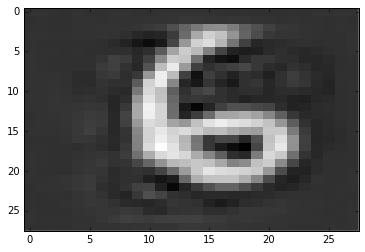

step 8100, training accuracy 0.84
step 8200, training accuracy 0.94
step 8300, training accuracy 0.94
step 8400, training accuracy 0.9
step 8500, training accuracy 0.96
step 8600, training accuracy 0.9
step 8700, training accuracy 0.88
step 8800, training accuracy 0.9
step 8900, training accuracy 0.94
step 9000, training accuracy 0.9
Reconstruction of a 9


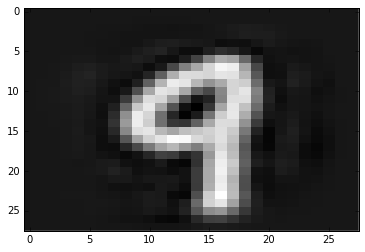

step 9100, training accuracy 0.92
step 9200, training accuracy 0.94
step 9300, training accuracy 0.86
step 9400, training accuracy 0.92
step 9500, training accuracy 0.94
step 9600, training accuracy 0.92
step 9700, training accuracy 0.96
step 9800, training accuracy 0.96
step 9900, training accuracy 0.86
epoch 8, learning rate 2.15443e-07
step 0, training accuracy 0.9
Reconstruction of a 6


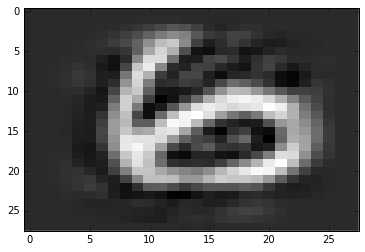

step 100, training accuracy 0.96
step 200, training accuracy 0.88
step 300, training accuracy 0.9
step 400, training accuracy 0.88
step 500, training accuracy 0.8
step 600, training accuracy 0.92
step 700, training accuracy 0.94
step 800, training accuracy 0.82
step 900, training accuracy 0.9
step 1000, training accuracy 0.92
Reconstruction of a 3


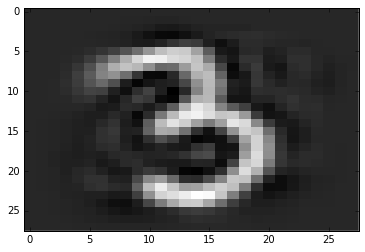

step 1100, training accuracy 0.9
step 1200, training accuracy 0.9
step 1300, training accuracy 0.96
step 1400, training accuracy 0.92
step 1500, training accuracy 0.92
step 1600, training accuracy 0.94
step 1700, training accuracy 0.94
step 1800, training accuracy 0.88
step 1900, training accuracy 0.82
step 2000, training accuracy 0.92
Reconstruction of a 8


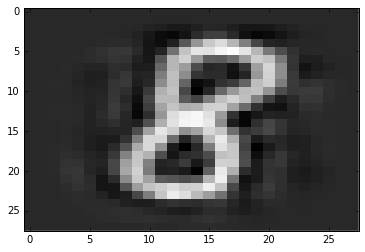

step 2100, training accuracy 0.94
step 2200, training accuracy 0.92
step 2300, training accuracy 0.92
step 2400, training accuracy 0.94
step 2500, training accuracy 0.9
step 2600, training accuracy 0.98
step 2700, training accuracy 0.86
step 2800, training accuracy 0.96
step 2900, training accuracy 0.9
step 3000, training accuracy 0.88
Reconstruction of a 1


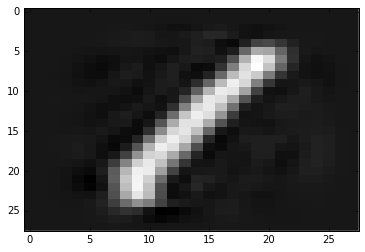

step 3100, training accuracy 0.92
step 3200, training accuracy 0.88
step 3300, training accuracy 0.9
step 3400, training accuracy 0.86
step 3500, training accuracy 0.94
step 3600, training accuracy 0.9
step 3700, training accuracy 0.9
step 3800, training accuracy 0.86
step 3900, training accuracy 0.88
step 4000, training accuracy 0.96
Reconstruction of a 1


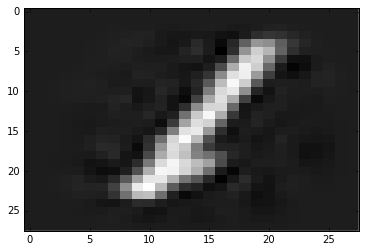

step 4100, training accuracy 0.9
step 4200, training accuracy 0.88
step 4300, training accuracy 0.86
step 4400, training accuracy 0.96
step 4500, training accuracy 0.9
step 4600, training accuracy 0.9
step 4700, training accuracy 0.9
step 4800, training accuracy 0.9
step 4900, training accuracy 0.9
step 5000, training accuracy 0.88
Reconstruction of a 3


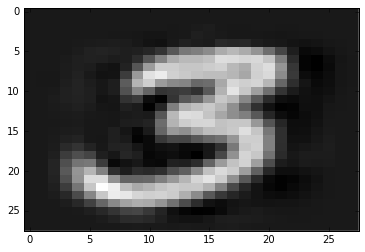

step 5100, training accuracy 0.98
step 5200, training accuracy 0.84
step 5300, training accuracy 0.92
step 5400, training accuracy 0.94
step 5500, training accuracy 0.84
step 5600, training accuracy 0.86
step 5700, training accuracy 0.92
step 5800, training accuracy 0.84
step 5900, training accuracy 0.84
step 6000, training accuracy 0.9
Reconstruction of a 9


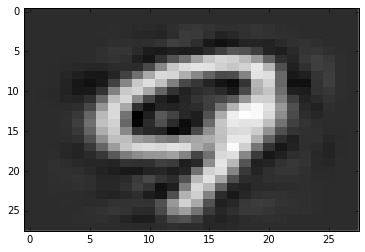

step 6100, training accuracy 0.9
step 6200, training accuracy 0.94
step 6300, training accuracy 0.86
step 6400, training accuracy 0.96
step 6500, training accuracy 0.94
step 6600, training accuracy 0.82
step 6700, training accuracy 0.92
step 6800, training accuracy 0.88
step 6900, training accuracy 0.9
step 7000, training accuracy 0.86
Reconstruction of a 6


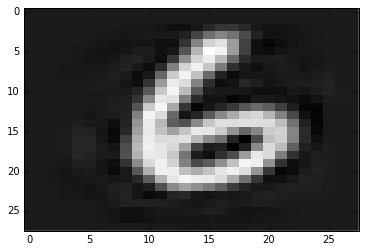

step 7100, training accuracy 0.9
step 7200, training accuracy 0.92
step 7300, training accuracy 0.86
step 7400, training accuracy 0.96
step 7500, training accuracy 0.92
step 7600, training accuracy 0.88
step 7700, training accuracy 0.88
step 7800, training accuracy 0.9
step 7900, training accuracy 0.92
step 8000, training accuracy 0.9
Reconstruction of a 5


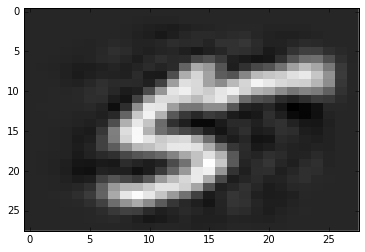

step 8100, training accuracy 0.86
step 8200, training accuracy 0.9
step 8300, training accuracy 0.96
step 8400, training accuracy 0.94
step 8500, training accuracy 0.9
step 8600, training accuracy 0.94
step 8700, training accuracy 0.98
step 8800, training accuracy 0.94
step 8900, training accuracy 0.84
step 9000, training accuracy 0.88
Reconstruction of a 6


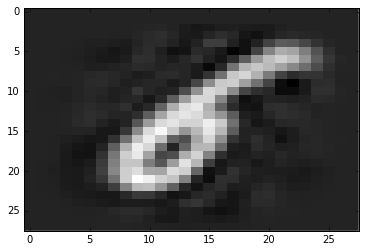

step 9100, training accuracy 0.86
step 9200, training accuracy 0.94
step 9300, training accuracy 0.98
step 9400, training accuracy 0.88
step 9500, training accuracy 0.9
step 9600, training accuracy 0.92
step 9700, training accuracy 0.96
step 9800, training accuracy 0.94
step 9900, training accuracy 0.88
epoch 9, learning rate 1e-07
step 0, training accuracy 0.92
Reconstruction of a 9


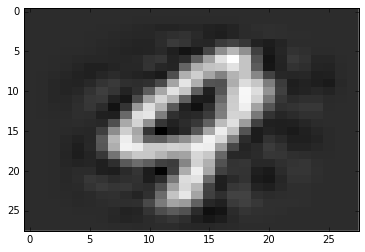

step 100, training accuracy 0.96
step 200, training accuracy 0.8
step 300, training accuracy 0.88
step 400, training accuracy 0.88
step 500, training accuracy 0.92
step 600, training accuracy 0.92
step 700, training accuracy 0.88
step 800, training accuracy 0.94
step 900, training accuracy 0.98
step 1000, training accuracy 0.94
Reconstruction of a 8


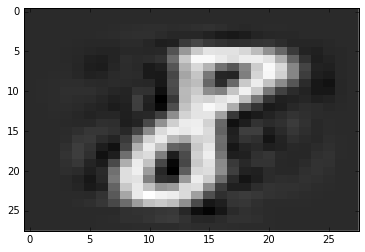

step 1100, training accuracy 0.94
step 1200, training accuracy 0.9
step 1300, training accuracy 0.96
step 1400, training accuracy 0.96
step 1500, training accuracy 0.9
step 1600, training accuracy 0.82
step 1700, training accuracy 0.96
step 1800, training accuracy 0.86
step 1900, training accuracy 0.92
step 2000, training accuracy 0.84
Reconstruction of a 3


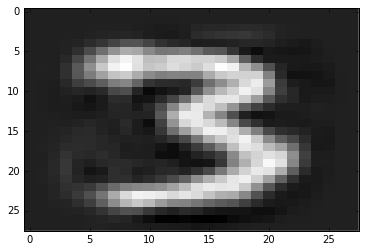

step 2100, training accuracy 0.88
step 2200, training accuracy 0.8
step 2300, training accuracy 0.84
step 2400, training accuracy 0.9
step 2500, training accuracy 0.82
step 2600, training accuracy 0.92
step 2700, training accuracy 0.86
step 2800, training accuracy 0.88
step 2900, training accuracy 0.96
step 3000, training accuracy 0.88
Reconstruction of a 6


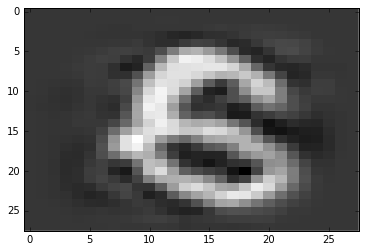

step 3100, training accuracy 0.96
step 3200, training accuracy 0.92
step 3300, training accuracy 0.92
step 3400, training accuracy 0.86
step 3500, training accuracy 0.92
step 3600, training accuracy 0.92
step 3700, training accuracy 0.96
step 3800, training accuracy 0.84
step 3900, training accuracy 0.94
step 4000, training accuracy 0.9
Reconstruction of a 3


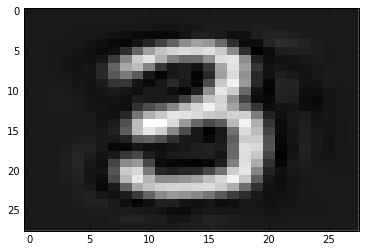

step 4100, training accuracy 0.94
step 4200, training accuracy 0.88
step 4300, training accuracy 0.9
step 4400, training accuracy 0.96
step 4500, training accuracy 0.96
step 4600, training accuracy 0.94
step 4700, training accuracy 0.92
step 4800, training accuracy 0.94
step 4900, training accuracy 0.94
step 5000, training accuracy 0.96
Reconstruction of a 4


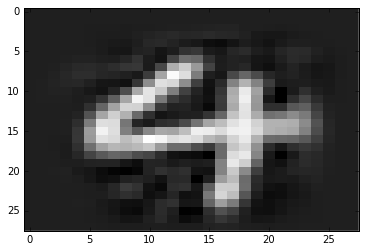

step 5100, training accuracy 0.84
step 5200, training accuracy 0.84
step 5300, training accuracy 0.84
step 5400, training accuracy 0.9
step 5500, training accuracy 0.96
step 5600, training accuracy 0.98
step 5700, training accuracy 0.88
step 5800, training accuracy 0.92
step 5900, training accuracy 0.96
step 6000, training accuracy 0.9
Reconstruction of a 2


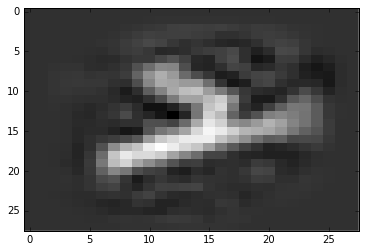

step 6100, training accuracy 0.92
step 6200, training accuracy 0.9
step 6300, training accuracy 0.88
step 6400, training accuracy 0.9
step 6500, training accuracy 0.92
step 6600, training accuracy 0.86
step 6700, training accuracy 0.98
step 6800, training accuracy 0.9
step 6900, training accuracy 0.92
step 7000, training accuracy 0.92
Reconstruction of a 1


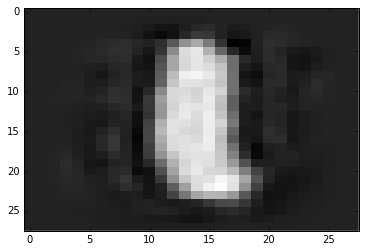

step 7100, training accuracy 0.92
step 7200, training accuracy 0.86
step 7300, training accuracy 0.92
step 7400, training accuracy 0.84
step 7500, training accuracy 0.96
step 7600, training accuracy 0.92
step 7700, training accuracy 0.84
step 7800, training accuracy 0.88
step 7900, training accuracy 0.98
step 8000, training accuracy 0.92
Reconstruction of a 0


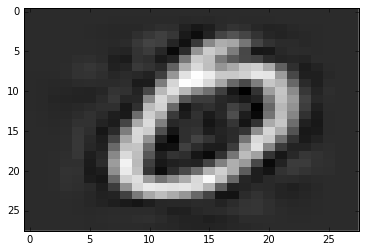

step 8100, training accuracy 0.94
step 8200, training accuracy 0.92
step 8300, training accuracy 0.94
step 8400, training accuracy 0.86
step 8500, training accuracy 0.9
step 8600, training accuracy 0.86
step 8700, training accuracy 0.86
step 8800, training accuracy 0.96
step 8900, training accuracy 0.86
step 9000, training accuracy 0.92
Reconstruction of a 3


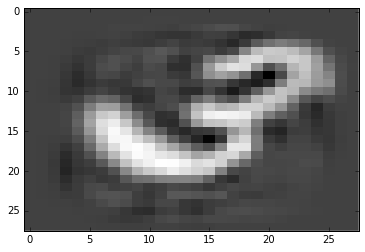

step 9100, training accuracy 0.86
step 9200, training accuracy 0.84
step 9300, training accuracy 0.92
step 9400, training accuracy 0.92
step 9500, training accuracy 0.96
step 9600, training accuracy 0.86
step 9700, training accuracy 0.88
step 9800, training accuracy 0.84
step 9900, training accuracy 0.92


In [80]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_r = tf.placeholder(tf.float32, shape=[None, 784])
learning_rate = tf.placeholder(tf.float32, shape=[])

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x,W) + b)
y = tf.nn.sigmoid(tf.matmul(a,W_2) + b_2)
x_r = tf.matmul(a-b,tf.transpose(W))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
back_train_step = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_error)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for epoch in range(10):
  l_r = 10**np.linspace(-4,-7,10)[epoch]
  print("epoch %d, learning rate %g"%(epoch,l_r))
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("step %d, training accuracy %g"%(i, train_accuracy))
    if i%1000 == 0:
      reconstruction = x_r.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
      plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
      plt.show()
    train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})
    batch = mnist.train.next_batch(50)
    back_train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})

In [81]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

test accuracy 0.9107


# Using ReLU and reconstruction and epochs with simultaneous error minimization
## Simultaneous is worse than not
Without epochs breaks down after around 20000 iterations with learning rate of 1e-4

epoch 0, learning rate 0.0001
step 0, training accuracy 0.06
Reconstruction of a 6


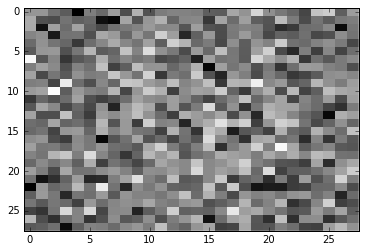

step 100, training accuracy 0.08
step 200, training accuracy 0.08
step 300, training accuracy 0.1
step 400, training accuracy 0.04
step 500, training accuracy 0.1
step 600, training accuracy 0.08
step 700, training accuracy 0.1
step 800, training accuracy 0.08
step 900, training accuracy 0.12
step 1000, training accuracy 0.16
Reconstruction of a 3


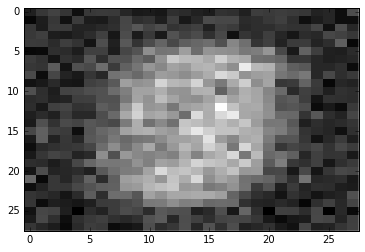

step 1100, training accuracy 0.06
step 1200, training accuracy 0.16
step 1300, training accuracy 0.1
step 1400, training accuracy 0.1
step 1500, training accuracy 0.1
step 1600, training accuracy 0.18
step 1700, training accuracy 0.14
step 1800, training accuracy 0.1
step 1900, training accuracy 0.2
step 2000, training accuracy 0.18
Reconstruction of a 4


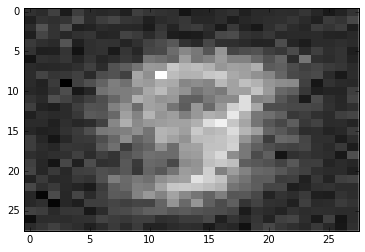

step 2100, training accuracy 0.3
step 2200, training accuracy 0.16
step 2300, training accuracy 0.24
step 2400, training accuracy 0.18
step 2500, training accuracy 0.16
step 2600, training accuracy 0.34
step 2700, training accuracy 0.18
step 2800, training accuracy 0.28
step 2900, training accuracy 0.18
step 3000, training accuracy 0.24
Reconstruction of a 6


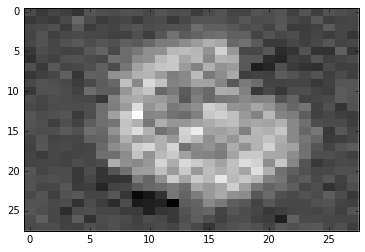

step 3100, training accuracy 0.42
step 3200, training accuracy 0.42
step 3300, training accuracy 0.46
step 3400, training accuracy 0.42
step 3500, training accuracy 0.6
step 3600, training accuracy 0.54
step 3700, training accuracy 0.68
step 3800, training accuracy 0.76
step 3900, training accuracy 0.58
step 4000, training accuracy 0.72
Reconstruction of a 8


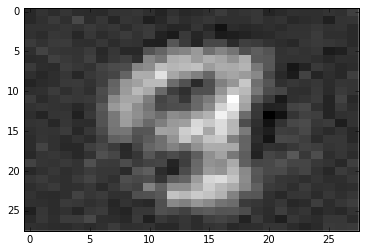

step 4100, training accuracy 0.76
step 4200, training accuracy 0.76
step 4300, training accuracy 0.74
step 4400, training accuracy 0.66
step 4500, training accuracy 0.76
step 4600, training accuracy 0.7
step 4700, training accuracy 0.62
step 4800, training accuracy 0.68
step 4900, training accuracy 0.7
step 5000, training accuracy 0.7
Reconstruction of a 9


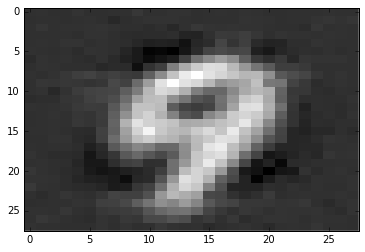

step 5100, training accuracy 0.86
step 5200, training accuracy 0.76
step 5300, training accuracy 0.76
step 5400, training accuracy 0.82
step 5500, training accuracy 0.78
step 5600, training accuracy 0.76
step 5700, training accuracy 0.68
step 5800, training accuracy 0.7
step 5900, training accuracy 0.74
step 6000, training accuracy 0.76
Reconstruction of a 5


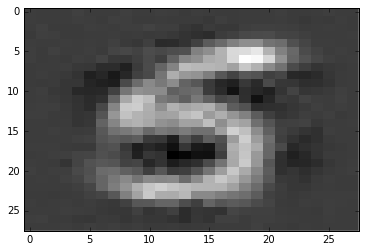

step 6100, training accuracy 0.78
step 6200, training accuracy 0.8
step 6300, training accuracy 0.82
step 6400, training accuracy 0.76
step 6500, training accuracy 0.8
step 6600, training accuracy 0.84
step 6700, training accuracy 0.82
step 6800, training accuracy 0.88
step 6900, training accuracy 0.86
step 7000, training accuracy 0.82
Reconstruction of a 7


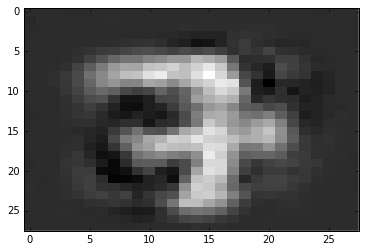

step 7100, training accuracy 0.86
step 7200, training accuracy 0.8
step 7300, training accuracy 0.84
step 7400, training accuracy 0.88
step 7500, training accuracy 0.78
step 7600, training accuracy 0.82
step 7700, training accuracy 0.76
step 7800, training accuracy 0.86
step 7900, training accuracy 0.8
step 8000, training accuracy 0.8
Reconstruction of a 0


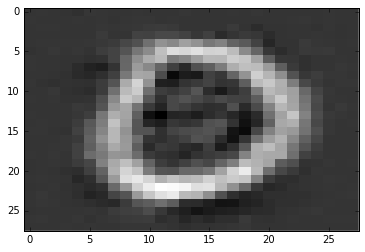

step 8100, training accuracy 0.76
step 8200, training accuracy 0.86
step 8300, training accuracy 0.76
step 8400, training accuracy 0.86
step 8500, training accuracy 0.86
step 8600, training accuracy 0.86
step 8700, training accuracy 0.76
step 8800, training accuracy 0.84
step 8900, training accuracy 0.9
step 9000, training accuracy 0.84
Reconstruction of a 8


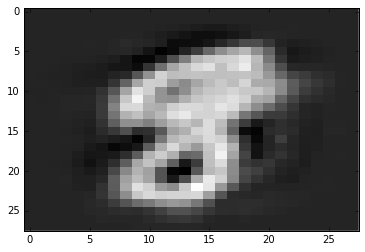

step 9100, training accuracy 0.88
step 9200, training accuracy 0.82
step 9300, training accuracy 0.88
step 9400, training accuracy 0.86
step 9500, training accuracy 0.78
step 9600, training accuracy 0.68
step 9700, training accuracy 0.8
step 9800, training accuracy 0.8
step 9900, training accuracy 0.8
epoch 1, learning rate 4.64159e-05
step 0, training accuracy 0.84
Reconstruction of a 5


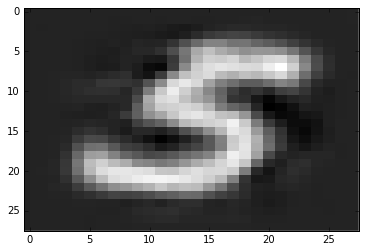

step 100, training accuracy 0.88
step 200, training accuracy 0.88
step 300, training accuracy 0.84
step 400, training accuracy 0.84
step 500, training accuracy 0.9
step 600, training accuracy 0.86
step 700, training accuracy 0.88
step 800, training accuracy 0.82
step 900, training accuracy 0.86
step 1000, training accuracy 0.8
Reconstruction of a 2


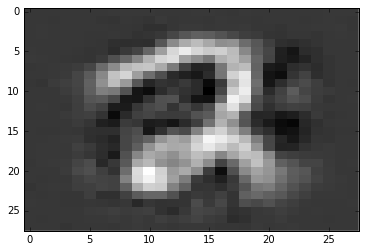

step 1100, training accuracy 0.88
step 1200, training accuracy 0.78
step 1300, training accuracy 0.86
step 1400, training accuracy 0.86
step 1500, training accuracy 0.96
step 1600, training accuracy 0.78
step 1700, training accuracy 0.96
step 1800, training accuracy 0.86
step 1900, training accuracy 0.9
step 2000, training accuracy 0.82
Reconstruction of a 7


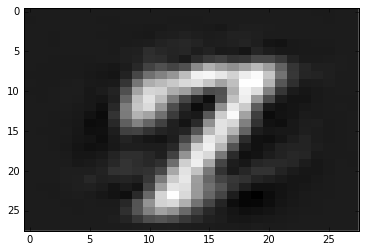

step 2100, training accuracy 0.92
step 2200, training accuracy 0.8
step 2300, training accuracy 0.88
step 2400, training accuracy 0.88
step 2500, training accuracy 0.8
step 2600, training accuracy 0.88
step 2700, training accuracy 0.78
step 2800, training accuracy 0.84
step 2900, training accuracy 0.74
step 3000, training accuracy 0.92
Reconstruction of a 9


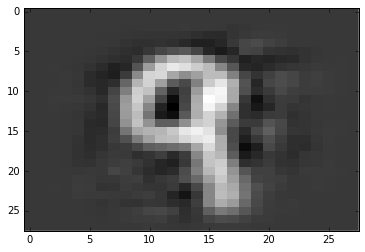

step 3100, training accuracy 0.76
step 3200, training accuracy 0.84
step 3300, training accuracy 0.82
step 3400, training accuracy 0.92
step 3500, training accuracy 0.86
step 3600, training accuracy 0.82
step 3700, training accuracy 0.9
step 3800, training accuracy 0.92
step 3900, training accuracy 0.9
step 4000, training accuracy 0.88
Reconstruction of a 8


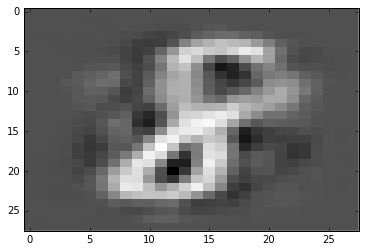

step 4100, training accuracy 0.9
step 4200, training accuracy 0.82
step 4300, training accuracy 0.92
step 4400, training accuracy 0.9
step 4500, training accuracy 0.9
step 4600, training accuracy 0.88
step 4700, training accuracy 0.82
step 4800, training accuracy 0.86
step 4900, training accuracy 0.88
step 5000, training accuracy 0.84
Reconstruction of a 4


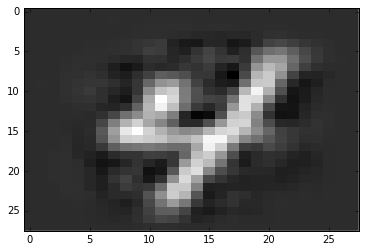

step 5100, training accuracy 0.88
step 5200, training accuracy 0.86
step 5300, training accuracy 0.86
step 5400, training accuracy 0.86
step 5500, training accuracy 0.88
step 5600, training accuracy 0.9
step 5700, training accuracy 0.84
step 5800, training accuracy 0.84
step 5900, training accuracy 0.9
step 6000, training accuracy 0.9
Reconstruction of a 9


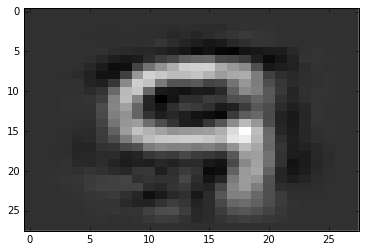

step 6100, training accuracy 0.88
step 6200, training accuracy 0.88
step 6300, training accuracy 0.9
step 6400, training accuracy 0.88
step 6500, training accuracy 0.92
step 6600, training accuracy 0.84
step 6700, training accuracy 0.86
step 6800, training accuracy 0.94
step 6900, training accuracy 0.84
step 7000, training accuracy 0.9
Reconstruction of a 6


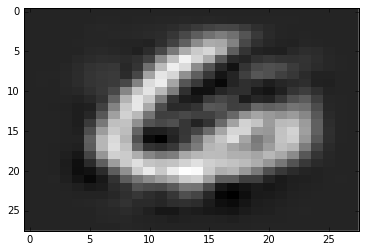

step 7100, training accuracy 0.86
step 7200, training accuracy 0.8
step 7300, training accuracy 0.9
step 7400, training accuracy 0.9
step 7500, training accuracy 0.9
step 7600, training accuracy 0.96
step 7700, training accuracy 0.84
step 7800, training accuracy 0.88
step 7900, training accuracy 0.9
step 8000, training accuracy 0.84
Reconstruction of a 0


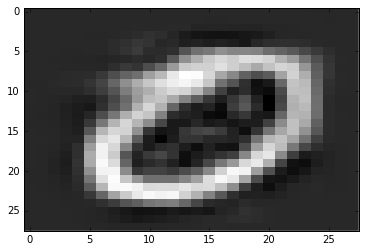

step 8100, training accuracy 0.88
step 8200, training accuracy 0.94
step 8300, training accuracy 0.88
step 8400, training accuracy 0.88
step 8500, training accuracy 0.9
step 8600, training accuracy 0.8
step 8700, training accuracy 0.84
step 8800, training accuracy 0.88
step 8900, training accuracy 0.94
step 9000, training accuracy 0.8
Reconstruction of a 3


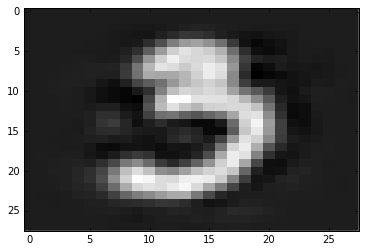

step 9100, training accuracy 0.84
step 9200, training accuracy 0.82
step 9300, training accuracy 0.8
step 9400, training accuracy 0.92
step 9500, training accuracy 0.96
step 9600, training accuracy 0.9
step 9700, training accuracy 0.92
step 9800, training accuracy 0.86
step 9900, training accuracy 0.9
epoch 2, learning rate 2.15443e-05
step 0, training accuracy 0.88
Reconstruction of a 1


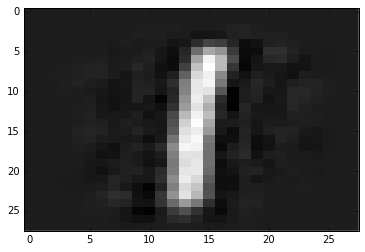

step 100, training accuracy 0.86
step 200, training accuracy 0.88
step 300, training accuracy 0.9
step 400, training accuracy 0.92
step 500, training accuracy 0.84
step 600, training accuracy 0.94
step 700, training accuracy 0.86
step 800, training accuracy 0.84
step 900, training accuracy 0.8
step 1000, training accuracy 0.9
Reconstruction of a 0


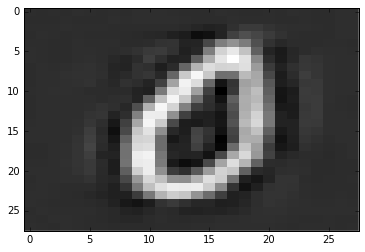

step 1100, training accuracy 0.94
step 1200, training accuracy 0.86
step 1300, training accuracy 0.76
step 1400, training accuracy 0.92
step 1500, training accuracy 0.86
step 1600, training accuracy 0.92
step 1700, training accuracy 0.94
step 1800, training accuracy 0.86
step 1900, training accuracy 0.82
step 2000, training accuracy 0.76
Reconstruction of a 1


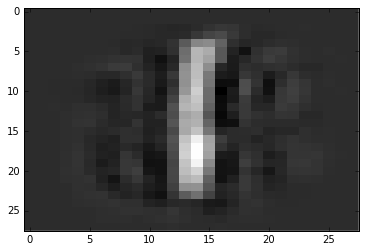

step 2100, training accuracy 0.9
step 2200, training accuracy 0.86
step 2300, training accuracy 0.86
step 2400, training accuracy 0.92
step 2500, training accuracy 0.86
step 2600, training accuracy 0.9
step 2700, training accuracy 0.82
step 2800, training accuracy 0.94
step 2900, training accuracy 0.9
step 3000, training accuracy 0.92
Reconstruction of a 8


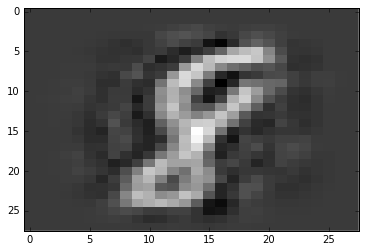

step 3100, training accuracy 0.92
step 3200, training accuracy 0.82
step 3300, training accuracy 0.96
step 3400, training accuracy 0.9
step 3500, training accuracy 0.9
step 3600, training accuracy 0.84
step 3700, training accuracy 0.92
step 3800, training accuracy 0.86
step 3900, training accuracy 0.8
step 4000, training accuracy 0.92
Reconstruction of a 7


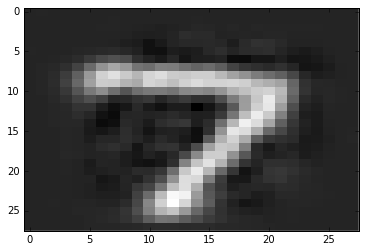

step 4100, training accuracy 0.78
step 4200, training accuracy 0.9
step 4300, training accuracy 0.94
step 4400, training accuracy 0.9
step 4500, training accuracy 0.9
step 4600, training accuracy 0.92
step 4700, training accuracy 0.88
step 4800, training accuracy 0.88
step 4900, training accuracy 0.9
step 5000, training accuracy 0.82
Reconstruction of a 4


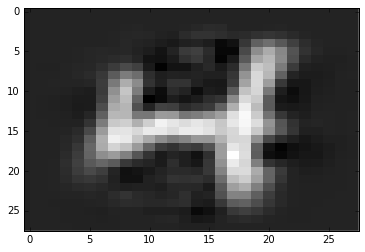

step 5100, training accuracy 0.8
step 5200, training accuracy 0.9
step 5300, training accuracy 0.86
step 5400, training accuracy 0.9
step 5500, training accuracy 0.86
step 5600, training accuracy 0.88
step 5700, training accuracy 0.84
step 5800, training accuracy 0.8
step 5900, training accuracy 0.82
step 6000, training accuracy 0.88
Reconstruction of a 5


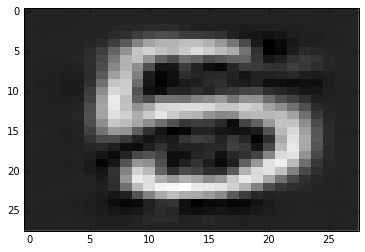

step 6100, training accuracy 0.82
step 6200, training accuracy 0.92
step 6300, training accuracy 0.86
step 6400, training accuracy 0.98
step 6500, training accuracy 0.92
step 6600, training accuracy 0.74
step 6700, training accuracy 0.88
step 6800, training accuracy 0.74
step 6900, training accuracy 0.8
step 7000, training accuracy 0.84
Reconstruction of a 2


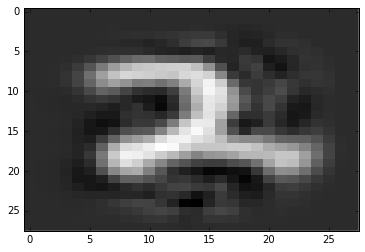

step 7100, training accuracy 0.82
step 7200, training accuracy 0.9
step 7300, training accuracy 0.86
step 7400, training accuracy 0.86
step 7500, training accuracy 0.94
step 7600, training accuracy 0.88
step 7700, training accuracy 0.86
step 7800, training accuracy 0.88
step 7900, training accuracy 0.86
step 8000, training accuracy 0.94
Reconstruction of a 7


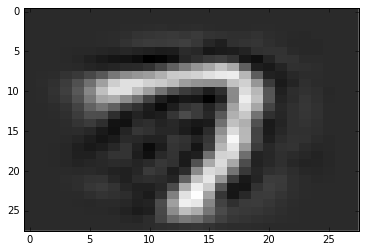

step 8100, training accuracy 0.82
step 8200, training accuracy 0.84
step 8300, training accuracy 0.94
step 8400, training accuracy 0.92
step 8500, training accuracy 0.8
step 8600, training accuracy 0.9
step 8700, training accuracy 0.88
step 8800, training accuracy 0.88
step 8900, training accuracy 0.86
step 9000, training accuracy 0.94
Reconstruction of a 7


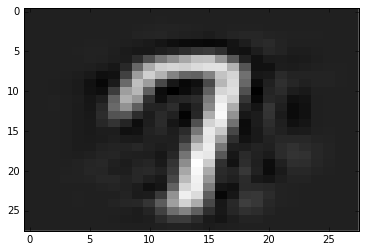

step 9100, training accuracy 0.88
step 9200, training accuracy 0.86
step 9300, training accuracy 0.86
step 9400, training accuracy 0.92
step 9500, training accuracy 0.82
step 9600, training accuracy 0.86
step 9700, training accuracy 0.9
step 9800, training accuracy 0.86
step 9900, training accuracy 0.92
epoch 3, learning rate 1e-05
step 0, training accuracy 0.84
Reconstruction of a 6


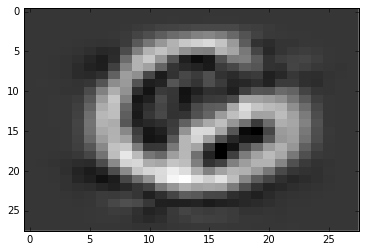

step 100, training accuracy 0.8
step 200, training accuracy 0.9
step 300, training accuracy 0.96
step 400, training accuracy 0.84
step 500, training accuracy 0.88
step 600, training accuracy 0.84
step 700, training accuracy 0.8
step 800, training accuracy 0.76
step 900, training accuracy 0.88
step 1000, training accuracy 0.86
Reconstruction of a 0


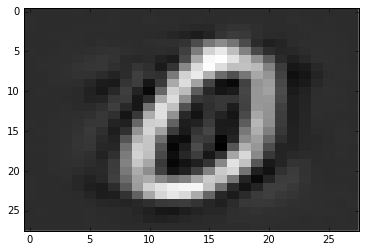

step 1100, training accuracy 0.88
step 1200, training accuracy 0.86
step 1300, training accuracy 0.88
step 1400, training accuracy 0.94
step 1500, training accuracy 0.86
step 1600, training accuracy 0.88
step 1700, training accuracy 0.9
step 1800, training accuracy 0.86
step 1900, training accuracy 0.86
step 2000, training accuracy 0.92
Reconstruction of a 3


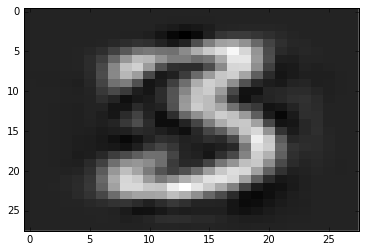

step 2100, training accuracy 0.86
step 2200, training accuracy 0.86
step 2300, training accuracy 0.76
step 2400, training accuracy 0.9
step 2500, training accuracy 0.88
step 2600, training accuracy 0.88
step 2700, training accuracy 0.84
step 2800, training accuracy 0.86
step 2900, training accuracy 0.92
step 3000, training accuracy 0.82
Reconstruction of a 0


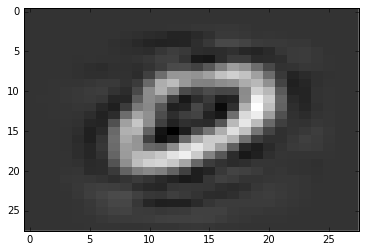

step 3100, training accuracy 0.96
step 3200, training accuracy 0.94
step 3300, training accuracy 0.84
step 3400, training accuracy 0.78
step 3500, training accuracy 0.86
step 3600, training accuracy 0.86
step 3700, training accuracy 0.84
step 3800, training accuracy 0.92
step 3900, training accuracy 0.84
step 4000, training accuracy 0.98
Reconstruction of a 9


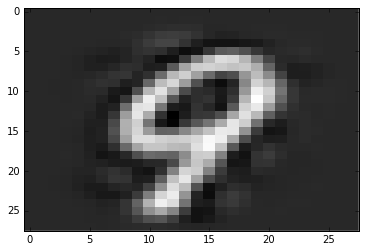

step 4100, training accuracy 0.86
step 4200, training accuracy 0.86
step 4300, training accuracy 0.96
step 4400, training accuracy 0.82
step 4500, training accuracy 0.84
step 4600, training accuracy 0.82
step 4700, training accuracy 0.9
step 4800, training accuracy 0.86
step 4900, training accuracy 0.9
step 5000, training accuracy 0.84
Reconstruction of a 7


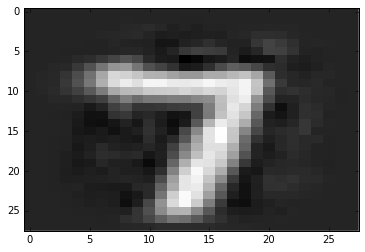

step 5100, training accuracy 0.78
step 5200, training accuracy 0.88
step 5300, training accuracy 0.78
step 5400, training accuracy 0.9
step 5500, training accuracy 0.94
step 5600, training accuracy 0.9
step 5700, training accuracy 0.88
step 5800, training accuracy 0.88
step 5900, training accuracy 0.88
step 6000, training accuracy 0.94
Reconstruction of a 1


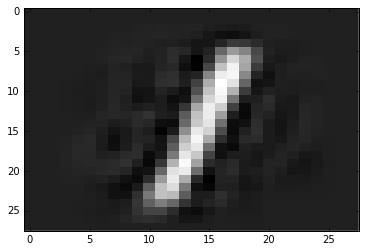

step 6100, training accuracy 0.82
step 6200, training accuracy 0.82
step 6300, training accuracy 0.9
step 6400, training accuracy 0.82
step 6500, training accuracy 0.88
step 6600, training accuracy 0.94
step 6700, training accuracy 0.92
step 6800, training accuracy 0.88
step 6900, training accuracy 0.9
step 7000, training accuracy 0.9
Reconstruction of a 3


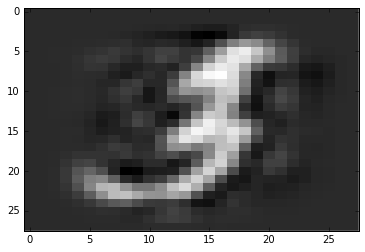

step 7100, training accuracy 0.8
step 7200, training accuracy 0.98
step 7300, training accuracy 0.92
step 7400, training accuracy 0.88
step 7500, training accuracy 0.84
step 7600, training accuracy 0.92
step 7700, training accuracy 0.84
step 7800, training accuracy 0.9
step 7900, training accuracy 0.86
step 8000, training accuracy 0.86
Reconstruction of a 1


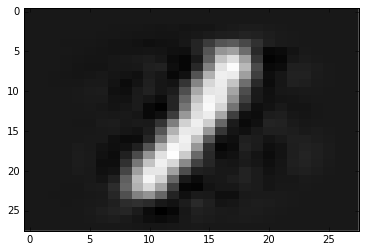

step 8100, training accuracy 0.86
step 8200, training accuracy 0.86
step 8300, training accuracy 0.82
step 8400, training accuracy 0.9
step 8500, training accuracy 0.86
step 8600, training accuracy 0.82
step 8700, training accuracy 0.84
step 8800, training accuracy 0.96
step 8900, training accuracy 0.8
step 9000, training accuracy 0.98
Reconstruction of a 6


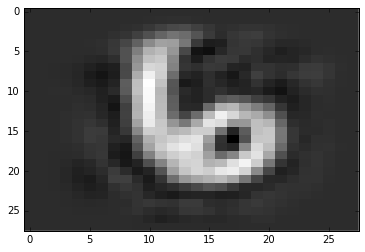

step 9100, training accuracy 0.9
step 9200, training accuracy 0.88
step 9300, training accuracy 0.88
step 9400, training accuracy 0.9
step 9500, training accuracy 0.9
step 9600, training accuracy 0.94
step 9700, training accuracy 0.92
step 9800, training accuracy 0.88
step 9900, training accuracy 0.94
epoch 4, learning rate 4.64159e-06
step 0, training accuracy 0.92
Reconstruction of a 4


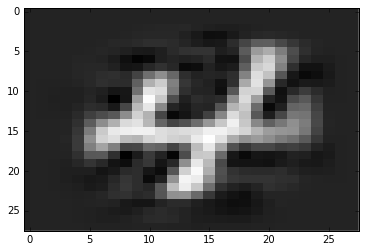

step 100, training accuracy 0.9
step 200, training accuracy 0.9
step 300, training accuracy 0.92
step 400, training accuracy 0.88
step 500, training accuracy 0.9
step 600, training accuracy 0.76
step 700, training accuracy 0.86
step 800, training accuracy 0.92
step 900, training accuracy 0.92
step 1000, training accuracy 0.9
Reconstruction of a 3


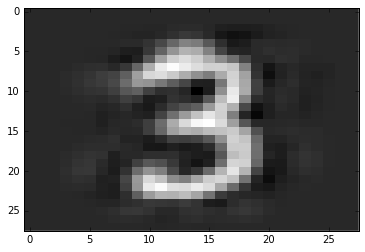

step 1100, training accuracy 0.92
step 1200, training accuracy 0.88
step 1300, training accuracy 0.86
step 1400, training accuracy 0.86
step 1500, training accuracy 0.88
step 1600, training accuracy 0.86
step 1700, training accuracy 0.9
step 1800, training accuracy 0.92
step 1900, training accuracy 0.9
step 2000, training accuracy 0.96
Reconstruction of a 1


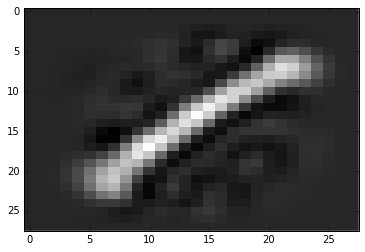

step 2100, training accuracy 0.92
step 2200, training accuracy 0.92
step 2300, training accuracy 0.94
step 2400, training accuracy 0.9
step 2500, training accuracy 0.9
step 2600, training accuracy 0.88
step 2700, training accuracy 0.78
step 2800, training accuracy 0.9
step 2900, training accuracy 0.9
step 3000, training accuracy 0.92
Reconstruction of a 6


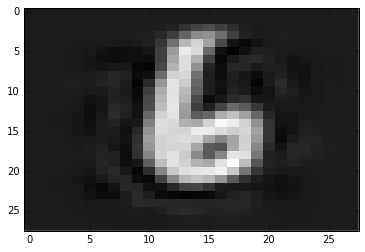

step 3100, training accuracy 0.88
step 3200, training accuracy 0.88
step 3300, training accuracy 0.9
step 3400, training accuracy 0.9
step 3500, training accuracy 0.8
step 3600, training accuracy 0.96
step 3700, training accuracy 0.88
step 3800, training accuracy 0.82
step 3900, training accuracy 0.96
step 4000, training accuracy 0.92
Reconstruction of a 2


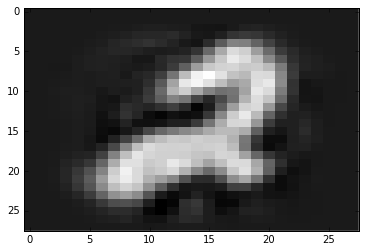

step 4100, training accuracy 0.88
step 4200, training accuracy 0.96
step 4300, training accuracy 0.86
step 4400, training accuracy 0.94
step 4500, training accuracy 0.94
step 4600, training accuracy 0.8
step 4700, training accuracy 0.94
step 4800, training accuracy 0.9
step 4900, training accuracy 0.84
step 5000, training accuracy 0.84
Reconstruction of a 9


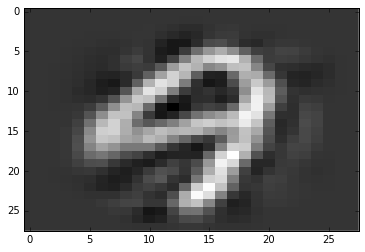

step 5100, training accuracy 0.9
step 5200, training accuracy 0.88
step 5300, training accuracy 0.9
step 5400, training accuracy 0.84
step 5500, training accuracy 0.92
step 5600, training accuracy 0.9
step 5700, training accuracy 0.82
step 5800, training accuracy 0.96
step 5900, training accuracy 0.84
step 6000, training accuracy 0.94
Reconstruction of a 2


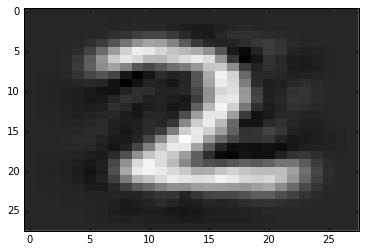

step 6100, training accuracy 0.88
step 6200, training accuracy 0.92
step 6300, training accuracy 0.8
step 6400, training accuracy 0.9
step 6500, training accuracy 0.78
step 6600, training accuracy 0.94
step 6700, training accuracy 0.8
step 6800, training accuracy 0.92
step 6900, training accuracy 0.78
step 7000, training accuracy 0.84
Reconstruction of a 0


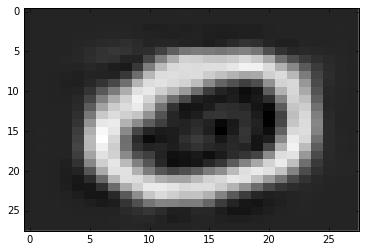

step 7100, training accuracy 0.86
step 7200, training accuracy 0.92
step 7300, training accuracy 0.86
step 7400, training accuracy 0.88
step 7500, training accuracy 0.86
step 7600, training accuracy 0.84
step 7700, training accuracy 0.9
step 7800, training accuracy 0.86
step 7900, training accuracy 0.86
step 8000, training accuracy 0.9
Reconstruction of a 7


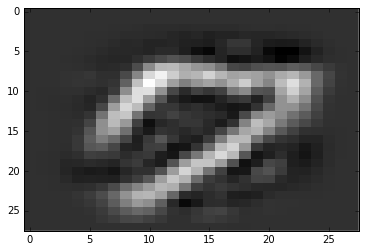

step 8100, training accuracy 0.84
step 8200, training accuracy 0.96
step 8300, training accuracy 0.94
step 8400, training accuracy 0.84
step 8500, training accuracy 0.88
step 8600, training accuracy 0.88
step 8700, training accuracy 0.8
step 8800, training accuracy 0.86
step 8900, training accuracy 0.92
step 9000, training accuracy 0.88
Reconstruction of a 7


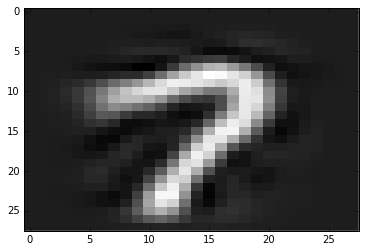

step 9100, training accuracy 0.88
step 9200, training accuracy 0.84
step 9300, training accuracy 0.76
step 9400, training accuracy 0.86
step 9500, training accuracy 0.88
step 9600, training accuracy 0.9
step 9700, training accuracy 0.82
step 9800, training accuracy 0.88
step 9900, training accuracy 0.94
epoch 5, learning rate 2.15443e-06
step 0, training accuracy 0.74
Reconstruction of a 8


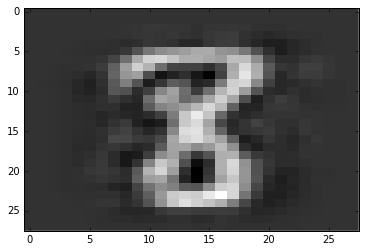

step 100, training accuracy 0.84
step 200, training accuracy 0.88
step 300, training accuracy 0.9
step 400, training accuracy 0.96
step 500, training accuracy 0.86
step 600, training accuracy 0.94
step 700, training accuracy 0.84
step 800, training accuracy 0.9
step 900, training accuracy 0.88
step 1000, training accuracy 0.92
Reconstruction of a 1


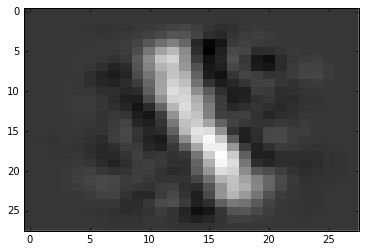

step 1100, training accuracy 0.86
step 1200, training accuracy 0.88
step 1300, training accuracy 0.88
step 1400, training accuracy 0.86
step 1500, training accuracy 0.86
step 1600, training accuracy 0.88
step 1700, training accuracy 0.86
step 1800, training accuracy 0.82
step 1900, training accuracy 0.9
step 2000, training accuracy 0.88
Reconstruction of a 4


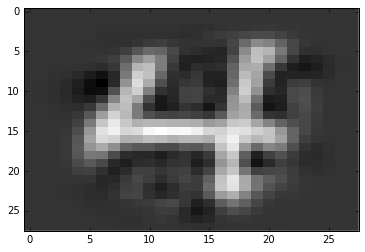

step 2100, training accuracy 0.9
step 2200, training accuracy 0.78
step 2300, training accuracy 0.88
step 2400, training accuracy 0.92
step 2500, training accuracy 0.88
step 2600, training accuracy 0.92
step 2700, training accuracy 0.76
step 2800, training accuracy 0.94
step 2900, training accuracy 0.88
step 3000, training accuracy 0.9
Reconstruction of a 5


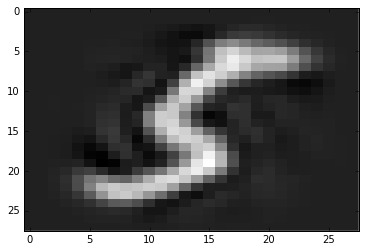

step 3100, training accuracy 0.82
step 3200, training accuracy 0.9
step 3300, training accuracy 0.94
step 3400, training accuracy 0.92
step 3500, training accuracy 0.92
step 3600, training accuracy 0.9
step 3700, training accuracy 0.9
step 3800, training accuracy 0.88
step 3900, training accuracy 0.88
step 4000, training accuracy 0.8
Reconstruction of a 5


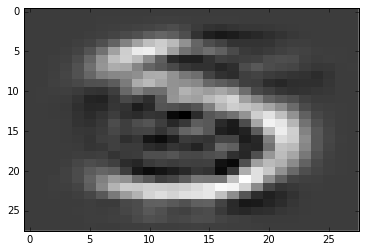

step 4100, training accuracy 0.92
step 4200, training accuracy 0.9
step 4300, training accuracy 0.86
step 4400, training accuracy 0.98
step 4500, training accuracy 0.86
step 4600, training accuracy 0.88
step 4700, training accuracy 0.9
step 4800, training accuracy 0.88
step 4900, training accuracy 0.86
step 5000, training accuracy 0.86
Reconstruction of a 7


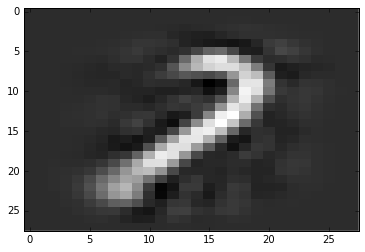

step 5100, training accuracy 0.88
step 5200, training accuracy 0.88
step 5300, training accuracy 0.94
step 5400, training accuracy 0.92
step 5500, training accuracy 0.96
step 5600, training accuracy 0.88
step 5700, training accuracy 0.9
step 5800, training accuracy 0.98
step 5900, training accuracy 0.82
step 6000, training accuracy 0.8
Reconstruction of a 1


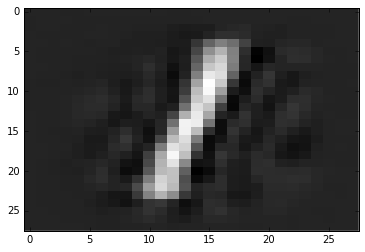

step 6100, training accuracy 0.92
step 6200, training accuracy 0.88
step 6300, training accuracy 0.94
step 6400, training accuracy 0.9
step 6500, training accuracy 0.78
step 6600, training accuracy 0.86
step 6700, training accuracy 0.9
step 6800, training accuracy 0.86
step 6900, training accuracy 0.92
step 7000, training accuracy 0.9
Reconstruction of a 0


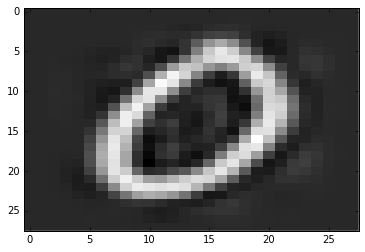

step 7100, training accuracy 0.96
step 7200, training accuracy 0.9
step 7300, training accuracy 0.88
step 7400, training accuracy 0.84
step 7500, training accuracy 0.84
step 7600, training accuracy 0.86
step 7700, training accuracy 0.84
step 7800, training accuracy 0.9
step 7900, training accuracy 1
step 8000, training accuracy 0.84
Reconstruction of a 5


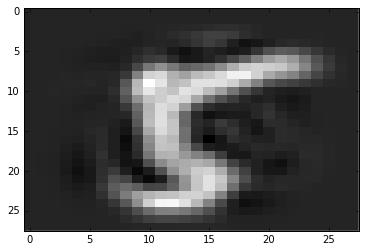

step 8100, training accuracy 0.9
step 8200, training accuracy 0.84
step 8300, training accuracy 0.92
step 8400, training accuracy 0.8
step 8500, training accuracy 0.92
step 8600, training accuracy 0.94
step 8700, training accuracy 0.88
step 8800, training accuracy 0.74
step 8900, training accuracy 0.76
step 9000, training accuracy 0.86
Reconstruction of a 5


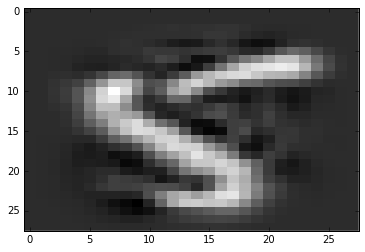

step 9100, training accuracy 0.88
step 9200, training accuracy 0.94
step 9300, training accuracy 0.9
step 9400, training accuracy 0.8
step 9500, training accuracy 0.86
step 9600, training accuracy 0.86
step 9700, training accuracy 0.78
step 9800, training accuracy 0.84
step 9900, training accuracy 0.86
epoch 6, learning rate 1e-06
step 0, training accuracy 0.92
Reconstruction of a 4


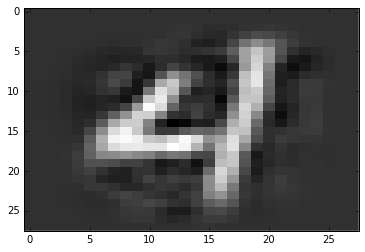

step 100, training accuracy 0.94
step 200, training accuracy 0.9
step 300, training accuracy 0.9
step 400, training accuracy 0.9
step 500, training accuracy 0.9
step 600, training accuracy 0.94
step 700, training accuracy 0.88
step 800, training accuracy 0.82
step 900, training accuracy 0.92
step 1000, training accuracy 0.86
Reconstruction of a 5


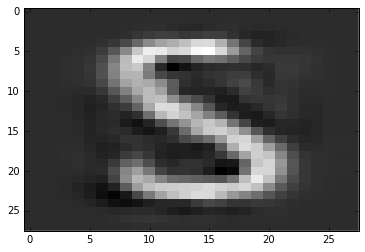

step 1100, training accuracy 0.86
step 1200, training accuracy 0.88
step 1300, training accuracy 0.92
step 1400, training accuracy 0.88
step 1500, training accuracy 0.9
step 1600, training accuracy 0.84
step 1700, training accuracy 0.82
step 1800, training accuracy 0.94
step 1900, training accuracy 0.86
step 2000, training accuracy 0.82
Reconstruction of a 8


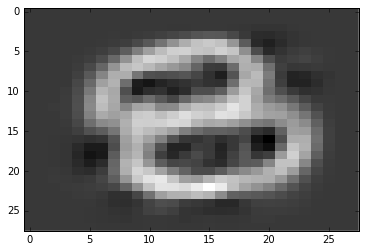

step 2100, training accuracy 0.92
step 2200, training accuracy 0.82
step 2300, training accuracy 0.9
step 2400, training accuracy 0.9
step 2500, training accuracy 0.86
step 2600, training accuracy 0.84
step 2700, training accuracy 0.92
step 2800, training accuracy 0.92
step 2900, training accuracy 0.86
step 3000, training accuracy 0.78
Reconstruction of a 0


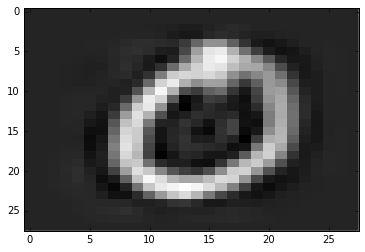

step 3100, training accuracy 0.96
step 3200, training accuracy 0.88
step 3300, training accuracy 0.84
step 3400, training accuracy 0.88
step 3500, training accuracy 0.92
step 3600, training accuracy 0.86
step 3700, training accuracy 0.92
step 3800, training accuracy 0.9
step 3900, training accuracy 0.94
step 4000, training accuracy 0.9
Reconstruction of a 6


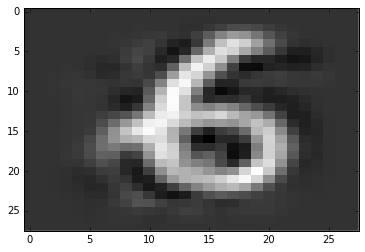

step 4100, training accuracy 0.92
step 4200, training accuracy 0.88
step 4300, training accuracy 0.94
step 4400, training accuracy 0.84
step 4500, training accuracy 0.86
step 4600, training accuracy 0.92
step 4700, training accuracy 0.92
step 4800, training accuracy 0.86
step 4900, training accuracy 0.9
step 5000, training accuracy 0.92
Reconstruction of a 9


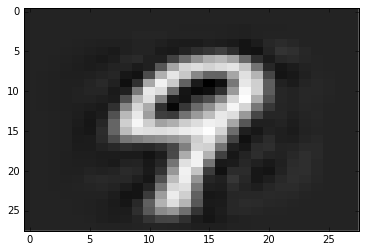

step 5100, training accuracy 0.84
step 5200, training accuracy 0.82
step 5300, training accuracy 0.82
step 5400, training accuracy 0.86
step 5500, training accuracy 0.9
step 5600, training accuracy 0.88
step 5700, training accuracy 0.92
step 5800, training accuracy 0.92
step 5900, training accuracy 0.88
step 6000, training accuracy 0.86
Reconstruction of a 7


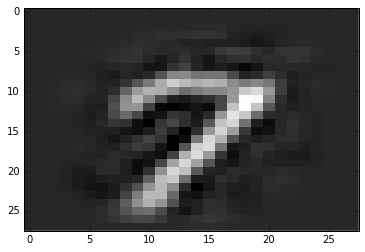

step 6100, training accuracy 0.88
step 6200, training accuracy 0.9
step 6300, training accuracy 0.9
step 6400, training accuracy 0.82
step 6500, training accuracy 0.82
step 6600, training accuracy 0.86
step 6700, training accuracy 0.88
step 6800, training accuracy 0.86
step 6900, training accuracy 0.84
step 7000, training accuracy 0.84
Reconstruction of a 2


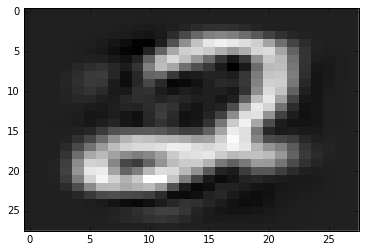

step 7100, training accuracy 0.94
step 7200, training accuracy 0.9
step 7300, training accuracy 0.92
step 7400, training accuracy 0.88
step 7500, training accuracy 0.88
step 7600, training accuracy 0.86
step 7700, training accuracy 0.82
step 7800, training accuracy 0.88
step 7900, training accuracy 0.84
step 8000, training accuracy 0.94
Reconstruction of a 4


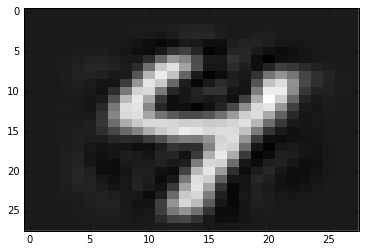

step 8100, training accuracy 0.92
step 8200, training accuracy 0.84
step 8300, training accuracy 0.92
step 8400, training accuracy 0.94
step 8500, training accuracy 0.9
step 8600, training accuracy 0.86
step 8700, training accuracy 0.88
step 8800, training accuracy 0.86
step 8900, training accuracy 0.84
step 9000, training accuracy 0.94
Reconstruction of a 6


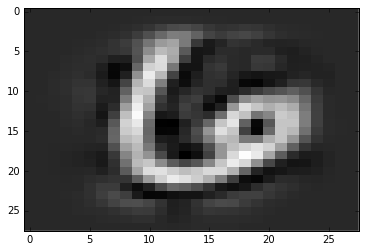

step 9100, training accuracy 0.9
step 9200, training accuracy 0.9
step 9300, training accuracy 0.88
step 9400, training accuracy 0.88
step 9500, training accuracy 0.92
step 9600, training accuracy 0.88
step 9700, training accuracy 0.88
step 9800, training accuracy 0.8
step 9900, training accuracy 0.88
epoch 7, learning rate 4.64159e-07
step 0, training accuracy 0.88
Reconstruction of a 3


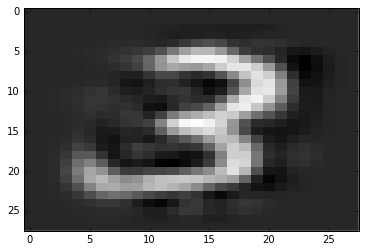

step 100, training accuracy 0.9
step 200, training accuracy 0.86
step 300, training accuracy 0.8
step 400, training accuracy 0.88
step 500, training accuracy 0.88
step 600, training accuracy 0.94
step 700, training accuracy 0.86
step 800, training accuracy 0.86
step 900, training accuracy 0.94
step 1000, training accuracy 0.92
Reconstruction of a 4


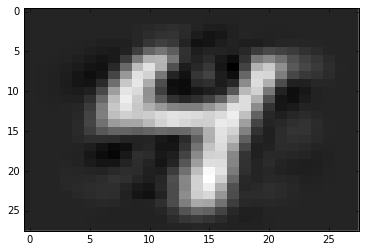

step 1100, training accuracy 0.88
step 1200, training accuracy 0.92
step 1300, training accuracy 0.94
step 1400, training accuracy 0.84
step 1500, training accuracy 0.9
step 1600, training accuracy 0.86
step 1700, training accuracy 0.88
step 1800, training accuracy 0.9
step 1900, training accuracy 0.9
step 2000, training accuracy 0.88
Reconstruction of a 4


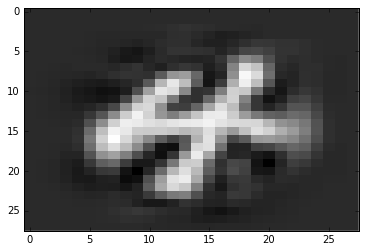

step 2100, training accuracy 0.88
step 2200, training accuracy 0.92
step 2300, training accuracy 0.86
step 2400, training accuracy 0.94
step 2500, training accuracy 0.94
step 2600, training accuracy 0.92
step 2700, training accuracy 0.84
step 2800, training accuracy 0.96
step 2900, training accuracy 0.8
step 3000, training accuracy 0.84
Reconstruction of a 6


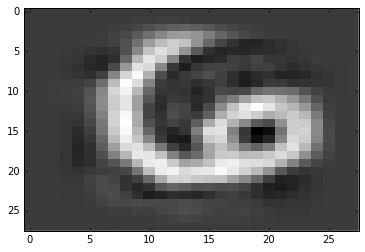

step 3100, training accuracy 0.78
step 3200, training accuracy 0.86
step 3300, training accuracy 0.9
step 3400, training accuracy 0.94
step 3500, training accuracy 0.86
step 3600, training accuracy 0.94
step 3700, training accuracy 0.88
step 3800, training accuracy 0.92
step 3900, training accuracy 0.9
step 4000, training accuracy 0.94
Reconstruction of a 1


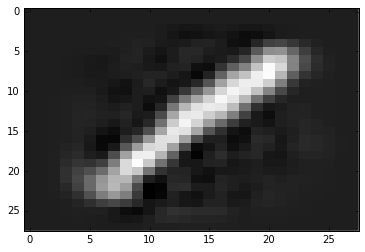

step 4100, training accuracy 0.94
step 4200, training accuracy 0.92
step 4300, training accuracy 0.86
step 4400, training accuracy 0.96
step 4500, training accuracy 0.86
step 4600, training accuracy 0.84
step 4700, training accuracy 0.84
step 4800, training accuracy 0.94
step 4900, training accuracy 0.92
step 5000, training accuracy 0.86
Reconstruction of a 5


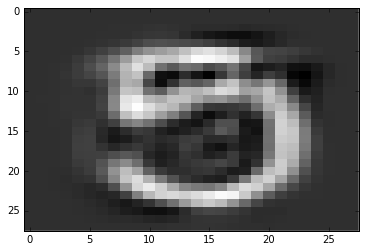

step 5100, training accuracy 0.92
step 5200, training accuracy 0.88
step 5300, training accuracy 0.9
step 5400, training accuracy 0.92
step 5500, training accuracy 0.86
step 5600, training accuracy 0.88
step 5700, training accuracy 0.84
step 5800, training accuracy 0.92
step 5900, training accuracy 0.94
step 6000, training accuracy 0.9
Reconstruction of a 2


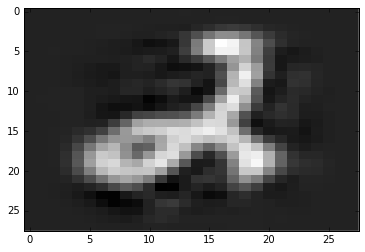

step 6100, training accuracy 0.88
step 6200, training accuracy 0.94
step 6300, training accuracy 0.94
step 6400, training accuracy 0.9
step 6500, training accuracy 0.84
step 6600, training accuracy 0.94
step 6700, training accuracy 0.9
step 6800, training accuracy 0.94
step 6900, training accuracy 0.88
step 7000, training accuracy 0.9
Reconstruction of a 4


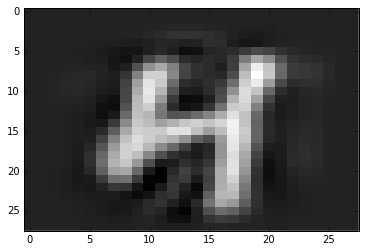

step 7100, training accuracy 0.84
step 7200, training accuracy 0.82
step 7300, training accuracy 0.78
step 7400, training accuracy 0.94
step 7500, training accuracy 0.9
step 7600, training accuracy 0.9
step 7700, training accuracy 0.88
step 7800, training accuracy 0.88
step 7900, training accuracy 0.82
step 8000, training accuracy 0.9
Reconstruction of a 6


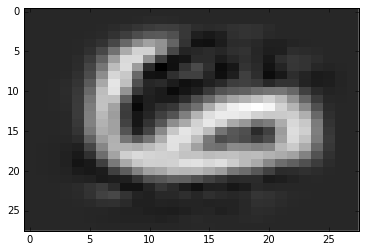

step 8100, training accuracy 0.9
step 8200, training accuracy 0.8
step 8300, training accuracy 0.9
step 8400, training accuracy 0.86
step 8500, training accuracy 0.92
step 8600, training accuracy 0.88
step 8700, training accuracy 0.86
step 8800, training accuracy 0.92
step 8900, training accuracy 0.72
step 9000, training accuracy 0.92
Reconstruction of a 7


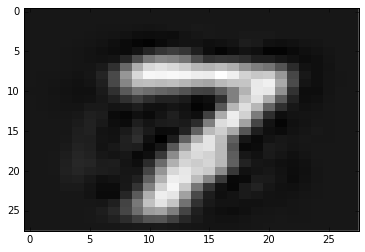

step 9100, training accuracy 0.88
step 9200, training accuracy 0.86
step 9300, training accuracy 0.88
step 9400, training accuracy 0.88
step 9500, training accuracy 0.84
step 9600, training accuracy 0.88
step 9700, training accuracy 0.9
step 9800, training accuracy 0.86
step 9900, training accuracy 0.8
epoch 8, learning rate 2.15443e-07
step 0, training accuracy 0.98
Reconstruction of a 5


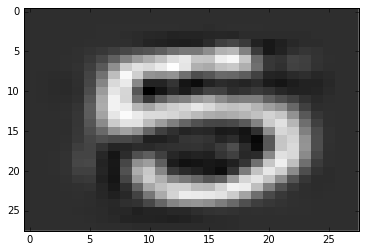

step 100, training accuracy 0.82
step 200, training accuracy 0.82
step 300, training accuracy 0.88
step 400, training accuracy 0.86
step 500, training accuracy 0.9
step 600, training accuracy 0.92
step 700, training accuracy 0.88
step 800, training accuracy 0.84
step 900, training accuracy 0.94
step 1000, training accuracy 0.84
Reconstruction of a 1


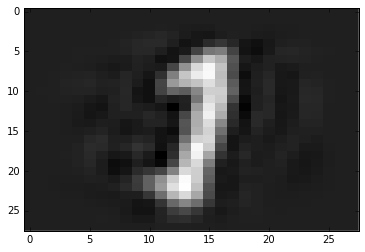

step 1100, training accuracy 0.9
step 1200, training accuracy 0.94
step 1300, training accuracy 0.92
step 1400, training accuracy 0.88
step 1500, training accuracy 0.9
step 1600, training accuracy 0.9
step 1700, training accuracy 0.96
step 1800, training accuracy 0.84
step 1900, training accuracy 0.92
step 2000, training accuracy 0.94
Reconstruction of a 3


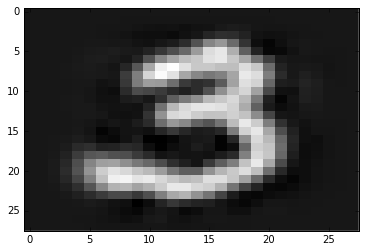

step 2100, training accuracy 0.9
step 2200, training accuracy 0.96
step 2300, training accuracy 0.84
step 2400, training accuracy 0.94
step 2500, training accuracy 0.94
step 2600, training accuracy 0.9
step 2700, training accuracy 0.84
step 2800, training accuracy 0.78
step 2900, training accuracy 0.86
step 3000, training accuracy 0.9
Reconstruction of a 4


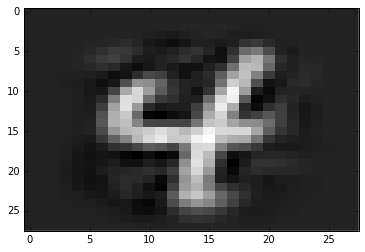

step 3100, training accuracy 0.9
step 3200, training accuracy 0.82
step 3300, training accuracy 0.94
step 3400, training accuracy 0.86
step 3500, training accuracy 0.82
step 3600, training accuracy 0.88
step 3700, training accuracy 0.82
step 3800, training accuracy 0.88
step 3900, training accuracy 0.9
step 4000, training accuracy 0.94
Reconstruction of a 7


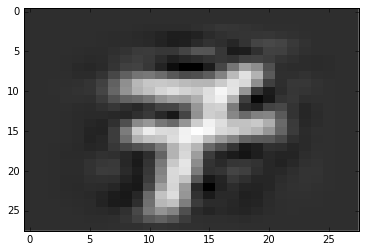

step 4100, training accuracy 0.8
step 4200, training accuracy 0.84
step 4300, training accuracy 0.94
step 4400, training accuracy 0.9
step 4500, training accuracy 0.86
step 4600, training accuracy 0.88
step 4700, training accuracy 0.92
step 4800, training accuracy 0.88
step 4900, training accuracy 0.92
step 5000, training accuracy 0.9
Reconstruction of a 6


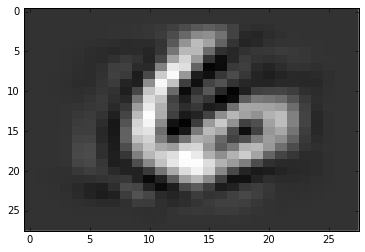

step 5100, training accuracy 0.88
step 5200, training accuracy 0.84
step 5300, training accuracy 0.9
step 5400, training accuracy 0.92
step 5500, training accuracy 0.9
step 5600, training accuracy 0.88
step 5700, training accuracy 0.88
step 5800, training accuracy 0.86
step 5900, training accuracy 0.88
step 6000, training accuracy 0.84
Reconstruction of a 9


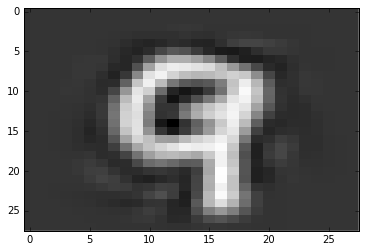

step 6100, training accuracy 0.86
step 6200, training accuracy 0.84
step 6300, training accuracy 0.98
step 6400, training accuracy 0.84
step 6500, training accuracy 0.92
step 6600, training accuracy 0.88
step 6700, training accuracy 0.88
step 6800, training accuracy 0.9
step 6900, training accuracy 0.84
step 7000, training accuracy 0.86
Reconstruction of a 4


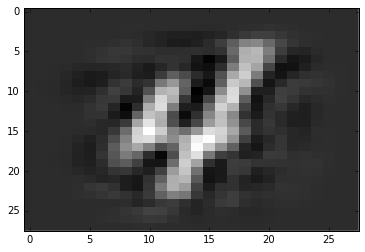

step 7100, training accuracy 0.86
step 7200, training accuracy 0.8
step 7300, training accuracy 0.78
step 7400, training accuracy 0.92
step 7500, training accuracy 0.86
step 7600, training accuracy 0.86
step 7700, training accuracy 0.86
step 7800, training accuracy 0.94
step 7900, training accuracy 0.82
step 8000, training accuracy 0.86
Reconstruction of a 9


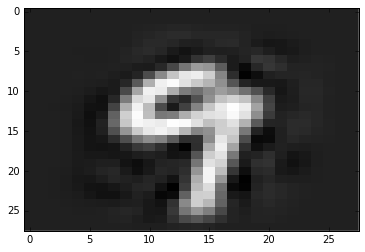

step 8100, training accuracy 0.88
step 8200, training accuracy 0.84
step 8300, training accuracy 0.86
step 8400, training accuracy 0.94
step 8500, training accuracy 0.86
step 8600, training accuracy 0.94
step 8700, training accuracy 0.88
step 8800, training accuracy 0.8
step 8900, training accuracy 0.82
step 9000, training accuracy 0.74
Reconstruction of a 6


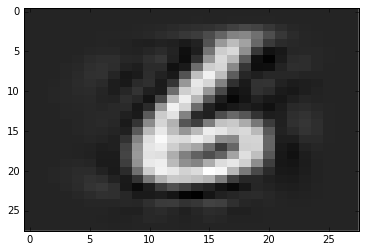

step 9100, training accuracy 0.92
step 9200, training accuracy 0.82
step 9300, training accuracy 0.88
step 9400, training accuracy 0.9
step 9500, training accuracy 0.88
step 9600, training accuracy 0.9
step 9700, training accuracy 0.86
step 9800, training accuracy 0.86
step 9900, training accuracy 0.96
epoch 9, learning rate 1e-07
step 0, training accuracy 0.9
Reconstruction of a 1


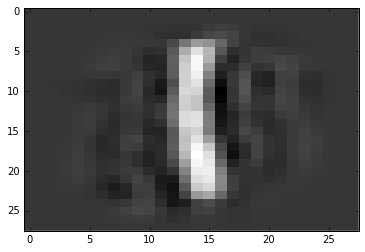

step 100, training accuracy 0.88
step 200, training accuracy 0.92
step 300, training accuracy 0.86
step 400, training accuracy 0.82
step 500, training accuracy 0.84
step 600, training accuracy 0.86
step 700, training accuracy 0.9
step 800, training accuracy 0.86
step 900, training accuracy 0.96
step 1000, training accuracy 0.88
Reconstruction of a 9


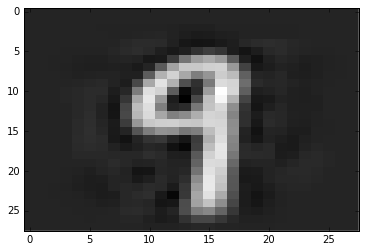

step 1100, training accuracy 0.9
step 1200, training accuracy 0.88
step 1300, training accuracy 0.88
step 1400, training accuracy 0.9
step 1500, training accuracy 0.84
step 1600, training accuracy 0.9
step 1700, training accuracy 0.94
step 1800, training accuracy 0.96
step 1900, training accuracy 0.82
step 2000, training accuracy 0.88
Reconstruction of a 9


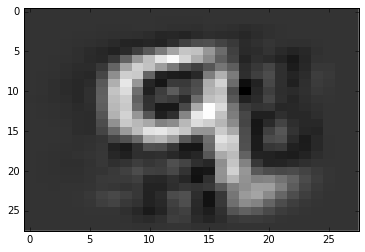

step 2100, training accuracy 0.88
step 2200, training accuracy 0.86
step 2300, training accuracy 0.86
step 2400, training accuracy 0.88
step 2500, training accuracy 0.92
step 2600, training accuracy 0.86
step 2700, training accuracy 0.9
step 2800, training accuracy 0.9
step 2900, training accuracy 0.88
step 3000, training accuracy 0.88
Reconstruction of a 2


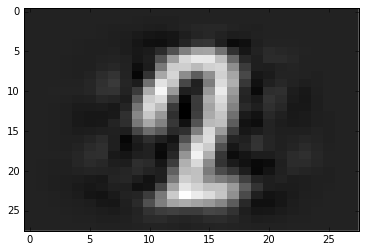

step 3100, training accuracy 0.94
step 3200, training accuracy 0.86
step 3300, training accuracy 0.8
step 3400, training accuracy 0.96
step 3500, training accuracy 0.78
step 3600, training accuracy 0.92
step 3700, training accuracy 0.92
step 3800, training accuracy 0.8
step 3900, training accuracy 0.84
step 4000, training accuracy 0.82
Reconstruction of a 8


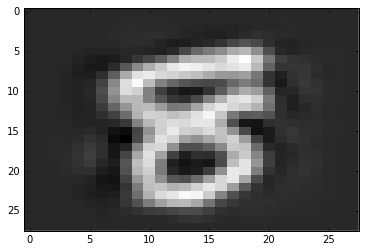

step 4100, training accuracy 0.84
step 4200, training accuracy 0.86
step 4300, training accuracy 0.76
step 4400, training accuracy 0.9
step 4500, training accuracy 0.92
step 4600, training accuracy 0.8
step 4700, training accuracy 0.82
step 4800, training accuracy 0.86
step 4900, training accuracy 0.86
step 5000, training accuracy 0.88
Reconstruction of a 7


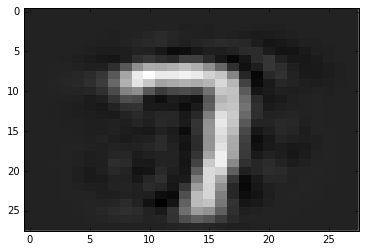

step 5100, training accuracy 0.88
step 5200, training accuracy 0.9
step 5300, training accuracy 0.78
step 5400, training accuracy 0.96
step 5500, training accuracy 0.9
step 5600, training accuracy 0.82
step 5700, training accuracy 0.92
step 5800, training accuracy 0.96
step 5900, training accuracy 0.94
step 6000, training accuracy 0.84
Reconstruction of a 6


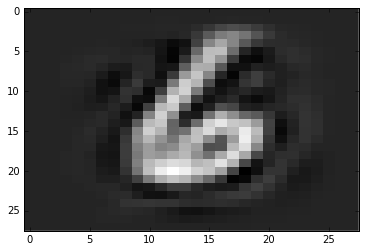

step 6100, training accuracy 0.9
step 6200, training accuracy 0.86
step 6300, training accuracy 0.92
step 6400, training accuracy 0.86
step 6500, training accuracy 0.88
step 6600, training accuracy 0.84
step 6700, training accuracy 0.88
step 6800, training accuracy 0.8
step 6900, training accuracy 0.88
step 7000, training accuracy 0.92
Reconstruction of a 2


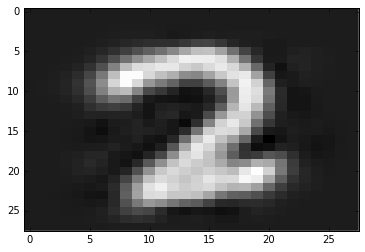

step 7100, training accuracy 0.86
step 7200, training accuracy 0.92
step 7300, training accuracy 0.9
step 7400, training accuracy 0.9
step 7500, training accuracy 0.9
step 7600, training accuracy 0.92
step 7700, training accuracy 0.88
step 7800, training accuracy 0.9
step 7900, training accuracy 0.92
step 8000, training accuracy 0.9
Reconstruction of a 3


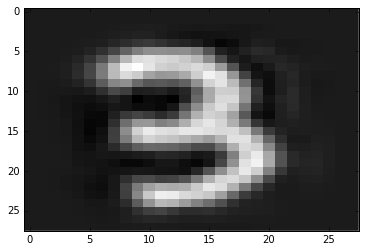

step 8100, training accuracy 0.88
step 8200, training accuracy 0.84
step 8300, training accuracy 0.94
step 8400, training accuracy 0.86
step 8500, training accuracy 0.84
step 8600, training accuracy 0.92
step 8700, training accuracy 0.84
step 8800, training accuracy 0.88
step 8900, training accuracy 0.9
step 9000, training accuracy 0.88
Reconstruction of a 3


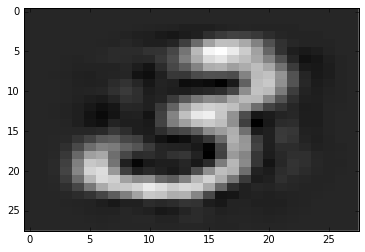

step 9100, training accuracy 0.84
step 9200, training accuracy 0.92
step 9300, training accuracy 0.86
step 9400, training accuracy 0.94
step 9500, training accuracy 0.94
step 9600, training accuracy 0.94
step 9700, training accuracy 0.9
step 9800, training accuracy 0.88
step 9900, training accuracy 0.88


In [72]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_r = tf.placeholder(tf.float32, shape=[None, 784])
learning_rate = tf.placeholder(tf.float32, shape=[])

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x,W) + b)
y = tf.nn.sigmoid(tf.matmul(a,W_2) + b_2)
x_r = tf.matmul(a-b,tf.transpose(W))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
# train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy + reconstruction_error)
# back_train_step = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_error)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for epoch in range(10):
  l_r = 10**np.linspace(-4,-7,10)[epoch]
  print("epoch %d, learning rate %g"%(epoch,l_r))
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("step %d, training accuracy %g"%(i, train_accuracy))
    if i%1000 == 0:
      reconstruction = x_r.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
      plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
      plt.show()
    train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})
#     back_train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})

In [73]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

test accuracy 0.891


# Using ReLU and reconstruction and epochs with 2 smaller hidden layers

epoch 0, learning rate 0.0001
step 0, training accuracy 0.02
Reconstruction of a 3


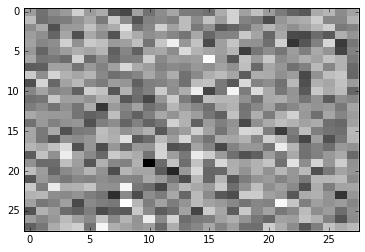

step 100, training accuracy 0.04
step 200, training accuracy 0.18
step 300, training accuracy 0.14
step 400, training accuracy 0.2
step 500, training accuracy 0.5
step 600, training accuracy 0.54
step 700, training accuracy 0.64
step 800, training accuracy 0.62
step 900, training accuracy 0.7
step 1000, training accuracy 0.64
Reconstruction of a 9


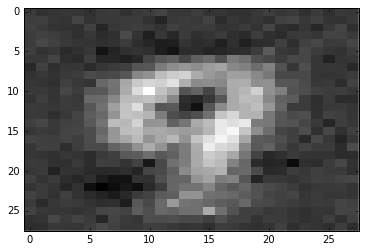

step 1100, training accuracy 0.62
step 1200, training accuracy 0.9
step 1300, training accuracy 0.74
step 1400, training accuracy 0.76
step 1500, training accuracy 0.82
step 1600, training accuracy 0.9
step 1700, training accuracy 0.84
step 1800, training accuracy 0.86
step 1900, training accuracy 0.72
step 2000, training accuracy 0.64
Reconstruction of a 6


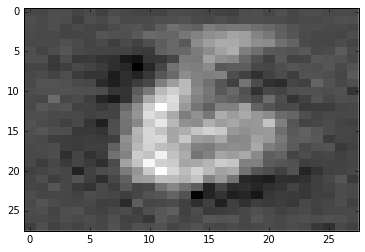

step 2100, training accuracy 0.86
step 2200, training accuracy 0.84
step 2300, training accuracy 0.82
step 2400, training accuracy 0.8
step 2500, training accuracy 0.76
step 2600, training accuracy 0.86
step 2700, training accuracy 0.88
step 2800, training accuracy 0.8
step 2900, training accuracy 0.84
step 3000, training accuracy 0.88
Reconstruction of a 7


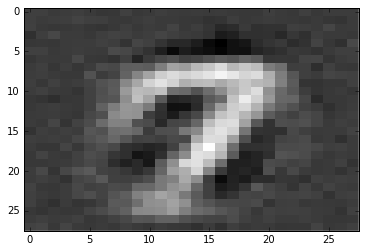

step 3100, training accuracy 0.84
step 3200, training accuracy 0.9
step 3300, training accuracy 0.88
step 3400, training accuracy 0.86
step 3500, training accuracy 0.84
step 3600, training accuracy 0.88
step 3700, training accuracy 0.78
step 3800, training accuracy 0.82
step 3900, training accuracy 0.88
step 4000, training accuracy 0.92
Reconstruction of a 1


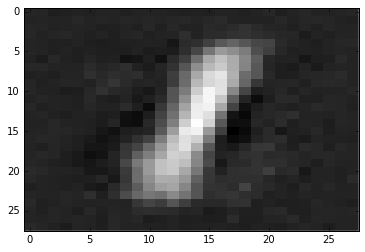

step 4100, training accuracy 0.76
step 4200, training accuracy 0.92
step 4300, training accuracy 0.8
step 4400, training accuracy 0.78
step 4500, training accuracy 0.8
step 4600, training accuracy 0.88
step 4700, training accuracy 0.92
step 4800, training accuracy 0.78
step 4900, training accuracy 0.86
step 5000, training accuracy 0.82
Reconstruction of a 7


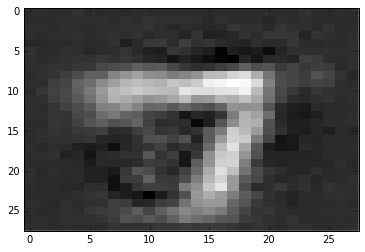

step 5100, training accuracy 0.86
step 5200, training accuracy 0.88
step 5300, training accuracy 0.88
step 5400, training accuracy 0.92
step 5500, training accuracy 0.84
step 5600, training accuracy 0.88
step 5700, training accuracy 0.76
step 5800, training accuracy 0.82
step 5900, training accuracy 0.9
step 6000, training accuracy 0.94
Reconstruction of a 9


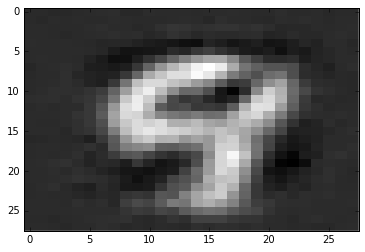

step 6100, training accuracy 0.88
step 6200, training accuracy 0.86
step 6300, training accuracy 0.82
step 6400, training accuracy 0.86
step 6500, training accuracy 0.96
step 6600, training accuracy 0.94
step 6700, training accuracy 0.96
step 6800, training accuracy 0.9
step 6900, training accuracy 0.9
step 7000, training accuracy 0.88
Reconstruction of a 7


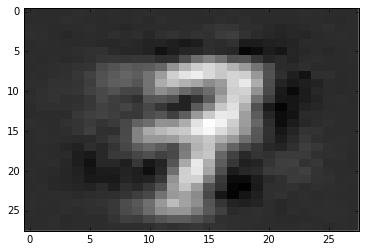

step 7100, training accuracy 0.9
step 7200, training accuracy 0.94
step 7300, training accuracy 0.8
step 7400, training accuracy 0.9
step 7500, training accuracy 0.92
step 7600, training accuracy 0.84
step 7700, training accuracy 0.9
step 7800, training accuracy 0.84
step 7900, training accuracy 0.94
step 8000, training accuracy 0.86
Reconstruction of a 1


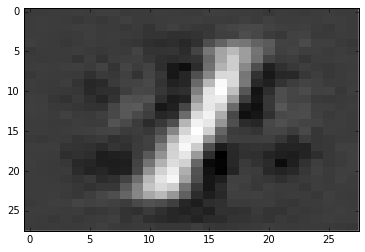

step 8100, training accuracy 0.86
step 8200, training accuracy 0.86
step 8300, training accuracy 0.92
step 8400, training accuracy 0.9
step 8500, training accuracy 0.92
step 8600, training accuracy 0.92
step 8700, training accuracy 0.96
step 8800, training accuracy 0.98
step 8900, training accuracy 0.84
step 9000, training accuracy 0.86
Reconstruction of a 7


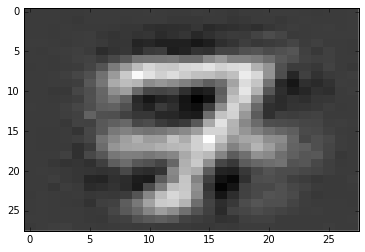

step 9100, training accuracy 0.82
step 9200, training accuracy 0.9
step 9300, training accuracy 0.96
step 9400, training accuracy 0.94
step 9500, training accuracy 0.9
step 9600, training accuracy 0.88
step 9700, training accuracy 0.82
step 9800, training accuracy 0.92
step 9900, training accuracy 0.94
epoch 1, learning rate 4.64159e-05
step 0, training accuracy 0.92
Reconstruction of a 9


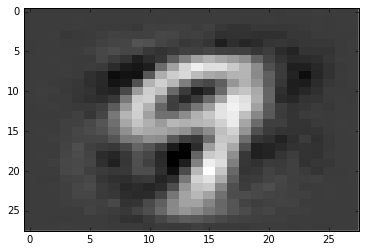

step 100, training accuracy 0.88
step 200, training accuracy 0.92
step 300, training accuracy 1
step 400, training accuracy 0.94
step 500, training accuracy 0.86
step 600, training accuracy 0.84
step 700, training accuracy 0.92
step 800, training accuracy 0.82
step 900, training accuracy 0.86
step 1000, training accuracy 0.94
Reconstruction of a 3


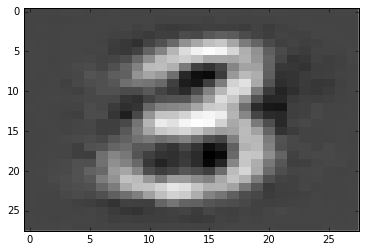

step 1100, training accuracy 0.86
step 1200, training accuracy 0.9
step 1300, training accuracy 0.9
step 1400, training accuracy 0.9
step 1500, training accuracy 0.94
step 1600, training accuracy 0.96
step 1700, training accuracy 0.82
step 1800, training accuracy 0.84
step 1900, training accuracy 0.9
step 2000, training accuracy 0.92
Reconstruction of a 5


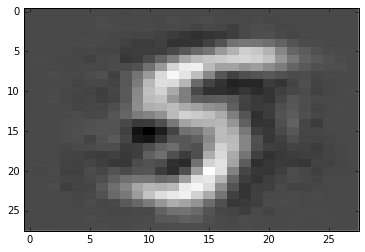

step 2100, training accuracy 0.9
step 2200, training accuracy 0.9
step 2300, training accuracy 0.94
step 2400, training accuracy 0.94
step 2500, training accuracy 0.94
step 2600, training accuracy 0.84
step 2700, training accuracy 0.84
step 2800, training accuracy 0.92
step 2900, training accuracy 0.88
step 3000, training accuracy 0.96
Reconstruction of a 7


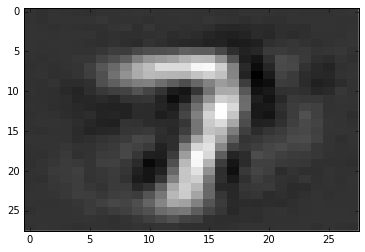

step 3100, training accuracy 0.86
step 3200, training accuracy 0.94
step 3300, training accuracy 0.92
step 3400, training accuracy 0.9
step 3500, training accuracy 0.9
step 3600, training accuracy 0.9
step 3700, training accuracy 0.88
step 3800, training accuracy 0.94
step 3900, training accuracy 0.94
step 4000, training accuracy 0.92
Reconstruction of a 9


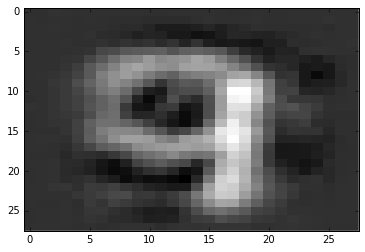

step 4100, training accuracy 0.94
step 4200, training accuracy 0.9
step 4300, training accuracy 0.98
step 4400, training accuracy 0.86
step 4500, training accuracy 0.8
step 4600, training accuracy 0.9
step 4700, training accuracy 0.88
step 4800, training accuracy 0.92
step 4900, training accuracy 0.9
step 5000, training accuracy 0.92
Reconstruction of a 8


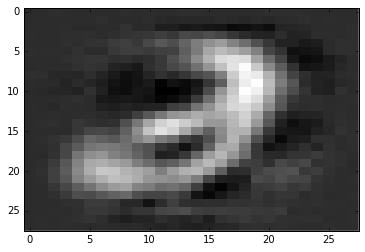

step 5100, training accuracy 0.88
step 5200, training accuracy 0.86
step 5300, training accuracy 0.86
step 5400, training accuracy 0.86
step 5500, training accuracy 0.86
step 5600, training accuracy 0.92
step 5700, training accuracy 0.88
step 5800, training accuracy 0.94
step 5900, training accuracy 0.88
step 6000, training accuracy 0.9
Reconstruction of a 6


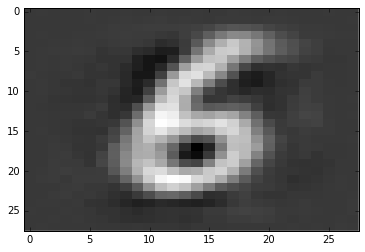

step 6100, training accuracy 0.94
step 6200, training accuracy 0.92
step 6300, training accuracy 0.88
step 6400, training accuracy 0.92
step 6500, training accuracy 0.94
step 6600, training accuracy 0.92
step 6700, training accuracy 0.92
step 6800, training accuracy 0.92
step 6900, training accuracy 0.94
step 7000, training accuracy 0.92
Reconstruction of a 2


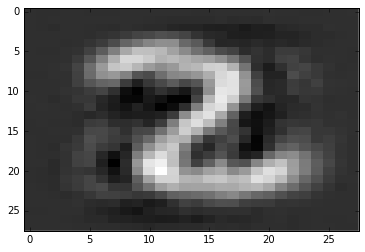

step 7100, training accuracy 0.88
step 7200, training accuracy 0.92
step 7300, training accuracy 0.94
step 7400, training accuracy 0.82
step 7500, training accuracy 0.88
step 7600, training accuracy 0.88
step 7700, training accuracy 0.9
step 7800, training accuracy 0.92
step 7900, training accuracy 0.96
step 8000, training accuracy 0.9
Reconstruction of a 8


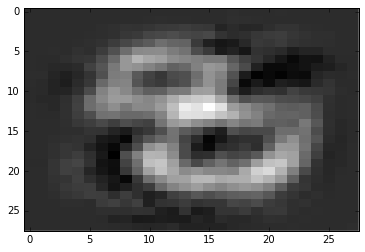

step 8100, training accuracy 0.94
step 8200, training accuracy 0.86
step 8300, training accuracy 0.94
step 8400, training accuracy 0.9
step 8500, training accuracy 0.9
step 8600, training accuracy 0.9
step 8700, training accuracy 0.98
step 8800, training accuracy 0.88
step 8900, training accuracy 0.92
step 9000, training accuracy 0.9
Reconstruction of a 5


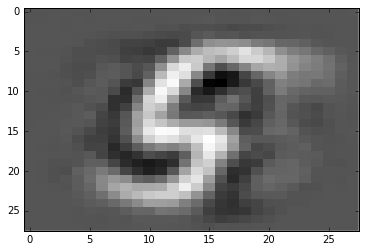

step 9100, training accuracy 0.9
step 9200, training accuracy 0.9
step 9300, training accuracy 0.92
step 9400, training accuracy 0.92
step 9500, training accuracy 0.88
step 9600, training accuracy 0.92
step 9700, training accuracy 0.92
step 9800, training accuracy 0.96
step 9900, training accuracy 0.9
epoch 2, learning rate 2.15443e-05
step 0, training accuracy 0.96
Reconstruction of a 3


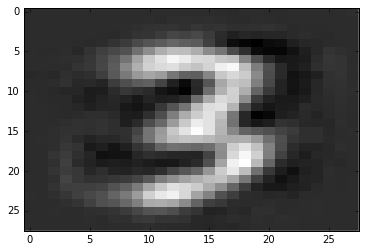

step 100, training accuracy 0.9
step 200, training accuracy 0.84
step 300, training accuracy 0.82
step 400, training accuracy 0.88
step 500, training accuracy 0.84
step 600, training accuracy 0.92
step 700, training accuracy 0.92
step 800, training accuracy 0.9
step 900, training accuracy 0.96
step 1000, training accuracy 0.8
Reconstruction of a 6


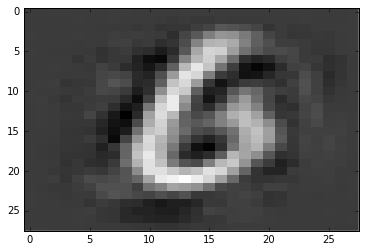

step 1100, training accuracy 0.96
step 1200, training accuracy 0.86
step 1300, training accuracy 0.96
step 1400, training accuracy 0.82
step 1500, training accuracy 0.84
step 1600, training accuracy 0.84
step 1700, training accuracy 0.94
step 1800, training accuracy 0.88
step 1900, training accuracy 0.92
step 2000, training accuracy 0.86
Reconstruction of a 1


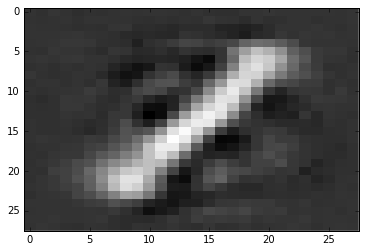

step 2100, training accuracy 0.82
step 2200, training accuracy 0.96
step 2300, training accuracy 0.92
step 2400, training accuracy 0.88
step 2500, training accuracy 0.92
step 2600, training accuracy 0.94
step 2700, training accuracy 0.96
step 2800, training accuracy 0.94
step 2900, training accuracy 0.94
step 3000, training accuracy 0.86
Reconstruction of a 3


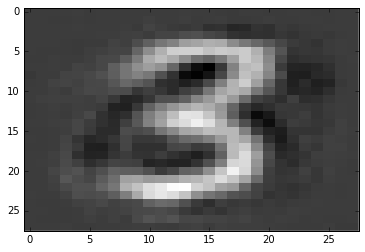

step 3100, training accuracy 0.88
step 3200, training accuracy 0.96
step 3300, training accuracy 0.9
step 3400, training accuracy 0.94
step 3500, training accuracy 0.9
step 3600, training accuracy 0.94
step 3700, training accuracy 0.88
step 3800, training accuracy 0.82
step 3900, training accuracy 0.92
step 4000, training accuracy 0.92
Reconstruction of a 5


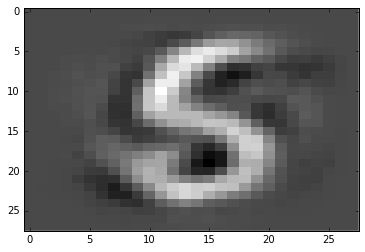

step 4100, training accuracy 0.96
step 4200, training accuracy 0.92
step 4300, training accuracy 0.9
step 4400, training accuracy 0.92
step 4500, training accuracy 0.98
step 4600, training accuracy 0.98
step 4700, training accuracy 0.9
step 4800, training accuracy 0.84
step 4900, training accuracy 0.9
step 5000, training accuracy 0.84
Reconstruction of a 1


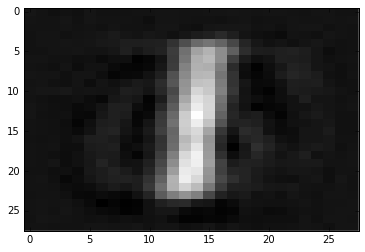

step 5100, training accuracy 0.98
step 5200, training accuracy 0.9
step 5300, training accuracy 0.94
step 5400, training accuracy 0.92
step 5500, training accuracy 0.9
step 5600, training accuracy 0.84
step 5700, training accuracy 0.96
step 5800, training accuracy 0.88
step 5900, training accuracy 0.98
step 6000, training accuracy 0.92
Reconstruction of a 7


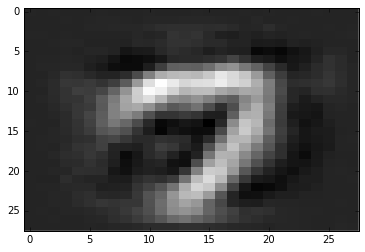

step 6100, training accuracy 0.88
step 6200, training accuracy 0.96
step 6300, training accuracy 0.96
step 6400, training accuracy 0.84
step 6500, training accuracy 0.96
step 6600, training accuracy 0.88
step 6700, training accuracy 0.94
step 6800, training accuracy 0.96
step 6900, training accuracy 0.92
step 7000, training accuracy 0.92
Reconstruction of a 8


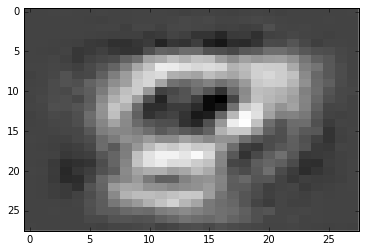

step 7100, training accuracy 0.98
step 7200, training accuracy 0.92
step 7300, training accuracy 0.88
step 7400, training accuracy 0.92
step 7500, training accuracy 0.98
step 7600, training accuracy 0.92
step 7700, training accuracy 0.9
step 7800, training accuracy 0.94
step 7900, training accuracy 0.84
step 8000, training accuracy 0.92
Reconstruction of a 6


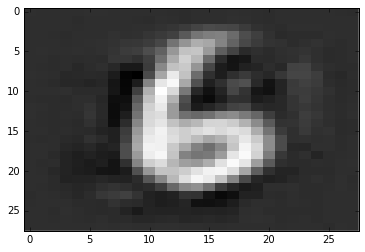

step 8100, training accuracy 0.94
step 8200, training accuracy 0.88
step 8300, training accuracy 0.84
step 8400, training accuracy 0.94
step 8500, training accuracy 0.94
step 8600, training accuracy 0.94
step 8700, training accuracy 0.9
step 8800, training accuracy 0.82
step 8900, training accuracy 0.88
step 9000, training accuracy 0.86
Reconstruction of a 6


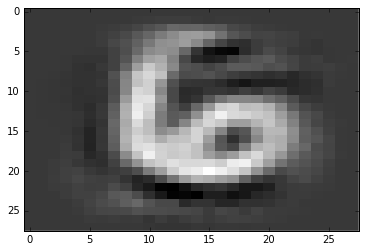

step 9100, training accuracy 0.9
step 9200, training accuracy 0.9
step 9300, training accuracy 0.92
step 9400, training accuracy 0.9
step 9500, training accuracy 0.96
step 9600, training accuracy 0.92
step 9700, training accuracy 0.86
step 9800, training accuracy 0.9
step 9900, training accuracy 0.9
epoch 3, learning rate 1e-05
step 0, training accuracy 0.94
Reconstruction of a 4


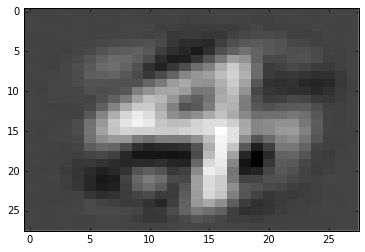

step 100, training accuracy 0.98
step 200, training accuracy 0.92
step 300, training accuracy 0.92
step 400, training accuracy 0.96
step 500, training accuracy 0.86
step 600, training accuracy 0.9
step 700, training accuracy 0.94
step 800, training accuracy 0.9
step 900, training accuracy 0.92
step 1000, training accuracy 0.94
Reconstruction of a 8


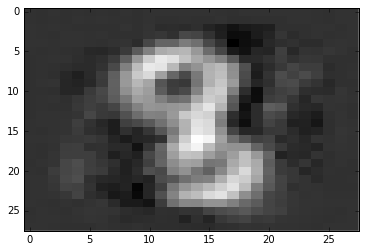

step 1100, training accuracy 0.9
step 1200, training accuracy 0.94
step 1300, training accuracy 0.86
step 1400, training accuracy 0.94
step 1500, training accuracy 0.9
step 1600, training accuracy 0.96
step 1700, training accuracy 0.92
step 1800, training accuracy 0.92
step 1900, training accuracy 0.92
step 2000, training accuracy 0.94
Reconstruction of a 7


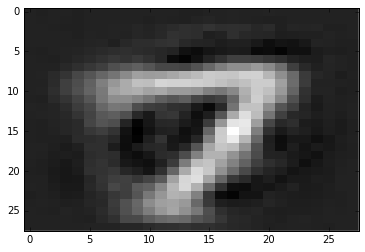

step 2100, training accuracy 0.94
step 2200, training accuracy 0.92
step 2300, training accuracy 0.84
step 2400, training accuracy 0.94
step 2500, training accuracy 0.88
step 2600, training accuracy 0.86
step 2700, training accuracy 0.88
step 2800, training accuracy 0.9
step 2900, training accuracy 0.84
step 3000, training accuracy 0.92
Reconstruction of a 8


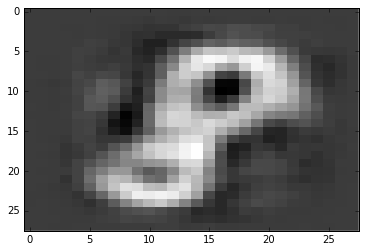

step 3100, training accuracy 0.9
step 3200, training accuracy 0.96
step 3300, training accuracy 0.88
step 3400, training accuracy 0.98
step 3500, training accuracy 0.94
step 3600, training accuracy 0.86
step 3700, training accuracy 0.92
step 3800, training accuracy 0.9
step 3900, training accuracy 0.94
step 4000, training accuracy 0.9
Reconstruction of a 1


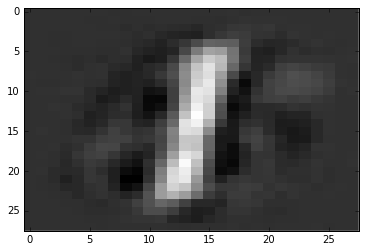

step 4100, training accuracy 0.9
step 4200, training accuracy 0.86
step 4300, training accuracy 0.92
step 4400, training accuracy 0.96
step 4500, training accuracy 0.92
step 4600, training accuracy 0.94
step 4700, training accuracy 0.9
step 4800, training accuracy 0.86
step 4900, training accuracy 0.94
step 5000, training accuracy 0.96
Reconstruction of a 9


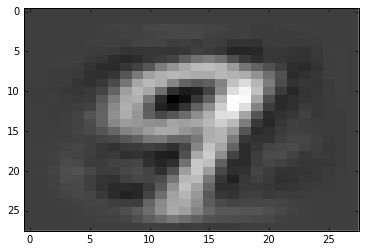

step 5100, training accuracy 0.92
step 5200, training accuracy 0.96
step 5300, training accuracy 0.8
step 5400, training accuracy 0.98
step 5500, training accuracy 0.94
step 5600, training accuracy 0.84
step 5700, training accuracy 0.88
step 5800, training accuracy 0.96
step 5900, training accuracy 0.94
step 6000, training accuracy 0.92
Reconstruction of a 9


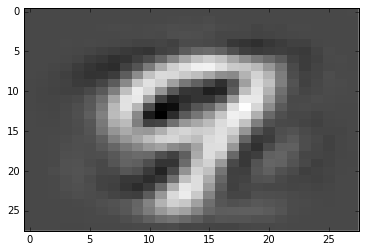

step 6100, training accuracy 0.9
step 6200, training accuracy 0.9
step 6300, training accuracy 0.82
step 6400, training accuracy 1
step 6500, training accuracy 0.9
step 6600, training accuracy 0.9
step 6700, training accuracy 0.92
step 6800, training accuracy 0.9
step 6900, training accuracy 0.94
step 7000, training accuracy 0.88
Reconstruction of a 7


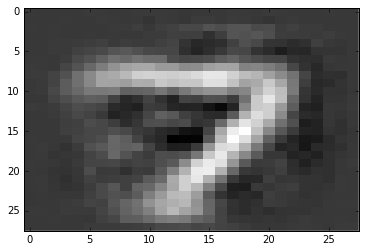

step 7100, training accuracy 0.92
step 7200, training accuracy 0.94
step 7300, training accuracy 0.92
step 7400, training accuracy 0.94
step 7500, training accuracy 0.88
step 7600, training accuracy 0.9
step 7700, training accuracy 0.84
step 7800, training accuracy 0.82
step 7900, training accuracy 0.92
step 8000, training accuracy 0.9
Reconstruction of a 3


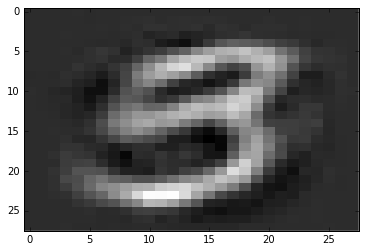

step 8100, training accuracy 0.86
step 8200, training accuracy 0.88
step 8300, training accuracy 0.96
step 8400, training accuracy 0.88
step 8500, training accuracy 0.88
step 8600, training accuracy 0.84
step 8700, training accuracy 0.86
step 8800, training accuracy 0.86
step 8900, training accuracy 0.84
step 9000, training accuracy 0.9
Reconstruction of a 8


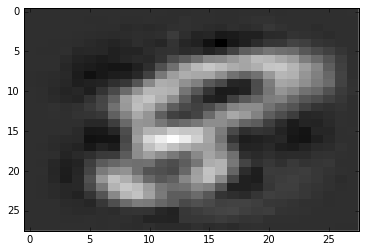

step 9100, training accuracy 0.98
step 9200, training accuracy 0.96
step 9300, training accuracy 0.92
step 9400, training accuracy 0.94
step 9500, training accuracy 0.92
step 9600, training accuracy 0.96
step 9700, training accuracy 0.96
step 9800, training accuracy 0.96
step 9900, training accuracy 0.82
epoch 4, learning rate 4.64159e-06
step 0, training accuracy 1
Reconstruction of a 4


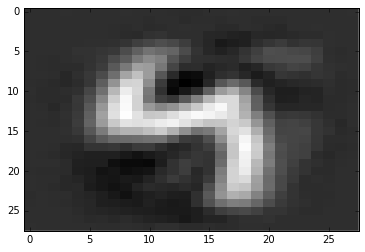

step 100, training accuracy 0.92
step 200, training accuracy 0.96
step 300, training accuracy 0.94
step 400, training accuracy 0.88
step 500, training accuracy 0.86
step 600, training accuracy 0.82
step 700, training accuracy 0.94
step 800, training accuracy 0.88
step 900, training accuracy 0.9
step 1000, training accuracy 0.94
Reconstruction of a 8


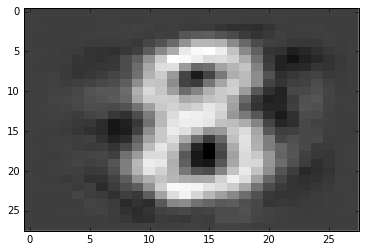

step 1100, training accuracy 0.92
step 1200, training accuracy 0.94
step 1300, training accuracy 0.9
step 1400, training accuracy 0.86
step 1500, training accuracy 0.88
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 0.88
step 1900, training accuracy 0.88
step 2000, training accuracy 1
Reconstruction of a 6


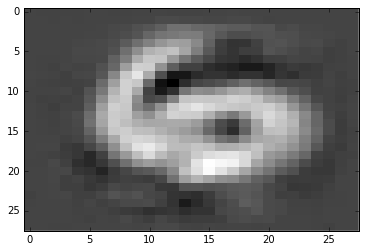

step 2100, training accuracy 0.92
step 2200, training accuracy 0.9
step 2300, training accuracy 0.92
step 2400, training accuracy 0.94
step 2500, training accuracy 0.92
step 2600, training accuracy 0.96
step 2700, training accuracy 0.86
step 2800, training accuracy 0.94
step 2900, training accuracy 0.86
step 3000, training accuracy 0.92
Reconstruction of a 9


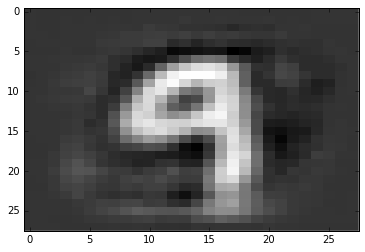

step 3100, training accuracy 0.9
step 3200, training accuracy 0.94
step 3300, training accuracy 0.88
step 3400, training accuracy 0.9
step 3500, training accuracy 0.84
step 3600, training accuracy 0.92
step 3700, training accuracy 0.84
step 3800, training accuracy 0.92
step 3900, training accuracy 0.96
step 4000, training accuracy 0.96
Reconstruction of a 3


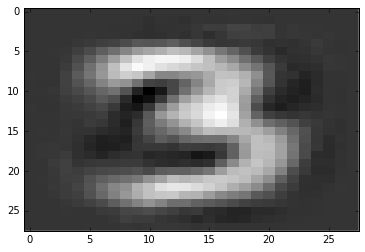

step 4100, training accuracy 0.96
step 4200, training accuracy 0.88
step 4300, training accuracy 0.92
step 4400, training accuracy 0.9
step 4500, training accuracy 0.92
step 4600, training accuracy 0.98
step 4700, training accuracy 0.94
step 4800, training accuracy 0.9
step 4900, training accuracy 0.88
step 5000, training accuracy 0.88
Reconstruction of a 4


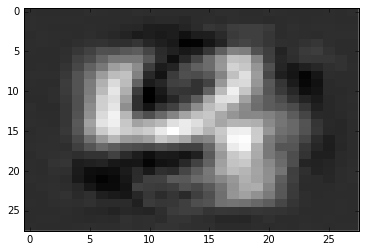

step 5100, training accuracy 1
step 5200, training accuracy 0.84
step 5300, training accuracy 0.88
step 5400, training accuracy 1
step 5500, training accuracy 0.86
step 5600, training accuracy 0.8
step 5700, training accuracy 0.92
step 5800, training accuracy 0.94
step 5900, training accuracy 0.84
step 6000, training accuracy 0.88
Reconstruction of a 1


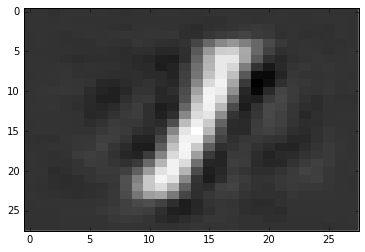

step 6100, training accuracy 0.9
step 6200, training accuracy 0.86
step 6300, training accuracy 0.9
step 6400, training accuracy 0.98
step 6500, training accuracy 0.92
step 6600, training accuracy 0.94
step 6700, training accuracy 0.92
step 6800, training accuracy 0.92
step 6900, training accuracy 0.88
step 7000, training accuracy 0.96
Reconstruction of a 1


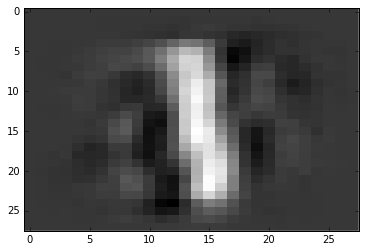

step 7100, training accuracy 0.92
step 7200, training accuracy 0.84
step 7300, training accuracy 0.94
step 7400, training accuracy 0.92
step 7500, training accuracy 0.9
step 7600, training accuracy 0.92
step 7700, training accuracy 0.9
step 7800, training accuracy 0.98
step 7900, training accuracy 0.92
step 8000, training accuracy 0.98
Reconstruction of a 1


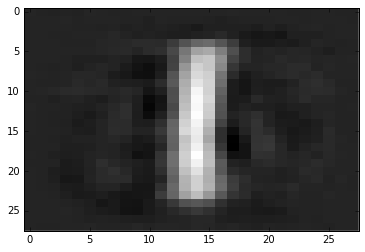

step 8100, training accuracy 0.8
step 8200, training accuracy 0.78
step 8300, training accuracy 0.9
step 8400, training accuracy 0.9
step 8500, training accuracy 0.94
step 8600, training accuracy 0.98
step 8700, training accuracy 0.9
step 8800, training accuracy 0.86
step 8900, training accuracy 0.92
step 9000, training accuracy 0.86
Reconstruction of a 6


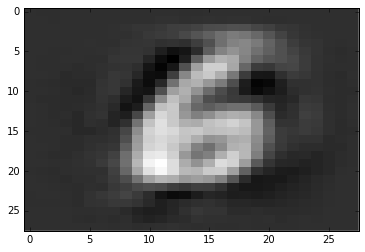

step 9100, training accuracy 1
step 9200, training accuracy 0.8
step 9300, training accuracy 0.9
step 9400, training accuracy 0.94
step 9500, training accuracy 0.86
step 9600, training accuracy 0.94
step 9700, training accuracy 0.92
step 9800, training accuracy 0.92
step 9900, training accuracy 0.92
epoch 5, learning rate 2.15443e-06
step 0, training accuracy 0.88
Reconstruction of a 4


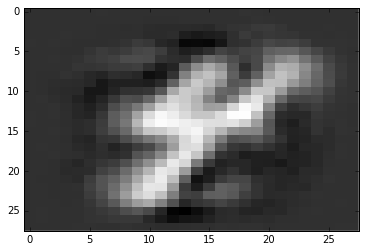

step 100, training accuracy 0.88
step 200, training accuracy 0.96
step 300, training accuracy 0.92
step 400, training accuracy 0.9
step 500, training accuracy 1
step 600, training accuracy 0.92
step 700, training accuracy 0.94
step 800, training accuracy 0.9
step 900, training accuracy 0.98
step 1000, training accuracy 0.94
Reconstruction of a 6


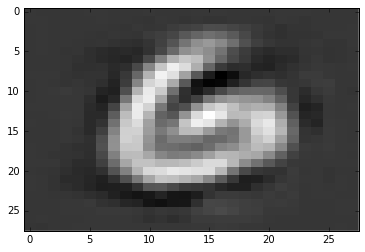

step 1100, training accuracy 0.96
step 1200, training accuracy 0.9
step 1300, training accuracy 0.9
step 1400, training accuracy 0.98
step 1500, training accuracy 0.94
step 1600, training accuracy 0.94
step 1700, training accuracy 0.9
step 1800, training accuracy 0.88
step 1900, training accuracy 0.86
step 2000, training accuracy 0.84
Reconstruction of a 9


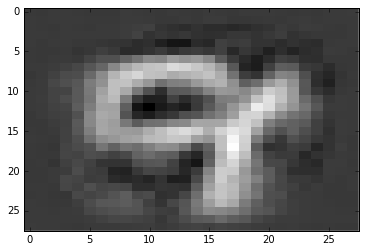

step 2100, training accuracy 0.88
step 2200, training accuracy 0.94
step 2300, training accuracy 0.88
step 2400, training accuracy 0.9
step 2500, training accuracy 0.82
step 2600, training accuracy 0.88
step 2700, training accuracy 0.94
step 2800, training accuracy 0.92
step 2900, training accuracy 0.9
step 3000, training accuracy 0.94
Reconstruction of a 8


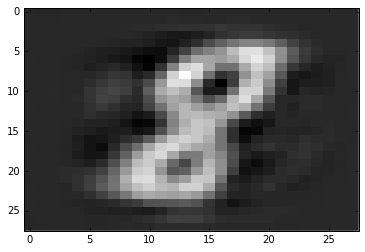

step 3100, training accuracy 0.96
step 3200, training accuracy 0.94
step 3300, training accuracy 0.92
step 3400, training accuracy 0.92
step 3500, training accuracy 0.92
step 3600, training accuracy 0.92
step 3700, training accuracy 0.88
step 3800, training accuracy 0.96
step 3900, training accuracy 0.9
step 4000, training accuracy 0.94
Reconstruction of a 7


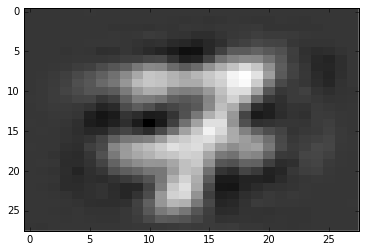

step 4100, training accuracy 0.9
step 4200, training accuracy 0.96
step 4300, training accuracy 0.92
step 4400, training accuracy 0.92
step 4500, training accuracy 0.88
step 4600, training accuracy 0.9
step 4700, training accuracy 0.96
step 4800, training accuracy 0.92
step 4900, training accuracy 0.94
step 5000, training accuracy 0.9
Reconstruction of a 0


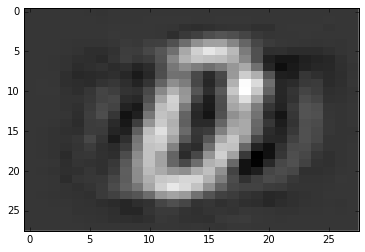

step 5100, training accuracy 0.8
step 5200, training accuracy 0.96
step 5300, training accuracy 0.92
step 5400, training accuracy 0.88
step 5500, training accuracy 0.8
step 5600, training accuracy 0.92
step 5700, training accuracy 0.94
step 5800, training accuracy 0.98
step 5900, training accuracy 0.9
step 6000, training accuracy 0.94
Reconstruction of a 5


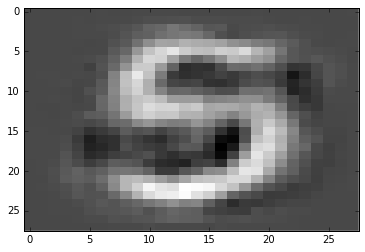

step 6100, training accuracy 0.96
step 6200, training accuracy 0.92
step 6300, training accuracy 0.9
step 6400, training accuracy 0.92
step 6500, training accuracy 0.88
step 6600, training accuracy 0.88
step 6700, training accuracy 0.94
step 6800, training accuracy 0.88
step 6900, training accuracy 0.9
step 7000, training accuracy 0.94
Reconstruction of a 0


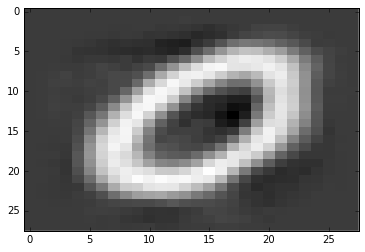

step 7100, training accuracy 0.78
step 7200, training accuracy 0.9
step 7300, training accuracy 0.9
step 7400, training accuracy 0.94
step 7500, training accuracy 0.9
step 7600, training accuracy 0.9
step 7700, training accuracy 0.84
step 7800, training accuracy 0.94
step 7900, training accuracy 0.92
step 8000, training accuracy 0.96
Reconstruction of a 1


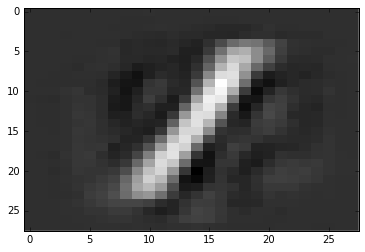

step 8100, training accuracy 0.92
step 8200, training accuracy 0.86
step 8300, training accuracy 0.88
step 8400, training accuracy 0.88
step 8500, training accuracy 0.98
step 8600, training accuracy 0.9
step 8700, training accuracy 0.94
step 8800, training accuracy 0.88
step 8900, training accuracy 0.92
step 9000, training accuracy 0.94
Reconstruction of a 0


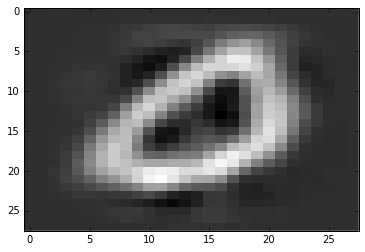

step 9100, training accuracy 0.94
step 9200, training accuracy 0.96
step 9300, training accuracy 0.84
step 9400, training accuracy 0.82
step 9500, training accuracy 0.96
step 9600, training accuracy 0.92
step 9700, training accuracy 0.88
step 9800, training accuracy 0.82
step 9900, training accuracy 0.92
epoch 6, learning rate 1e-06
step 0, training accuracy 0.88
Reconstruction of a 5


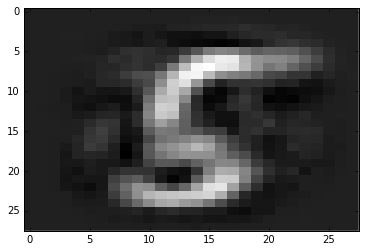

step 100, training accuracy 0.92
step 200, training accuracy 0.94
step 300, training accuracy 0.88
step 400, training accuracy 0.96
step 500, training accuracy 0.9
step 600, training accuracy 0.94
step 700, training accuracy 0.9
step 800, training accuracy 0.94
step 900, training accuracy 0.86
step 1000, training accuracy 0.96
Reconstruction of a 0


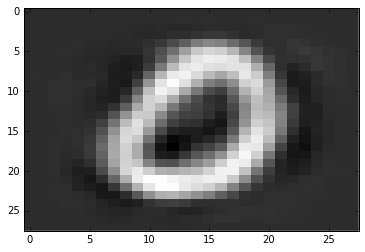

step 1100, training accuracy 0.88
step 1200, training accuracy 0.9
step 1300, training accuracy 0.92
step 1400, training accuracy 0.94
step 1500, training accuracy 0.88
step 1600, training accuracy 0.9
step 1700, training accuracy 0.94
step 1800, training accuracy 0.9
step 1900, training accuracy 0.94
step 2000, training accuracy 0.92
Reconstruction of a 5


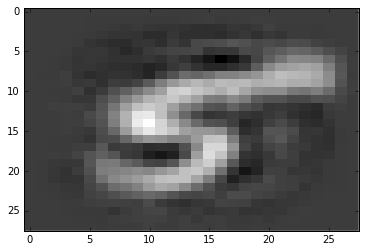

step 2100, training accuracy 0.92
step 2200, training accuracy 0.96
step 2300, training accuracy 0.82
step 2400, training accuracy 0.94
step 2500, training accuracy 0.98
step 2600, training accuracy 0.84
step 2700, training accuracy 0.92
step 2800, training accuracy 0.92
step 2900, training accuracy 0.9
step 3000, training accuracy 0.94
Reconstruction of a 3


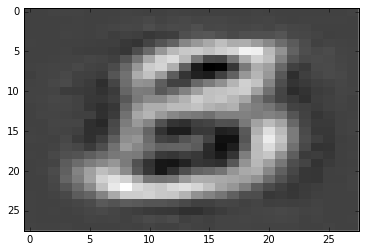

step 3100, training accuracy 0.86
step 3200, training accuracy 1
step 3300, training accuracy 0.9
step 3400, training accuracy 0.94
step 3500, training accuracy 0.98
step 3600, training accuracy 0.94
step 3700, training accuracy 0.94
step 3800, training accuracy 0.88
step 3900, training accuracy 0.88
step 4000, training accuracy 0.86
Reconstruction of a 6


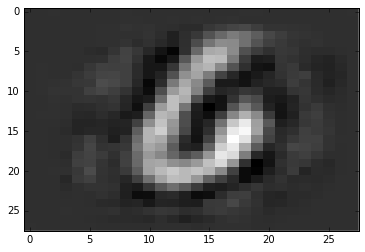

step 4100, training accuracy 0.94
step 4200, training accuracy 0.96
step 4300, training accuracy 0.9
step 4400, training accuracy 0.94
step 4500, training accuracy 0.94
step 4600, training accuracy 0.92
step 4700, training accuracy 0.92
step 4800, training accuracy 0.86
step 4900, training accuracy 0.92
step 5000, training accuracy 0.9
Reconstruction of a 8


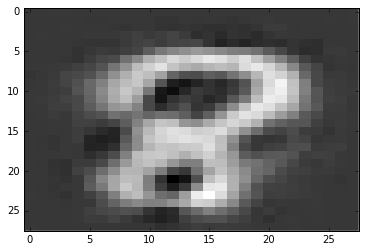

step 5100, training accuracy 0.82
step 5200, training accuracy 0.94
step 5300, training accuracy 0.92
step 5400, training accuracy 0.88
step 5500, training accuracy 0.94
step 5600, training accuracy 0.88
step 5700, training accuracy 0.98
step 5800, training accuracy 0.92
step 5900, training accuracy 0.9
step 6000, training accuracy 0.92
Reconstruction of a 0


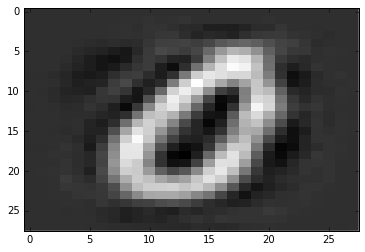

step 6100, training accuracy 0.88
step 6200, training accuracy 0.94
step 6300, training accuracy 0.92
step 6400, training accuracy 0.94
step 6500, training accuracy 0.9
step 6600, training accuracy 0.92
step 6700, training accuracy 0.92
step 6800, training accuracy 0.88
step 6900, training accuracy 0.92
step 7000, training accuracy 0.82
Reconstruction of a 3


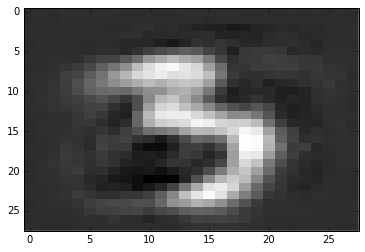

step 7100, training accuracy 0.96
step 7200, training accuracy 0.88
step 7300, training accuracy 0.86
step 7400, training accuracy 0.98
step 7500, training accuracy 0.96
step 7600, training accuracy 0.82
step 7700, training accuracy 0.9
step 7800, training accuracy 0.9
step 7900, training accuracy 0.92
step 8000, training accuracy 0.92
Reconstruction of a 5


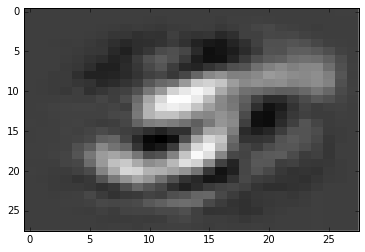

step 8100, training accuracy 0.96
step 8200, training accuracy 0.9
step 8300, training accuracy 0.88
step 8400, training accuracy 0.98
step 8500, training accuracy 0.96
step 8600, training accuracy 0.84
step 8700, training accuracy 0.9
step 8800, training accuracy 0.9
step 8900, training accuracy 0.86
step 9000, training accuracy 0.84
Reconstruction of a 8


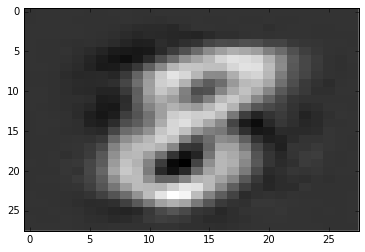

step 9100, training accuracy 0.92
step 9200, training accuracy 0.86
step 9300, training accuracy 0.92
step 9400, training accuracy 0.84
step 9500, training accuracy 0.9
step 9600, training accuracy 0.92
step 9700, training accuracy 0.82
step 9800, training accuracy 0.88
step 9900, training accuracy 0.88
epoch 7, learning rate 4.64159e-07
step 0, training accuracy 0.84
Reconstruction of a 2


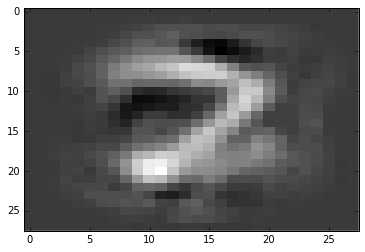

step 100, training accuracy 0.86
step 200, training accuracy 0.98
step 300, training accuracy 0.98
step 400, training accuracy 0.92
step 500, training accuracy 0.92
step 600, training accuracy 0.9
step 700, training accuracy 0.94
step 800, training accuracy 0.84
step 900, training accuracy 0.96
step 1000, training accuracy 0.96
Reconstruction of a 6


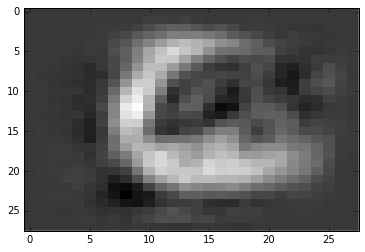

step 1100, training accuracy 0.92
step 1200, training accuracy 0.94
step 1300, training accuracy 0.84
step 1400, training accuracy 0.92
step 1500, training accuracy 0.86
step 1600, training accuracy 0.94
step 1700, training accuracy 0.9
step 1800, training accuracy 0.92
step 1900, training accuracy 0.92
step 2000, training accuracy 0.88
Reconstruction of a 6


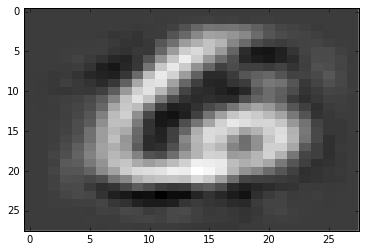

step 2100, training accuracy 0.92
step 2200, training accuracy 0.96
step 2300, training accuracy 0.92
step 2400, training accuracy 0.84
step 2500, training accuracy 0.82
step 2600, training accuracy 0.92
step 2700, training accuracy 0.88
step 2800, training accuracy 0.86
step 2900, training accuracy 0.94
step 3000, training accuracy 0.9
Reconstruction of a 9


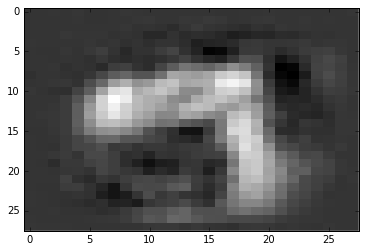

step 3100, training accuracy 0.92
step 3200, training accuracy 0.9
step 3300, training accuracy 0.92
step 3400, training accuracy 0.96
step 3500, training accuracy 0.82
step 3600, training accuracy 0.98
step 3700, training accuracy 0.92
step 3800, training accuracy 0.92
step 3900, training accuracy 0.94
step 4000, training accuracy 0.96
Reconstruction of a 3


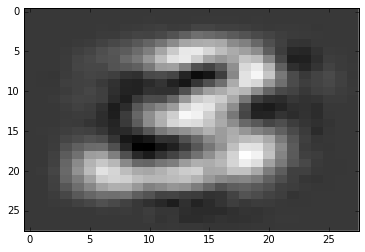

step 4100, training accuracy 0.86
step 4200, training accuracy 0.88
step 4300, training accuracy 0.94
step 4400, training accuracy 0.96
step 4500, training accuracy 0.92
step 4600, training accuracy 0.96
step 4700, training accuracy 0.94
step 4800, training accuracy 0.92
step 4900, training accuracy 0.9
step 5000, training accuracy 0.94
Reconstruction of a 3


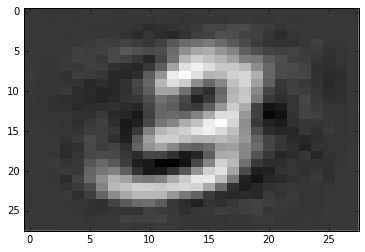

step 5100, training accuracy 0.96
step 5200, training accuracy 0.9
step 5300, training accuracy 0.94
step 5400, training accuracy 0.98
step 5500, training accuracy 0.9
step 5600, training accuracy 0.92
step 5700, training accuracy 0.96
step 5800, training accuracy 0.94
step 5900, training accuracy 0.92
step 6000, training accuracy 0.96
Reconstruction of a 7


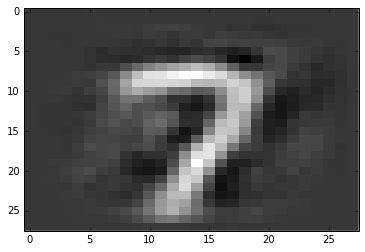

step 6100, training accuracy 0.96
step 6200, training accuracy 0.86
step 6300, training accuracy 0.9
step 6400, training accuracy 0.92
step 6500, training accuracy 0.92
step 6600, training accuracy 0.9
step 6700, training accuracy 0.88
step 6800, training accuracy 0.86
step 6900, training accuracy 0.88
step 7000, training accuracy 0.88
Reconstruction of a 7


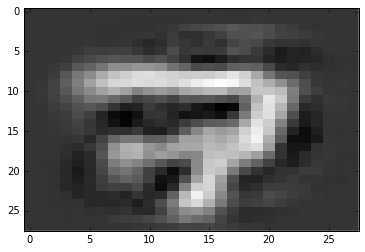

step 7100, training accuracy 0.98
step 7200, training accuracy 0.9
step 7300, training accuracy 0.88
step 7400, training accuracy 0.9
step 7500, training accuracy 0.88
step 7600, training accuracy 0.98
step 7700, training accuracy 0.92
step 7800, training accuracy 0.96
step 7900, training accuracy 0.98
step 8000, training accuracy 0.96
Reconstruction of a 1


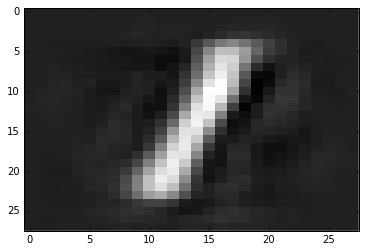

step 8100, training accuracy 0.9
step 8200, training accuracy 0.94
step 8300, training accuracy 0.92
step 8400, training accuracy 0.92
step 8500, training accuracy 0.94
step 8600, training accuracy 0.94
step 8700, training accuracy 0.94
step 8800, training accuracy 0.9
step 8900, training accuracy 0.9
step 9000, training accuracy 0.9
Reconstruction of a 1


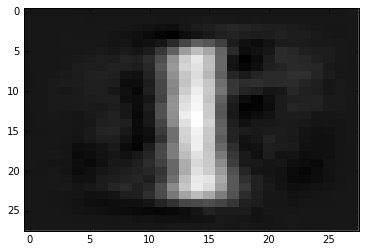

step 9100, training accuracy 0.9
step 9200, training accuracy 0.94
step 9300, training accuracy 0.92
step 9400, training accuracy 0.88
step 9500, training accuracy 0.84
step 9600, training accuracy 0.98
step 9700, training accuracy 0.92
step 9800, training accuracy 0.76
step 9900, training accuracy 0.96
epoch 8, learning rate 2.15443e-07
step 0, training accuracy 0.86
Reconstruction of a 6


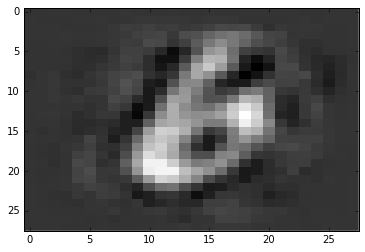

step 100, training accuracy 0.96
step 200, training accuracy 0.94
step 300, training accuracy 0.92
step 400, training accuracy 0.86
step 500, training accuracy 0.92
step 600, training accuracy 0.94
step 700, training accuracy 0.92
step 800, training accuracy 0.9
step 900, training accuracy 0.9
step 1000, training accuracy 0.96
Reconstruction of a 1


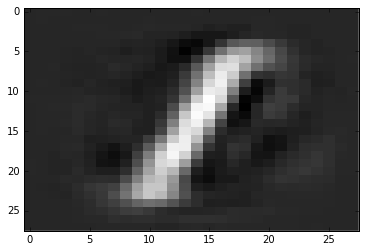

step 1100, training accuracy 0.86
step 1200, training accuracy 0.84
step 1300, training accuracy 0.94
step 1400, training accuracy 0.8
step 1500, training accuracy 0.9
step 1600, training accuracy 0.98
step 1700, training accuracy 0.92
step 1800, training accuracy 0.94
step 1900, training accuracy 0.92
step 2000, training accuracy 0.94
Reconstruction of a 3


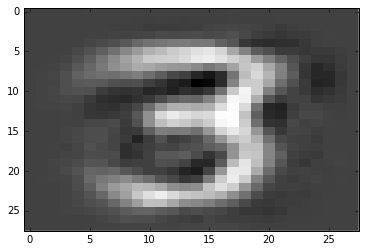

step 2100, training accuracy 0.92
step 2200, training accuracy 0.92
step 2300, training accuracy 0.88
step 2400, training accuracy 0.96
step 2500, training accuracy 0.8
step 2600, training accuracy 0.94
step 2700, training accuracy 0.94
step 2800, training accuracy 0.86
step 2900, training accuracy 0.86
step 3000, training accuracy 0.88
Reconstruction of a 6


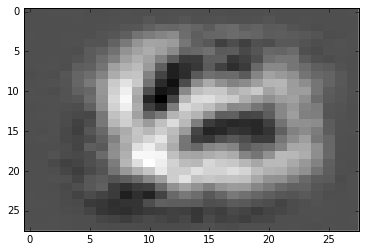

step 3100, training accuracy 0.92
step 3200, training accuracy 0.94
step 3300, training accuracy 0.9
step 3400, training accuracy 0.96
step 3500, training accuracy 0.94
step 3600, training accuracy 0.9
step 3700, training accuracy 0.92
step 3800, training accuracy 0.84
step 3900, training accuracy 0.92
step 4000, training accuracy 0.88
Reconstruction of a 2


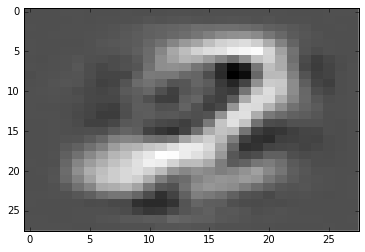

step 4100, training accuracy 0.86
step 4200, training accuracy 0.92
step 4300, training accuracy 0.92
step 4400, training accuracy 0.88
step 4500, training accuracy 0.92
step 4600, training accuracy 0.92
step 4700, training accuracy 0.94
step 4800, training accuracy 0.84
step 4900, training accuracy 0.9
step 5000, training accuracy 0.96
Reconstruction of a 3


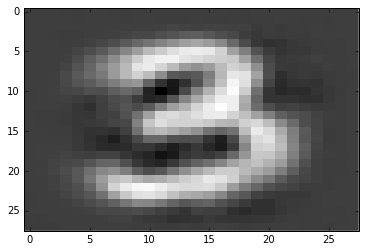

step 5100, training accuracy 0.9
step 5200, training accuracy 0.86
step 5300, training accuracy 0.92
step 5400, training accuracy 0.86
step 5500, training accuracy 0.92
step 5600, training accuracy 0.96
step 5700, training accuracy 0.9
step 5800, training accuracy 0.9
step 5900, training accuracy 0.98
step 6000, training accuracy 0.96
Reconstruction of a 7


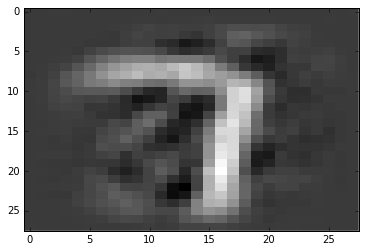

step 6100, training accuracy 0.92
step 6200, training accuracy 0.84
step 6300, training accuracy 0.92
step 6400, training accuracy 0.86
step 6500, training accuracy 0.88
step 6600, training accuracy 0.86
step 6700, training accuracy 0.96
step 6800, training accuracy 0.96
step 6900, training accuracy 0.9
step 7000, training accuracy 0.9
Reconstruction of a 3


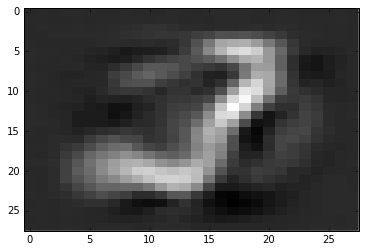

step 7100, training accuracy 0.94
step 7200, training accuracy 0.84
step 7300, training accuracy 0.86
step 7400, training accuracy 0.94
step 7500, training accuracy 0.9
step 7600, training accuracy 0.94
step 7700, training accuracy 0.9
step 7800, training accuracy 0.92
step 7900, training accuracy 0.94
step 8000, training accuracy 0.94
Reconstruction of a 9


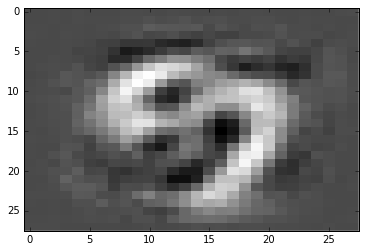

step 8100, training accuracy 0.88
step 8200, training accuracy 0.9
step 8300, training accuracy 0.88
step 8400, training accuracy 0.94
step 8500, training accuracy 0.94
step 8600, training accuracy 0.92
step 8700, training accuracy 0.8
step 8800, training accuracy 0.96
step 8900, training accuracy 0.92
step 9000, training accuracy 0.92
Reconstruction of a 1


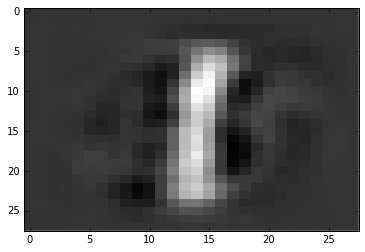

step 9100, training accuracy 0.9
step 9200, training accuracy 0.94
step 9300, training accuracy 0.92
step 9400, training accuracy 0.92
step 9500, training accuracy 0.9
step 9600, training accuracy 0.96
step 9700, training accuracy 0.92
step 9800, training accuracy 0.92
step 9900, training accuracy 0.86
epoch 9, learning rate 1e-07
step 0, training accuracy 0.96
Reconstruction of a 0


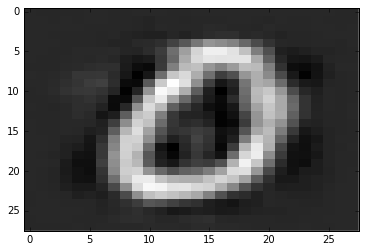

step 100, training accuracy 0.94
step 200, training accuracy 0.94
step 300, training accuracy 0.92
step 400, training accuracy 0.96
step 500, training accuracy 0.9
step 600, training accuracy 0.9
step 700, training accuracy 0.92
step 800, training accuracy 0.88
step 900, training accuracy 0.84
step 1000, training accuracy 0.94
Reconstruction of a 6


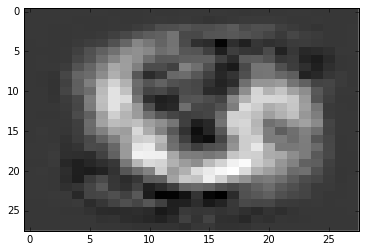

step 1100, training accuracy 0.92
step 1200, training accuracy 0.96
step 1300, training accuracy 0.9
step 1400, training accuracy 0.98
step 1500, training accuracy 0.9
step 1600, training accuracy 0.9
step 1700, training accuracy 0.94
step 1800, training accuracy 0.92
step 1900, training accuracy 0.88
step 2000, training accuracy 0.96
Reconstruction of a 8


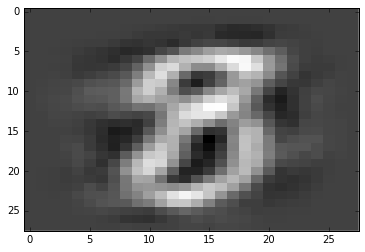

step 2100, training accuracy 0.88
step 2200, training accuracy 0.84
step 2300, training accuracy 0.9
step 2400, training accuracy 0.94
step 2500, training accuracy 0.9
step 2600, training accuracy 0.9
step 2700, training accuracy 0.94
step 2800, training accuracy 0.88
step 2900, training accuracy 0.94
step 3000, training accuracy 0.9
Reconstruction of a 3


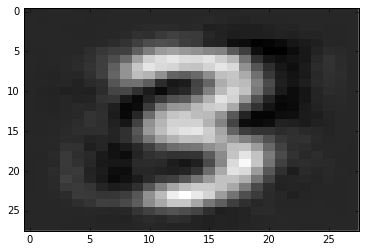

step 3100, training accuracy 0.88
step 3200, training accuracy 0.94
step 3300, training accuracy 0.92
step 3400, training accuracy 0.9
step 3500, training accuracy 0.94
step 3600, training accuracy 0.94
step 3700, training accuracy 0.86
step 3800, training accuracy 0.92
step 3900, training accuracy 0.9
step 4000, training accuracy 0.92
Reconstruction of a 3


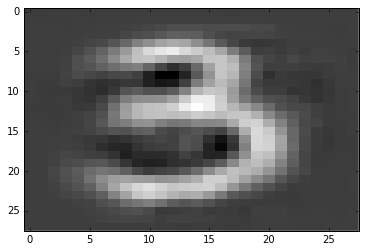

step 4100, training accuracy 0.86
step 4200, training accuracy 0.9
step 4300, training accuracy 0.92
step 4400, training accuracy 0.86
step 4500, training accuracy 0.94
step 4600, training accuracy 0.94
step 4700, training accuracy 0.88
step 4800, training accuracy 0.94
step 4900, training accuracy 0.96
step 5000, training accuracy 0.9
Reconstruction of a 0


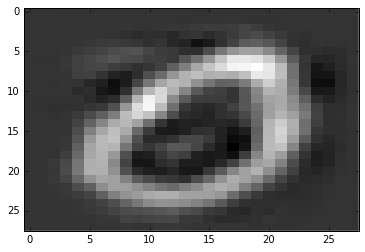

step 5100, training accuracy 0.96
step 5200, training accuracy 0.98
step 5300, training accuracy 0.96
step 5400, training accuracy 0.86
step 5500, training accuracy 0.92
step 5600, training accuracy 0.92
step 5700, training accuracy 0.88
step 5800, training accuracy 1
step 5900, training accuracy 0.92
step 6000, training accuracy 0.96
Reconstruction of a 8


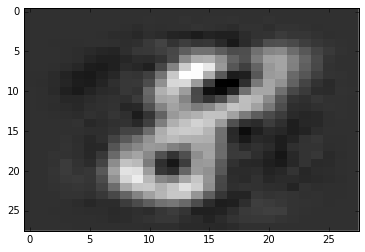

step 6100, training accuracy 0.88
step 6200, training accuracy 0.92
step 6300, training accuracy 0.86
step 6400, training accuracy 0.88
step 6500, training accuracy 0.92
step 6600, training accuracy 0.98
step 6700, training accuracy 0.92
step 6800, training accuracy 0.84
step 6900, training accuracy 0.98
step 7000, training accuracy 0.9
Reconstruction of a 9


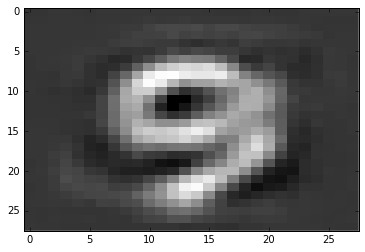

step 7100, training accuracy 0.98
step 7200, training accuracy 0.96
step 7300, training accuracy 0.92
step 7400, training accuracy 0.84
step 7500, training accuracy 0.9
step 7600, training accuracy 0.96
step 7700, training accuracy 0.9
step 7800, training accuracy 0.9
step 7900, training accuracy 0.96
step 8000, training accuracy 0.94
Reconstruction of a 3


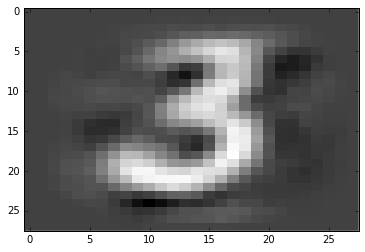

step 8100, training accuracy 0.92
step 8200, training accuracy 0.98
step 8300, training accuracy 0.96
step 8400, training accuracy 0.84
step 8500, training accuracy 0.82
step 8600, training accuracy 0.88
step 8700, training accuracy 0.88
step 8800, training accuracy 0.9
step 8900, training accuracy 0.88
step 9000, training accuracy 0.94
Reconstruction of a 2


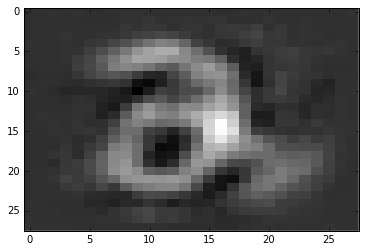

step 9100, training accuracy 0.88
step 9200, training accuracy 0.9
step 9300, training accuracy 0.88
step 9400, training accuracy 0.9
step 9500, training accuracy 0.88
step 9600, training accuracy 0.9
step 9700, training accuracy 0.9
step 9800, training accuracy 0.92
step 9900, training accuracy 0.92


In [83]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_r = tf.placeholder(tf.float32, shape=[None, 784])
learning_rate = tf.placeholder(tf.float32, shape=[])

W = tf.Variable(tf.truncated_normal([784,50], stddev=0.1))
b = tf.Variable(tf.truncated_normal([50], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([50,50], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([50], stddev=0.1))
W_3 = tf.Variable(tf.truncated_normal([50,10], stddev=0.1))
b_3 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x,W) + b)
a_2 = tf.nn.relu(tf.matmul(a,W_2) + b_2)
y = tf.nn.sigmoid(tf.matmul(a_2,W_3) + b_3)
a_r = tf.nn.relu(tf.matmul(a_2 - b_2, tf.transpose(W_2)))
x_r = tf.matmul(a_r - b, tf.transpose(W))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
# train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy + reconstruction_error)
back_train_step = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_error)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for epoch in range(10):
  l_r = 10**np.linspace(-4,-7,10)[epoch]
  print("epoch %d, learning rate %g"%(epoch,l_r))
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("step %d, training accuracy %g"%(i, train_accuracy))
    if i%1000 == 0:
      reconstruction = x_r.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
      plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
      plt.show()
    train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})
    back_train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})

In [84]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

test accuracy 0.9162


# Using ReLU and reconstruction and epochs with 2 hidden layers

epoch 0, learning rate 0.0001
step 0, training accuracy 0.14
Reconstruction of a 2


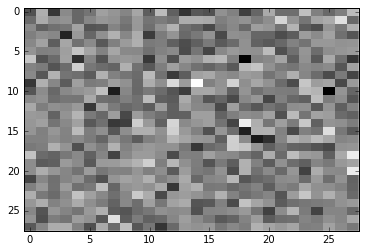

step 100, training accuracy 0.14
step 200, training accuracy 0.24
step 300, training accuracy 0.58
step 400, training accuracy 0.64
step 500, training accuracy 0.82
step 600, training accuracy 0.8
step 700, training accuracy 0.68
step 800, training accuracy 0.82
step 900, training accuracy 0.8
step 1000, training accuracy 0.8
Reconstruction of a 0


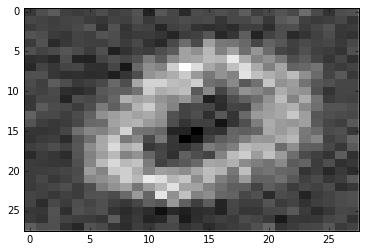

step 1100, training accuracy 0.9
step 1200, training accuracy 0.84
step 1300, training accuracy 0.9
step 1400, training accuracy 0.78
step 1500, training accuracy 0.84
step 1600, training accuracy 0.74
step 1700, training accuracy 0.94
step 1800, training accuracy 0.82
step 1900, training accuracy 0.82
step 2000, training accuracy 0.86
Reconstruction of a 0


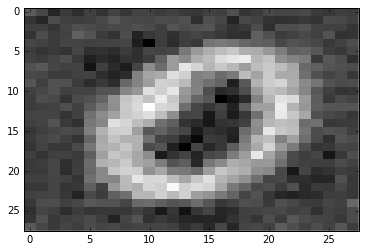

step 2100, training accuracy 0.86
step 2200, training accuracy 0.82
step 2300, training accuracy 0.86
step 2400, training accuracy 0.92
step 2500, training accuracy 0.94
step 2600, training accuracy 0.9
step 2700, training accuracy 0.78
step 2800, training accuracy 0.9
step 2900, training accuracy 0.86
step 3000, training accuracy 0.92
Reconstruction of a 8


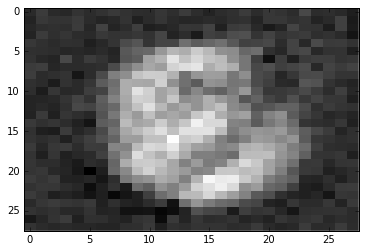

step 3100, training accuracy 0.9
step 3200, training accuracy 0.94
step 3300, training accuracy 0.92
step 3400, training accuracy 0.9
step 3500, training accuracy 0.9
step 3600, training accuracy 0.98
step 3700, training accuracy 0.84
step 3800, training accuracy 0.94
step 3900, training accuracy 0.82
step 4000, training accuracy 0.94
Reconstruction of a 6


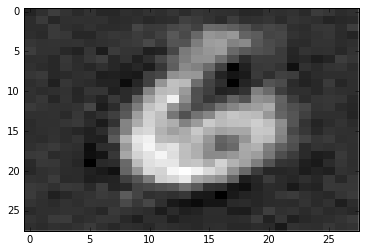

step 4100, training accuracy 0.94
step 4200, training accuracy 0.9
step 4300, training accuracy 0.82
step 4400, training accuracy 0.9
step 4500, training accuracy 0.92
step 4600, training accuracy 0.96
step 4700, training accuracy 0.82
step 4800, training accuracy 0.96
step 4900, training accuracy 0.96
step 5000, training accuracy 0.88
Reconstruction of a 9


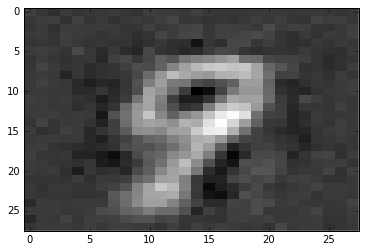

step 5100, training accuracy 0.94
step 5200, training accuracy 0.88
step 5300, training accuracy 0.86
step 5400, training accuracy 0.84
step 5500, training accuracy 0.92
step 5600, training accuracy 0.94
step 5700, training accuracy 0.88
step 5800, training accuracy 0.92
step 5900, training accuracy 0.9
step 6000, training accuracy 0.9
Reconstruction of a 9


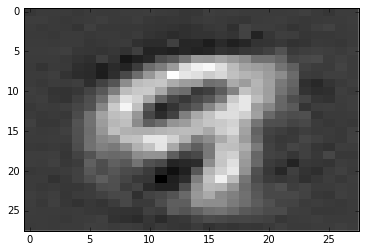

step 6100, training accuracy 0.94
step 6200, training accuracy 0.86
step 6300, training accuracy 1
step 6400, training accuracy 0.88
step 6500, training accuracy 0.96
step 6600, training accuracy 0.94
step 6700, training accuracy 0.86
step 6800, training accuracy 0.96
step 6900, training accuracy 0.96
step 7000, training accuracy 0.98
Reconstruction of a 9


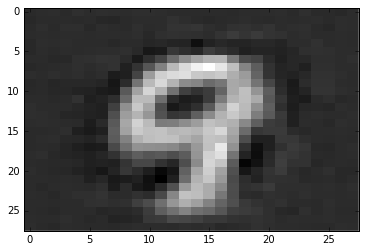

step 7100, training accuracy 0.82
step 7200, training accuracy 0.94
step 7300, training accuracy 0.88
step 7400, training accuracy 0.94
step 7500, training accuracy 0.92
step 7600, training accuracy 0.92
step 7700, training accuracy 0.88
step 7800, training accuracy 0.96
step 7900, training accuracy 0.92
step 8000, training accuracy 0.9
Reconstruction of a 6


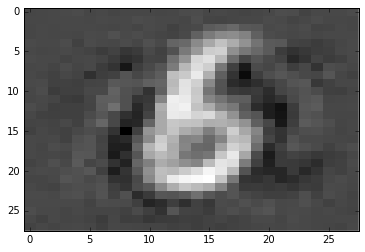

step 8100, training accuracy 0.92
step 8200, training accuracy 0.94
step 8300, training accuracy 0.88
step 8400, training accuracy 0.98
step 8500, training accuracy 0.94
step 8600, training accuracy 0.98
step 8700, training accuracy 1
step 8800, training accuracy 0.96
step 8900, training accuracy 0.88
step 9000, training accuracy 1
Reconstruction of a 3


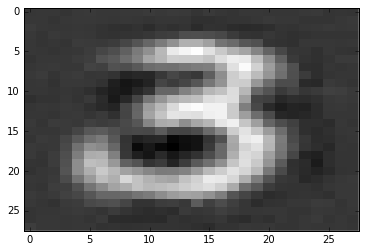

step 9100, training accuracy 0.9
step 9200, training accuracy 0.92
step 9300, training accuracy 0.9
step 9400, training accuracy 0.94
step 9500, training accuracy 0.94
step 9600, training accuracy 1
step 9700, training accuracy 0.9
step 9800, training accuracy 0.92
step 9900, training accuracy 0.94
epoch 1, learning rate 4.64159e-05
step 0, training accuracy 0.92
Reconstruction of a 6


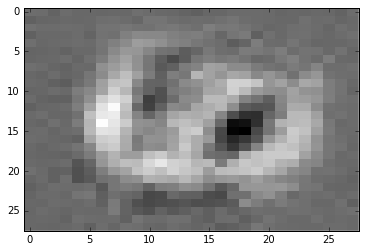

step 100, training accuracy 0.92
step 200, training accuracy 0.98
step 300, training accuracy 0.92
step 400, training accuracy 0.88
step 500, training accuracy 0.92
step 600, training accuracy 0.9
step 700, training accuracy 0.98
step 800, training accuracy 0.94
step 900, training accuracy 0.96
step 1000, training accuracy 0.92
Reconstruction of a 4


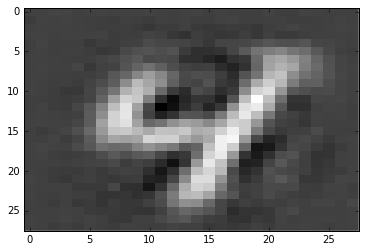

step 1100, training accuracy 0.94
step 1200, training accuracy 0.92
step 1300, training accuracy 0.94
step 1400, training accuracy 0.9
step 1500, training accuracy 0.96
step 1600, training accuracy 0.94
step 1700, training accuracy 0.98
step 1800, training accuracy 0.92
step 1900, training accuracy 0.9
step 2000, training accuracy 0.96
Reconstruction of a 6


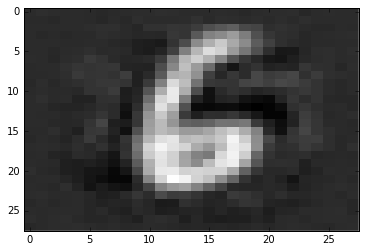

step 2100, training accuracy 0.96
step 2200, training accuracy 0.84
step 2300, training accuracy 1
step 2400, training accuracy 0.96
step 2500, training accuracy 0.94
step 2600, training accuracy 0.88
step 2700, training accuracy 0.96
step 2800, training accuracy 1
step 2900, training accuracy 0.92
step 3000, training accuracy 0.96
Reconstruction of a 7


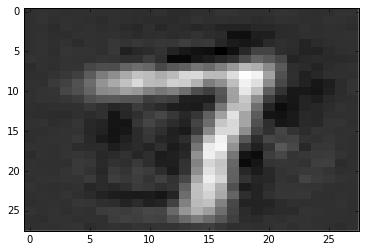

step 3100, training accuracy 0.96
step 3200, training accuracy 0.88
step 3300, training accuracy 0.84
step 3400, training accuracy 0.96
step 3500, training accuracy 0.92
step 3600, training accuracy 0.92
step 3700, training accuracy 0.94
step 3800, training accuracy 0.98
step 3900, training accuracy 0.98
step 4000, training accuracy 0.88
Reconstruction of a 7


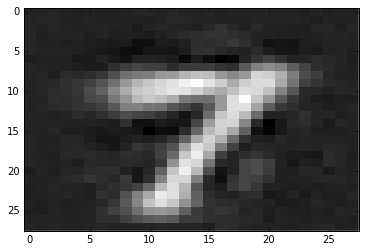

step 4100, training accuracy 0.98
step 4200, training accuracy 0.92
step 4300, training accuracy 0.96
step 4400, training accuracy 0.94
step 4500, training accuracy 0.96
step 4600, training accuracy 0.94
step 4700, training accuracy 0.9
step 4800, training accuracy 0.88
step 4900, training accuracy 1
step 5000, training accuracy 0.92
Reconstruction of a 9


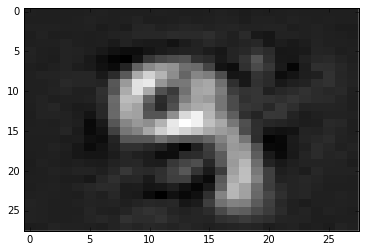

step 5100, training accuracy 0.98
step 5200, training accuracy 0.92
step 5300, training accuracy 0.94
step 5400, training accuracy 0.96
step 5500, training accuracy 0.98
step 5600, training accuracy 0.92
step 5700, training accuracy 0.98
step 5800, training accuracy 0.96
step 5900, training accuracy 0.9
step 6000, training accuracy 0.94
Reconstruction of a 4


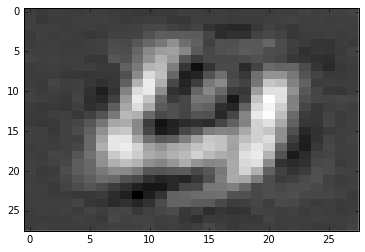

step 6100, training accuracy 0.92
step 6200, training accuracy 0.94
step 6300, training accuracy 0.96
step 6400, training accuracy 1
step 6500, training accuracy 0.96
step 6600, training accuracy 0.88
step 6700, training accuracy 0.9
step 6800, training accuracy 0.92
step 6900, training accuracy 0.92
step 7000, training accuracy 0.88
Reconstruction of a 2


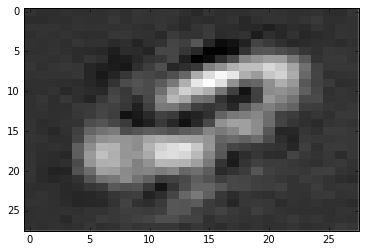

step 7100, training accuracy 1
step 7200, training accuracy 1
step 7300, training accuracy 1
step 7400, training accuracy 0.96
step 7500, training accuracy 0.94
step 7600, training accuracy 0.92
step 7700, training accuracy 0.86
step 7800, training accuracy 0.96
step 7900, training accuracy 0.96
step 8000, training accuracy 0.94
Reconstruction of a 9


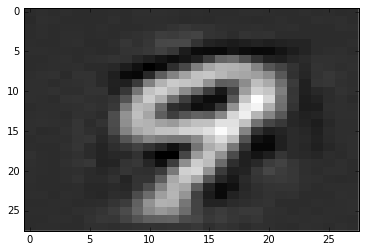

step 8100, training accuracy 0.98
step 8200, training accuracy 0.96
step 8300, training accuracy 0.94
step 8400, training accuracy 0.94
step 8500, training accuracy 0.9
step 8600, training accuracy 0.94
step 8700, training accuracy 0.96
step 8800, training accuracy 0.9
step 8900, training accuracy 0.92
step 9000, training accuracy 0.92
Reconstruction of a 3


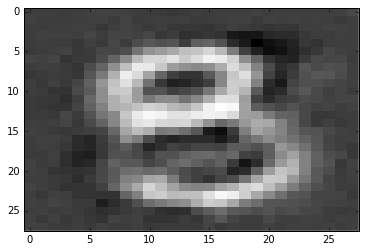

step 9100, training accuracy 0.98
step 9200, training accuracy 0.94
step 9300, training accuracy 0.94
step 9400, training accuracy 0.96
step 9500, training accuracy 0.9
step 9600, training accuracy 0.96
step 9700, training accuracy 0.96
step 9800, training accuracy 0.96
step 9900, training accuracy 1
epoch 2, learning rate 2.15443e-05
step 0, training accuracy 0.96
Reconstruction of a 4


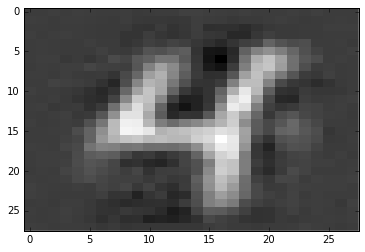

step 100, training accuracy 0.96
step 200, training accuracy 0.96
step 300, training accuracy 0.94
step 400, training accuracy 0.94
step 500, training accuracy 0.9
step 600, training accuracy 0.98
step 700, training accuracy 0.92
step 800, training accuracy 0.92
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
Reconstruction of a 3


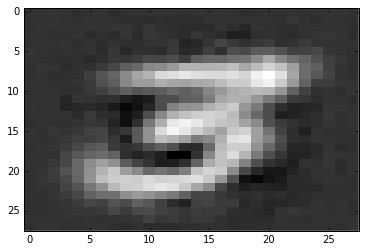

step 1100, training accuracy 0.96
step 1200, training accuracy 0.92
step 1300, training accuracy 0.92
step 1400, training accuracy 0.96
step 1500, training accuracy 0.94
step 1600, training accuracy 0.86
step 1700, training accuracy 0.94
step 1800, training accuracy 0.92
step 1900, training accuracy 0.94
step 2000, training accuracy 0.96
Reconstruction of a 7


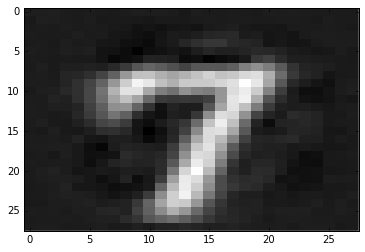

step 2100, training accuracy 0.92
step 2200, training accuracy 0.98
step 2300, training accuracy 0.96
step 2400, training accuracy 1
step 2500, training accuracy 0.96
step 2600, training accuracy 0.94
step 2700, training accuracy 0.98
step 2800, training accuracy 0.94
step 2900, training accuracy 0.94
step 3000, training accuracy 0.98
Reconstruction of a 8


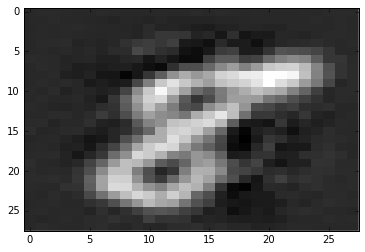

step 3100, training accuracy 0.96
step 3200, training accuracy 0.96
step 3300, training accuracy 0.94
step 3400, training accuracy 0.92
step 3500, training accuracy 0.96
step 3600, training accuracy 0.96
step 3700, training accuracy 0.98
step 3800, training accuracy 0.94
step 3900, training accuracy 0.9
step 4000, training accuracy 0.98
Reconstruction of a 4


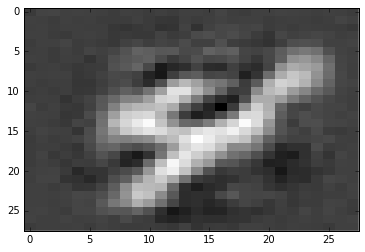

step 4100, training accuracy 0.88
step 4200, training accuracy 0.84
step 4300, training accuracy 0.9
step 4400, training accuracy 0.98
step 4500, training accuracy 0.96
step 4600, training accuracy 0.92
step 4700, training accuracy 1
step 4800, training accuracy 0.92
step 4900, training accuracy 0.98
step 5000, training accuracy 0.88
Reconstruction of a 7


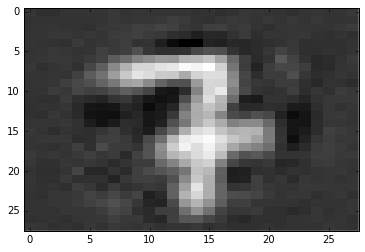

step 5100, training accuracy 0.9
step 5200, training accuracy 0.94
step 5300, training accuracy 0.9
step 5400, training accuracy 0.96
step 5500, training accuracy 0.96
step 5600, training accuracy 0.92
step 5700, training accuracy 0.96
step 5800, training accuracy 0.94
step 5900, training accuracy 0.94
step 6000, training accuracy 0.92
Reconstruction of a 2


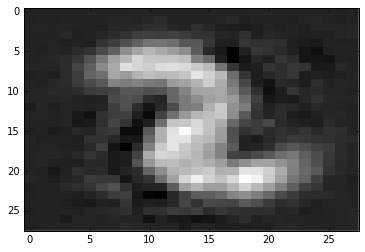

step 6100, training accuracy 0.96
step 6200, training accuracy 0.9
step 6300, training accuracy 0.9
step 6400, training accuracy 0.96
step 6500, training accuracy 0.98
step 6600, training accuracy 0.94
step 6700, training accuracy 0.88
step 6800, training accuracy 0.96
step 6900, training accuracy 0.96
step 7000, training accuracy 0.88
Reconstruction of a 6


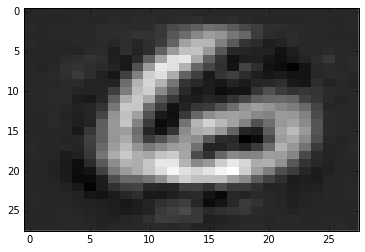

step 7100, training accuracy 0.96
step 7200, training accuracy 0.94
step 7300, training accuracy 0.92
step 7400, training accuracy 0.92
step 7500, training accuracy 0.92
step 7600, training accuracy 0.96
step 7700, training accuracy 0.94
step 7800, training accuracy 0.96
step 7900, training accuracy 0.96
step 8000, training accuracy 1
Reconstruction of a 9


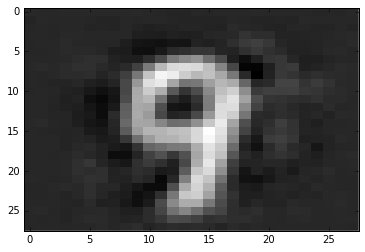

step 8100, training accuracy 0.98
step 8200, training accuracy 0.84
step 8300, training accuracy 0.94
step 8400, training accuracy 0.94
step 8500, training accuracy 0.96
step 8600, training accuracy 0.96
step 8700, training accuracy 0.96
step 8800, training accuracy 0.96
step 8900, training accuracy 1
step 9000, training accuracy 0.96
Reconstruction of a 9


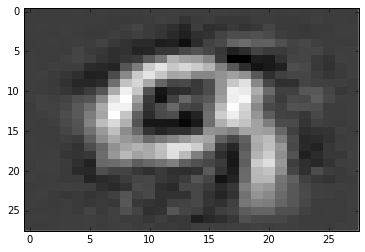

step 9100, training accuracy 0.98
step 9200, training accuracy 0.98
step 9300, training accuracy 0.9
step 9400, training accuracy 0.96
step 9500, training accuracy 0.96
step 9600, training accuracy 0.92
step 9700, training accuracy 0.96
step 9800, training accuracy 1
step 9900, training accuracy 0.96
epoch 3, learning rate 1e-05
step 0, training accuracy 0.9
Reconstruction of a 2


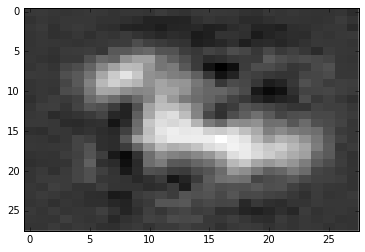

step 100, training accuracy 0.94
step 200, training accuracy 0.94
step 300, training accuracy 0.96
step 400, training accuracy 0.94
step 500, training accuracy 0.94
step 600, training accuracy 0.94
step 700, training accuracy 0.92
step 800, training accuracy 0.98
step 900, training accuracy 0.92
step 1000, training accuracy 0.9
Reconstruction of a 6


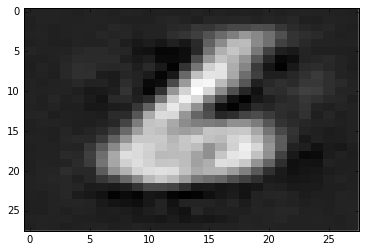

step 1100, training accuracy 0.98
step 1200, training accuracy 0.96
step 1300, training accuracy 0.96
step 1400, training accuracy 0.88
step 1500, training accuracy 0.96
step 1600, training accuracy 0.94
step 1700, training accuracy 0.98
step 1800, training accuracy 0.94
step 1900, training accuracy 0.92
step 2000, training accuracy 0.96
Reconstruction of a 5


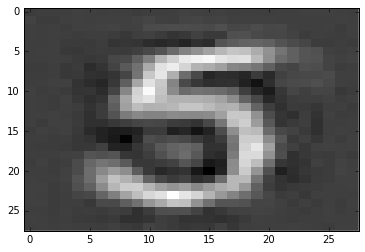

step 2100, training accuracy 0.94
step 2200, training accuracy 0.96
step 2300, training accuracy 0.94
step 2400, training accuracy 0.9
step 2500, training accuracy 0.96
step 2600, training accuracy 0.98
step 2700, training accuracy 0.94
step 2800, training accuracy 0.96
step 2900, training accuracy 0.98
step 3000, training accuracy 0.94
Reconstruction of a 1


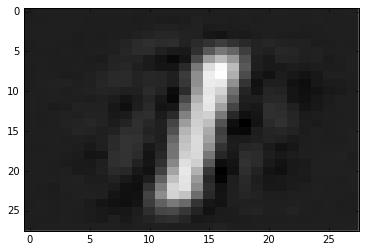

step 3100, training accuracy 0.96
step 3200, training accuracy 0.96
step 3300, training accuracy 0.9
step 3400, training accuracy 0.9
step 3500, training accuracy 0.94
step 3600, training accuracy 0.96
step 3700, training accuracy 0.92
step 3800, training accuracy 0.96
step 3900, training accuracy 0.98
step 4000, training accuracy 0.9
Reconstruction of a 2


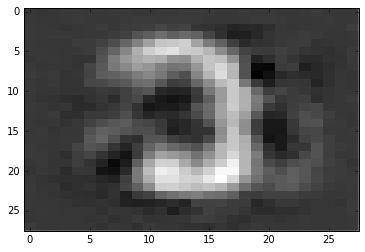

step 4100, training accuracy 0.94
step 4200, training accuracy 0.94
step 4300, training accuracy 0.96
step 4400, training accuracy 1
step 4500, training accuracy 0.9
step 4600, training accuracy 0.98
step 4700, training accuracy 0.98
step 4800, training accuracy 1
step 4900, training accuracy 0.98
step 5000, training accuracy 0.98
Reconstruction of a 4


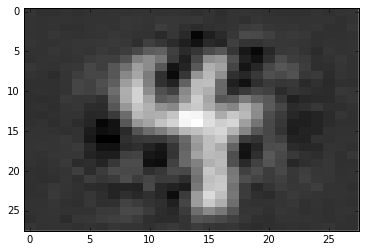

step 5100, training accuracy 0.96
step 5200, training accuracy 0.94
step 5300, training accuracy 0.96
step 5400, training accuracy 0.94
step 5500, training accuracy 0.94
step 5600, training accuracy 0.98
step 5700, training accuracy 0.92
step 5800, training accuracy 0.9
step 5900, training accuracy 0.94
step 6000, training accuracy 0.94
Reconstruction of a 3


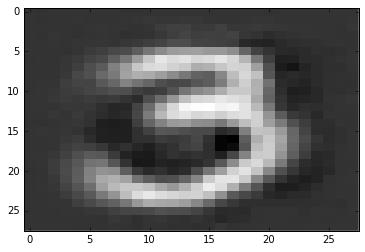

step 6100, training accuracy 0.94
step 6200, training accuracy 0.98
step 6300, training accuracy 0.92
step 6400, training accuracy 0.98
step 6500, training accuracy 1
step 6600, training accuracy 0.94
step 6700, training accuracy 0.92
step 6800, training accuracy 0.94
step 6900, training accuracy 0.98
step 7000, training accuracy 0.9
Reconstruction of a 2


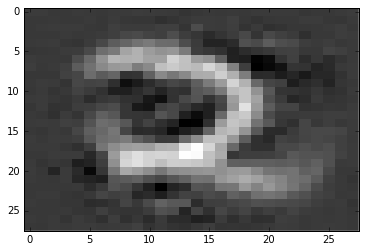

step 7100, training accuracy 0.98
step 7200, training accuracy 0.94
step 7300, training accuracy 0.98
step 7400, training accuracy 0.98
step 7500, training accuracy 0.92
step 7600, training accuracy 1
step 7700, training accuracy 0.94
step 7800, training accuracy 0.92
step 7900, training accuracy 0.92
step 8000, training accuracy 0.9
Reconstruction of a 6


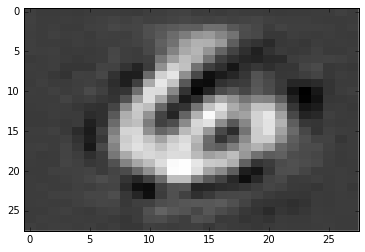

step 8100, training accuracy 0.98
step 8200, training accuracy 0.92
step 8300, training accuracy 0.96
step 8400, training accuracy 0.88
step 8500, training accuracy 0.96
step 8600, training accuracy 0.94
step 8700, training accuracy 0.98
step 8800, training accuracy 0.94
step 8900, training accuracy 0.98
step 9000, training accuracy 0.96
Reconstruction of a 6


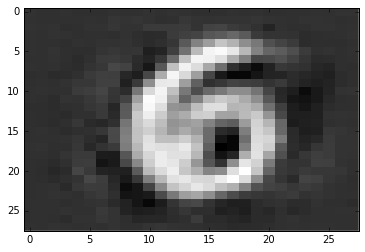

step 9100, training accuracy 0.94
step 9200, training accuracy 0.96
step 9300, training accuracy 1
step 9400, training accuracy 1
step 9500, training accuracy 0.94
step 9600, training accuracy 0.86
step 9700, training accuracy 0.92
step 9800, training accuracy 0.88
step 9900, training accuracy 0.96
epoch 4, learning rate 4.64159e-06
step 0, training accuracy 0.98
Reconstruction of a 9


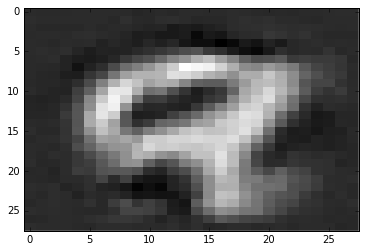

step 100, training accuracy 0.94
step 200, training accuracy 0.94
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 0.98
step 600, training accuracy 0.94
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 1
step 1000, training accuracy 0.88
Reconstruction of a 1


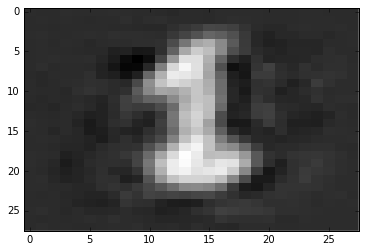

step 1100, training accuracy 1
step 1200, training accuracy 0.98
step 1300, training accuracy 0.96
step 1400, training accuracy 0.98
step 1500, training accuracy 0.98
step 1600, training accuracy 0.96
step 1700, training accuracy 0.88
step 1800, training accuracy 0.88
step 1900, training accuracy 0.98
step 2000, training accuracy 0.96
Reconstruction of a 6


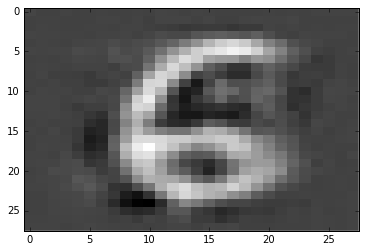

step 2100, training accuracy 1
step 2200, training accuracy 0.82
step 2300, training accuracy 0.94
step 2400, training accuracy 0.98
step 2500, training accuracy 0.94
step 2600, training accuracy 0.96
step 2700, training accuracy 0.86
step 2800, training accuracy 0.88
step 2900, training accuracy 0.94
step 3000, training accuracy 0.96
Reconstruction of a 7


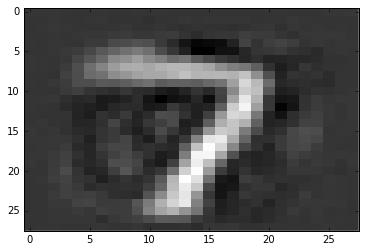

step 3100, training accuracy 0.96
step 3200, training accuracy 0.94
step 3300, training accuracy 0.98
step 3400, training accuracy 0.92
step 3500, training accuracy 0.92
step 3600, training accuracy 0.96
step 3700, training accuracy 0.98
step 3800, training accuracy 0.94
step 3900, training accuracy 0.94
step 4000, training accuracy 0.96
Reconstruction of a 7


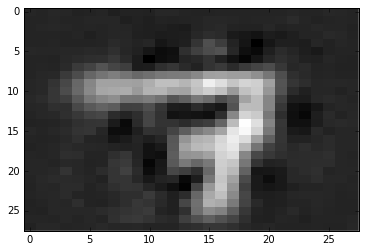

step 4100, training accuracy 0.94
step 4200, training accuracy 0.92
step 4300, training accuracy 0.92
step 4400, training accuracy 0.96
step 4500, training accuracy 0.96
step 4600, training accuracy 0.96
step 4700, training accuracy 0.98
step 4800, training accuracy 0.94
step 4900, training accuracy 0.94
step 5000, training accuracy 1
Reconstruction of a 7


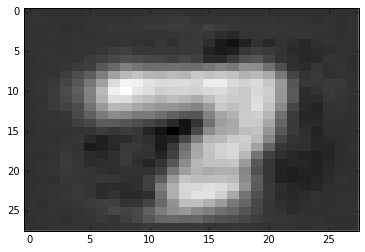

step 5100, training accuracy 0.96
step 5200, training accuracy 0.86
step 5300, training accuracy 0.98
step 5400, training accuracy 1
step 5500, training accuracy 0.96
step 5600, training accuracy 0.96
step 5700, training accuracy 0.94
step 5800, training accuracy 0.96
step 5900, training accuracy 0.94
step 6000, training accuracy 0.96
Reconstruction of a 2


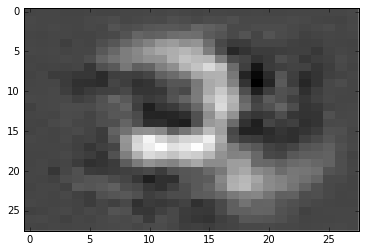

step 6100, training accuracy 0.9
step 6200, training accuracy 0.96
step 6300, training accuracy 1
step 6400, training accuracy 0.92
step 6500, training accuracy 1
step 6600, training accuracy 0.94
step 6700, training accuracy 0.92
step 6800, training accuracy 0.94
step 6900, training accuracy 0.96
step 7000, training accuracy 0.98
Reconstruction of a 0


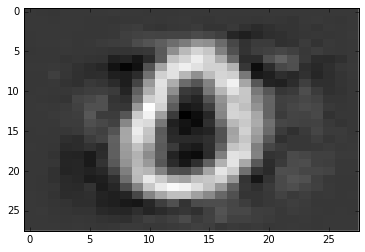

step 7100, training accuracy 0.96
step 7200, training accuracy 0.94
step 7300, training accuracy 0.96
step 7400, training accuracy 0.94
step 7500, training accuracy 0.94
step 7600, training accuracy 0.94
step 7700, training accuracy 0.9
step 7800, training accuracy 0.9
step 7900, training accuracy 0.96
step 8000, training accuracy 0.96
Reconstruction of a 1


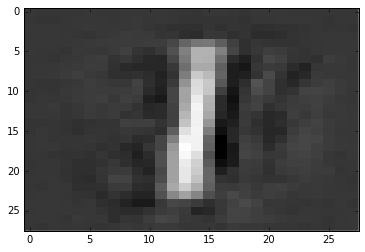

step 8100, training accuracy 0.92
step 8200, training accuracy 0.98
step 8300, training accuracy 0.84
step 8400, training accuracy 0.96
step 8500, training accuracy 0.98
step 8600, training accuracy 0.98
step 8700, training accuracy 0.96
step 8800, training accuracy 1
step 8900, training accuracy 0.92
step 9000, training accuracy 0.9
Reconstruction of a 5


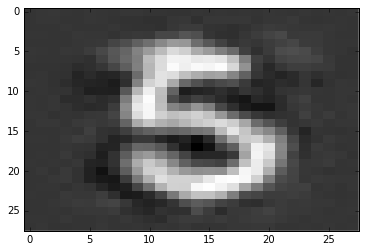

step 9100, training accuracy 0.96
step 9200, training accuracy 0.94
step 9300, training accuracy 0.94
step 9400, training accuracy 0.94
step 9500, training accuracy 0.94
step 9600, training accuracy 0.92
step 9700, training accuracy 0.94
step 9800, training accuracy 0.88
step 9900, training accuracy 0.92
epoch 5, learning rate 2.15443e-06
step 0, training accuracy 0.94
Reconstruction of a 8


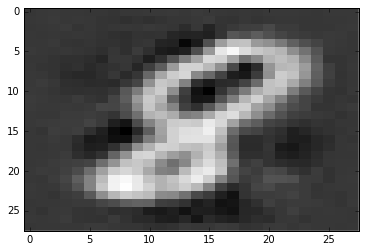

step 100, training accuracy 0.9
step 200, training accuracy 0.96
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 0.86
step 600, training accuracy 0.92
step 700, training accuracy 0.92
step 800, training accuracy 0.88
step 900, training accuracy 0.92
step 1000, training accuracy 0.8
Reconstruction of a 3


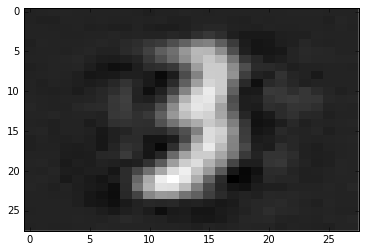

step 1100, training accuracy 0.96
step 1200, training accuracy 1
step 1300, training accuracy 0.9
step 1400, training accuracy 0.98
step 1500, training accuracy 0.96
step 1600, training accuracy 0.94
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 0.92
step 2000, training accuracy 0.96
Reconstruction of a 3


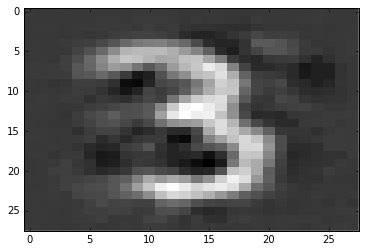

step 2100, training accuracy 0.94
step 2200, training accuracy 0.96
step 2300, training accuracy 0.94
step 2400, training accuracy 0.96
step 2500, training accuracy 0.94
step 2600, training accuracy 0.94
step 2700, training accuracy 0.96
step 2800, training accuracy 0.94
step 2900, training accuracy 0.9
step 3000, training accuracy 0.92
Reconstruction of a 0


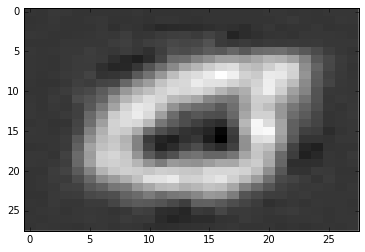

step 3100, training accuracy 0.96
step 3200, training accuracy 0.94
step 3300, training accuracy 0.94
step 3400, training accuracy 0.98
step 3500, training accuracy 0.94
step 3600, training accuracy 0.94
step 3700, training accuracy 0.94
step 3800, training accuracy 0.96
step 3900, training accuracy 0.96
step 4000, training accuracy 0.92
Reconstruction of a 5


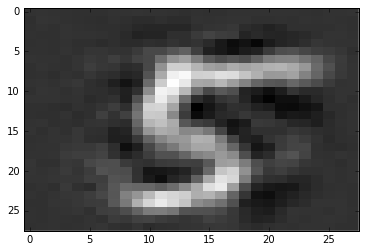

step 4100, training accuracy 0.96
step 4200, training accuracy 0.88
step 4300, training accuracy 0.88
step 4400, training accuracy 0.98
step 4500, training accuracy 0.92
step 4600, training accuracy 0.92
step 4700, training accuracy 0.98
step 4800, training accuracy 0.96
step 4900, training accuracy 0.92
step 5000, training accuracy 0.92
Reconstruction of a 3


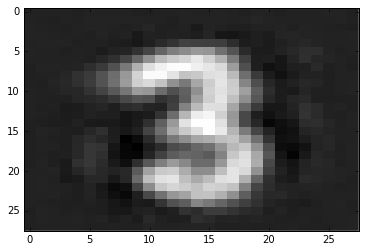

step 5100, training accuracy 0.94
step 5200, training accuracy 1
step 5300, training accuracy 0.98
step 5400, training accuracy 0.96
step 5500, training accuracy 0.9
step 5600, training accuracy 0.9
step 5700, training accuracy 0.96
step 5800, training accuracy 0.92
step 5900, training accuracy 0.94
step 6000, training accuracy 0.92
Reconstruction of a 1


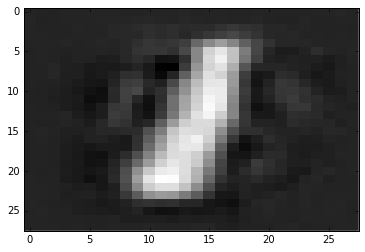

step 6100, training accuracy 0.98
step 6200, training accuracy 0.96
step 6300, training accuracy 0.92
step 6400, training accuracy 0.96
step 6500, training accuracy 0.96
step 6600, training accuracy 0.9
step 6700, training accuracy 0.98
step 6800, training accuracy 0.94
step 6900, training accuracy 0.88
step 7000, training accuracy 0.94
Reconstruction of a 1


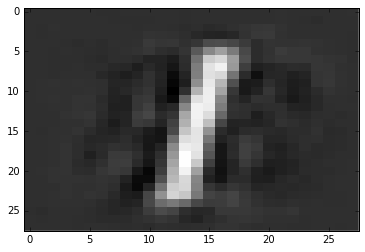

step 7100, training accuracy 0.92
step 7200, training accuracy 0.94
step 7300, training accuracy 0.96
step 7400, training accuracy 0.98
step 7500, training accuracy 0.98
step 7600, training accuracy 1
step 7700, training accuracy 0.94
step 7800, training accuracy 0.96
step 7900, training accuracy 0.96
step 8000, training accuracy 0.98
Reconstruction of a 2


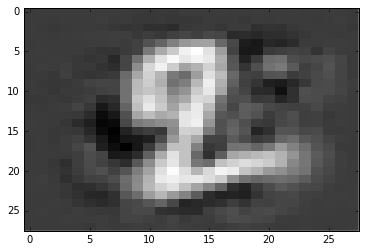

step 8100, training accuracy 0.92
step 8200, training accuracy 0.98
step 8300, training accuracy 0.96
step 8400, training accuracy 0.92
step 8500, training accuracy 0.94
step 8600, training accuracy 0.98
step 8700, training accuracy 0.92
step 8800, training accuracy 0.96
step 8900, training accuracy 0.98
step 9000, training accuracy 0.96
Reconstruction of a 7


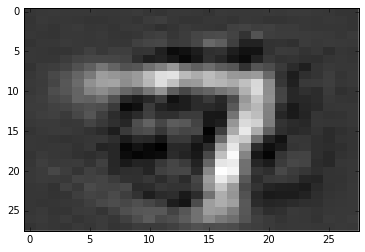

step 9100, training accuracy 0.94
step 9200, training accuracy 0.9
step 9300, training accuracy 0.94
step 9400, training accuracy 0.94
step 9500, training accuracy 0.94
step 9600, training accuracy 0.98
step 9700, training accuracy 0.98
step 9800, training accuracy 0.96
step 9900, training accuracy 0.96
epoch 6, learning rate 1e-06
step 0, training accuracy 0.92
Reconstruction of a 1


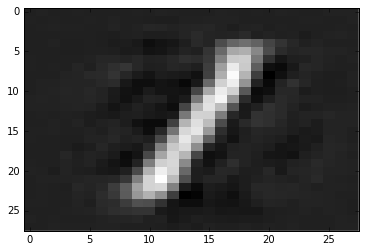

step 100, training accuracy 0.94
step 200, training accuracy 0.96
step 300, training accuracy 0.98
step 400, training accuracy 0.98
step 500, training accuracy 0.96
step 600, training accuracy 0.98
step 700, training accuracy 1
step 800, training accuracy 0.92
step 900, training accuracy 0.9
step 1000, training accuracy 0.98
Reconstruction of a 2


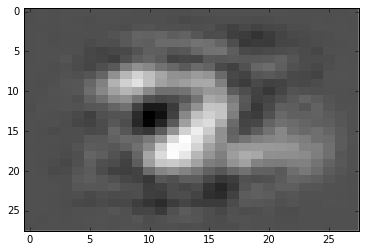

step 1100, training accuracy 0.96
step 1200, training accuracy 0.94
step 1300, training accuracy 0.96
step 1400, training accuracy 0.96
step 1500, training accuracy 0.92
step 1600, training accuracy 0.94
step 1700, training accuracy 0.94
step 1800, training accuracy 0.88
step 1900, training accuracy 0.96
step 2000, training accuracy 0.92
Reconstruction of a 8


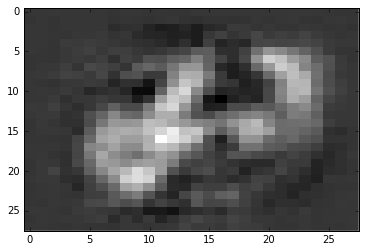

step 2100, training accuracy 0.92
step 2200, training accuracy 0.9
step 2300, training accuracy 0.98
step 2400, training accuracy 0.96
step 2500, training accuracy 0.94
step 2600, training accuracy 0.94
step 2700, training accuracy 0.86
step 2800, training accuracy 0.96
step 2900, training accuracy 0.98
step 3000, training accuracy 0.94
Reconstruction of a 7


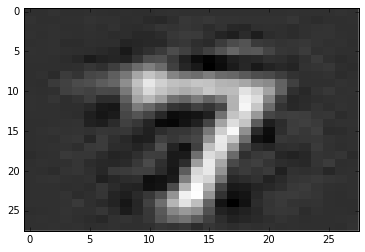

step 3100, training accuracy 0.92
step 3200, training accuracy 0.9
step 3300, training accuracy 0.92
step 3400, training accuracy 0.96
step 3500, training accuracy 1
step 3600, training accuracy 0.9
step 3700, training accuracy 0.98
step 3800, training accuracy 0.94
step 3900, training accuracy 0.96
step 4000, training accuracy 0.92
Reconstruction of a 5


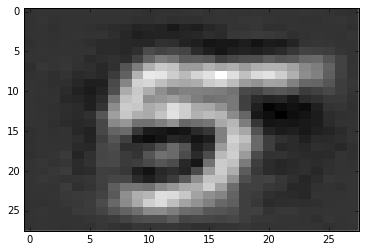

step 4100, training accuracy 0.94
step 4200, training accuracy 0.94
step 4300, training accuracy 0.94
step 4400, training accuracy 0.92
step 4500, training accuracy 0.94
step 4600, training accuracy 0.94
step 4700, training accuracy 0.96
step 4800, training accuracy 0.98
step 4900, training accuracy 0.92
step 5000, training accuracy 0.92
Reconstruction of a 7


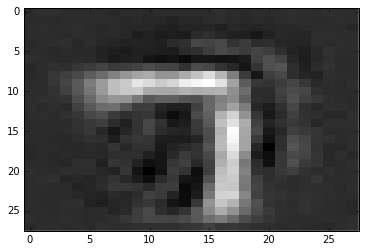

step 5100, training accuracy 0.98
step 5200, training accuracy 1
step 5300, training accuracy 0.98
step 5400, training accuracy 0.92
step 5500, training accuracy 0.94
step 5600, training accuracy 0.92
step 5700, training accuracy 0.92
step 5800, training accuracy 0.96
step 5900, training accuracy 0.88
step 6000, training accuracy 0.96
Reconstruction of a 7


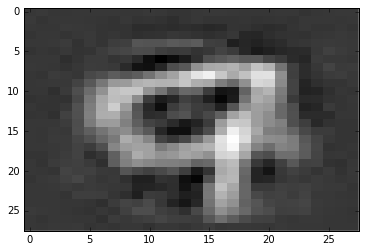

step 6100, training accuracy 0.96
step 6200, training accuracy 0.94
step 6300, training accuracy 0.98
step 6400, training accuracy 0.92
step 6500, training accuracy 0.94
step 6600, training accuracy 0.98
step 6700, training accuracy 0.94
step 6800, training accuracy 0.92
step 6900, training accuracy 0.94
step 7000, training accuracy 0.94
Reconstruction of a 9


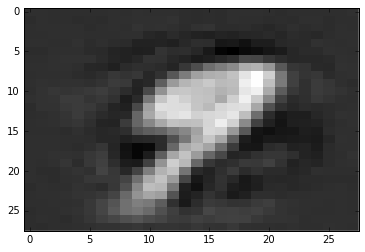

step 7100, training accuracy 0.94
step 7200, training accuracy 1
step 7300, training accuracy 0.96
step 7400, training accuracy 0.96
step 7500, training accuracy 0.92
step 7600, training accuracy 0.92
step 7700, training accuracy 0.92
step 7800, training accuracy 0.96
step 7900, training accuracy 0.88
step 8000, training accuracy 0.92
Reconstruction of a 6


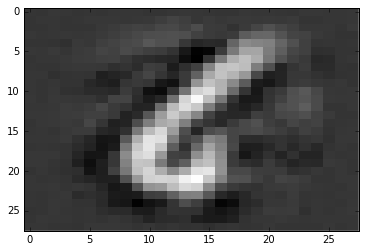

step 8100, training accuracy 0.94
step 8200, training accuracy 0.94
step 8300, training accuracy 0.92
step 8400, training accuracy 0.88
step 8500, training accuracy 1
step 8600, training accuracy 0.86
step 8700, training accuracy 0.94
step 8800, training accuracy 0.96
step 8900, training accuracy 0.92
step 9000, training accuracy 0.94
Reconstruction of a 2


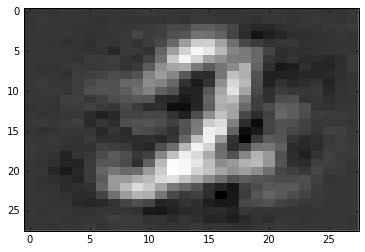

step 9100, training accuracy 0.92
step 9200, training accuracy 0.92
step 9300, training accuracy 0.92
step 9400, training accuracy 0.96
step 9500, training accuracy 0.96
step 9600, training accuracy 0.98
step 9700, training accuracy 0.94
step 9800, training accuracy 0.94
step 9900, training accuracy 0.86
epoch 7, learning rate 4.64159e-07
step 0, training accuracy 1
Reconstruction of a 0


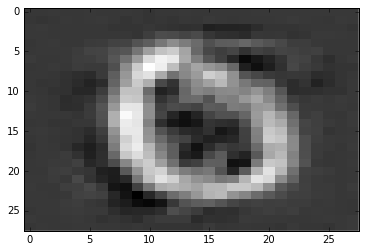

step 100, training accuracy 0.92
step 200, training accuracy 0.98
step 300, training accuracy 1
step 400, training accuracy 0.96
step 500, training accuracy 0.94
step 600, training accuracy 0.98
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
Reconstruction of a 7


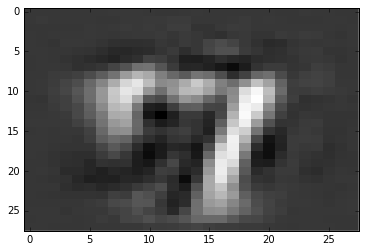

step 1100, training accuracy 0.96
step 1200, training accuracy 0.92
step 1300, training accuracy 1
step 1400, training accuracy 0.98
step 1500, training accuracy 0.94
step 1600, training accuracy 0.96
step 1700, training accuracy 0.9
step 1800, training accuracy 0.96
step 1900, training accuracy 0.94
step 2000, training accuracy 0.94
Reconstruction of a 4


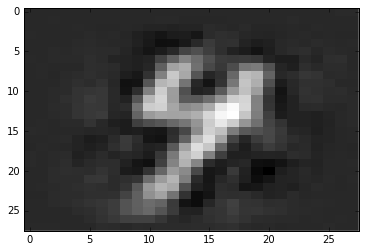

step 2100, training accuracy 0.96
step 2200, training accuracy 0.92
step 2300, training accuracy 0.94
step 2400, training accuracy 0.96
step 2500, training accuracy 1
step 2600, training accuracy 0.96
step 2700, training accuracy 0.94
step 2800, training accuracy 0.92
step 2900, training accuracy 0.98
step 3000, training accuracy 0.96
Reconstruction of a 9


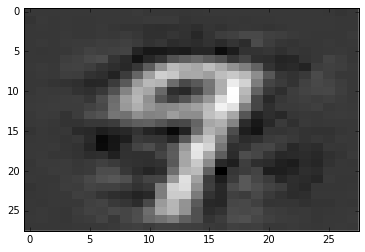

step 3100, training accuracy 0.94
step 3200, training accuracy 0.96
step 3300, training accuracy 0.94
step 3400, training accuracy 0.94
step 3500, training accuracy 0.92
step 3600, training accuracy 0.9
step 3700, training accuracy 0.96
step 3800, training accuracy 0.9
step 3900, training accuracy 0.92
step 4000, training accuracy 0.88
Reconstruction of a 8


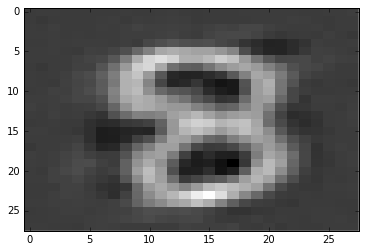

step 4100, training accuracy 0.98
step 4200, training accuracy 0.92
step 4300, training accuracy 0.94
step 4400, training accuracy 0.92
step 4500, training accuracy 0.98
step 4600, training accuracy 0.92
step 4700, training accuracy 0.96
step 4800, training accuracy 0.92
step 4900, training accuracy 0.98
step 5000, training accuracy 0.96
Reconstruction of a 3


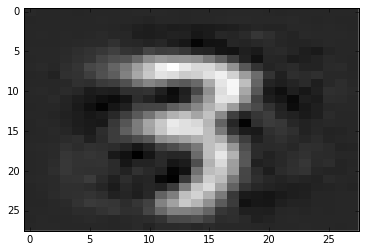

step 5100, training accuracy 0.96
step 5200, training accuracy 0.94
step 5300, training accuracy 0.96
step 5400, training accuracy 0.96
step 5500, training accuracy 1
step 5600, training accuracy 0.94
step 5700, training accuracy 0.96
step 5800, training accuracy 0.98
step 5900, training accuracy 0.92
step 6000, training accuracy 1
Reconstruction of a 0


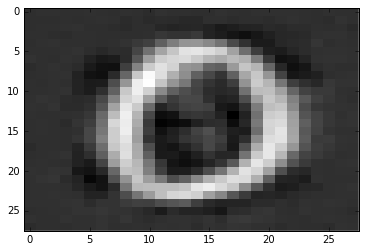

step 6100, training accuracy 0.92
step 6200, training accuracy 0.92
step 6300, training accuracy 0.98
step 6400, training accuracy 0.94
step 6500, training accuracy 0.9
step 6600, training accuracy 0.96
step 6700, training accuracy 0.94
step 6800, training accuracy 0.96
step 6900, training accuracy 0.92
step 7000, training accuracy 0.88
Reconstruction of a 0


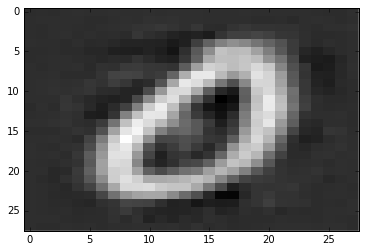

step 7100, training accuracy 0.96
step 7200, training accuracy 0.96
step 7300, training accuracy 0.94
step 7400, training accuracy 0.92
step 7500, training accuracy 0.96
step 7600, training accuracy 0.96
step 7700, training accuracy 0.92
step 7800, training accuracy 0.96
step 7900, training accuracy 0.92
step 8000, training accuracy 0.98
Reconstruction of a 5


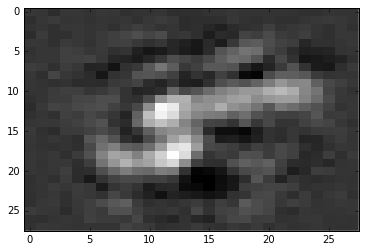

step 8100, training accuracy 0.96
step 8200, training accuracy 0.92
step 8300, training accuracy 0.98
step 8400, training accuracy 0.96
step 8500, training accuracy 0.94
step 8600, training accuracy 0.88
step 8700, training accuracy 1
step 8800, training accuracy 0.96
step 8900, training accuracy 0.96
step 9000, training accuracy 0.94
Reconstruction of a 1


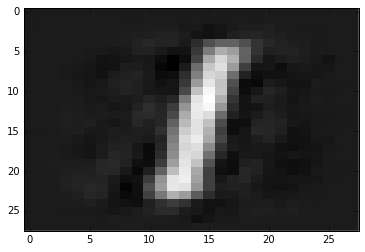

step 9100, training accuracy 0.84
step 9200, training accuracy 0.92
step 9300, training accuracy 0.94
step 9400, training accuracy 0.92
step 9500, training accuracy 0.92
step 9600, training accuracy 0.9
step 9700, training accuracy 0.98
step 9800, training accuracy 0.96
step 9900, training accuracy 0.94
epoch 8, learning rate 2.15443e-07
step 0, training accuracy 0.92
Reconstruction of a 6


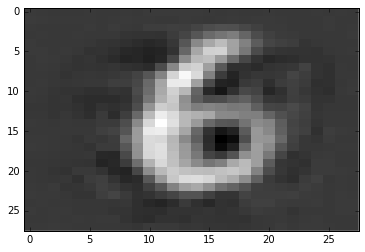

step 100, training accuracy 0.94
step 200, training accuracy 0.9
step 300, training accuracy 0.96
step 400, training accuracy 0.9
step 500, training accuracy 0.92
step 600, training accuracy 0.96
step 700, training accuracy 0.92
step 800, training accuracy 0.96
step 900, training accuracy 0.94
step 1000, training accuracy 0.94
Reconstruction of a 5


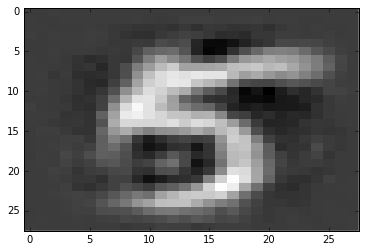

step 1100, training accuracy 0.96
step 1200, training accuracy 0.92
step 1300, training accuracy 0.98
step 1400, training accuracy 0.94
step 1500, training accuracy 0.94
step 1600, training accuracy 0.98
step 1700, training accuracy 0.96
step 1800, training accuracy 0.92
step 1900, training accuracy 0.94
step 2000, training accuracy 0.94
Reconstruction of a 7


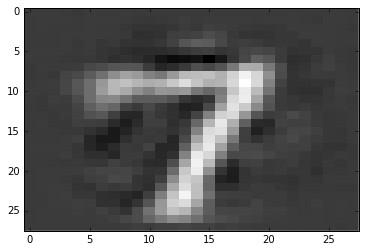

step 2100, training accuracy 0.92
step 2200, training accuracy 0.92
step 2300, training accuracy 0.92
step 2400, training accuracy 0.94
step 2500, training accuracy 0.94
step 2600, training accuracy 0.94
step 2700, training accuracy 0.9
step 2800, training accuracy 0.9
step 2900, training accuracy 0.98
step 3000, training accuracy 0.96
Reconstruction of a 3


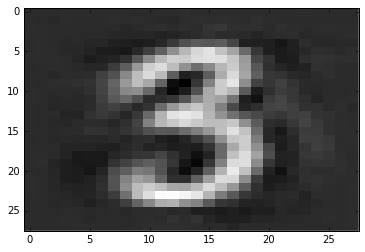

step 3100, training accuracy 0.94
step 3200, training accuracy 0.86
step 3300, training accuracy 0.98
step 3400, training accuracy 0.98
step 3500, training accuracy 0.96
step 3600, training accuracy 0.96
step 3700, training accuracy 0.98
step 3800, training accuracy 0.94
step 3900, training accuracy 1
step 4000, training accuracy 0.96
Reconstruction of a 1


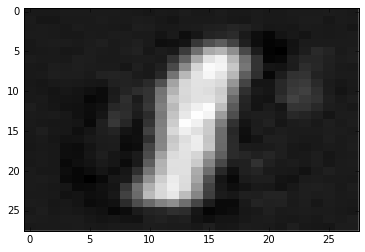

step 4100, training accuracy 0.92
step 4200, training accuracy 0.94
step 4300, training accuracy 0.92
step 4400, training accuracy 0.94
step 4500, training accuracy 0.96
step 4600, training accuracy 1
step 4700, training accuracy 0.96
step 4800, training accuracy 0.96
step 4900, training accuracy 0.96
step 5000, training accuracy 0.96
Reconstruction of a 1


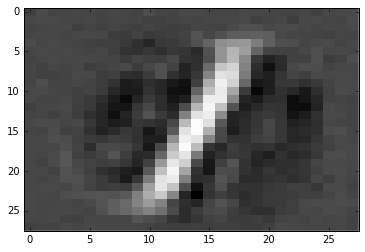

step 5100, training accuracy 0.98
step 5200, training accuracy 0.94
step 5300, training accuracy 0.94
step 5400, training accuracy 0.94
step 5500, training accuracy 0.88
step 5600, training accuracy 0.92
step 5700, training accuracy 0.96
step 5800, training accuracy 0.98
step 5900, training accuracy 0.94
step 6000, training accuracy 0.98
Reconstruction of a 8


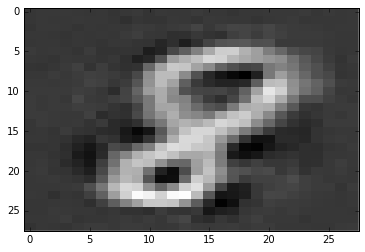

step 6100, training accuracy 0.98
step 6200, training accuracy 0.96
step 6300, training accuracy 0.94
step 6400, training accuracy 0.92
step 6500, training accuracy 0.94
step 6600, training accuracy 0.96
step 6700, training accuracy 0.94
step 6800, training accuracy 0.92
step 6900, training accuracy 0.92
step 7000, training accuracy 0.92
Reconstruction of a 6


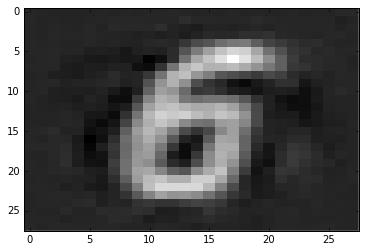

step 7100, training accuracy 0.96
step 7200, training accuracy 0.92
step 7300, training accuracy 0.96
step 7400, training accuracy 0.9
step 7500, training accuracy 0.94
step 7600, training accuracy 0.9
step 7700, training accuracy 0.94
step 7800, training accuracy 0.96
step 7900, training accuracy 0.9
step 8000, training accuracy 0.9
Reconstruction of a 6


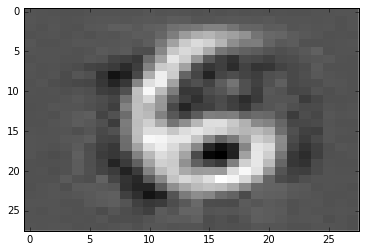

step 8100, training accuracy 0.96
step 8200, training accuracy 0.96
step 8300, training accuracy 0.92
step 8400, training accuracy 0.94
step 8500, training accuracy 1
step 8600, training accuracy 0.94
step 8700, training accuracy 0.96
step 8800, training accuracy 0.94
step 8900, training accuracy 0.98
step 9000, training accuracy 0.96
Reconstruction of a 1


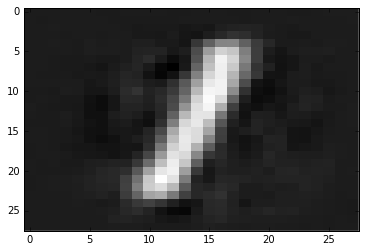

step 9100, training accuracy 0.9
step 9200, training accuracy 0.98
step 9300, training accuracy 0.94
step 9400, training accuracy 0.94
step 9500, training accuracy 0.92
step 9600, training accuracy 0.98
step 9700, training accuracy 0.94
step 9800, training accuracy 0.96
step 9900, training accuracy 0.98
epoch 9, learning rate 1e-07
step 0, training accuracy 0.96
Reconstruction of a 5


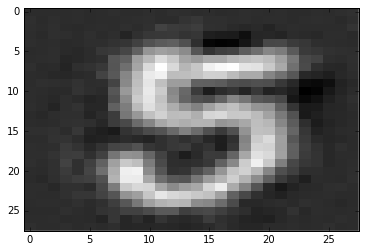

step 100, training accuracy 0.94
step 200, training accuracy 0.9
step 300, training accuracy 0.9
step 400, training accuracy 0.92
step 500, training accuracy 0.96
step 600, training accuracy 0.92
step 700, training accuracy 0.92
step 800, training accuracy 0.92
step 900, training accuracy 0.96
step 1000, training accuracy 0.94
Reconstruction of a 8


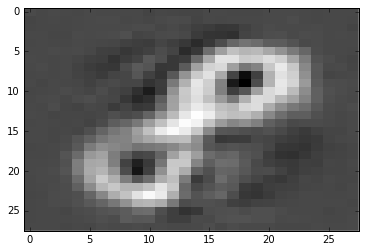

step 1100, training accuracy 0.94
step 1200, training accuracy 1
step 1300, training accuracy 0.94
step 1400, training accuracy 0.94
step 1500, training accuracy 0.98
step 1600, training accuracy 0.96
step 1700, training accuracy 0.96
step 1800, training accuracy 0.88
step 1900, training accuracy 0.96
step 2000, training accuracy 0.94
Reconstruction of a 4


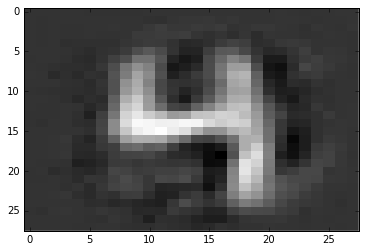

step 2100, training accuracy 0.96
step 2200, training accuracy 0.94
step 2300, training accuracy 0.96
step 2400, training accuracy 0.96
step 2500, training accuracy 0.98
step 2600, training accuracy 0.94
step 2700, training accuracy 0.98
step 2800, training accuracy 0.94
step 2900, training accuracy 0.98
step 3000, training accuracy 0.92
Reconstruction of a 7


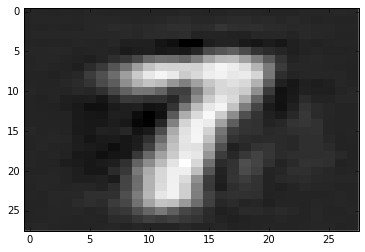

step 3100, training accuracy 0.96
step 3200, training accuracy 0.92
step 3300, training accuracy 0.94
step 3400, training accuracy 0.92
step 3500, training accuracy 0.92
step 3600, training accuracy 0.92
step 3700, training accuracy 0.96
step 3800, training accuracy 0.94
step 3900, training accuracy 0.94
step 4000, training accuracy 0.98
Reconstruction of a 1


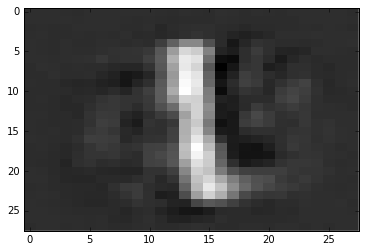

step 4100, training accuracy 0.96
step 4200, training accuracy 0.92
step 4300, training accuracy 0.9
step 4400, training accuracy 0.94
step 4500, training accuracy 0.88
step 4600, training accuracy 0.92
step 4700, training accuracy 0.94
step 4800, training accuracy 0.98
step 4900, training accuracy 0.92
step 5000, training accuracy 0.98
Reconstruction of a 4


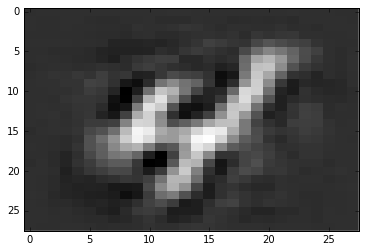

step 5100, training accuracy 0.96
step 5200, training accuracy 0.96
step 5300, training accuracy 0.98
step 5400, training accuracy 0.96
step 5500, training accuracy 0.94
step 5600, training accuracy 0.94
step 5700, training accuracy 0.98
step 5800, training accuracy 0.96
step 5900, training accuracy 0.96
step 6000, training accuracy 0.94
Reconstruction of a 7


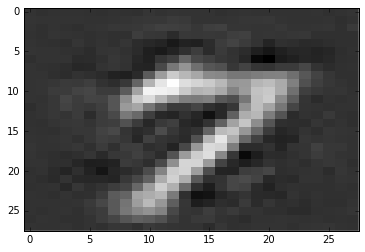

step 6100, training accuracy 0.92
step 6200, training accuracy 0.92
step 6300, training accuracy 0.94
step 6400, training accuracy 0.96
step 6500, training accuracy 0.96
step 6600, training accuracy 0.92
step 6700, training accuracy 0.96
step 6800, training accuracy 0.98
step 6900, training accuracy 0.88
step 7000, training accuracy 0.96
Reconstruction of a 2


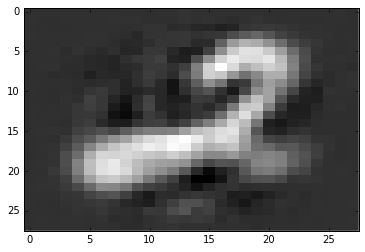

step 7100, training accuracy 0.88
step 7200, training accuracy 0.96
step 7300, training accuracy 0.88
step 7400, training accuracy 1
step 7500, training accuracy 0.9
step 7600, training accuracy 0.9
step 7700, training accuracy 0.98
step 7800, training accuracy 0.98
step 7900, training accuracy 0.92
step 8000, training accuracy 0.94
Reconstruction of a 6


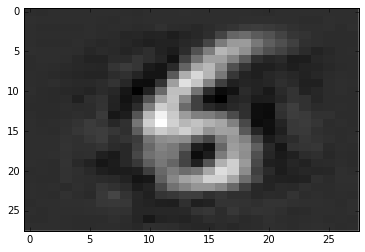

step 8100, training accuracy 0.94
step 8200, training accuracy 0.98
step 8300, training accuracy 0.92
step 8400, training accuracy 0.9
step 8500, training accuracy 0.94
step 8600, training accuracy 0.96
step 8700, training accuracy 0.94
step 8800, training accuracy 1
step 8900, training accuracy 0.94
step 9000, training accuracy 0.94
Reconstruction of a 4


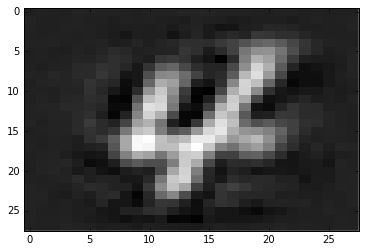

step 9100, training accuracy 0.94
step 9200, training accuracy 0.9
step 9300, training accuracy 0.92
step 9400, training accuracy 0.94
step 9500, training accuracy 0.94
step 9600, training accuracy 0.92
step 9700, training accuracy 0.96
step 9800, training accuracy 0.98
step 9900, training accuracy 1


In [85]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_r = tf.placeholder(tf.float32, shape=[None, 784])
learning_rate = tf.placeholder(tf.float32, shape=[])

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_3 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_3 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x,W) + b)
a_2 = tf.nn.relu(tf.matmul(a,W_2) + b_2)
y = tf.nn.sigmoid(tf.matmul(a_2,W_3) + b_3)
a_r = tf.nn.relu(tf.matmul(a_2 - b_2, tf.transpose(W_2)))
x_r = tf.matmul(a_r - b, tf.transpose(W))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
back_train_step = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_error)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for epoch in range(10):
  l_r = 10**np.linspace(-4,-7,10)[epoch]
  print("epoch %d, learning rate %g"%(epoch,l_r))
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("step %d, training accuracy %g"%(i, train_accuracy))
    if i%1000 == 0:
      reconstruction = x_r.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
      plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
      plt.show()
    train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})
    back_train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})

In [86]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

test accuracy 0.9451


# Using ReLU and reconstruction and epochs with 3 hidden layers

epoch 0, learning rate 0.0001
step 0, training accuracy 0.08
Reconstruction of a 4


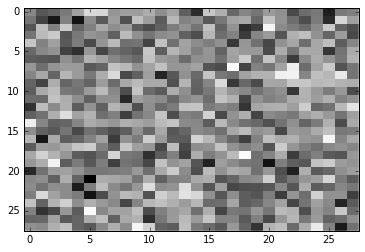

step 100, training accuracy 0.1
step 200, training accuracy 0.16
step 300, training accuracy 0.56
step 400, training accuracy 0.68
step 500, training accuracy 0.76
step 600, training accuracy 0.8
step 700, training accuracy 0.72
step 800, training accuracy 0.88
step 900, training accuracy 0.84
step 1000, training accuracy 0.82
Reconstruction of a 5


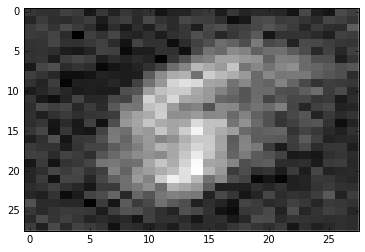

step 1100, training accuracy 0.92
step 1200, training accuracy 0.86
step 1300, training accuracy 0.94
step 1400, training accuracy 0.82
step 1500, training accuracy 0.82
step 1600, training accuracy 0.88
step 1700, training accuracy 0.9
step 1800, training accuracy 0.86
step 1900, training accuracy 0.86
step 2000, training accuracy 0.86
Reconstruction of a 2


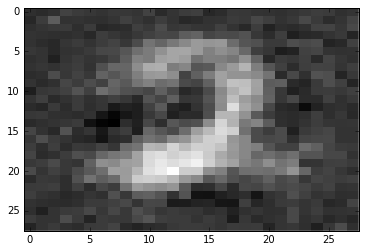

step 2100, training accuracy 0.92
step 2200, training accuracy 0.9
step 2300, training accuracy 0.94
step 2400, training accuracy 0.92
step 2500, training accuracy 0.92
step 2600, training accuracy 0.96
step 2700, training accuracy 0.94
step 2800, training accuracy 0.9
step 2900, training accuracy 0.92
step 3000, training accuracy 0.98
Reconstruction of a 6


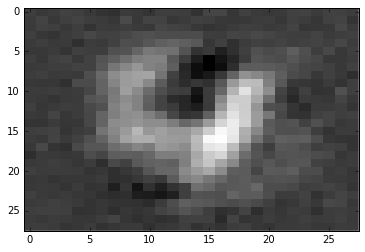

step 3100, training accuracy 0.92
step 3200, training accuracy 0.94
step 3300, training accuracy 0.88
step 3400, training accuracy 0.96
step 3500, training accuracy 0.9
step 3600, training accuracy 0.96
step 3700, training accuracy 1
step 3800, training accuracy 0.98
step 3900, training accuracy 0.94
step 4000, training accuracy 0.8
Reconstruction of a 4


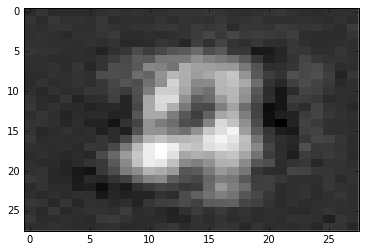

step 4100, training accuracy 0.96
step 4200, training accuracy 0.92
step 4300, training accuracy 0.92
step 4400, training accuracy 0.88
step 4500, training accuracy 0.98
step 4600, training accuracy 0.96
step 4700, training accuracy 0.9
step 4800, training accuracy 0.94
step 4900, training accuracy 0.86
step 5000, training accuracy 0.92
Reconstruction of a 2


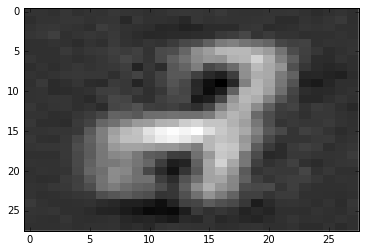

step 5100, training accuracy 0.94
step 5200, training accuracy 0.98
step 5300, training accuracy 0.86
step 5400, training accuracy 0.94
step 5500, training accuracy 0.92
step 5600, training accuracy 0.96
step 5700, training accuracy 0.96
step 5800, training accuracy 0.96
step 5900, training accuracy 0.96
step 6000, training accuracy 0.98
Reconstruction of a 5


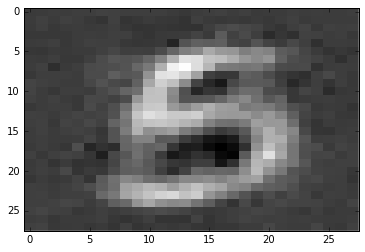

step 6100, training accuracy 0.98
step 6200, training accuracy 0.96
step 6300, training accuracy 0.92
step 6400, training accuracy 0.86
step 6500, training accuracy 0.94
step 6600, training accuracy 0.94
step 6700, training accuracy 0.86
step 6800, training accuracy 0.9
step 6900, training accuracy 0.94
step 7000, training accuracy 0.94
Reconstruction of a 4


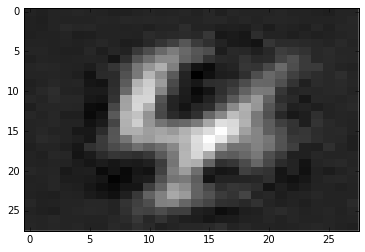

step 7100, training accuracy 0.92
step 7200, training accuracy 0.94
step 7300, training accuracy 0.98
step 7400, training accuracy 0.94
step 7500, training accuracy 0.92
step 7600, training accuracy 0.98
step 7700, training accuracy 0.94
step 7800, training accuracy 0.9
step 7900, training accuracy 0.92
step 8000, training accuracy 0.94
Reconstruction of a 8


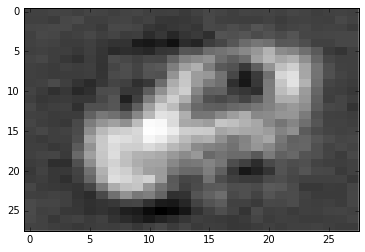

step 8100, training accuracy 0.98
step 8200, training accuracy 0.92
step 8300, training accuracy 1
step 8400, training accuracy 0.94
step 8500, training accuracy 0.98
step 8600, training accuracy 0.96
step 8700, training accuracy 0.92
step 8800, training accuracy 0.94
step 8900, training accuracy 0.92
step 9000, training accuracy 0.96
Reconstruction of a 1


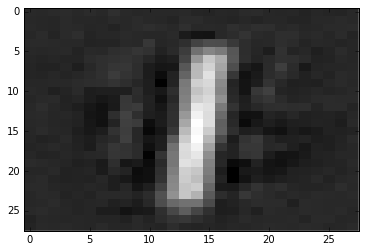

step 9100, training accuracy 0.96
step 9200, training accuracy 0.94
step 9300, training accuracy 0.94
step 9400, training accuracy 0.94
step 9500, training accuracy 0.96
step 9600, training accuracy 0.98
step 9700, training accuracy 0.94
step 9800, training accuracy 0.96
step 9900, training accuracy 0.94
epoch 1, learning rate 4.64159e-05
step 0, training accuracy 0.96
Reconstruction of a 8


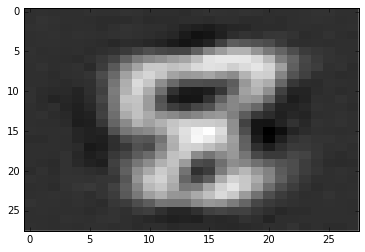

step 100, training accuracy 0.98
step 200, training accuracy 0.98
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 0.96
step 600, training accuracy 0.94
step 700, training accuracy 0.96
step 800, training accuracy 0.96
step 900, training accuracy 0.94
step 1000, training accuracy 0.96
Reconstruction of a 6


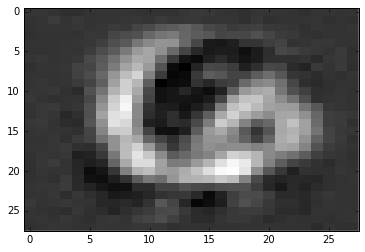

step 1100, training accuracy 0.98
step 1200, training accuracy 0.96
step 1300, training accuracy 0.94
step 1400, training accuracy 0.98
step 1500, training accuracy 0.94
step 1600, training accuracy 0.96
step 1700, training accuracy 0.94
step 1800, training accuracy 0.94
step 1900, training accuracy 0.98
step 2000, training accuracy 0.94
Reconstruction of a 8


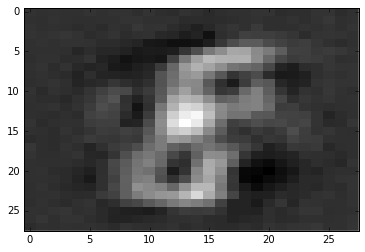

step 2100, training accuracy 0.84
step 2200, training accuracy 0.94
step 2300, training accuracy 0.96
step 2400, training accuracy 0.96
step 2500, training accuracy 0.94
step 2600, training accuracy 0.92
step 2700, training accuracy 0.96
step 2800, training accuracy 0.98
step 2900, training accuracy 0.98
step 3000, training accuracy 0.96
Reconstruction of a 9


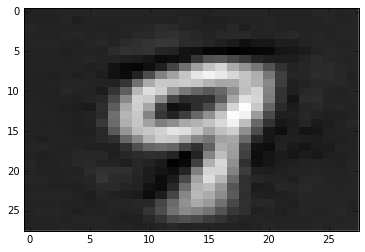

step 3100, training accuracy 0.92
step 3200, training accuracy 0.88
step 3300, training accuracy 0.96
step 3400, training accuracy 0.94
step 3500, training accuracy 0.98
step 3600, training accuracy 1
step 3700, training accuracy 0.92
step 3800, training accuracy 1
step 3900, training accuracy 0.94
step 4000, training accuracy 0.92
Reconstruction of a 7


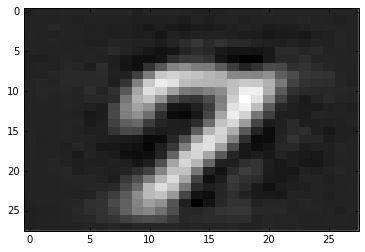

step 4100, training accuracy 0.92
step 4200, training accuracy 0.98
step 4300, training accuracy 0.96
step 4400, training accuracy 1
step 4500, training accuracy 0.94
step 4600, training accuracy 0.94
step 4700, training accuracy 0.88
step 4800, training accuracy 0.9
step 4900, training accuracy 0.88
step 5000, training accuracy 0.96
Reconstruction of a 3


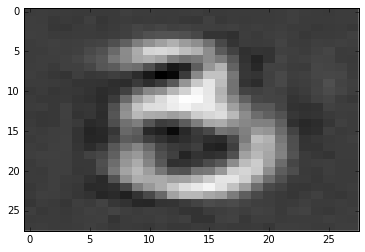

step 5100, training accuracy 0.92
step 5200, training accuracy 0.94
step 5300, training accuracy 0.98
step 5400, training accuracy 0.96
step 5500, training accuracy 0.98
step 5600, training accuracy 0.98
step 5700, training accuracy 0.96
step 5800, training accuracy 0.96
step 5900, training accuracy 1
step 6000, training accuracy 0.96
Reconstruction of a 0


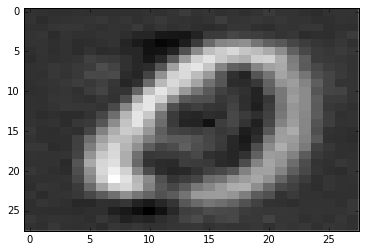

step 6100, training accuracy 0.98
step 6200, training accuracy 0.98
step 6300, training accuracy 0.96
step 6400, training accuracy 0.92
step 6500, training accuracy 0.9
step 6600, training accuracy 0.98
step 6700, training accuracy 0.9
step 6800, training accuracy 0.98
step 6900, training accuracy 0.96
step 7000, training accuracy 0.96
Reconstruction of a 3


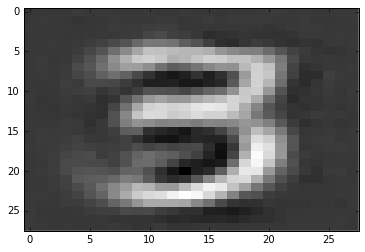

step 7100, training accuracy 0.96
step 7200, training accuracy 0.92
step 7300, training accuracy 0.94
step 7400, training accuracy 0.92
step 7500, training accuracy 0.98
step 7600, training accuracy 0.98
step 7700, training accuracy 0.96
step 7800, training accuracy 0.98
step 7900, training accuracy 0.98
step 8000, training accuracy 0.94
Reconstruction of a 8


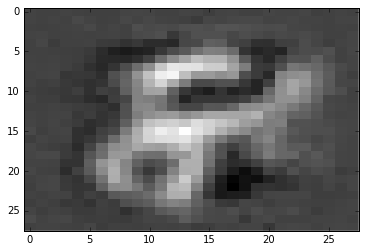

step 8100, training accuracy 0.98
step 8200, training accuracy 1
step 8300, training accuracy 0.96
step 8400, training accuracy 0.92
step 8500, training accuracy 0.92
step 8600, training accuracy 0.9
step 8700, training accuracy 1
step 8800, training accuracy 0.94
step 8900, training accuracy 0.9
step 9000, training accuracy 0.9
Reconstruction of a 2


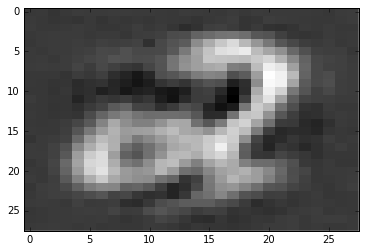

step 9100, training accuracy 0.92
step 9200, training accuracy 0.92
step 9300, training accuracy 0.98
step 9400, training accuracy 0.94
step 9500, training accuracy 0.86
step 9600, training accuracy 0.94
step 9700, training accuracy 1
step 9800, training accuracy 0.98
step 9900, training accuracy 0.96
epoch 2, learning rate 2.15443e-05
step 0, training accuracy 0.96
Reconstruction of a 9


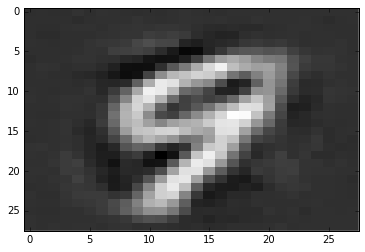

step 100, training accuracy 0.96
step 200, training accuracy 0.94
step 300, training accuracy 0.94
step 400, training accuracy 0.94
step 500, training accuracy 1
step 600, training accuracy 0.98
step 700, training accuracy 0.98
step 800, training accuracy 0.88
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
Reconstruction of a 3


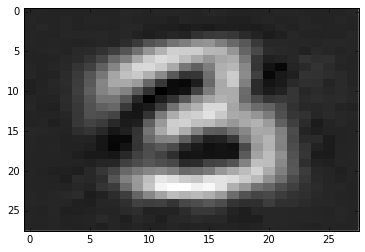

step 1100, training accuracy 0.98
step 1200, training accuracy 0.96
step 1300, training accuracy 0.96
step 1400, training accuracy 0.96
step 1500, training accuracy 0.96
step 1600, training accuracy 1
step 1700, training accuracy 0.94
step 1800, training accuracy 0.96
step 1900, training accuracy 0.92
step 2000, training accuracy 0.94
Reconstruction of a 1


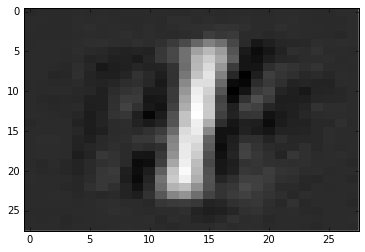

step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 0.94
step 2400, training accuracy 1
step 2500, training accuracy 1
step 2600, training accuracy 0.96
step 2700, training accuracy 0.94
step 2800, training accuracy 0.98
step 2900, training accuracy 1
step 3000, training accuracy 0.92
Reconstruction of a 5


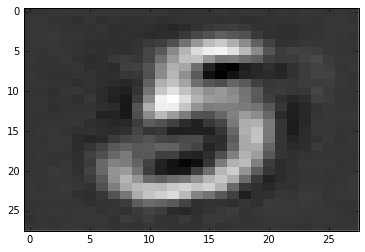

step 3100, training accuracy 0.98
step 3200, training accuracy 1
step 3300, training accuracy 0.96
step 3400, training accuracy 0.96
step 3500, training accuracy 0.96
step 3600, training accuracy 0.98
step 3700, training accuracy 0.96
step 3800, training accuracy 0.98
step 3900, training accuracy 0.92
step 4000, training accuracy 0.96
Reconstruction of a 9


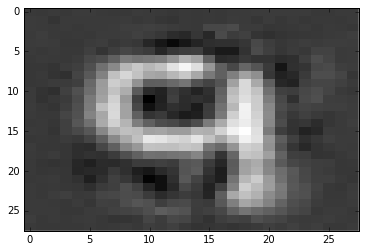

step 4100, training accuracy 0.92
step 4200, training accuracy 0.98
step 4300, training accuracy 0.98
step 4400, training accuracy 0.96
step 4500, training accuracy 0.96
step 4600, training accuracy 0.98
step 4700, training accuracy 0.92
step 4800, training accuracy 0.98
step 4900, training accuracy 1
step 5000, training accuracy 0.98
Reconstruction of a 0


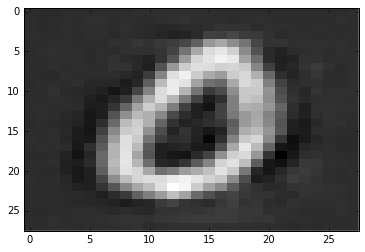

step 5100, training accuracy 0.9
step 5200, training accuracy 0.9
step 5300, training accuracy 0.94
step 5400, training accuracy 0.9
step 5500, training accuracy 0.94
step 5600, training accuracy 0.92
step 5700, training accuracy 0.92
step 5800, training accuracy 1
step 5900, training accuracy 0.98
step 6000, training accuracy 0.98
Reconstruction of a 5


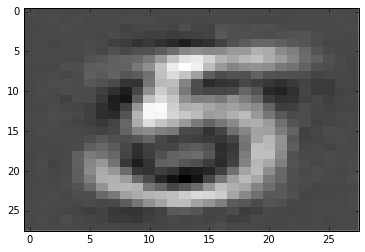

step 6100, training accuracy 0.96
step 6200, training accuracy 0.94
step 6300, training accuracy 0.94
step 6400, training accuracy 0.94
step 6500, training accuracy 0.94
step 6600, training accuracy 0.92
step 6700, training accuracy 0.98
step 6800, training accuracy 0.94
step 6900, training accuracy 0.94
step 7000, training accuracy 0.98
Reconstruction of a 3


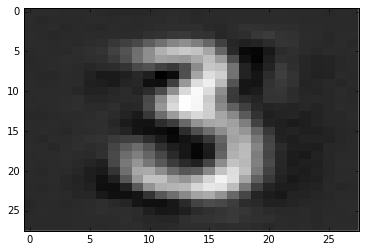

step 7100, training accuracy 1
step 7200, training accuracy 0.96
step 7300, training accuracy 0.94
step 7400, training accuracy 0.98
step 7500, training accuracy 0.92
step 7600, training accuracy 0.94
step 7700, training accuracy 0.9
step 7800, training accuracy 0.96
step 7900, training accuracy 0.92
step 8000, training accuracy 0.94
Reconstruction of a 1


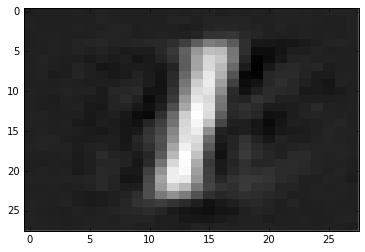

step 8100, training accuracy 0.98
step 8200, training accuracy 1
step 8300, training accuracy 1
step 8400, training accuracy 0.96
step 8500, training accuracy 0.98
step 8600, training accuracy 0.98
step 8700, training accuracy 0.96
step 8800, training accuracy 0.96
step 8900, training accuracy 0.98
step 9000, training accuracy 0.98
Reconstruction of a 0


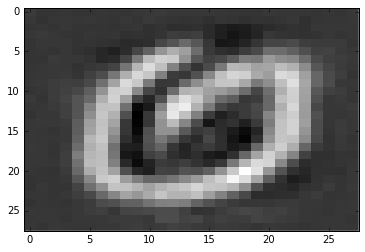

step 9100, training accuracy 0.94
step 9200, training accuracy 0.96
step 9300, training accuracy 0.94
step 9400, training accuracy 0.98
step 9500, training accuracy 0.84
step 9600, training accuracy 0.9
step 9700, training accuracy 0.94
step 9800, training accuracy 0.98
step 9900, training accuracy 0.94
epoch 3, learning rate 1e-05
step 0, training accuracy 0.98
Reconstruction of a 3


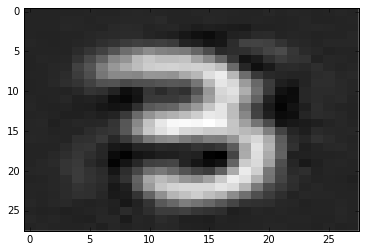

step 100, training accuracy 0.98
step 200, training accuracy 0.98
step 300, training accuracy 0.98
step 400, training accuracy 0.92
step 500, training accuracy 0.98
step 600, training accuracy 0.96
step 700, training accuracy 0.94
step 800, training accuracy 0.96
step 900, training accuracy 0.9
step 1000, training accuracy 0.92
Reconstruction of a 2


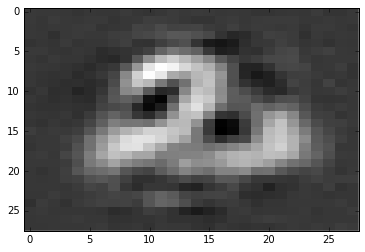

step 1100, training accuracy 0.98
step 1200, training accuracy 0.92
step 1300, training accuracy 0.9
step 1400, training accuracy 0.94
step 1500, training accuracy 0.94
step 1600, training accuracy 0.98
step 1700, training accuracy 0.86
step 1800, training accuracy 0.9
step 1900, training accuracy 0.96
step 2000, training accuracy 0.96
Reconstruction of a 5


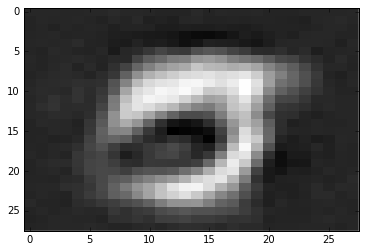

step 2100, training accuracy 0.98
step 2200, training accuracy 0.98
step 2300, training accuracy 0.96
step 2400, training accuracy 1
step 2500, training accuracy 0.94
step 2600, training accuracy 0.94
step 2700, training accuracy 0.92
step 2800, training accuracy 0.94
step 2900, training accuracy 0.94
step 3000, training accuracy 0.94
Reconstruction of a 7


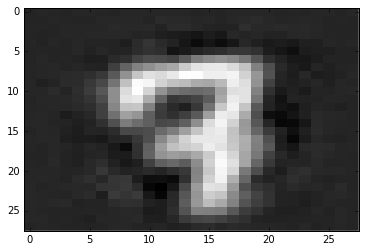

step 3100, training accuracy 0.9
step 3200, training accuracy 0.96
step 3300, training accuracy 0.98
step 3400, training accuracy 0.98
step 3500, training accuracy 0.94
step 3600, training accuracy 0.88
step 3700, training accuracy 0.96
step 3800, training accuracy 0.94
step 3900, training accuracy 0.96
step 4000, training accuracy 0.92
Reconstruction of a 3


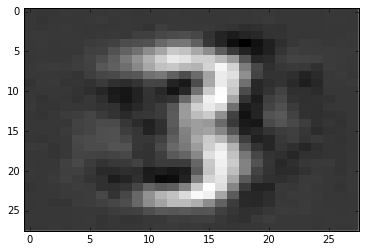

step 4100, training accuracy 0.94
step 4200, training accuracy 0.98
step 4300, training accuracy 0.92
step 4400, training accuracy 0.96
step 4500, training accuracy 0.88
step 4600, training accuracy 0.92
step 4700, training accuracy 0.94
step 4800, training accuracy 1
step 4900, training accuracy 0.86
step 5000, training accuracy 0.96
Reconstruction of a 1


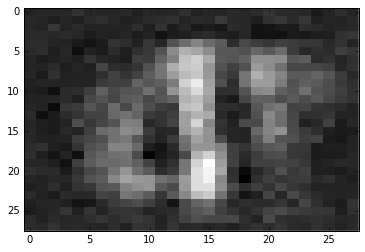

step 5100, training accuracy 0.96
step 5200, training accuracy 0.96
step 5300, training accuracy 1
step 5400, training accuracy 1
step 5500, training accuracy 0.94
step 5600, training accuracy 0.98
step 5700, training accuracy 0.96
step 5800, training accuracy 0.98
step 5900, training accuracy 0.94
step 6000, training accuracy 0.92
Reconstruction of a 3


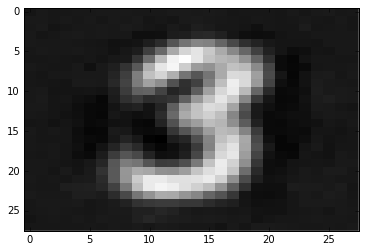

step 6100, training accuracy 0.96
step 6200, training accuracy 0.98
step 6300, training accuracy 0.98
step 6400, training accuracy 0.98
step 6500, training accuracy 0.96
step 6600, training accuracy 0.98
step 6700, training accuracy 0.98
step 6800, training accuracy 0.98
step 6900, training accuracy 0.96
step 7000, training accuracy 0.96
Reconstruction of a 3


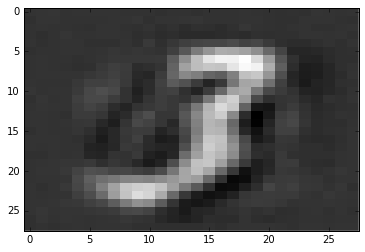

step 7100, training accuracy 0.98
step 7200, training accuracy 0.92
step 7300, training accuracy 0.96
step 7400, training accuracy 0.98
step 7500, training accuracy 0.98
step 7600, training accuracy 1
step 7700, training accuracy 1
step 7800, training accuracy 1
step 7900, training accuracy 0.92
step 8000, training accuracy 0.94
Reconstruction of a 2


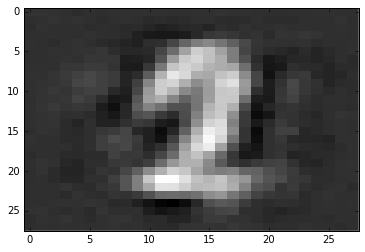

step 8100, training accuracy 0.96
step 8200, training accuracy 1
step 8300, training accuracy 0.96
step 8400, training accuracy 0.98
step 8500, training accuracy 0.94
step 8600, training accuracy 1
step 8700, training accuracy 0.94
step 8800, training accuracy 1
step 8900, training accuracy 0.94
step 9000, training accuracy 0.94
Reconstruction of a 5


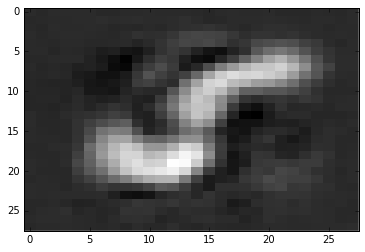

step 9100, training accuracy 0.9
step 9200, training accuracy 0.88
step 9300, training accuracy 0.96
step 9400, training accuracy 1
step 9500, training accuracy 0.98
step 9600, training accuracy 0.94
step 9700, training accuracy 0.94
step 9800, training accuracy 0.98
step 9900, training accuracy 0.96
epoch 4, learning rate 4.64159e-06
step 0, training accuracy 1
Reconstruction of a 1


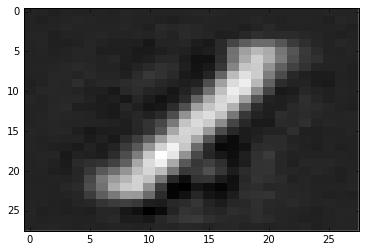

step 100, training accuracy 0.96
step 200, training accuracy 0.94
step 300, training accuracy 0.94
step 400, training accuracy 0.98
step 500, training accuracy 0.96
step 600, training accuracy 0.9
step 700, training accuracy 0.94
step 800, training accuracy 0.92
step 900, training accuracy 0.94
step 1000, training accuracy 0.92
Reconstruction of a 0


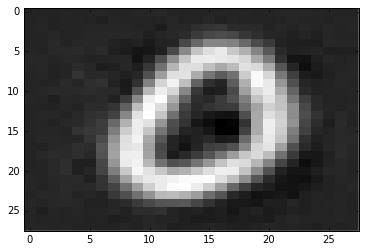

step 1100, training accuracy 0.98
step 1200, training accuracy 0.92
step 1300, training accuracy 1
step 1400, training accuracy 0.94
step 1500, training accuracy 0.96
step 1600, training accuracy 0.96
step 1700, training accuracy 0.96
step 1800, training accuracy 0.96
step 1900, training accuracy 0.96
step 2000, training accuracy 0.98
Reconstruction of a 2


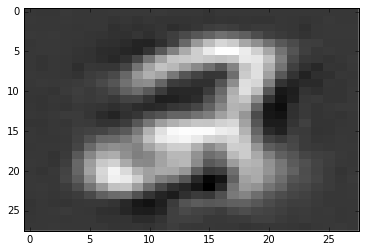

step 2100, training accuracy 1
step 2200, training accuracy 0.96
step 2300, training accuracy 1
step 2400, training accuracy 0.98
step 2500, training accuracy 0.96
step 2600, training accuracy 0.98
step 2700, training accuracy 0.94
step 2800, training accuracy 0.94
step 2900, training accuracy 0.96
step 3000, training accuracy 0.96
Reconstruction of a 5


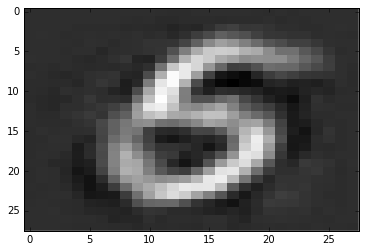

step 3100, training accuracy 0.98
step 3200, training accuracy 0.92
step 3300, training accuracy 0.96
step 3400, training accuracy 0.98
step 3500, training accuracy 0.92
step 3600, training accuracy 1
step 3700, training accuracy 0.98
step 3800, training accuracy 1
step 3900, training accuracy 1
step 4000, training accuracy 0.94
Reconstruction of a 4


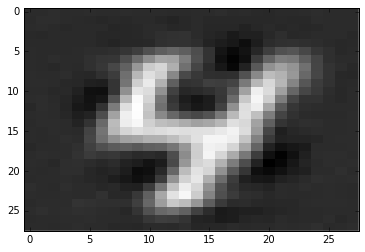

step 4100, training accuracy 0.96
step 4200, training accuracy 0.98
step 4300, training accuracy 0.98
step 4400, training accuracy 0.92
step 4500, training accuracy 0.94
step 4600, training accuracy 0.96
step 4700, training accuracy 0.96
step 4800, training accuracy 1
step 4900, training accuracy 1
step 5000, training accuracy 0.94
Reconstruction of a 2


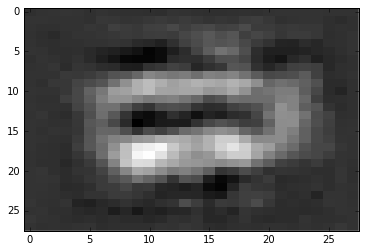

step 5100, training accuracy 1
step 5200, training accuracy 1
step 5300, training accuracy 1
step 5400, training accuracy 1
step 5500, training accuracy 0.94
step 5600, training accuracy 0.96
step 5700, training accuracy 0.92
step 5800, training accuracy 0.94
step 5900, training accuracy 0.9
step 6000, training accuracy 0.94
Reconstruction of a 4


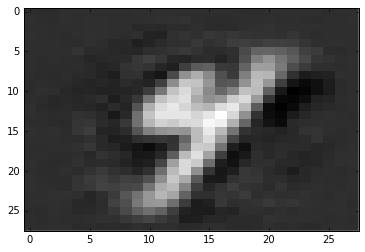

step 6100, training accuracy 0.96
step 6200, training accuracy 0.96
step 6300, training accuracy 0.96
step 6400, training accuracy 0.98
step 6500, training accuracy 0.98
step 6600, training accuracy 1
step 6700, training accuracy 0.92
step 6800, training accuracy 0.98
step 6900, training accuracy 0.92
step 7000, training accuracy 1
Reconstruction of a 0


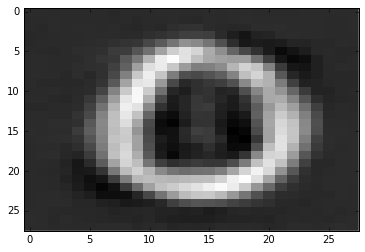

step 7100, training accuracy 0.98
step 7200, training accuracy 0.9
step 7300, training accuracy 0.96
step 7400, training accuracy 0.94
step 7500, training accuracy 0.98
step 7600, training accuracy 0.88
step 7700, training accuracy 0.96
step 7800, training accuracy 0.96
step 7900, training accuracy 0.98
step 8000, training accuracy 0.92
Reconstruction of a 7


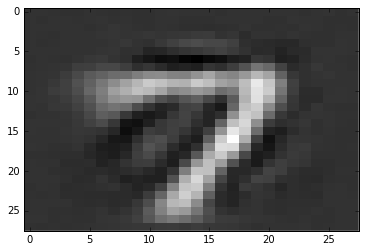

step 8100, training accuracy 0.92
step 8200, training accuracy 0.94
step 8300, training accuracy 0.96
step 8400, training accuracy 0.96
step 8500, training accuracy 0.98
step 8600, training accuracy 1
step 8700, training accuracy 0.96
step 8800, training accuracy 0.92
step 8900, training accuracy 0.98
step 9000, training accuracy 0.92
Reconstruction of a 7


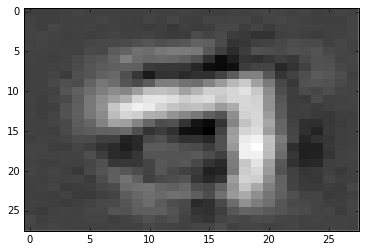

step 9100, training accuracy 0.98
step 9200, training accuracy 0.9
step 9300, training accuracy 0.98
step 9400, training accuracy 0.96
step 9500, training accuracy 1
step 9600, training accuracy 0.98
step 9700, training accuracy 0.88
step 9800, training accuracy 0.92
step 9900, training accuracy 0.96
epoch 5, learning rate 2.15443e-06
step 0, training accuracy 0.98
Reconstruction of a 2


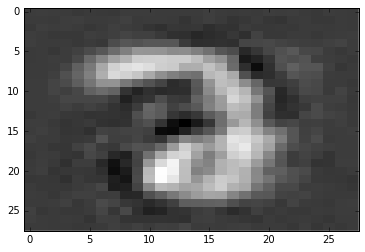

step 100, training accuracy 0.94
step 200, training accuracy 0.98
step 300, training accuracy 0.96
step 400, training accuracy 0.98
step 500, training accuracy 0.94
step 600, training accuracy 0.94
step 700, training accuracy 0.98
step 800, training accuracy 0.98
step 900, training accuracy 0.98
step 1000, training accuracy 0.96
Reconstruction of a 7


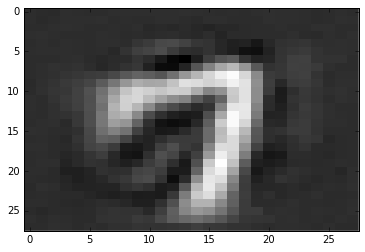

step 1100, training accuracy 0.94
step 1200, training accuracy 0.94
step 1300, training accuracy 0.98
step 1400, training accuracy 0.92
step 1500, training accuracy 0.98
step 1600, training accuracy 0.94
step 1700, training accuracy 0.96
step 1800, training accuracy 1
step 1900, training accuracy 0.84
step 2000, training accuracy 0.88
Reconstruction of a 3


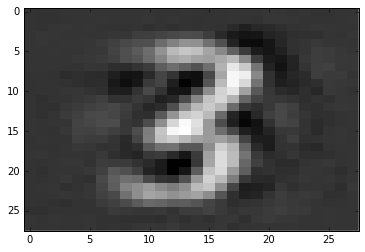

step 2100, training accuracy 0.96
step 2200, training accuracy 0.98
step 2300, training accuracy 1
step 2400, training accuracy 0.98
step 2500, training accuracy 0.94
step 2600, training accuracy 0.9
step 2700, training accuracy 0.94
step 2800, training accuracy 0.98
step 2900, training accuracy 0.96
step 3000, training accuracy 0.96
Reconstruction of a 0


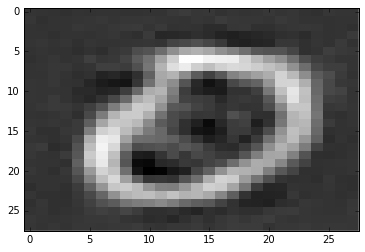

step 3100, training accuracy 0.92
step 3200, training accuracy 0.96
step 3300, training accuracy 0.94
step 3400, training accuracy 0.92
step 3500, training accuracy 0.96
step 3600, training accuracy 0.96
step 3700, training accuracy 0.96
step 3800, training accuracy 0.96
step 3900, training accuracy 0.98
step 4000, training accuracy 0.96
Reconstruction of a 6


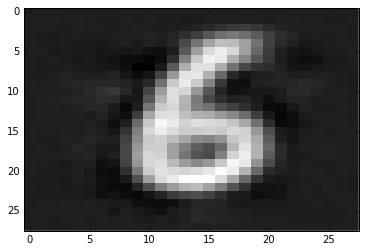

step 4100, training accuracy 0.98
step 4200, training accuracy 0.98
step 4300, training accuracy 0.98
step 4400, training accuracy 0.98
step 4500, training accuracy 0.96
step 4600, training accuracy 0.94
step 4700, training accuracy 0.94
step 4800, training accuracy 0.92
step 4900, training accuracy 0.96
step 5000, training accuracy 0.96
Reconstruction of a 1


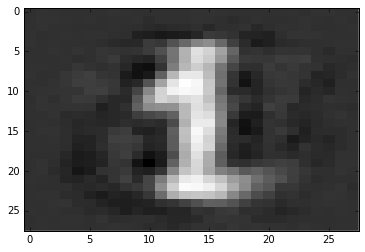

step 5100, training accuracy 0.96
step 5200, training accuracy 0.94
step 5300, training accuracy 0.98
step 5400, training accuracy 0.96
step 5500, training accuracy 0.96
step 5600, training accuracy 0.98
step 5700, training accuracy 0.94
step 5800, training accuracy 0.98
step 5900, training accuracy 1
step 6000, training accuracy 0.94
Reconstruction of a 4


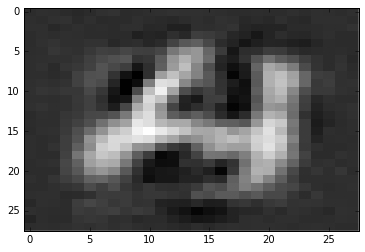

step 6100, training accuracy 1
step 6200, training accuracy 0.94
step 6300, training accuracy 0.9
step 6400, training accuracy 0.98
step 6500, training accuracy 0.96
step 6600, training accuracy 1
step 6700, training accuracy 0.96
step 6800, training accuracy 0.96
step 6900, training accuracy 0.98
step 7000, training accuracy 0.96
Reconstruction of a 8


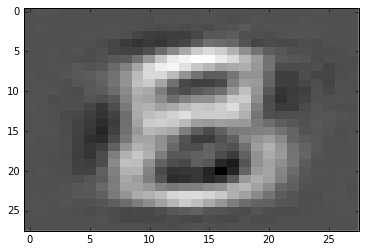

step 7100, training accuracy 0.88
step 7200, training accuracy 0.96
step 7300, training accuracy 1
step 7400, training accuracy 1
step 7500, training accuracy 0.98
step 7600, training accuracy 0.98
step 7700, training accuracy 0.96
step 7800, training accuracy 1
step 7900, training accuracy 0.98
step 8000, training accuracy 0.92
Reconstruction of a 0


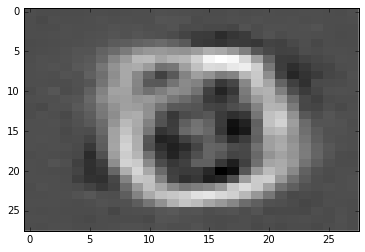

step 8100, training accuracy 0.94
step 8200, training accuracy 0.94
step 8300, training accuracy 0.98
step 8400, training accuracy 0.92
step 8500, training accuracy 1
step 8600, training accuracy 0.98
step 8700, training accuracy 0.94
step 8800, training accuracy 0.94
step 8900, training accuracy 0.96
step 9000, training accuracy 0.94
Reconstruction of a 5


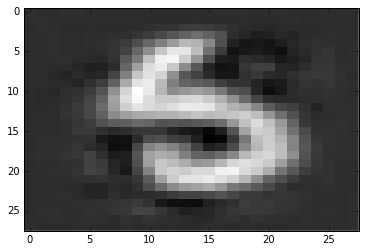

step 9100, training accuracy 0.92
step 9200, training accuracy 0.92
step 9300, training accuracy 0.9
step 9400, training accuracy 0.98
step 9500, training accuracy 0.9
step 9600, training accuracy 0.92
step 9700, training accuracy 0.94
step 9800, training accuracy 0.9
step 9900, training accuracy 0.92
epoch 6, learning rate 1e-06
step 0, training accuracy 0.92
Reconstruction of a 6


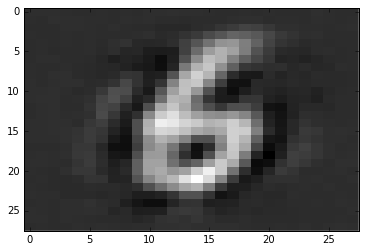

step 100, training accuracy 0.92
step 200, training accuracy 0.98
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 0.98
step 600, training accuracy 0.96
step 700, training accuracy 0.94
step 800, training accuracy 0.94
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
Reconstruction of a 1


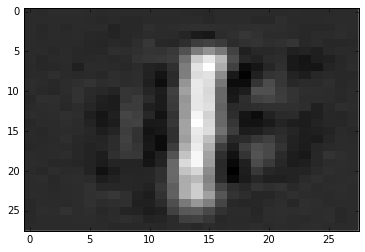

step 1100, training accuracy 0.96
step 1200, training accuracy 0.98
step 1300, training accuracy 0.94
step 1400, training accuracy 0.98
step 1500, training accuracy 0.98
step 1600, training accuracy 0.96
step 1700, training accuracy 1
step 1800, training accuracy 0.98
step 1900, training accuracy 0.98
step 2000, training accuracy 0.96
Reconstruction of a 5


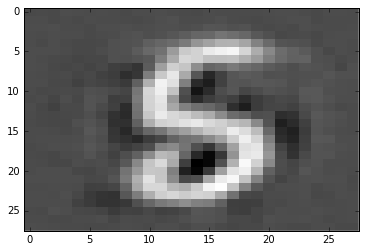

step 2100, training accuracy 0.96
step 2200, training accuracy 0.98
step 2300, training accuracy 0.96
step 2400, training accuracy 0.96
step 2500, training accuracy 0.98
step 2600, training accuracy 0.96
step 2700, training accuracy 0.98
step 2800, training accuracy 0.92
step 2900, training accuracy 0.98
step 3000, training accuracy 0.98
Reconstruction of a 8


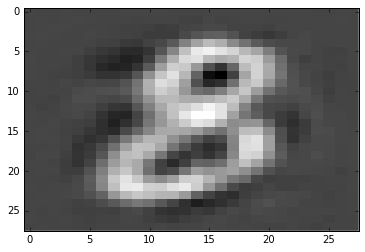

step 3100, training accuracy 0.98
step 3200, training accuracy 0.98
step 3300, training accuracy 0.9
step 3400, training accuracy 0.98
step 3500, training accuracy 0.94
step 3600, training accuracy 0.96
step 3700, training accuracy 0.9
step 3800, training accuracy 0.98
step 3900, training accuracy 0.94
step 4000, training accuracy 0.96
Reconstruction of a 9


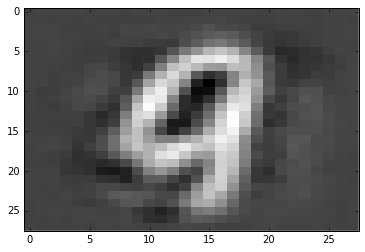

step 4100, training accuracy 0.94
step 4200, training accuracy 0.9
step 4300, training accuracy 0.92
step 4400, training accuracy 1
step 4500, training accuracy 1
step 4600, training accuracy 0.96
step 4700, training accuracy 0.96
step 4800, training accuracy 0.94
step 4900, training accuracy 0.94
step 5000, training accuracy 1
Reconstruction of a 7


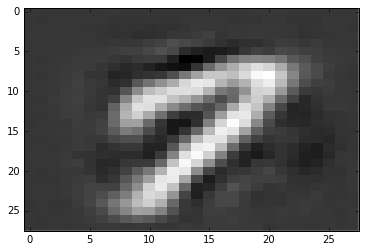

step 5100, training accuracy 0.94
step 5200, training accuracy 0.96
step 5300, training accuracy 0.98
step 5400, training accuracy 0.92
step 5500, training accuracy 0.94
step 5600, training accuracy 0.94
step 5700, training accuracy 0.94
step 5800, training accuracy 0.94
step 5900, training accuracy 0.94
step 6000, training accuracy 0.98
Reconstruction of a 5


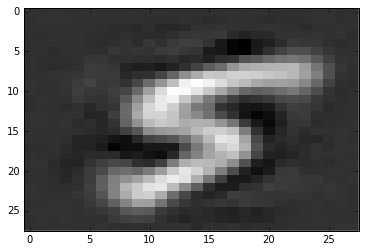

step 6100, training accuracy 0.94
step 6200, training accuracy 0.98
step 6300, training accuracy 0.96
step 6400, training accuracy 0.94
step 6500, training accuracy 0.96
step 6600, training accuracy 1
step 6700, training accuracy 0.92
step 6800, training accuracy 0.96
step 6900, training accuracy 0.94
step 7000, training accuracy 0.92
Reconstruction of a 1


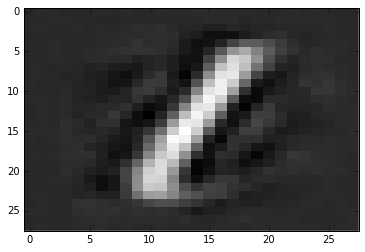

step 7100, training accuracy 0.92
step 7200, training accuracy 0.96
step 7300, training accuracy 1
step 7400, training accuracy 1
step 7500, training accuracy 0.94
step 7600, training accuracy 0.92
step 7700, training accuracy 1
step 7800, training accuracy 0.92
step 7900, training accuracy 0.94
step 8000, training accuracy 0.94
Reconstruction of a 8


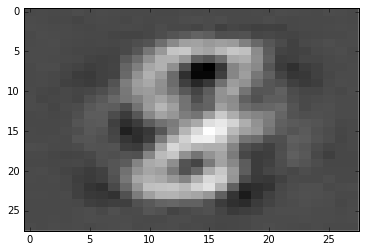

step 8100, training accuracy 0.92
step 8200, training accuracy 0.94
step 8300, training accuracy 0.98
step 8400, training accuracy 0.96
step 8500, training accuracy 0.98
step 8600, training accuracy 0.98
step 8700, training accuracy 0.94
step 8800, training accuracy 0.96
step 8900, training accuracy 0.96
step 9000, training accuracy 0.92
Reconstruction of a 2


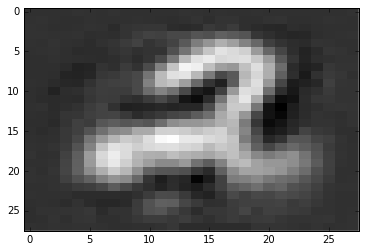

step 9100, training accuracy 1
step 9200, training accuracy 0.96
step 9300, training accuracy 0.94
step 9400, training accuracy 0.92
step 9500, training accuracy 0.94
step 9600, training accuracy 0.98
step 9700, training accuracy 0.94
step 9800, training accuracy 0.96
step 9900, training accuracy 0.98
epoch 7, learning rate 4.64159e-07
step 0, training accuracy 0.92
Reconstruction of a 3


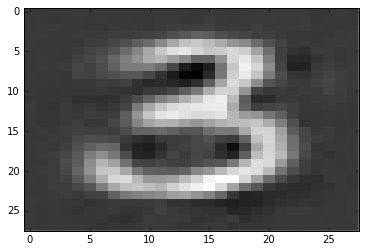

step 100, training accuracy 0.96
step 200, training accuracy 0.94
step 300, training accuracy 0.94
step 400, training accuracy 0.92
step 500, training accuracy 0.92
step 600, training accuracy 0.96
step 700, training accuracy 1
step 800, training accuracy 0.94
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
Reconstruction of a 9


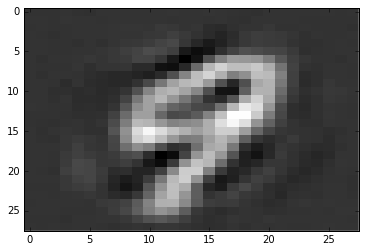

step 1100, training accuracy 0.92
step 1200, training accuracy 0.94
step 1300, training accuracy 0.92
step 1400, training accuracy 0.98
step 1500, training accuracy 0.94
step 1600, training accuracy 0.96
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 0.9
step 2000, training accuracy 0.92
Reconstruction of a 6


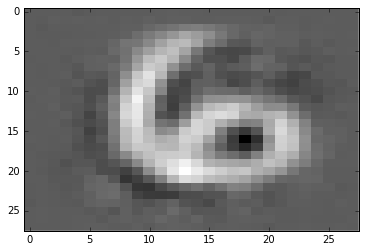

step 2100, training accuracy 0.9
step 2200, training accuracy 0.94
step 2300, training accuracy 0.96
step 2400, training accuracy 0.92
step 2500, training accuracy 0.96
step 2600, training accuracy 0.94
step 2700, training accuracy 0.94
step 2800, training accuracy 0.9
step 2900, training accuracy 0.98
step 3000, training accuracy 0.98
Reconstruction of a 9


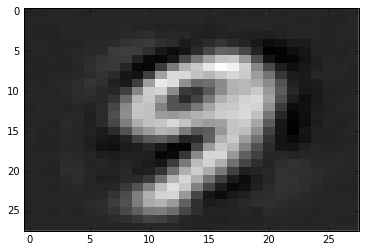

step 3100, training accuracy 0.96
step 3200, training accuracy 0.98
step 3300, training accuracy 0.94
step 3400, training accuracy 0.94
step 3500, training accuracy 1
step 3600, training accuracy 0.94
step 3700, training accuracy 0.98
step 3800, training accuracy 0.94
step 3900, training accuracy 0.96
step 4000, training accuracy 0.9
Reconstruction of a 9


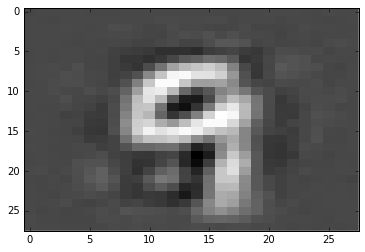

step 4100, training accuracy 0.96
step 4200, training accuracy 0.94
step 4300, training accuracy 0.98
step 4400, training accuracy 0.84
step 4500, training accuracy 0.96
step 4600, training accuracy 0.96
step 4700, training accuracy 0.96
step 4800, training accuracy 0.96
step 4900, training accuracy 0.94
step 5000, training accuracy 0.92
Reconstruction of a 6


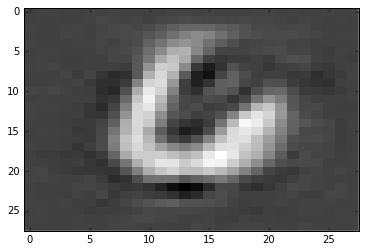

step 5100, training accuracy 0.96
step 5200, training accuracy 0.96
step 5300, training accuracy 0.96
step 5400, training accuracy 0.98
step 5500, training accuracy 0.98
step 5600, training accuracy 0.98
step 5700, training accuracy 0.98
step 5800, training accuracy 0.9
step 5900, training accuracy 0.96
step 6000, training accuracy 0.94
Reconstruction of a 9


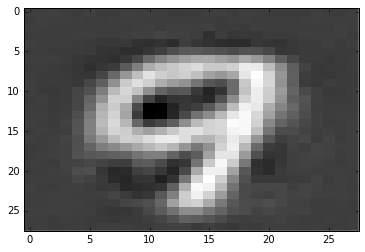

step 6100, training accuracy 0.98
step 6200, training accuracy 0.94
step 6300, training accuracy 0.96
step 6400, training accuracy 0.98
step 6500, training accuracy 0.9
step 6600, training accuracy 0.98
step 6700, training accuracy 0.98
step 6800, training accuracy 0.92
step 6900, training accuracy 0.98
step 7000, training accuracy 1
Reconstruction of a 0


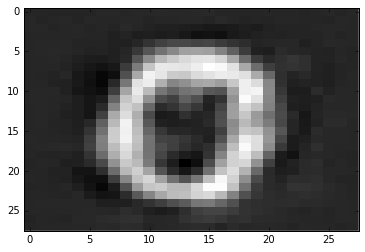

step 7100, training accuracy 0.94
step 7200, training accuracy 0.98
step 7300, training accuracy 0.98
step 7400, training accuracy 0.96
step 7500, training accuracy 0.96
step 7600, training accuracy 0.96
step 7700, training accuracy 1
step 7800, training accuracy 0.92
step 7900, training accuracy 0.94
step 8000, training accuracy 0.94
Reconstruction of a 1


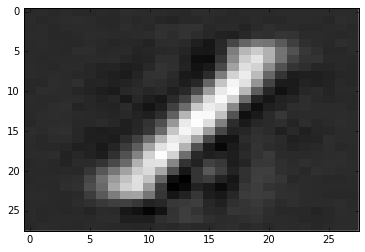

step 8100, training accuracy 0.94
step 8200, training accuracy 0.92
step 8300, training accuracy 0.98
step 8400, training accuracy 0.94
step 8500, training accuracy 0.98
step 8600, training accuracy 1
step 8700, training accuracy 0.98
step 8800, training accuracy 0.94
step 8900, training accuracy 0.94
step 9000, training accuracy 0.94
Reconstruction of a 8


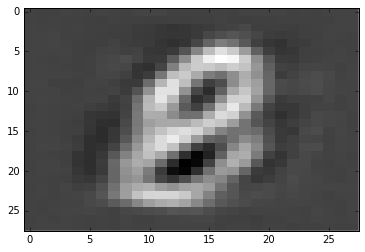

step 9100, training accuracy 0.96
step 9200, training accuracy 0.96
step 9300, training accuracy 1
step 9400, training accuracy 0.98
step 9500, training accuracy 0.98
step 9600, training accuracy 0.96
step 9700, training accuracy 0.92
step 9800, training accuracy 0.96
step 9900, training accuracy 0.86
epoch 8, learning rate 2.15443e-07
step 0, training accuracy 0.98
Reconstruction of a 5


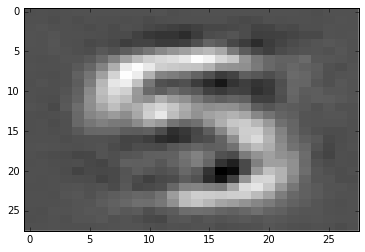

step 100, training accuracy 0.98
step 200, training accuracy 1
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 0.92
step 600, training accuracy 0.96
step 700, training accuracy 1
step 800, training accuracy 0.9
step 900, training accuracy 0.9
step 1000, training accuracy 0.98
Reconstruction of a 9


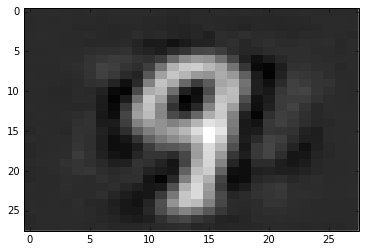

step 1100, training accuracy 0.96
step 1200, training accuracy 0.96
step 1300, training accuracy 0.96
step 1400, training accuracy 1
step 1500, training accuracy 0.98
step 1600, training accuracy 0.98
step 1700, training accuracy 0.92
step 1800, training accuracy 0.94
step 1900, training accuracy 0.94
step 2000, training accuracy 0.98
Reconstruction of a 9


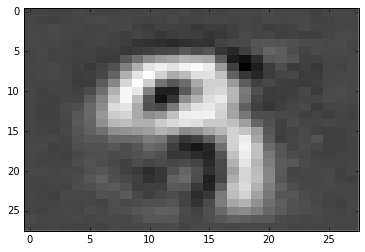

step 2100, training accuracy 0.92
step 2200, training accuracy 1
step 2300, training accuracy 0.98
step 2400, training accuracy 0.94
step 2500, training accuracy 0.98
step 2600, training accuracy 0.96
step 2700, training accuracy 0.98
step 2800, training accuracy 0.9
step 2900, training accuracy 0.98
step 3000, training accuracy 0.92
Reconstruction of a 3


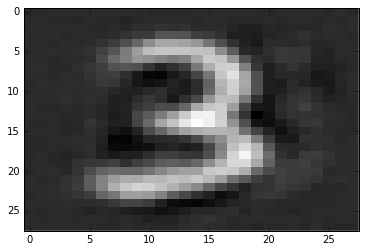

step 3100, training accuracy 0.94
step 3200, training accuracy 0.92
step 3300, training accuracy 0.96
step 3400, training accuracy 0.98
step 3500, training accuracy 0.98
step 3600, training accuracy 0.98
step 3700, training accuracy 0.96
step 3800, training accuracy 0.98
step 3900, training accuracy 0.98
step 4000, training accuracy 0.9
Reconstruction of a 6


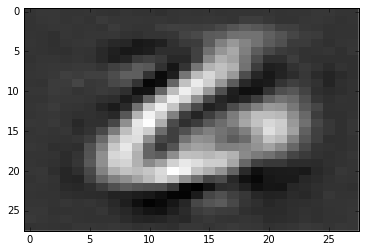

step 4100, training accuracy 0.98
step 4200, training accuracy 0.96
step 4300, training accuracy 0.98
step 4400, training accuracy 0.98
step 4500, training accuracy 0.9
step 4600, training accuracy 0.98
step 4700, training accuracy 0.9
step 4800, training accuracy 0.96
step 4900, training accuracy 0.92
step 5000, training accuracy 0.92
Reconstruction of a 9


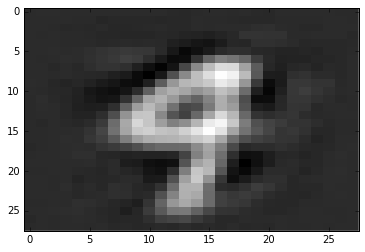

step 5100, training accuracy 1
step 5200, training accuracy 0.96
step 5300, training accuracy 0.98
step 5400, training accuracy 0.94
step 5500, training accuracy 0.96
step 5600, training accuracy 0.98
step 5700, training accuracy 1
step 5800, training accuracy 0.96
step 5900, training accuracy 0.94
step 6000, training accuracy 0.96
Reconstruction of a 2


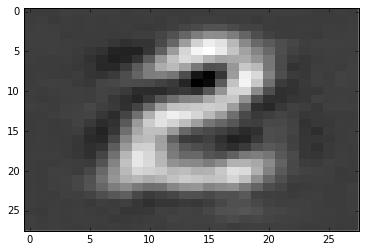

step 6100, training accuracy 0.96
step 6200, training accuracy 0.96
step 6300, training accuracy 1
step 6400, training accuracy 0.96
step 6500, training accuracy 0.94
step 6600, training accuracy 0.98
step 6700, training accuracy 0.96
step 6800, training accuracy 1
step 6900, training accuracy 0.92
step 7000, training accuracy 1
Reconstruction of a 6


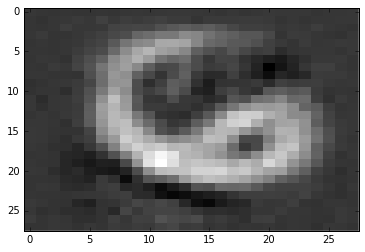

step 7100, training accuracy 0.94
step 7200, training accuracy 0.98
step 7300, training accuracy 1
step 7400, training accuracy 0.94
step 7500, training accuracy 1
step 7600, training accuracy 0.96
step 7700, training accuracy 0.92
step 7800, training accuracy 0.98
step 7900, training accuracy 0.94
step 8000, training accuracy 0.96
Reconstruction of a 5


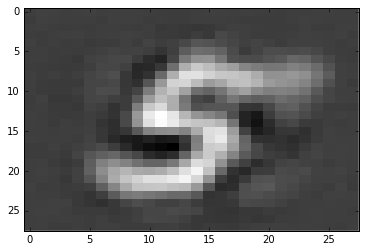

step 8100, training accuracy 0.94
step 8200, training accuracy 0.98
step 8300, training accuracy 0.92
step 8400, training accuracy 0.9
step 8500, training accuracy 0.96
step 8600, training accuracy 0.96
step 8700, training accuracy 0.94
step 8800, training accuracy 0.96
step 8900, training accuracy 1
step 9000, training accuracy 0.96
Reconstruction of a 0


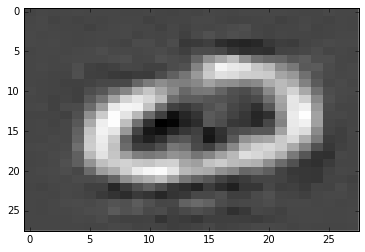

step 9100, training accuracy 0.98
step 9200, training accuracy 0.96
step 9300, training accuracy 0.96
step 9400, training accuracy 0.92
step 9500, training accuracy 0.98
step 9600, training accuracy 0.96
step 9700, training accuracy 0.94
step 9800, training accuracy 0.9
step 9900, training accuracy 1
epoch 9, learning rate 1e-07
step 0, training accuracy 0.98
Reconstruction of a 8


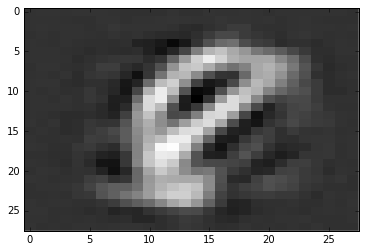

step 100, training accuracy 0.96
step 200, training accuracy 0.94
step 300, training accuracy 0.96
step 400, training accuracy 0.98
step 500, training accuracy 0.92
step 600, training accuracy 0.92
step 700, training accuracy 0.98
step 800, training accuracy 0.96
step 900, training accuracy 0.92
step 1000, training accuracy 0.96
Reconstruction of a 6


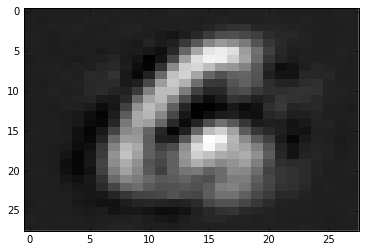

step 1100, training accuracy 0.96
step 1200, training accuracy 0.92
step 1300, training accuracy 0.96
step 1400, training accuracy 0.9
step 1500, training accuracy 0.96
step 1600, training accuracy 0.92
step 1700, training accuracy 0.92
step 1800, training accuracy 1
step 1900, training accuracy 0.96
step 2000, training accuracy 0.94
Reconstruction of a 4


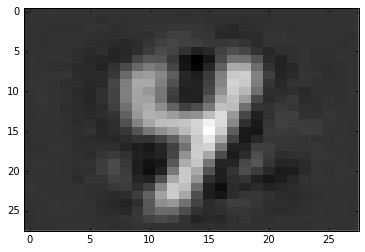

step 2100, training accuracy 0.96
step 2200, training accuracy 0.96
step 2300, training accuracy 0.96
step 2400, training accuracy 1
step 2500, training accuracy 0.94
step 2600, training accuracy 0.96
step 2700, training accuracy 1
step 2800, training accuracy 0.98
step 2900, training accuracy 0.96
step 3000, training accuracy 1
Reconstruction of a 5


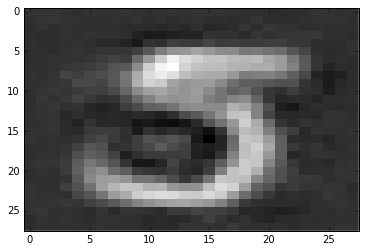

step 3100, training accuracy 1
step 3200, training accuracy 0.94
step 3300, training accuracy 0.96
step 3400, training accuracy 0.96
step 3500, training accuracy 0.96
step 3600, training accuracy 0.98
step 3700, training accuracy 0.96
step 3800, training accuracy 0.94
step 3900, training accuracy 0.92
step 4000, training accuracy 0.94
Reconstruction of a 6


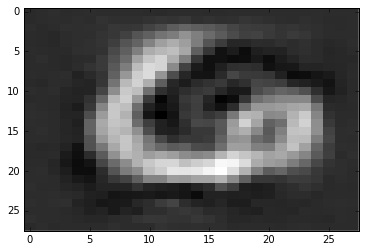

step 4100, training accuracy 0.98
step 4200, training accuracy 0.96
step 4300, training accuracy 1
step 4400, training accuracy 0.94
step 4500, training accuracy 0.94
step 4600, training accuracy 0.94
step 4700, training accuracy 0.96
step 4800, training accuracy 0.96
step 4900, training accuracy 0.92
step 5000, training accuracy 0.94
Reconstruction of a 0


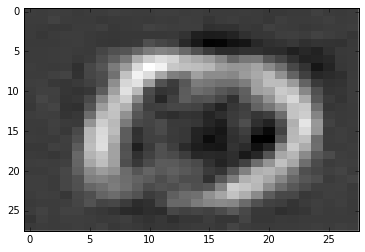

step 5100, training accuracy 0.92
step 5200, training accuracy 0.9
step 5300, training accuracy 0.92
step 5400, training accuracy 1
step 5500, training accuracy 0.92
step 5600, training accuracy 0.94
step 5700, training accuracy 0.96
step 5800, training accuracy 0.96
step 5900, training accuracy 0.96
step 6000, training accuracy 0.9
Reconstruction of a 2


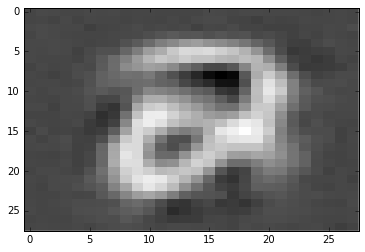

step 6100, training accuracy 0.92
step 6200, training accuracy 0.9
step 6300, training accuracy 0.92
step 6400, training accuracy 0.92
step 6500, training accuracy 0.94
step 6600, training accuracy 0.98
step 6700, training accuracy 0.94
step 6800, training accuracy 0.98
step 6900, training accuracy 0.94
step 7000, training accuracy 1
Reconstruction of a 4


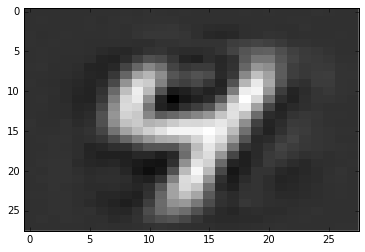

step 7100, training accuracy 0.98
step 7200, training accuracy 0.9
step 7300, training accuracy 0.94
step 7400, training accuracy 0.96
step 7500, training accuracy 0.98
step 7600, training accuracy 0.96
step 7700, training accuracy 0.94
step 7800, training accuracy 0.94
step 7900, training accuracy 0.94
step 8000, training accuracy 0.98
Reconstruction of a 5


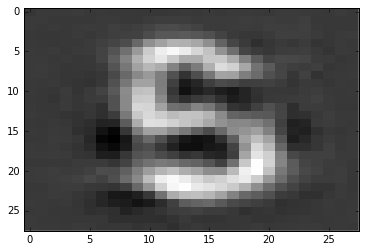

step 8100, training accuracy 0.9
step 8200, training accuracy 0.94
step 8300, training accuracy 0.96
step 8400, training accuracy 0.94
step 8500, training accuracy 0.94
step 8600, training accuracy 0.9
step 8700, training accuracy 0.94
step 8800, training accuracy 0.94
step 8900, training accuracy 0.98
step 9000, training accuracy 1
Reconstruction of a 3


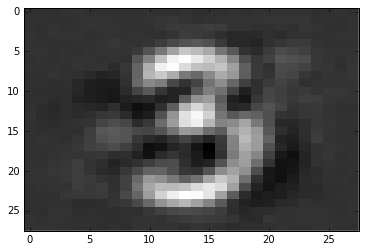

step 9100, training accuracy 0.88
step 9200, training accuracy 0.92
step 9300, training accuracy 0.94
step 9400, training accuracy 0.96
step 9500, training accuracy 0.96
step 9600, training accuracy 0.98
step 9700, training accuracy 0.96
step 9800, training accuracy 0.98
step 9900, training accuracy 0.94


In [88]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_r = tf.placeholder(tf.float32, shape=[None, 784])
learning_rate = tf.placeholder(tf.float32, shape=[])

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_3 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
b_3 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_4 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_4 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x, W) + b)
a_2 = tf.nn.relu(tf.matmul(a, W_2) + b_2)
a_3 = tf.nn.relu(tf.matmul(a_2, W_3) + b_3)
y = tf.nn.sigmoid(tf.matmul(a_3, W_4) + b_4)
a_2_r = tf.nn.relu(tf.matmul(a_3 - b_3, tf.transpose(W_3)))
a_r = tf.nn.relu(tf.matmul(a_2_r - b_2, tf.transpose(W_2)))
x_r = tf.matmul(a_r - b, tf.transpose(W))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
back_train_step = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_error)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for epoch in range(10):
  l_r = 10**np.linspace(-4,-7,10)[epoch]
  print("epoch %d, learning rate %g"%(epoch,l_r))
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("step %d, training accuracy %g"%(i, train_accuracy))
    if i%1000 == 0:
      reconstruction = x_r.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
      plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
      plt.show()
    train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})
    back_train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})

In [89]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

test accuracy 0.9515


# Visualization

## Tensorboard example

# Using ReLU and reconstruction and epochs with 3 hidden layers

In [ ]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_r = tf.placeholder(tf.float32, shape=[None, 784])
learning_rate = tf.placeholder(tf.float32, shape=[])

W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_2 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_3 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
b_3 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
W_4 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
b_4 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

a = tf.nn.relu(tf.matmul(x, W) + b)
a_2 = tf.nn.relu(tf.matmul(a, W_2) + b_2)
a_3 = tf.nn.relu(tf.matmul(a_2, W_3) + b_3)
y = tf.nn.sigmoid(tf.matmul(a_3, W_4) + b_4)

a_2_r = tf.nn.relu(tf.matmul(a_3 - b_3, tf.transpose(W_3)))
a_r = tf.nn.relu(tf.matmul(a_2_r - b_2, tf.transpose(W_2)))
x_r = tf.matmul(a_r - b, tf.transpose(W))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), reduction_indices=[1]))
reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
back_train_step = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_error)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

for epoch in range(10):
  l_r = 10**np.linspace(-4,-7,10)[epoch]
  print("epoch %d, learning rate %g"%(epoch,l_r))
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i%1000 == 0:
      reconstruction = x_r.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
      plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
      plt.show()
      
    if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
      print("step %d, training accuracy %g"%(i, train_accuracy))
      
    train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})
    back_train_step.run(feed_dict={x: batch[0], y_: batch[1], learning_rate: l_r})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

# Multilayer Convolutional network for MNIST
## From TensorFlow tutorial

Functions for abstraction

In [4]:
# break symmetry
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

# prevent 0 gradients
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [5]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [6]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Reshape input image

In [7]:
x_image = tf.reshape(x, [-1,28,28,1])

Layer definition

In [8]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [9]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [10]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

Dropout (not really needed)

In [11]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Readout Layer

In [12]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

Train and evaluate

In [15]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%10 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
#   if i%10 == 0:
#     print(y_)

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.12
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)
step 10, training accuracy 0.12
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)
step 20, training accuracy 0.42
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)
step 30, training accuracy 0.52
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)
step 40, training accuracy 0.48
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


KeyboardInterrupt: 